In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

In [3]:
!cp /content/drive/MyDrive/thesis.py /content

In [4]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222650, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.29842  1.29845  1.29842  1.29849
2020-01-01 17:05:00  1.29846  1.29857  1.29777  1.29858
2020-01-01 17:10:00  1.29857  1.29803  1.29802  1.29863
2020-01-01 17:15:00  1.29845  1.29800  1.29799  1.29845
2020-01-01 17:20:00  1.29799  1.29816  1.29798  1.29817

In [6]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222649, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29845  1.29842  1.29849         1.29857    17   
2020-01-01 17:05:00  1.29846  1.29857  1.29777  1.29858         1.29803    17   
2020-01-01 17:10:00  1.29857  1.29803  1.29802  1.29863         1.29800    17   
2020-01-01 17:15:00  1.29845  1.29800  1.29799  1.29845         1.29816    17   
2020-01-01 17:20:00  1.29799  1.29816  1.29798  1.29817         1.29816    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00003   1.298455  0.00007    1.298445  
2020-01-01 17:05:00    2     1  -0.00011   1.298175  0.00081    1.298345  
2020-01-01 17:10:00    2     1   0.00054   1.298325  0.00061    1.298312  
2020-01-01 17:15:00    2     1   0.00045   1.298220  0.00046    1.298223  
2020-01-01 17:20:00    2     1  -0.00017   1.298075  0.00019    1.298075

In [7]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29845  1.29842  1.29849         1.29857    17   
2020-01-01 17:05:00  1.29846  1.29857  1.29777  1.29858         1.29803    17   
2020-01-01 17:10:00  1.29857  1.29803  1.29802  1.29863         1.29800    17   
2020-01-01 17:15:00  1.29845  1.29800  1.29799  1.29845         1.29816    17   
2020-01-01 17:20:00  1.29799  1.29816  1.29798  1.29817         1.29816    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00003   1.298455  0.00007    1.298445   
2020-01-01 17:05:00    2     1  -0.00011   1.298175  0.00081    1.298345   
2020-01-01 17:10:00    2     1   0.00054   1.298325  0.00061    1.298312   
2020-01-01 17:15:00    2     1   0.00045   1.298220  0.00046    1.298223   
2020-01-01 17:20:00    2     1  -0.00017   1.298075  0.00019    1.298075   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.512453  
2020-01-01 17:05:00 -25.512384  
2020-01-01 17:10:00 -25.512386  
2020-01-01 17:15:00 -25.512424  
2020-01-01 17:20:00 -25.512386

In [8]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29842  1.29849         1.29857    17    2   
2020-01-01 17:05:00  1.29846  1.29777  1.29858         1.29803    17    2   
2020-01-01 17:10:00  1.29857  1.29802  1.29863         1.29800    17    2   
2020-01-01 17:15:00  1.29845  1.29799  1.29845         1.29816    17    2   
2020-01-01 17:20:00  1.29799  1.29798  1.29817         1.29816    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00003   1.298455  0.00007    1.298445 -25.512453  
2020-01-01 17:05:00     1  -0.00011   1.298175  0.00081    1.298345 -25.512384  
2020-01-01 17:10:00     1   0.00054   1.298325  0.00061    1.298312 -25.512386  
2020-01-01 17:15:00     1   0.00045   1.298220  0.00046

In [9]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

155854
155854
33397
33397
33398
33398


In [10]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(155854, 12)

In [11]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [12]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [13]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(155829, 24, 12)
(33372, 24, 12)
(33373, 24, 12)


In [14]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(155829, 1)
(33372, 1)
(33373, 1)


array([[0.3637457 ],
       [0.36404705],
       [0.36449957],
       ...,
       [0.2545395 ],
       [0.25156355],
       [0.252769  ]], dtype=float32)

In [15]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.3637457 , 0.36404705, 0.36449957, ..., 0.2545395 , 0.25156355,
       0.252769  ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [16]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 241.9147 - mae: 1.9886 - mse: 241.9147 - root_mean_squared_error: 15.5536 - mape: 1637.6010
Epoch 1: val_mse improved from inf to 0.14867, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 51s 96ms/step - loss: 241.4662 - mae: 1.9854 - mse: 241.4662 - root_mean_squared_error: 15.5392 - mape: 1634.7090 - val_loss: 0.1487 - val_mae: 0.3361 - val_mse: 0.1487 - val_root_mean_squared_error: 0.3856 - val_mape: 2828.4253
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.1021 - mae: 0.2551 - mse: 0.1021 - root_mean_squared_error: 0.3196 - mape: 980.1118
Epoch 2: val_mse improved from 0.14867 to 0.12082, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 91ms/step - loss: 0.1021 - mae: 0.2551 - mse: 0.1021 - root_mean_squared_error: 0.3196 - mape: 980.1118 - val_loss: 0.1208 - val_mae: 0.2955 - val_mse: 0.1208 - val_root_mean_squared_error: 0.3476 - val_mape: 4173.0137
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0710 - mae: 0.1986 - mse: 0.0710 - root_mean_squared_error: 0.2665 - mape: 1444.7844
Epoch 3: val_mse improved from 0.12082 to 0.06801, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 91ms/step - loss: 0.0709 - mae: 0.1985 - mse: 0.0709 - root_mean_squared_error: 0.2663 - mape: 1438.8461 - val_loss: 0.0680 - val_mae: 0.2124 - val_mse: 0.0680 - val_root_mean_squared_error: 0.2608 - val_mape: 7601.7344
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0447 - mae: 0.1654 - mse: 0.0447 - root_mean_squared_error: 0.2114 - mape: 2004.8462
Epoch 4: val_mse improved from 0.06801 to 0.04368, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 91ms/step - loss: 0.0447 - mae: 0.1654 - mse: 0.0447 - root_mean_squared_error: 0.2114 - mape: 2004.8462 - val_loss: 0.0437 - val_mae: 0.1712 - val_mse: 0.0437 - val_root_mean_squared_error: 0.2090 - val_mape: 10161.2256
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0404 - mae: 0.1649 - mse: 0.0404 - root_mean_squared_error: 0.2009 - mape: 2332.0496
Epoch 5: val_mse improved from 0.04368 to 0.03836, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 91ms/step - loss: 0.0404 - mae: 0.1649 - mse: 0.0404 - root_mean_squared_error: 0.2009 - mape: 2332.0496 - val_loss: 0.0384 - val_mae: 0.1604 - val_mse: 0.0384 - val_root_mean_squared_error: 0.1959 - val_mape: 10123.9248
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0356 - mae: 0.1541 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 2226.6497
Epoch 6: val_mse improved from 0.03836 to 0.03098, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0356 - mae: 0.1541 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 2226.6497 - val_loss: 0.0310 - val_mae: 0.1425 - val_mse: 0.0310 - val_root_mean_squared_error: 0.1760 - val_mape: 9790.2305
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0287 - mae: 0.1352 - mse: 0.0287 - root_mean_squared_error: 0.1694 - mape: 2133.3247
Epoch 7: val_mse improved from 0.03098 to 0.02147, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 91ms/step - loss: 0.0287 - mae: 0.1352 - mse: 0.0287 - root_mean_squared_error: 0.1694 - mape: 2133.3247 - val_loss: 0.0215 - val_mae: 0.1157 - val_mse: 0.0215 - val_root_mean_squared_error: 0.1465 - val_mape: 9310.5215
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0196 - mae: 0.1075 - mse: 0.0196 - root_mean_squared_error: 0.1401 - mape: 1764.1537
Epoch 8: val_mse improved from 0.02147 to 0.00932, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0196 - mae: 0.1075 - mse: 0.0196 - root_mean_squared_error: 0.1401 - mape: 1764.1537 - val_loss: 0.0093 - val_mae: 0.0768 - val_mse: 0.0093 - val_root_mean_squared_error: 0.0965 - val_mape: 7963.9761
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0100 - mae: 0.0757 - mse: 0.0100 - root_mean_squared_error: 0.1001 - mape: 1680.1699
Epoch 9: val_mse improved from 0.00932 to 0.00402, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0100 - mae: 0.0757 - mse: 0.0100 - root_mean_squared_error: 0.1001 - mape: 1680.1699 - val_loss: 0.0040 - val_mae: 0.0520 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0634 - val_mape: 6626.0459
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0536 - mse: 0.0051 - root_mean_squared_error: 0.0714 - mape: 1389.9956
Epoch 10: val_mse improved from 0.00402 to 0.00159, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 0.0051 - mae: 0.0536 - mse: 0.0051 - root_mean_squared_error: 0.0714 - mape: 1389.9956 - val_loss: 0.0016 - val_mae: 0.0316 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 5549.0522
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0454 - mse: 0.0036 - root_mean_squared_error: 0.0602 - mape: 1291.5481
Epoch 11: val_mse improved from 0.00159 to 0.00110, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0036 - mae: 0.0454 - mse: 0.0036 - root_mean_squared_error: 0.0602 - mape: 1291.5481 - val_loss: 0.0011 - val_mae: 0.0263 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 4948.1616
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0415 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 1092.9690
Epoch 12: val_mse did not improve from 0.00110
405/405 [==============================] - 13s 33ms/step - loss: 0.0030 - mae: 0.0415 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 1092.9690 - val_loss: 0.0011 - val_mae: 0.0280 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 4499.5894
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0380 - mse: 0.0025 - root_mean_squared_error: 0.0500 - mape: 912.0635
Epoch 13: val_mse improved from 0.00110 to 0.00108, saving model to /content/drive/MyDrive/modelweights/

405/405 [==============================] - 37s 93ms/step - loss: 0.0025 - mae: 0.0380 - mse: 0.0025 - root_mean_squared_error: 0.0500 - mape: 912.0635 - val_loss: 0.0011 - val_mae: 0.0284 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 3798.3770
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0363 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 837.0295
Epoch 14: val_mse improved from 0.00108 to 0.00076, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0022 - mae: 0.0363 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 837.0295 - val_loss: 7.6018e-04 - val_mae: 0.0229 - val_mse: 7.6018e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 3292.2363
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0314 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 669.6517
Epoch 15: val_mse improved from 0.00076 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0017 - mae: 0.0314 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 669.6517 - val_loss: 6.1596e-04 - val_mae: 0.0203 - val_mse: 6.1596e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 2765.0461
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0303 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 586.5590
Epoch 16: val_mse did not improve from 0.00062
405/405 [==============================] - 13s 32ms/step - loss: 0.0015 - mae: 0.0303 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 586.5590 - val_loss: 6.3065e-04 - val_mae: 0.0189 - val_mse: 6.3065e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 2362.3904
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0285 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 513.5139
Epoch 17: val_mse improved from 0.00062 to 0.00050, saving model to /content/drive/MyDrive/

405/405 [==============================] - 37s 92ms/step - loss: 0.0013 - mae: 0.0285 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 513.5139 - val_loss: 4.9690e-04 - val_mae: 0.0173 - val_mse: 4.9690e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 2144.3745
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0261 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 454.2487
Epoch 18: val_mse did not improve from 0.00050
405/405 [==============================] - 13s 33ms/step - loss: 0.0011 - mae: 0.0261 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 454.2487 - val_loss: 6.9998e-04 - val_mae: 0.0219 - val_mse: 6.9998e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 2008.9423
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 9.8318e-04 - mae: 0.0243 - mse: 9.8318e-04 - root_mean_squared_error: 0.0314 - mape: 415.7690
Epoch 19: val_mse did not improve from 0.00050
405/405 [===========================

405/405 [==============================] - 37s 91ms/step - loss: 4.5189e-04 - mae: 0.0163 - mse: 4.5189e-04 - root_mean_squared_error: 0.0213 - mape: 254.4315 - val_loss: 4.5830e-04 - val_mae: 0.0161 - val_mse: 4.5830e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 1495.5018
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 4.1505e-04 - mae: 0.0156 - mse: 4.1505e-04 - root_mean_squared_error: 0.0204 - mape: 268.2599
Epoch 26: val_mse did not improve from 0.00046
405/405 [==============================] - 13s 32ms/step - loss: 4.1505e-04 - mae: 0.0156 - mse: 4.1505e-04 - root_mean_squared_error: 0.0204 - mape: 268.2599 - val_loss: 5.0307e-04 - val_mae: 0.0192 - val_mse: 5.0307e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 1502.1821
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 3.5274e-04 - mae: 0.0144 - mse: 3.5274e-04 - root_mean_squared_error: 0.0188 - mape: 213.4773
Epoch 27: val_mse did not improve from 0.00046
405/405 [===

405/405 [==============================] - 37s 92ms/step - loss: 3.2596e-04 - mae: 0.0138 - mse: 3.2596e-04 - root_mean_squared_error: 0.0181 - mape: 209.2817 - val_loss: 3.4374e-04 - val_mae: 0.0132 - val_mse: 3.4374e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 1162.4813
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 2.9407e-04 - mae: 0.0131 - mse: 2.9407e-04 - root_mean_squared_error: 0.0171 - mape: 186.8504
Epoch 29: val_mse did not improve from 0.00034
405/405 [==============================] - 13s 32ms/step - loss: 2.9407e-04 - mae: 0.0131 - mse: 2.9407e-04 - root_mean_squared_error: 0.0171 - mape: 186.8504 - val_loss: 3.6804e-04 - val_mae: 0.0146 - val_mse: 3.6804e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 1231.4330
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 2.8986e-04 - mae: 0.0131 - mse: 2.8986e-04 - root_mean_squared_error: 0.0170 - mape: 247.3684
Epoch 30: val_mse did not improve from 0.00034
405/405 [===

405/405 [==============================] - 37s 92ms/step - loss: 2.2989e-04 - mae: 0.0115 - mse: 2.2989e-04 - root_mean_squared_error: 0.0152 - mape: 199.9312 - val_loss: 2.7754e-04 - val_mae: 0.0120 - val_mse: 2.7754e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 1184.5756
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 2.3282e-04 - mae: 0.0117 - mse: 2.3282e-04 - root_mean_squared_error: 0.0153 - mape: 248.7259
Epoch 32: val_mse did not improve from 0.00028
405/405 [==============================] - 13s 32ms/step - loss: 2.3282e-04 - mae: 0.0117 - mse: 2.3282e-04 - root_mean_squared_error: 0.0153 - mape: 248.7259 - val_loss: 3.2801e-04 - val_mae: 0.0126 - val_mse: 3.2801e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 1089.6056
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 2.0997e-04 - mae: 0.0111 - mse: 2.0997e-04 - root_mean_squared_error: 0.0145 - mape: 200.0310
Epoch 33: val_mse did not improve from 0.00028
405/405 [===

405/405 [==============================] - 37s 91ms/step - loss: 1.9720e-04 - mae: 0.0107 - mse: 1.9720e-04 - root_mean_squared_error: 0.0140 - mape: 229.8721 - val_loss: 2.5376e-04 - val_mae: 0.0117 - val_mse: 2.5376e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 1085.8129
Epoch 35/60
405/405 [==============================] - ETA: 0s - loss: 1.7288e-04 - mae: 0.0100 - mse: 1.7288e-04 - root_mean_squared_error: 0.0131 - mape: 191.0650
Epoch 35: val_mse did not improve from 0.00025
405/405 [==============================] - 13s 32ms/step - loss: 1.7288e-04 - mae: 0.0100 - mse: 1.7288e-04 - root_mean_squared_error: 0.0131 - mape: 191.0650 - val_loss: 4.6069e-04 - val_mae: 0.0154 - val_mse: 4.6069e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 934.8062
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 1.5797e-04 - mae: 0.0096 - mse: 1.5797e-04 - root_mean_squared_error: 0.0126 - mape: 188.1268
Epoch 36: val_mse did not improve from 0.00025
405/405 [====

405/405 [==============================] - 37s 90ms/step - loss: 1.3504e-04 - mae: 0.0089 - mse: 1.3504e-04 - root_mean_squared_error: 0.0116 - mape: 144.1019 - val_loss: 1.9598e-04 - val_mae: 0.0099 - val_mse: 1.9598e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 1109.4474
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 1.2267e-04 - mae: 0.0084 - mse: 1.2267e-04 - root_mean_squared_error: 0.0111 - mape: 167.3664
Epoch 40: val_mse did not improve from 0.00020
405/405 [==============================] - 13s 32ms/step - loss: 1.2267e-04 - mae: 0.0084 - mse: 1.2267e-04 - root_mean_squared_error: 0.0111 - mape: 167.3664 - val_loss: 4.5529e-04 - val_mae: 0.0145 - val_mse: 4.5529e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 1029.5712
Epoch 41/60
405/405 [==============================] - ETA: 0s - loss: 1.2215e-04 - mae: 0.0085 - mse: 1.2215e-04 - root_mean_squared_error: 0.0111 - mape: 158.4726
Epoch 41: val_mse did not improve from 0.00020
405/405 [===

405/405 [==============================] - 37s 91ms/step - loss: 1.1166e-04 - mae: 0.0079 - mse: 1.1166e-04 - root_mean_squared_error: 0.0106 - mape: 155.4427 - val_loss: 1.8946e-04 - val_mae: 0.0096 - val_mse: 1.8946e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 1007.4905
Epoch 45/60
405/405 [==============================] - ETA: 0s - loss: 9.2947e-05 - mae: 0.0073 - mse: 9.2947e-05 - root_mean_squared_error: 0.0096 - mape: 163.3192
Epoch 45: val_mse did not improve from 0.00019
405/405 [==============================] - 13s 32ms/step - loss: 9.2947e-05 - mae: 0.0073 - mse: 9.2947e-05 - root_mean_squared_error: 0.0096 - mape: 163.3192 - val_loss: 3.2449e-04 - val_mae: 0.0137 - val_mse: 3.2449e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 963.2686
Epoch 46/60
405/405 [==============================] - ETA: 0s - loss: 9.4442e-05 - mae: 0.0073 - mse: 9.4442e-05 - root_mean_squared_error: 0.0097 - mape: 122.0091
Epoch 46: val_mse improved from 0.00019 to 0.00017, saving m

405/405 [==============================] - 37s 91ms/step - loss: 9.4442e-05 - mae: 0.0073 - mse: 9.4442e-05 - root_mean_squared_error: 0.0097 - mape: 122.0091 - val_loss: 1.6518e-04 - val_mae: 0.0097 - val_mse: 1.6518e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1025.6603
Epoch 47/60
405/405 [==============================] - ETA: 0s - loss: 1.0016e-04 - mae: 0.0075 - mse: 1.0016e-04 - root_mean_squared_error: 0.0100 - mape: 151.4353
Epoch 47: val_mse did not improve from 0.00017
405/405 [==============================] - 13s 32ms/step - loss: 1.0016e-04 - mae: 0.0075 - mse: 1.0016e-04 - root_mean_squared_error: 0.0100 - mape: 151.4353 - val_loss: 2.7678e-04 - val_mae: 0.0121 - val_mse: 2.7678e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 978.6105
Epoch 48/60
405/405 [==============================] - ETA: 0s - loss: 9.5398e-05 - mae: 0.0072 - mse: 9.5398e-05 - root_mean_squared_error: 0.0098 - mape: 134.9283
Epoch 48: val_mse did not improve from 0.00017
405/405 [====

405/405 [==============================] - 37s 91ms/step - loss: 9.8801e-05 - mae: 0.0072 - mse: 9.8801e-05 - root_mean_squared_error: 0.0099 - mape: 116.3014 - val_loss: 1.5657e-04 - val_mae: 0.0087 - val_mse: 1.5657e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 1028.3589
Epoch 51/60
405/405 [==============================] - ETA: 0s - loss: 7.0109e-05 - mae: 0.0062 - mse: 7.0109e-05 - root_mean_squared_error: 0.0084 - mape: 139.0530
Epoch 51: val_mse improved from 0.00016 to 0.00013, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 91ms/step - loss: 7.0109e-05 - mae: 0.0062 - mse: 7.0109e-05 - root_mean_squared_error: 0.0084 - mape: 139.0530 - val_loss: 1.2537e-04 - val_mae: 0.0081 - val_mse: 1.2537e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 967.6392
Epoch 52/60
405/405 [==============================] - ETA: 0s - loss: 8.5858e-05 - mae: 0.0068 - mse: 8.5858e-05 - root_mean_squared_error: 0.0093 - mape: 171.5877
Epoch 52: val_mse did not improve from 0.00013
405/405 [==============================] - 13s 33ms/step - loss: 8.5858e-05 - mae: 0.0068 - mse: 8.5858e-05 - root_mean_squared_error: 0.0093 - mape: 171.5877 - val_loss: 3.5159e-04 - val_mae: 0.0146 - val_mse: 3.5159e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 1039.6464
Epoch 53/60
405/405 [==============================] - ETA: 0s - loss: 9.8308e-05 - mae: 0.0071 - mse: 9.8308e-05 - root_mean_squared_error: 0.0099 - mape: 166.4451
Epoch 53: val_mse did not improve from 0.00013
405/405 [====

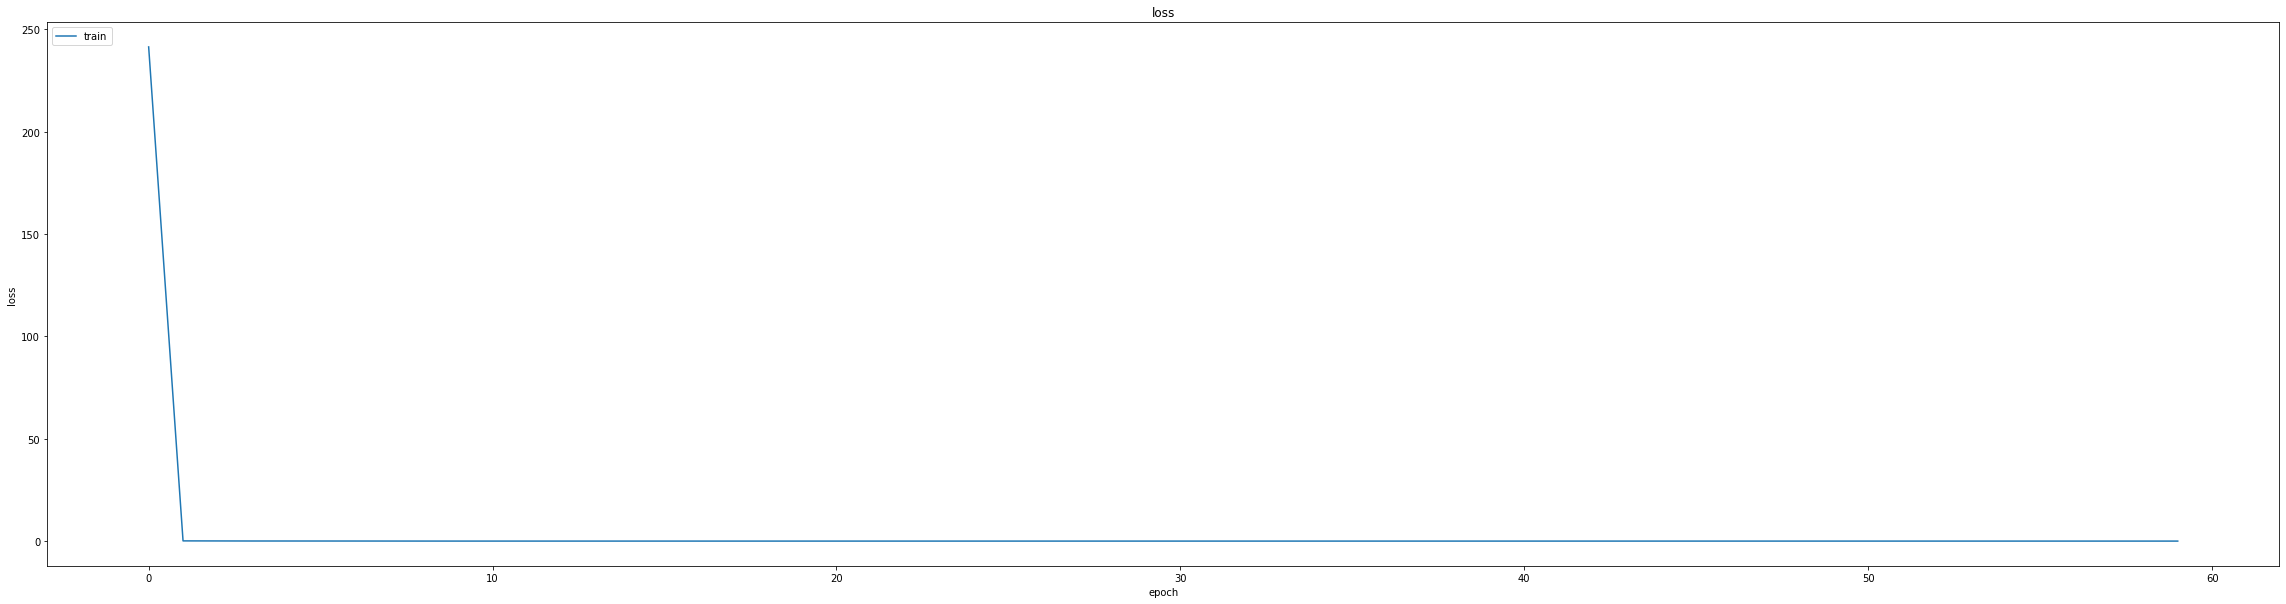

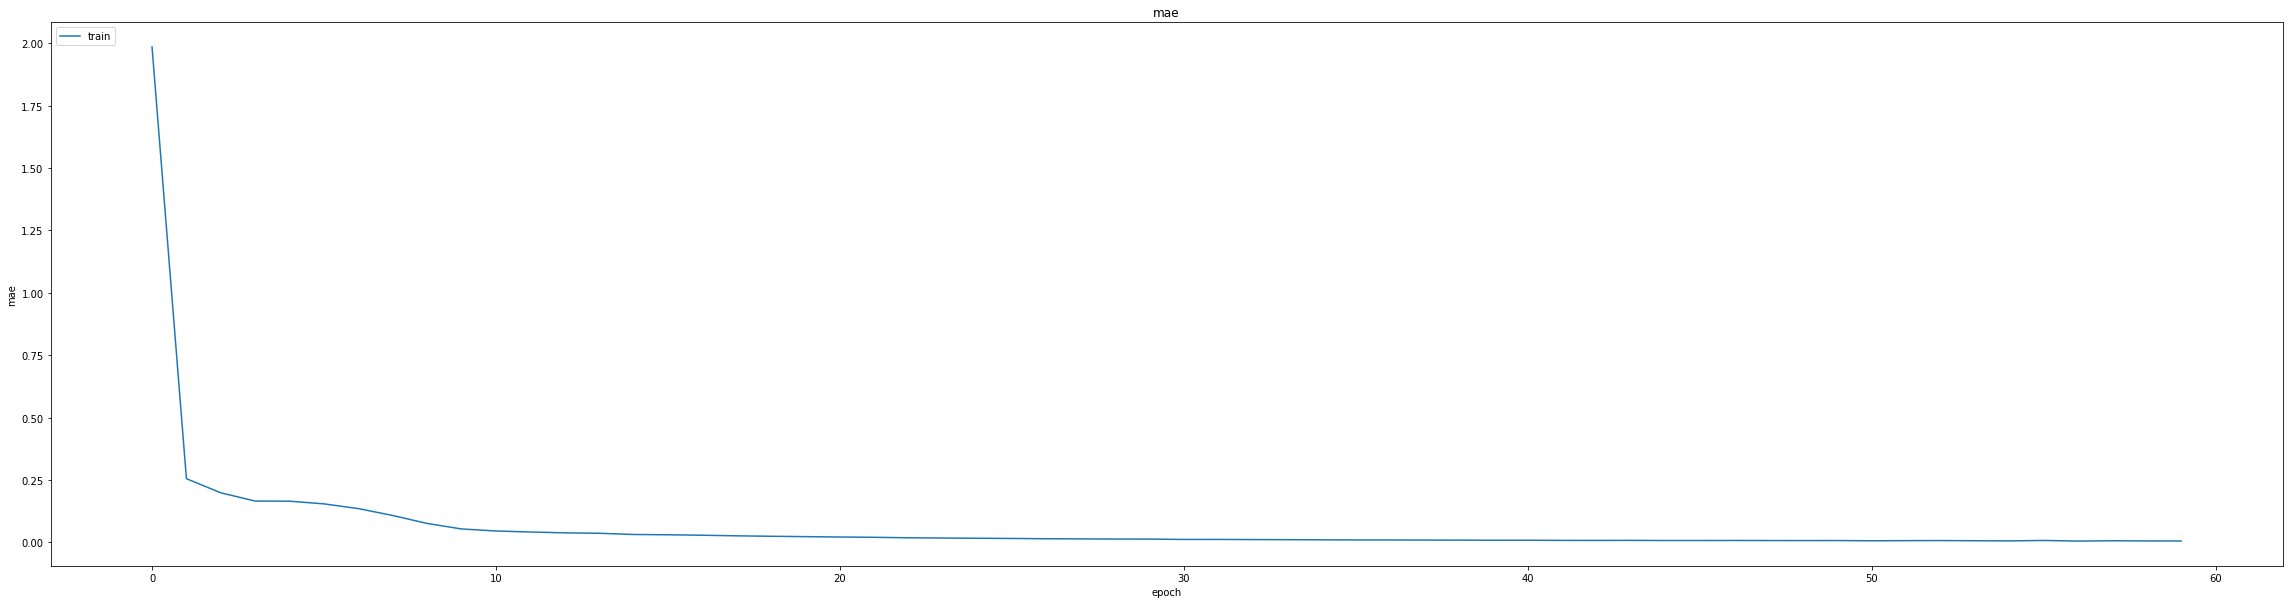

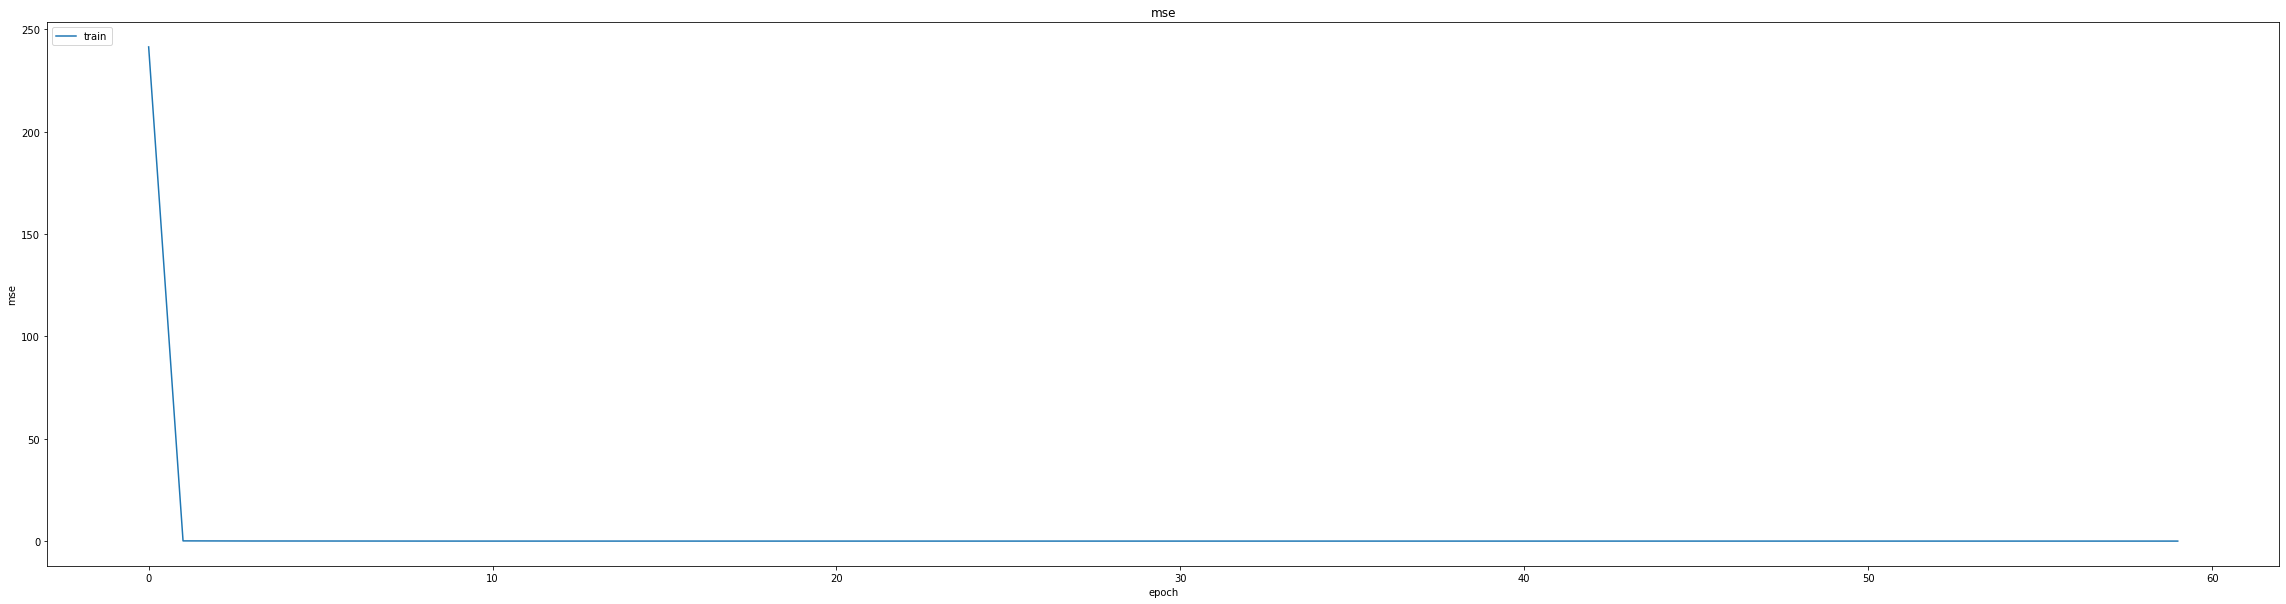

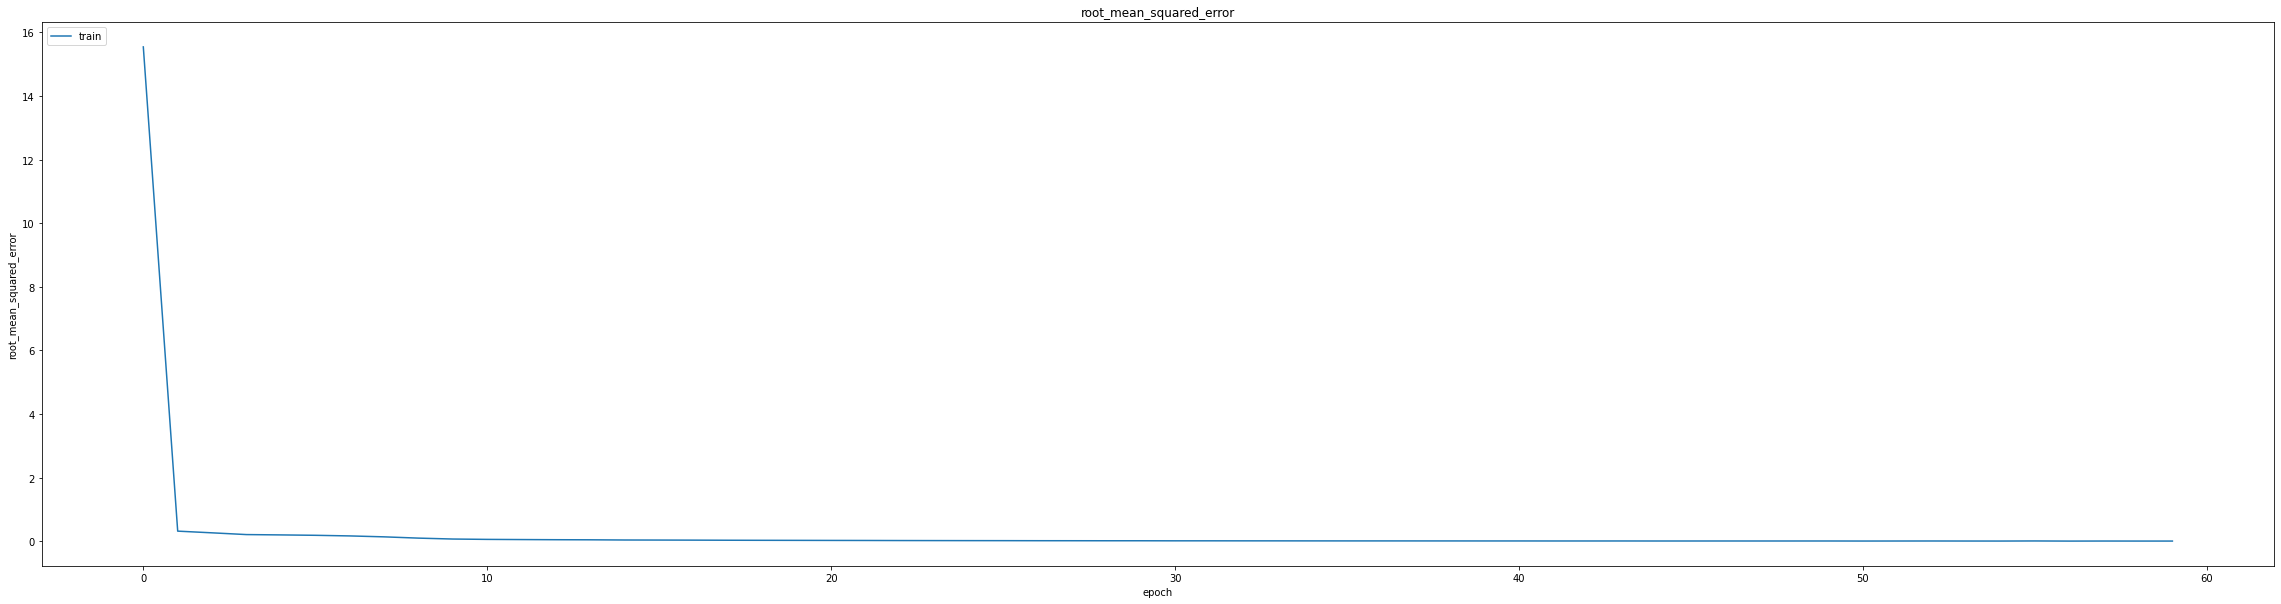

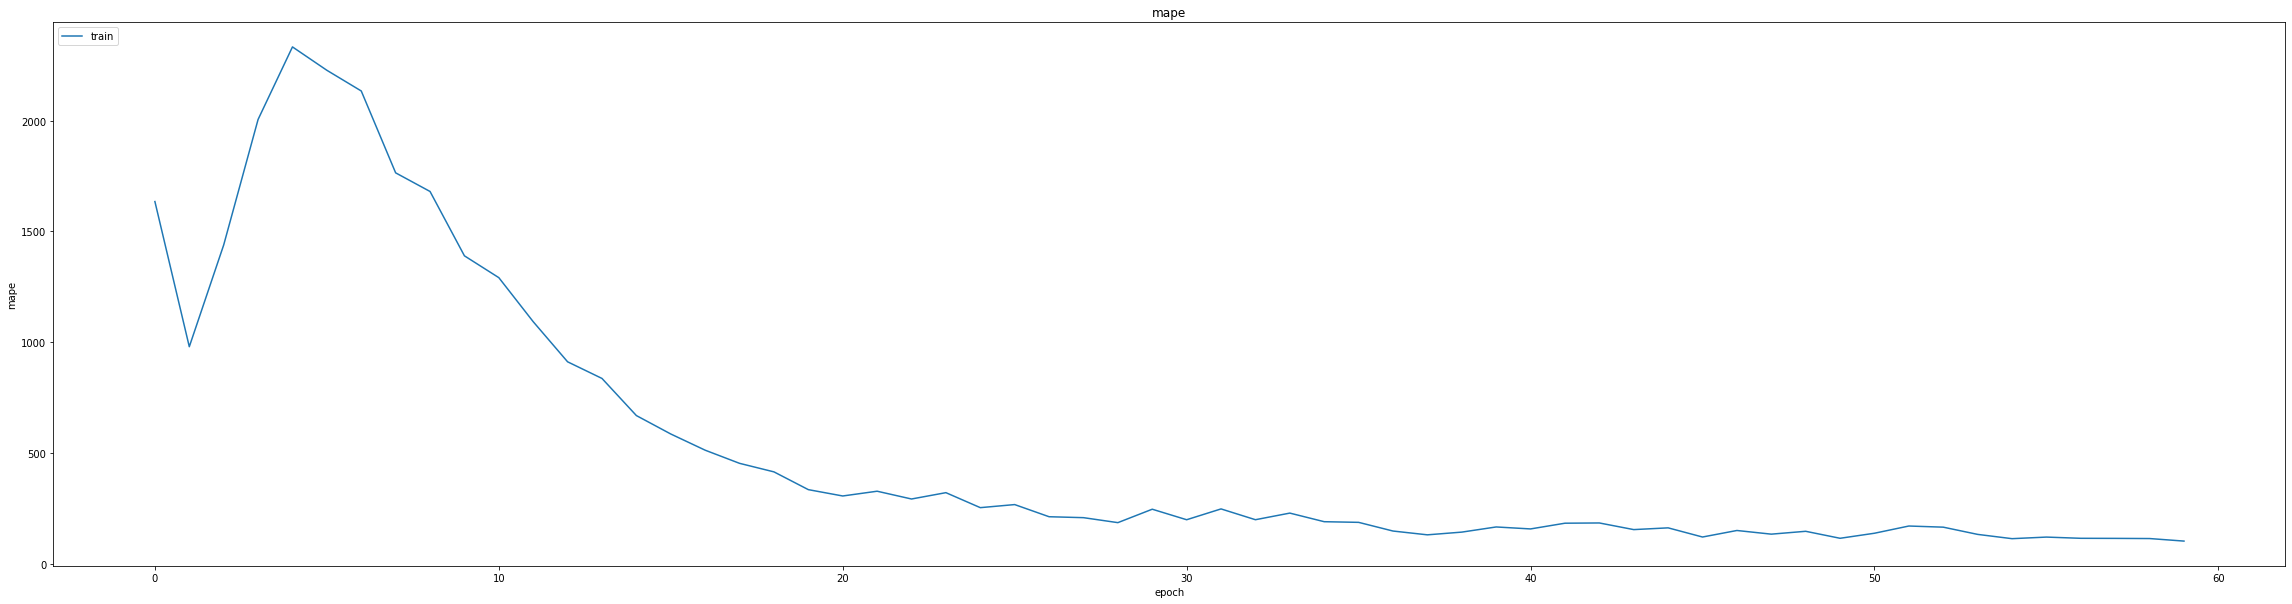

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008105972781777382
0.011196879670023918
1043/1043 [==============================] - 7s 5ms/step
0.9934385911347146


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 8.6051e-04 - mae: 0.0114 - mse: 8.6051e-04 - root_mean_squared_error: 0.0293 - mape: 180.4358
Epoch 1: val_mse did not improve from 0.00013
405/405 [==============================] - 23s 39ms/step - loss: 8.5898e-04 - mae: 0.0114 - mse: 8.5898e-04 - root_mean_squared_error: 0.0293 - mape: 180.1055 - val_loss: 2.2891e-04 - val_mae: 0.0112 - val_mse: 2.2891e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 820.5311 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 3.3672e-05 - mae: 0.0042 - mse: 3.3672e-05 - root_mean_squared_error: 0.0058 - mape: 126.8090
Epoch 2: val_mse did not improve from 0.00013
405/405 [==============================] - 13s 32ms/step - loss: 3.3672e-05 - mae: 0.0042 - mse: 3.3672e-05 - root_mean_squared_error: 0.0058 - mape: 126.8090 - val_loss: 1.9231e-04 - val_mae: 0.0100 - val_mse: 1.9231e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 782.7760 - lr:

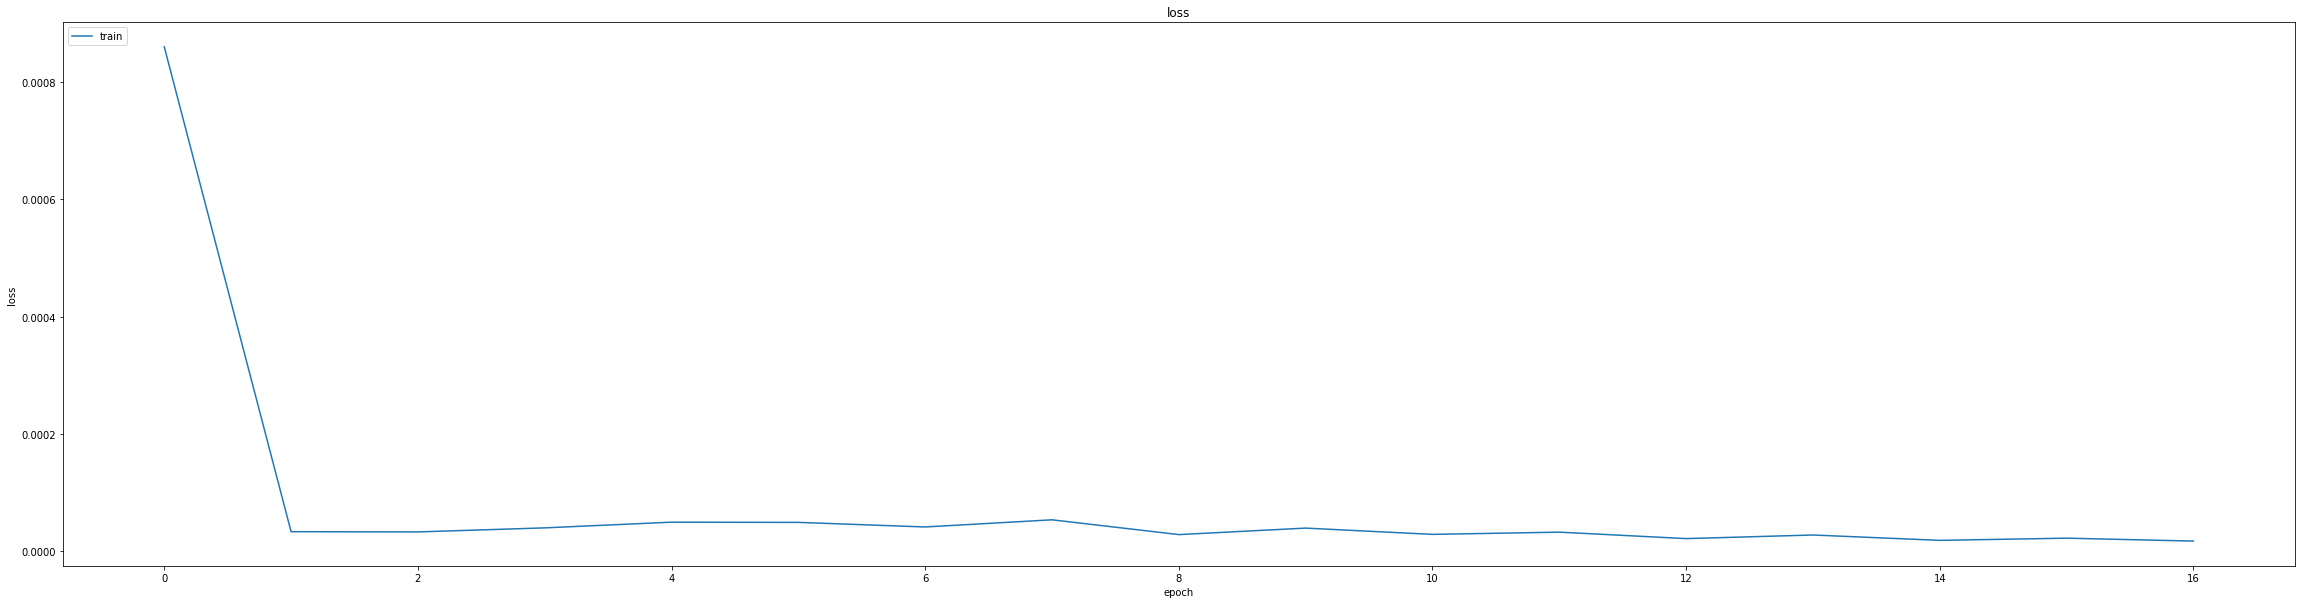

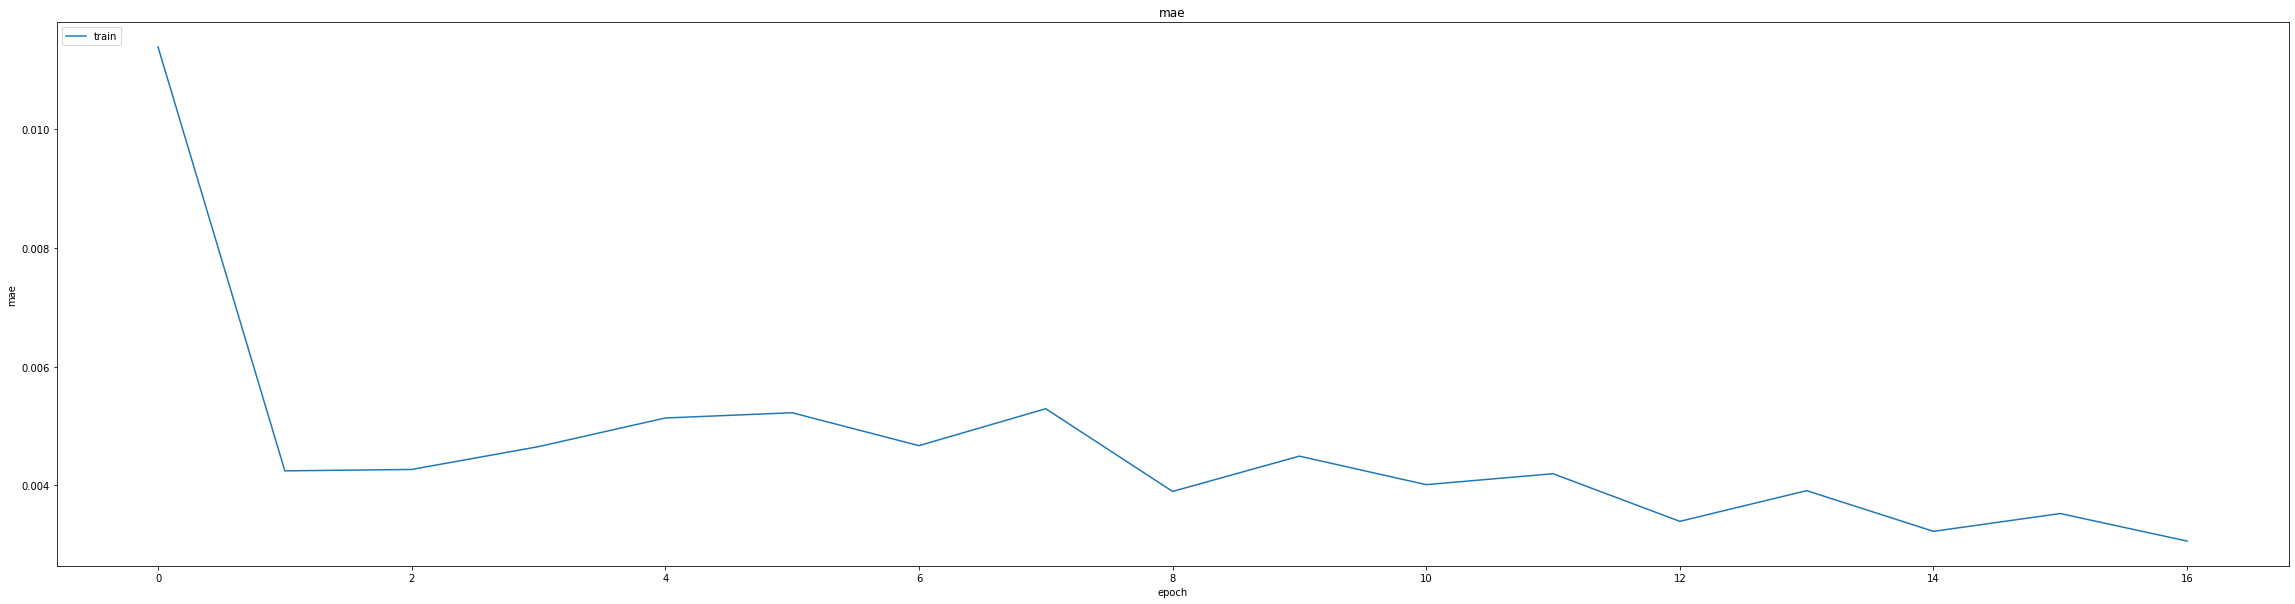

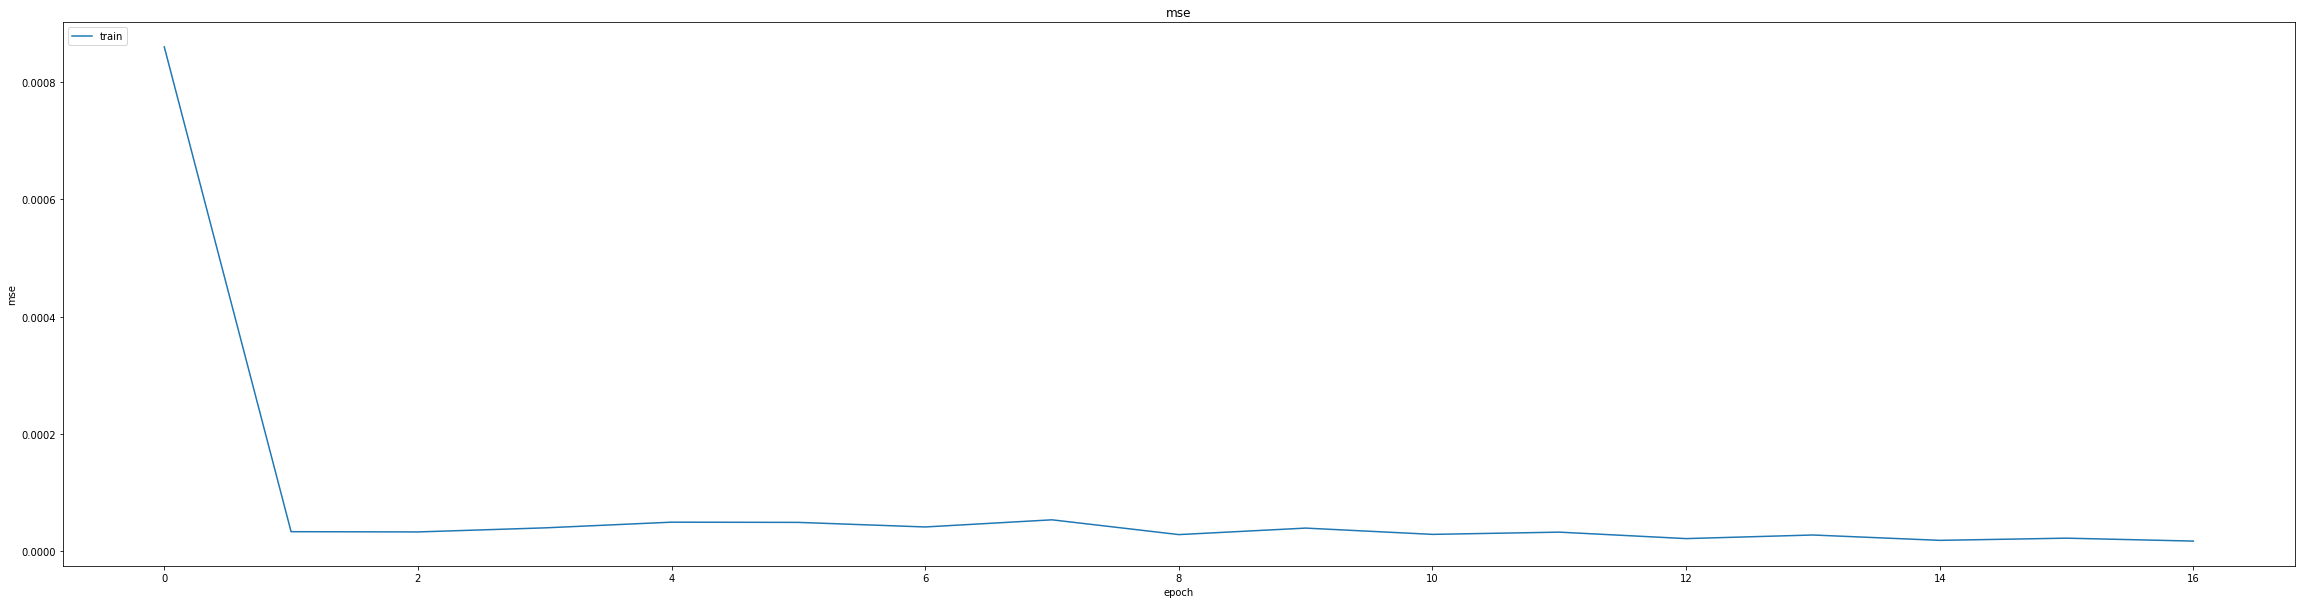

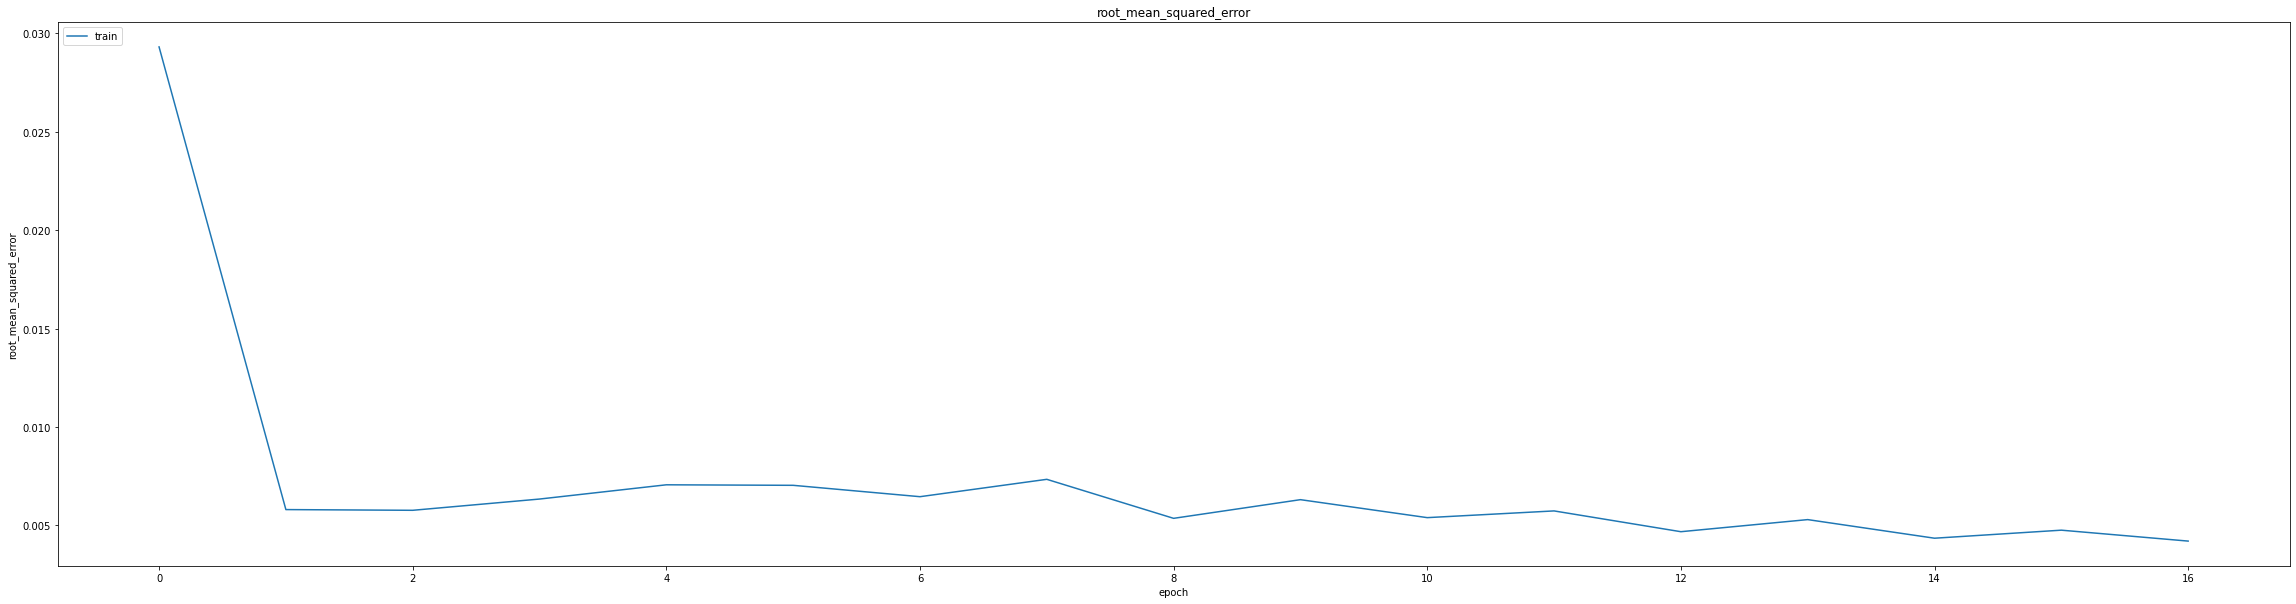

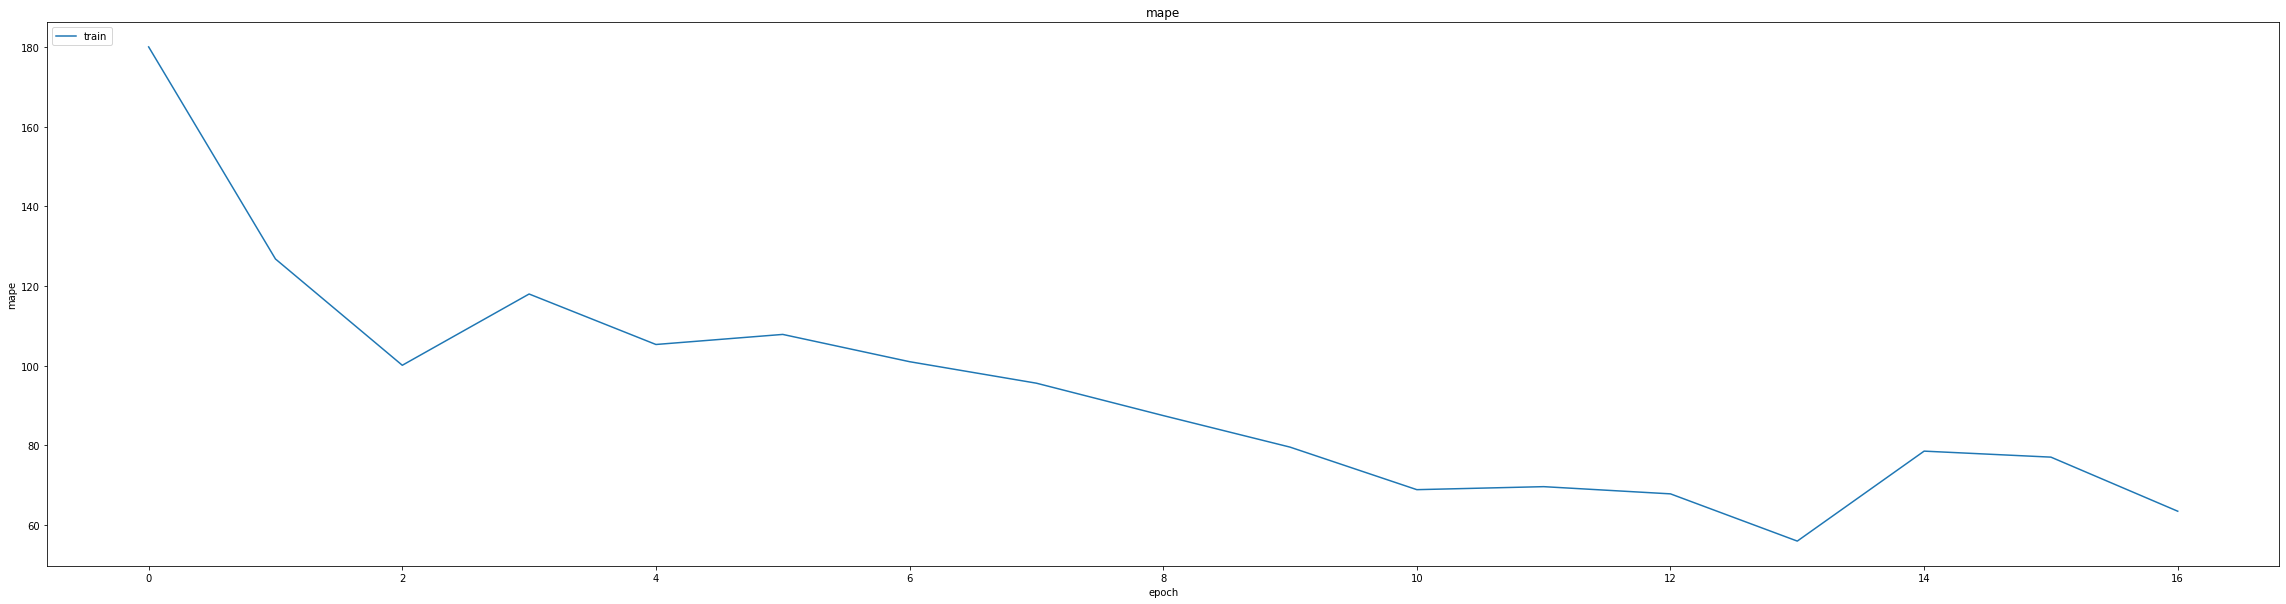

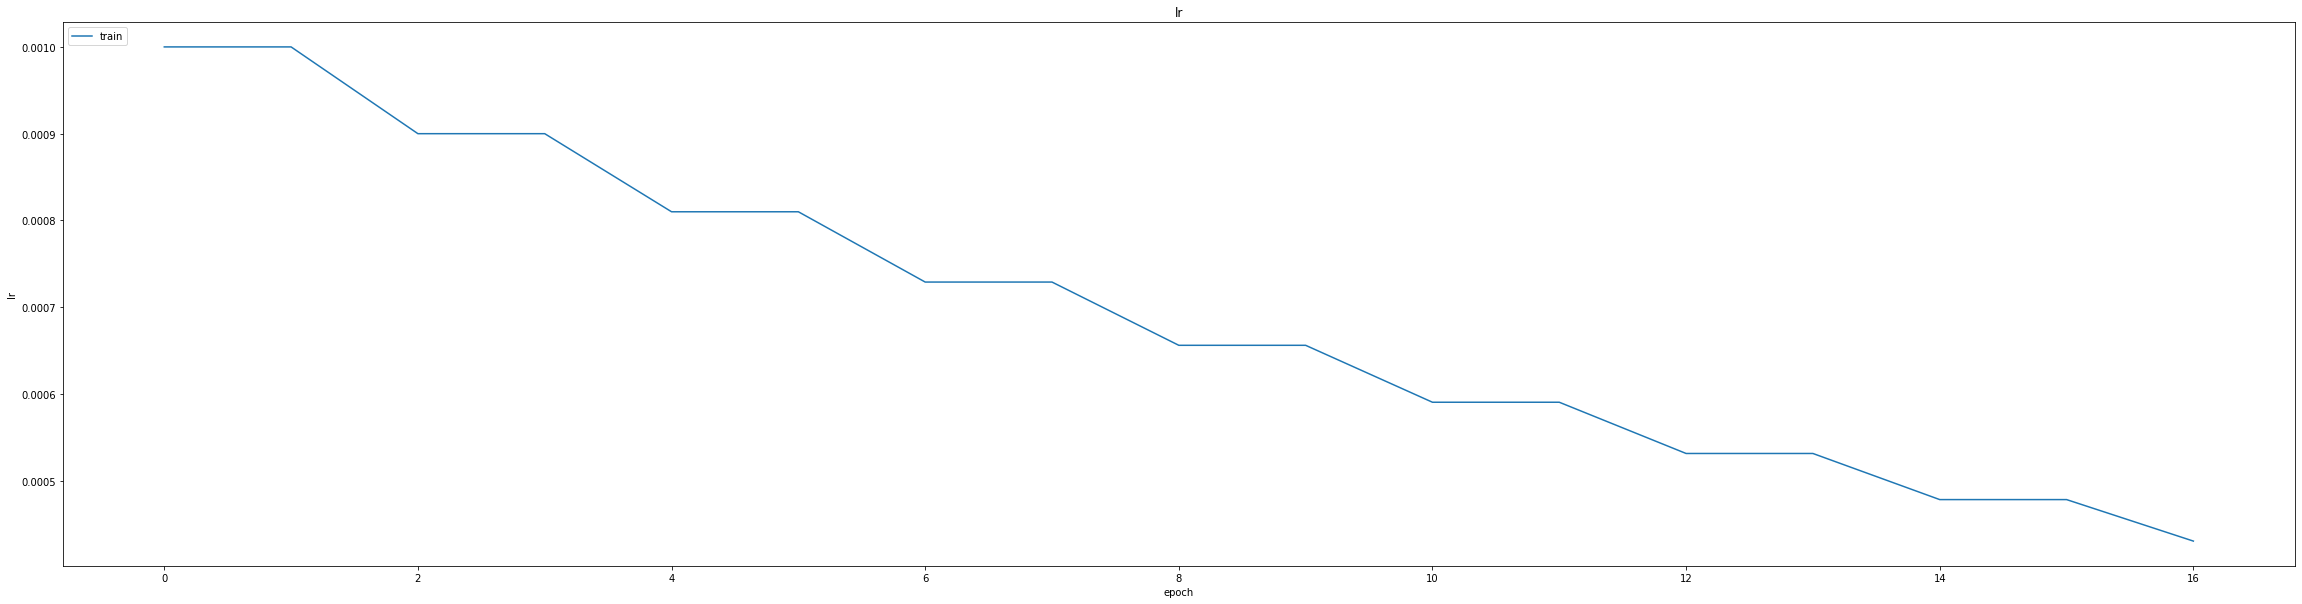

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009970046579837799
0.013867639005184174
1043/1043 [==============================] - 7s 5ms/step
0.9840544979888567


1043/1043 [==============================] - 14s 6ms/step


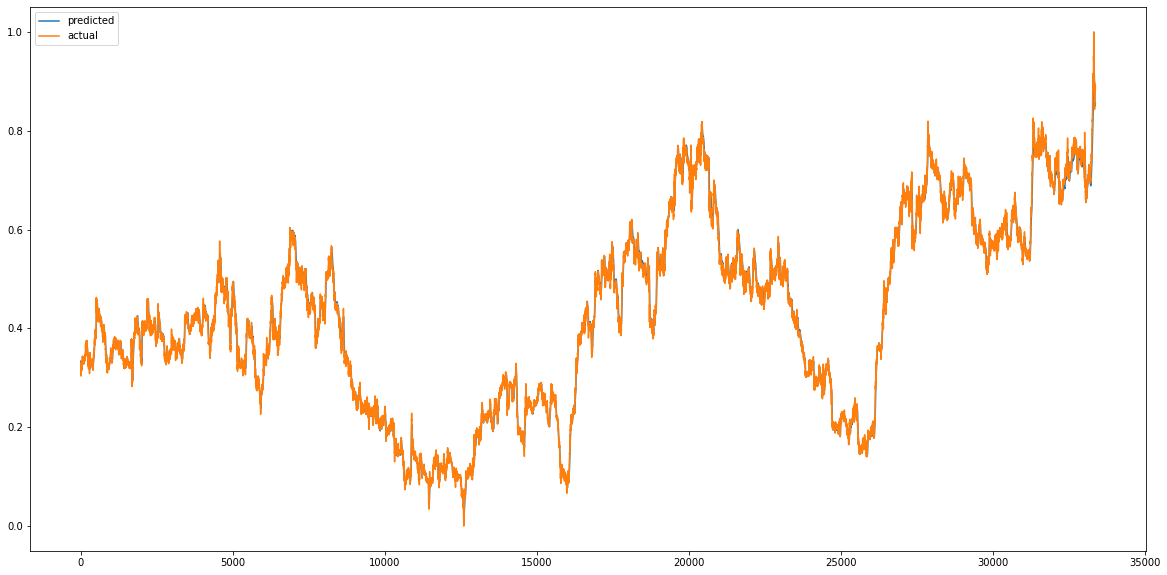

In [17]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


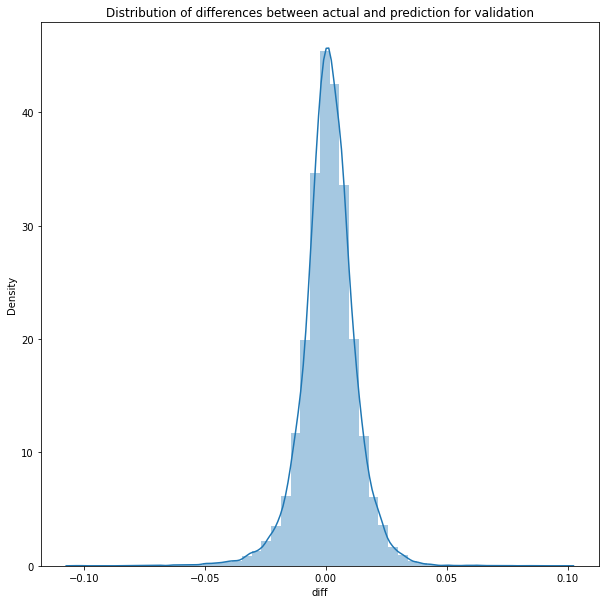

In [18]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 6s 6ms/step


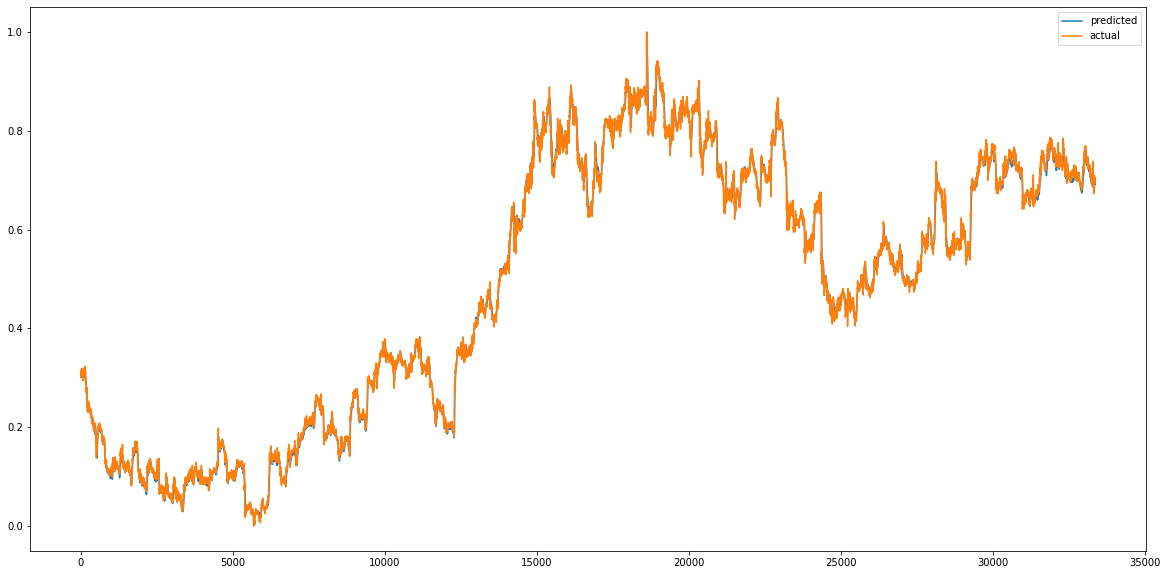

In [19]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


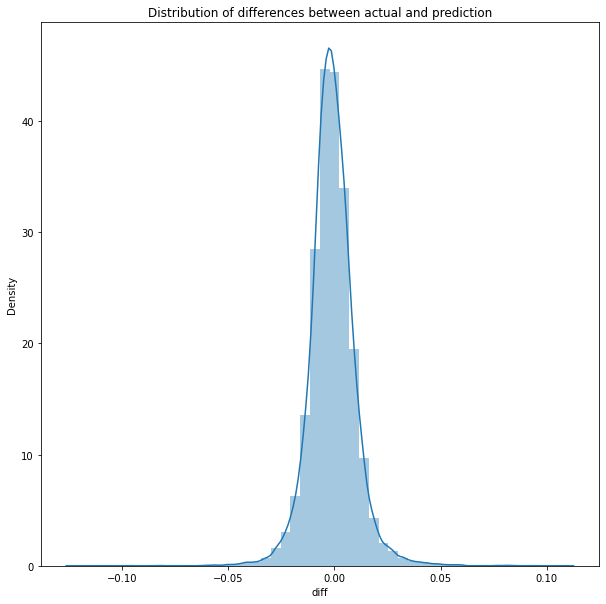

In [20]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00011892042785066944
RMSE :  0.010905064321253197
MAE :  0.007827865312350517
1043/1043 [==============================] - 6s 6ms/step
R2_Score  : 0.9983276779440126


count    33373.000000
mean        -0.001031
std          0.010856
min         -0.122117
25%         -0.006895
50%         -0.001372
75%          0.004710
max          0.108443
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 350.7530 - mae: 2.9374 - mse: 350.7530 - root_mean_squared_error: 18.7284 - mape: 6306.2559
Epoch 1: val_mse improved from inf to 0.04917, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 30s 52ms/step - loss: 350.7530 - mae: 2.9374 - mse: 350.7530 - root_mean_squared_error: 18.7284 - mape: 6306.2559 - val_loss: 0.0492 - val_mae: 0.1836 - val_mse: 0.0492 - val_root_mean_squared_error: 0.2217 - val_mape: 16326.8467
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 0.0586 - mae: 0.2075 - mse: 0.0586 - root_mean_squared_error: 0.2420 - mape: 3093.4424
Epoch 2: val_mse improved from 0.04917 to 0.03595, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0585 - mae: 0.2073 - mse: 0.0585 - root_mean_squared_error: 0.2418 - mape: 3073.3052 - val_loss: 0.0360 - val_mae: 0.1585 - val_mse: 0.0360 - val_root_mean_squared_error: 0.1896 - val_mape: 12851.3711
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 0.0436 - mae: 0.1764 - mse: 0.0436 - root_mean_squared_error: 0.2088 - mape: 2741.8691
Epoch 3: val_mse did not improve from 0.03595
405/405 [==============================] - 7s 17ms/step - loss: 0.0436 - mae: 0.1764 - mse: 0.0436 - root_mean_squared_error: 0.2088 - mape: 2723.9868 - val_loss: 0.0384 - val_mae: 0.1619 - val_mse: 0.0384 - val_root_mean_squared_error: 0.1959 - val_mape: 11373.6855
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 0.0414 - mae: 0.1700 - mse: 0.0414 - root_mean_squared_error: 0.2035 - mape: 2496.9248
Epoch 4: val_mse did not improve from 0.03595
405/405 [==============================] - 7s 17ms/step - l

405/405 [==============================] - 18s 44ms/step - loss: 0.0246 - mae: 0.1228 - mse: 0.0246 - root_mean_squared_error: 0.1570 - mape: 1852.2930 - val_loss: 0.0104 - val_mae: 0.0832 - val_mse: 0.0104 - val_root_mean_squared_error: 0.1022 - val_mape: 7893.1558
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 0.0077 - mae: 0.0638 - mse: 0.0077 - root_mean_squared_error: 0.0876 - mape: 1345.6727
Epoch 20: val_mse improved from 0.01044 to 0.00154, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0077 - mae: 0.0638 - mse: 0.0077 - root_mean_squared_error: 0.0876 - mape: 1340.1298 - val_loss: 0.0015 - val_mae: 0.0273 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 5888.4082
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0480 - mse: 0.0042 - root_mean_squared_error: 0.0650 - mape: 1137.1040
Epoch 21: val_mse improved from 0.00154 to 0.00114, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0042 - mae: 0.0480 - mse: 0.0042 - root_mean_squared_error: 0.0649 - mape: 1132.3572 - val_loss: 0.0011 - val_mae: 0.0270 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0338 - val_mape: 4900.9932
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0391 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1164.3267
Epoch 22: val_mse did not improve from 0.00114
405/405 [==============================] - 7s 17ms/step - loss: 0.0028 - mae: 0.0391 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1164.3267 - val_loss: 0.0016 - val_mae: 0.0356 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0397 - val_mape: 4215.1123
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0327 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 1072.7032
Epoch 23: val_mse improved from 0.00114 to 0.00046, saving model to /content/drive/MyDrive/modelweights/

405/405 [==============================] - 18s 44ms/step - loss: 0.0020 - mae: 0.0327 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 1068.2032 - val_loss: 4.6487e-04 - val_mae: 0.0156 - val_mse: 4.6487e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 3572.9009
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0289 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 720.4055
Epoch 24: val_mse improved from 0.00046 to 0.00038, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0015 - mae: 0.0289 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 720.4055 - val_loss: 3.8099e-04 - val_mae: 0.0148 - val_mse: 3.8099e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 3123.7866
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0246 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 602.5963
Epoch 25: val_mse improved from 0.00038 to 0.00033, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0011 - mae: 0.0246 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 598.6279 - val_loss: 3.2508e-04 - val_mae: 0.0140 - val_mse: 3.2508e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2655.2283
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 9.0901e-04 - mae: 0.0230 - mse: 9.0901e-04 - root_mean_squared_error: 0.0301 - mape: 592.6392
Epoch 26: val_mse did not improve from 0.00033
405/405 [==============================] - 7s 17ms/step - loss: 9.0901e-04 - mae: 0.0230 - mse: 9.0901e-04 - root_mean_squared_error: 0.0301 - mape: 592.6392 - val_loss: 6.8569e-04 - val_mae: 0.0220 - val_mse: 6.8569e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 2279.3206
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 7.4261e-04 - mae: 0.0208 - mse: 7.4261e-04 - root_mean_squared_error: 0.0273 - mape: 403.2473
Epoch 27: val_mse did not improve from 0.00033
405/405 [============

405/405 [==============================] - 18s 45ms/step - loss: 5.8670e-04 - mae: 0.0185 - mse: 5.8670e-04 - root_mean_squared_error: 0.0242 - mape: 463.4394 - val_loss: 2.9413e-04 - val_mae: 0.0130 - val_mse: 2.9413e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 1837.0092
Epoch 29/60
402/405 [============================>.] - ETA: 0s - loss: 4.9579e-04 - mae: 0.0171 - mse: 4.9579e-04 - root_mean_squared_error: 0.0223 - mape: 334.8531
Epoch 29: val_mse did not improve from 0.00029
405/405 [==============================] - 7s 17ms/step - loss: 4.9537e-04 - mae: 0.0171 - mse: 4.9537e-04 - root_mean_squared_error: 0.0223 - mape: 332.6602 - val_loss: 4.0719e-04 - val_mae: 0.0150 - val_mse: 4.0719e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 1665.8757
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 4.5559e-04 - mae: 0.0164 - mse: 4.5559e-04 - root_mean_squared_error: 0.0213 - mape: 354.0564
Epoch 30: val_mse did not improve from 0.00029
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 2.9627e-04 - mae: 0.0132 - mse: 2.9627e-04 - root_mean_squared_error: 0.0172 - mape: 265.4596 - val_loss: 2.8162e-04 - val_mae: 0.0125 - val_mse: 2.8162e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 1332.0179
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 2.5051e-04 - mae: 0.0122 - mse: 2.5051e-04 - root_mean_squared_error: 0.0158 - mape: 262.2744
Epoch 34: val_mse did not improve from 0.00028
405/405 [==============================] - 7s 17ms/step - loss: 2.5051e-04 - mae: 0.0122 - mse: 2.5051e-04 - root_mean_squared_error: 0.0158 - mape: 262.2744 - val_loss: 3.7661e-04 - val_mae: 0.0158 - val_mse: 3.7661e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 1301.8958
Epoch 35/60
405/405 [==============================] - ETA: 0s - loss: 2.5112e-04 - mae: 0.0122 - mse: 2.5112e-04 - root_mean_squared_error: 0.0158 - mape: 237.3768
Epoch 35: val_mse did not improve from 0.00028
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 1.6366e-04 - mae: 0.0098 - mse: 1.6366e-04 - root_mean_squared_error: 0.0128 - mape: 193.7506 - val_loss: 2.5993e-04 - val_mae: 0.0121 - val_mse: 2.5993e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 981.1162
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 1.5198e-04 - mae: 0.0094 - mse: 1.5198e-04 - root_mean_squared_error: 0.0123 - mape: 210.9798
Epoch 42: val_mse improved from 0.00026 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 1.5173e-04 - mae: 0.0094 - mse: 1.5173e-04 - root_mean_squared_error: 0.0123 - mape: 210.0846 - val_loss: 2.5952e-04 - val_mae: 0.0120 - val_mse: 2.5952e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1032.4669
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 1.3695e-04 - mae: 0.0088 - mse: 1.3695e-04 - root_mean_squared_error: 0.0117 - mape: 210.4087
Epoch 43: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 1.3700e-04 - mae: 0.0088 - mse: 1.3700e-04 - root_mean_squared_error: 0.0117 - mape: 210.0247 - val_loss: 2.3533e-04 - val_mae: 0.0113 - val_mse: 2.3533e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 1024.1134
Epoch 44/60
405/405 [==============================] - ETA: 0s - loss: 1.3007e-04 - mae: 0.0087 - mse: 1.3007e-04 - root_mean_squared_error: 0.0114 - mape: 195.2649
Epoch 44: val_mse did not improve from 0.00024
405/405 [==============================] - 7s 17ms/step - loss: 1.3007e-04 - mae: 0.0087 - mse: 1.3007e-04 - root_mean_squared_error: 0.0114 - mape: 195.2649 - val_loss: 3.1256e-04 - val_mae: 0.0138 - val_mse: 3.1256e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1131.4132
Epoch 45/60
403/405 [============================>.] - ETA: 0s - loss: 1.2065e-04 - mae: 0.0084 - mse: 1.2065e-04 - root_mean_squared_error: 0.0110 - mape: 189.8922
Epoch 45: val_mse did not improve from 0.00024
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 9.9265e-05 - mae: 0.0075 - mse: 9.9265e-05 - root_mean_squared_error: 0.0100 - mape: 163.5779 - val_loss: 2.2645e-04 - val_mae: 0.0112 - val_mse: 2.2645e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 980.4096
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 1.8843e-04 - mae: 0.0095 - mse: 1.8843e-04 - root_mean_squared_error: 0.0137 - mape: 190.1285
Epoch 50: val_mse did not improve from 0.00023
405/405 [==============================] - 7s 17ms/step - loss: 1.8843e-04 - mae: 0.0095 - mse: 1.8843e-04 - root_mean_squared_error: 0.0137 - mape: 190.1285 - val_loss: 3.6427e-04 - val_mae: 0.0145 - val_mse: 3.6427e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 903.5081
Epoch 51/60
402/405 [============================>.] - ETA: 0s - loss: 6.6960e-05 - mae: 0.0062 - mse: 6.6960e-05 - root_mean_squared_error: 0.0082 - mape: 155.5885
Epoch 51: val_mse did not improve from 0.00023
405/405 [======

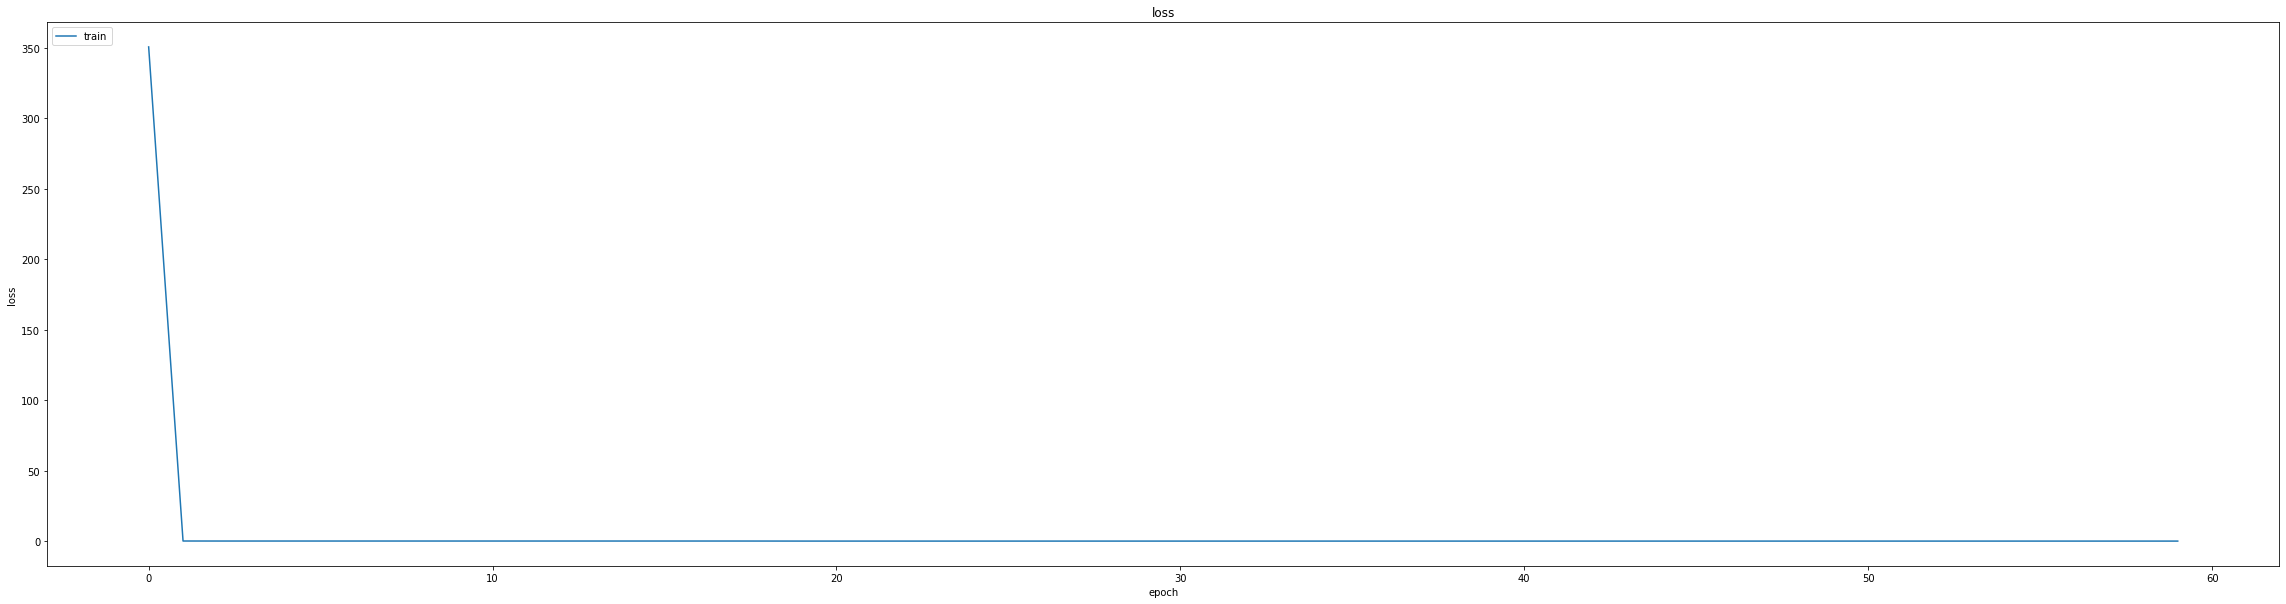

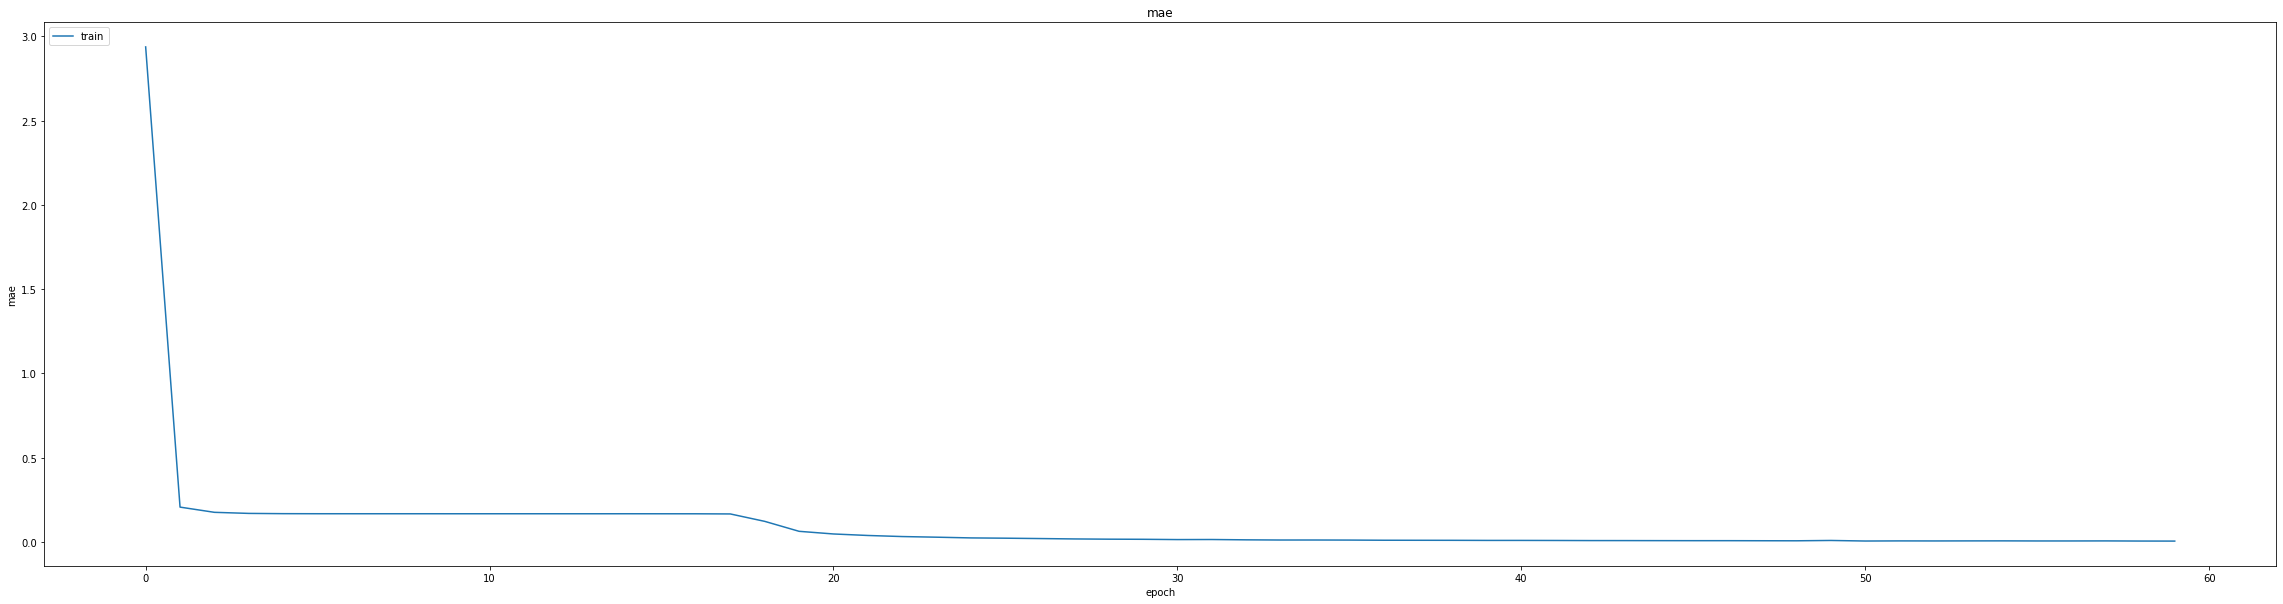

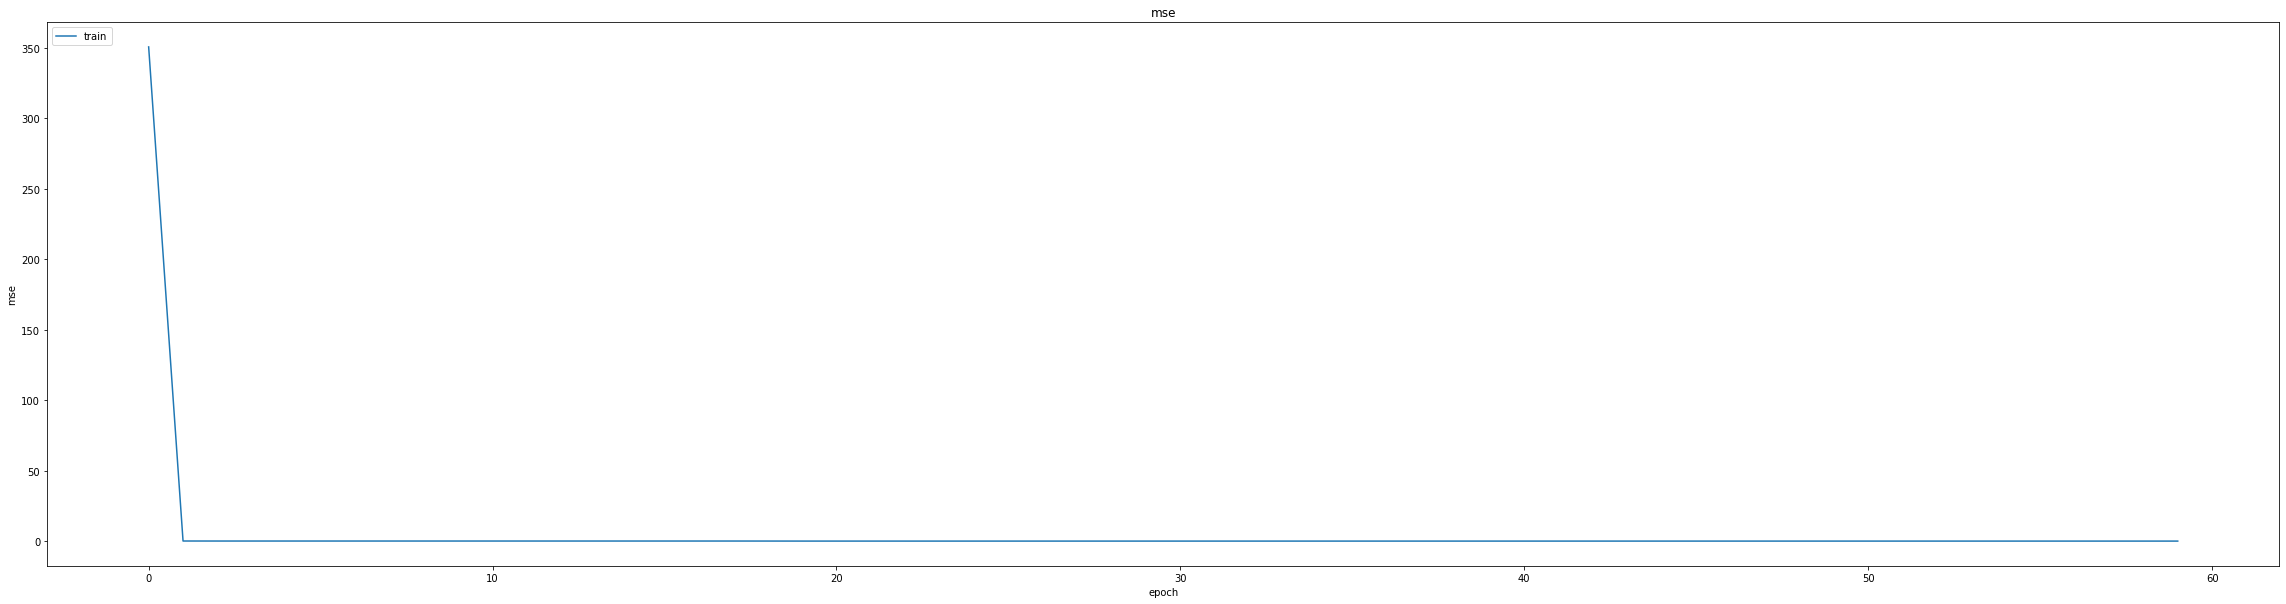

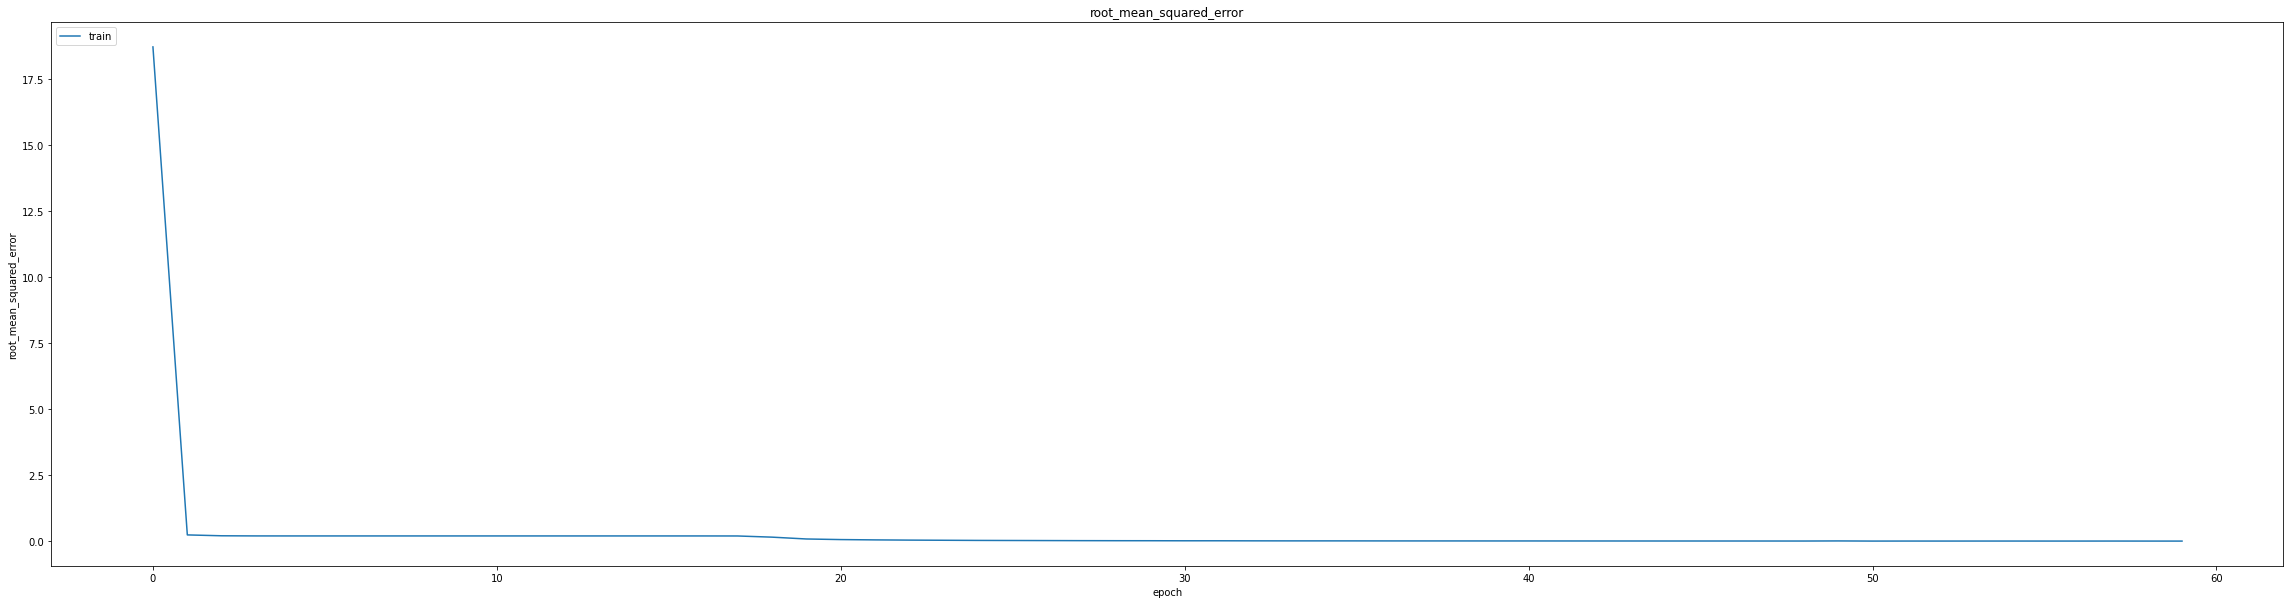

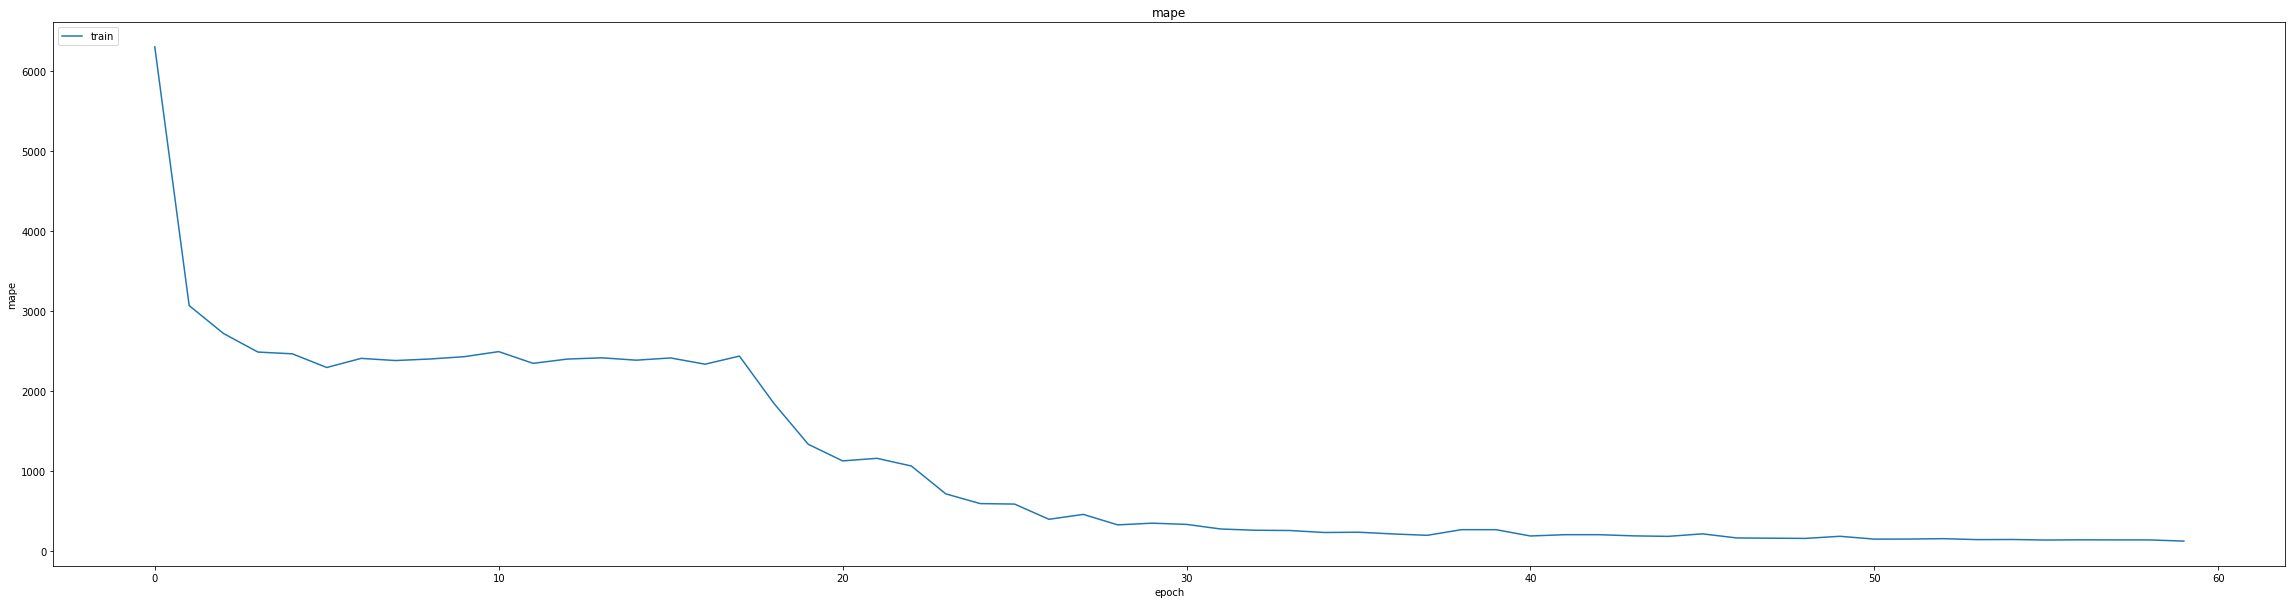

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011153957806527615
0.015048115514218807
1043/1043 [==============================] - 6s 5ms/step
0.987256319152534


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 7.5188e-04 - mae: 0.0120 - mse: 7.5188e-04 - root_mean_squared_error: 0.0274 - mape: 573.1757
Epoch 1: val_mse did not improve from 0.00023
405/405 [==============================] - 15s 27ms/step - loss: 7.4892e-04 - mae: 0.0120 - mse: 7.4892e-04 - root_mean_squared_error: 0.0274 - mape: 570.7155 - val_loss: 2.5182e-04 - val_mae: 0.0118 - val_mse: 2.5182e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 947.8080 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 6.0277e-05 - mae: 0.0059 - mse: 6.0277e-05 - root_mean_squared_error: 0.0078 - mape: 143.5330
Epoch 2: val_mse did not improve from 0.00023
405/405 [==============================] - 9s 21ms/step - loss: 6.0274e-05 - mae: 0.0059 - mse: 6.0274e-05 - root_mean_squared_error: 0.0078 - mape: 143.2732 - val_loss: 2.9353e-04 - val_mae: 0.0131 - val_mse: 2.9353e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 849.6323 - lr: 

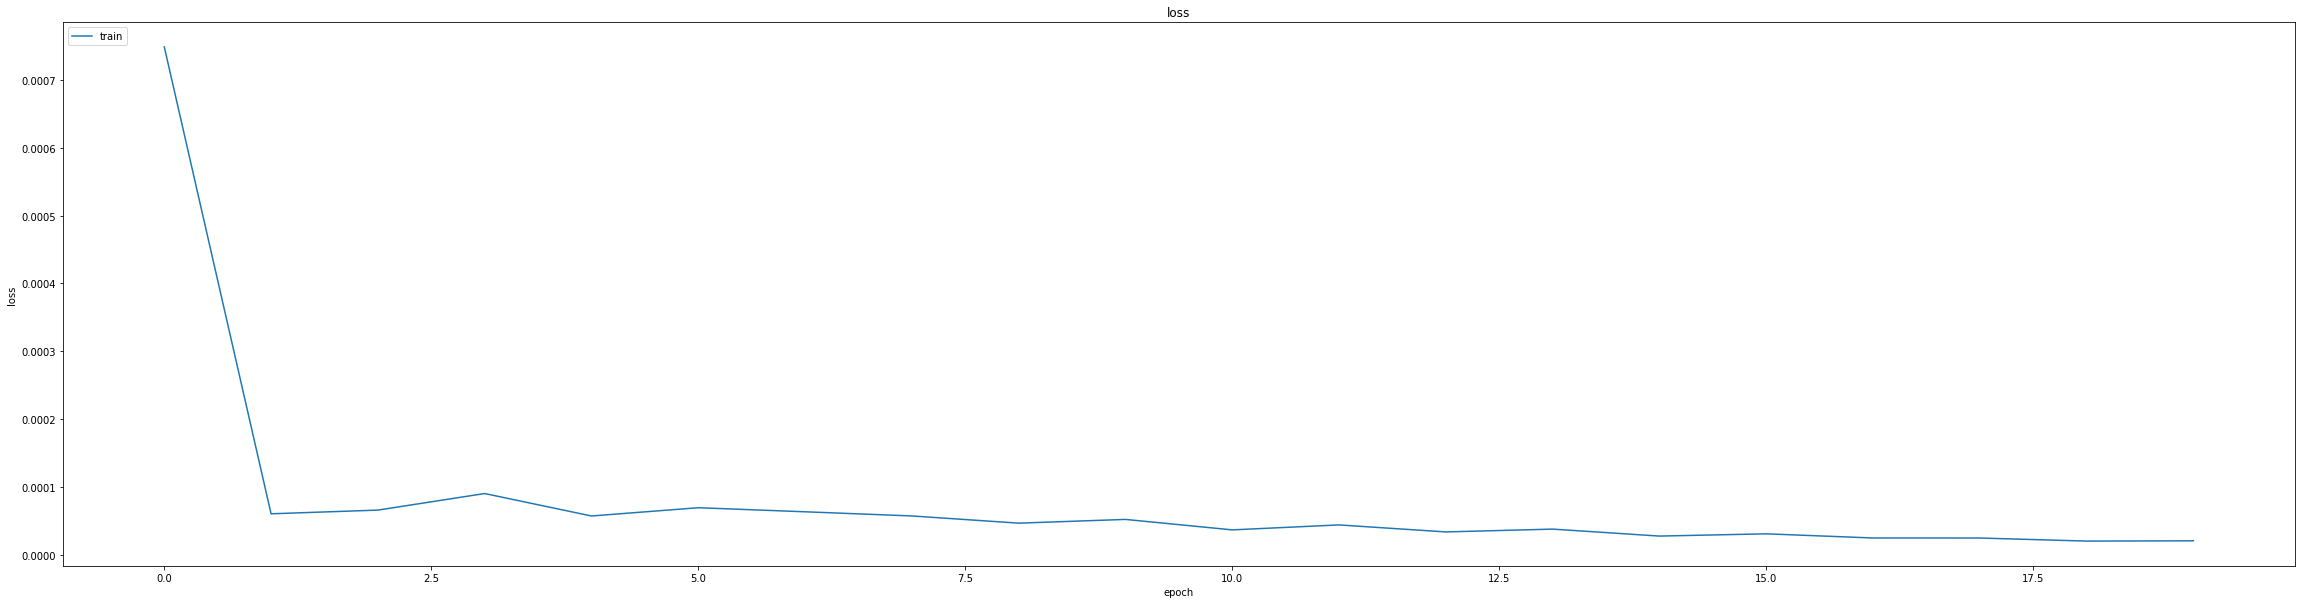

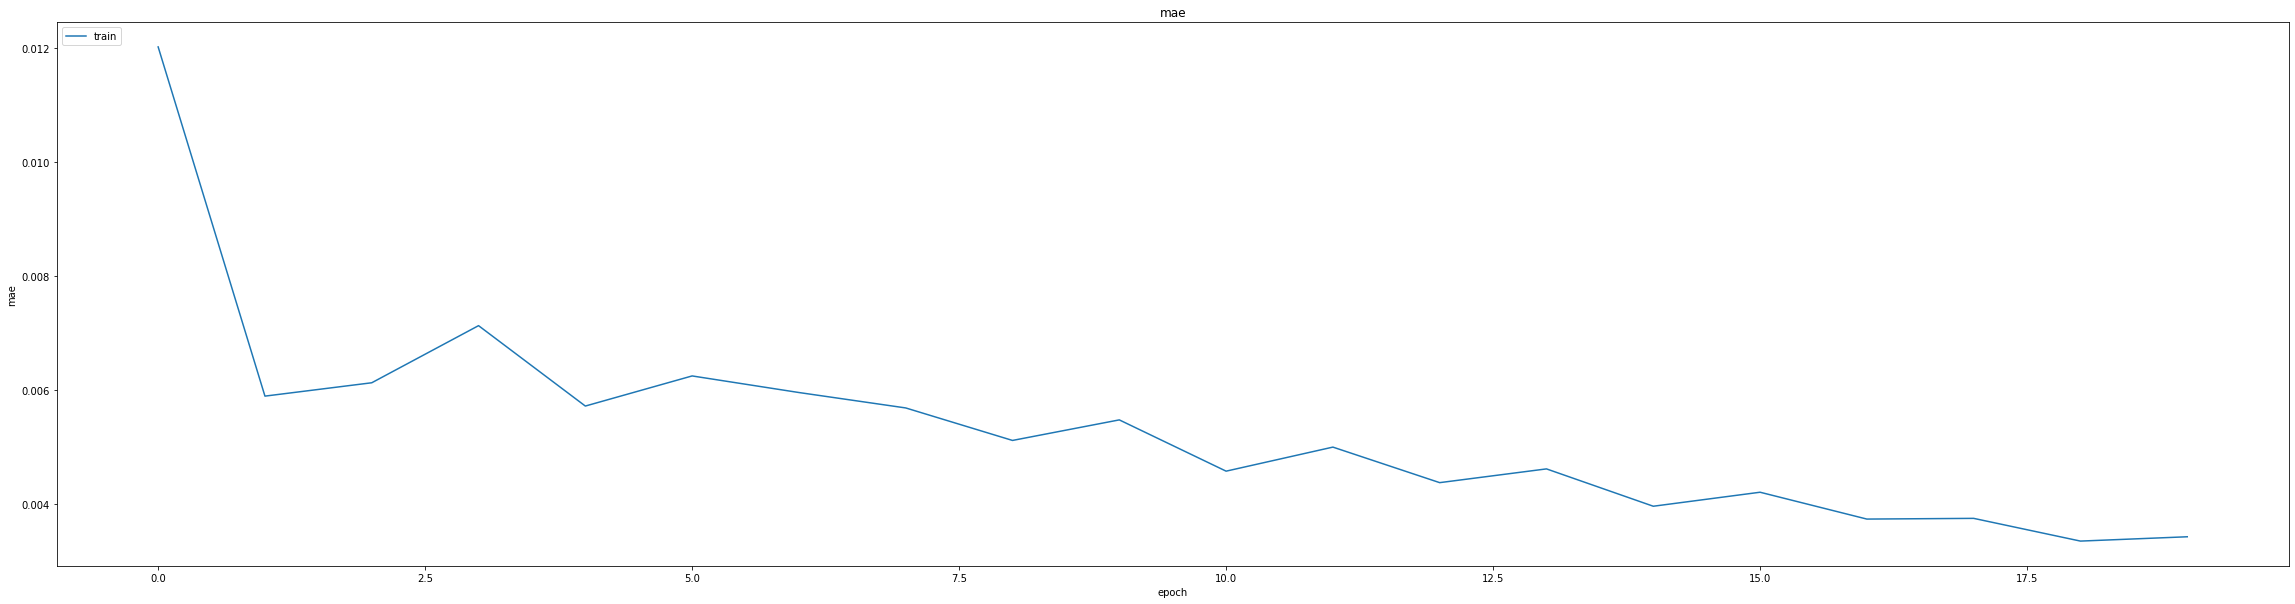

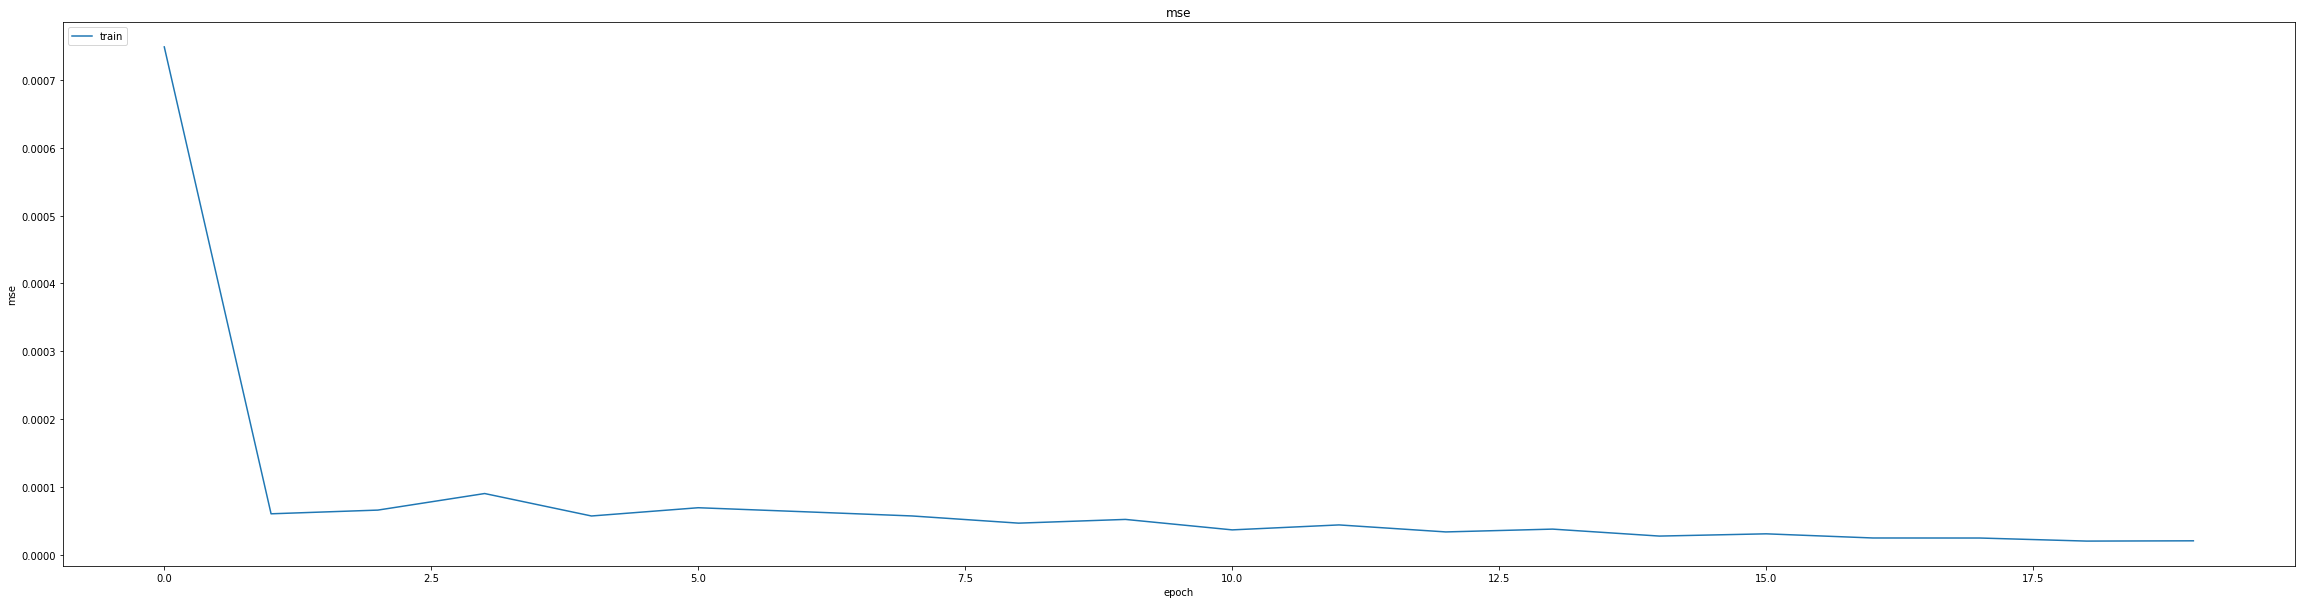

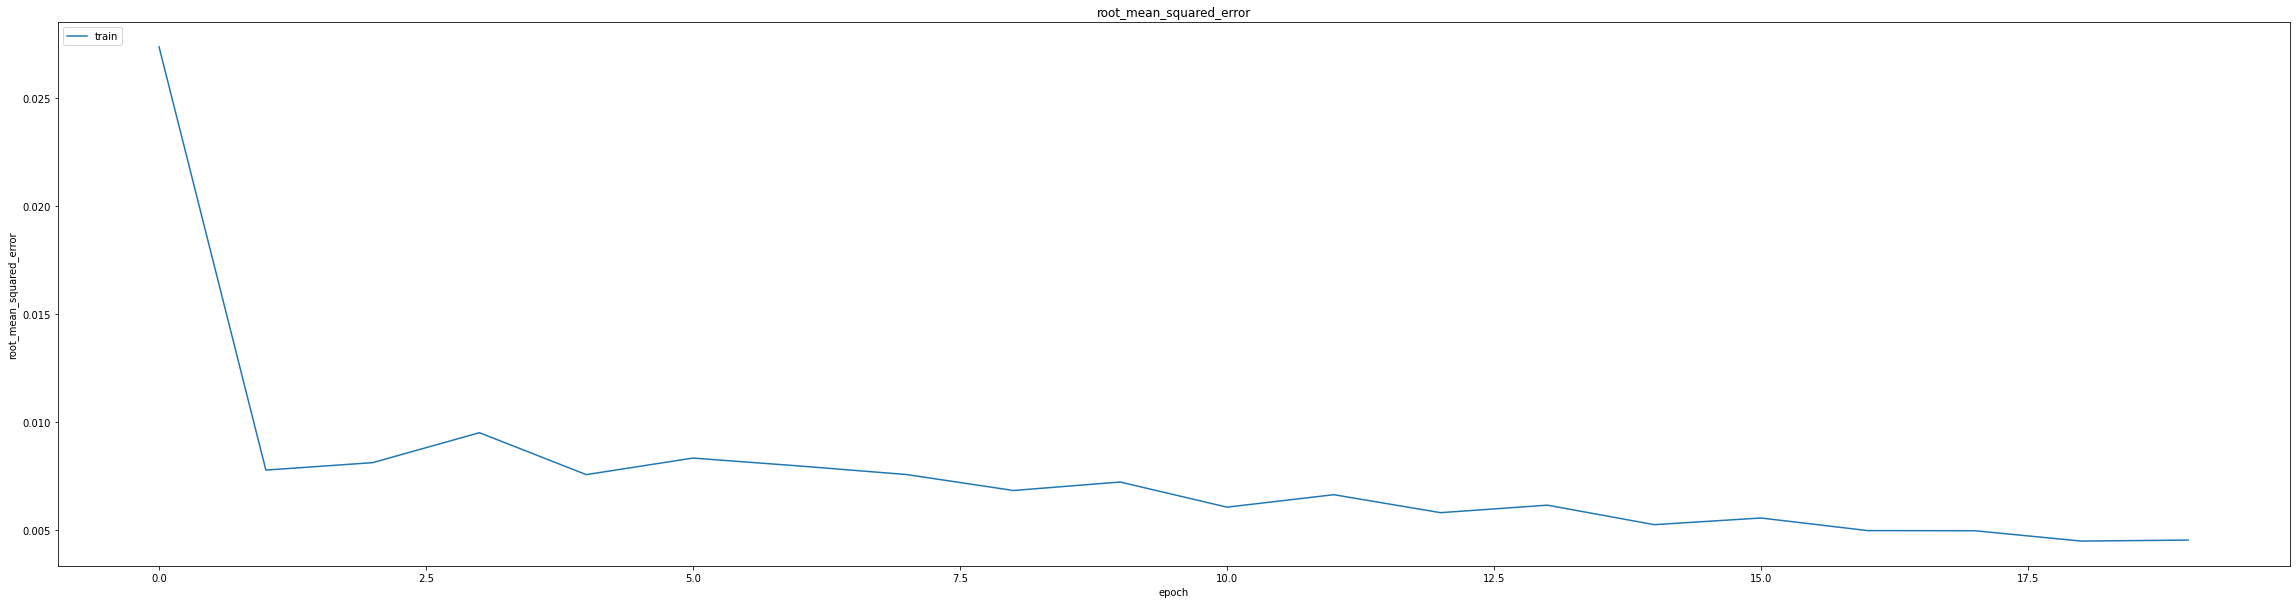

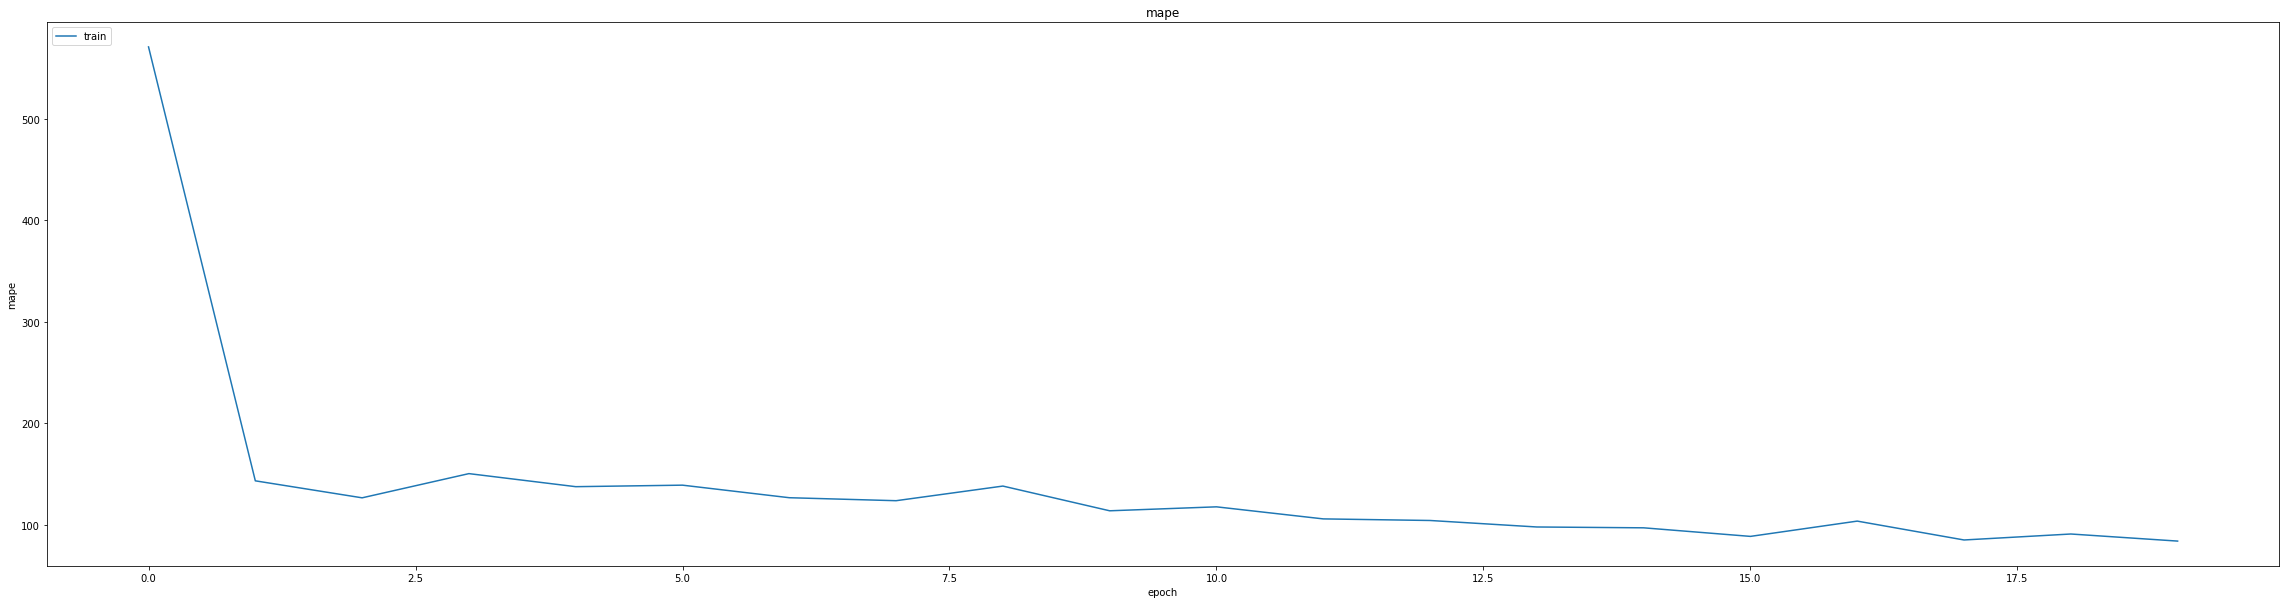

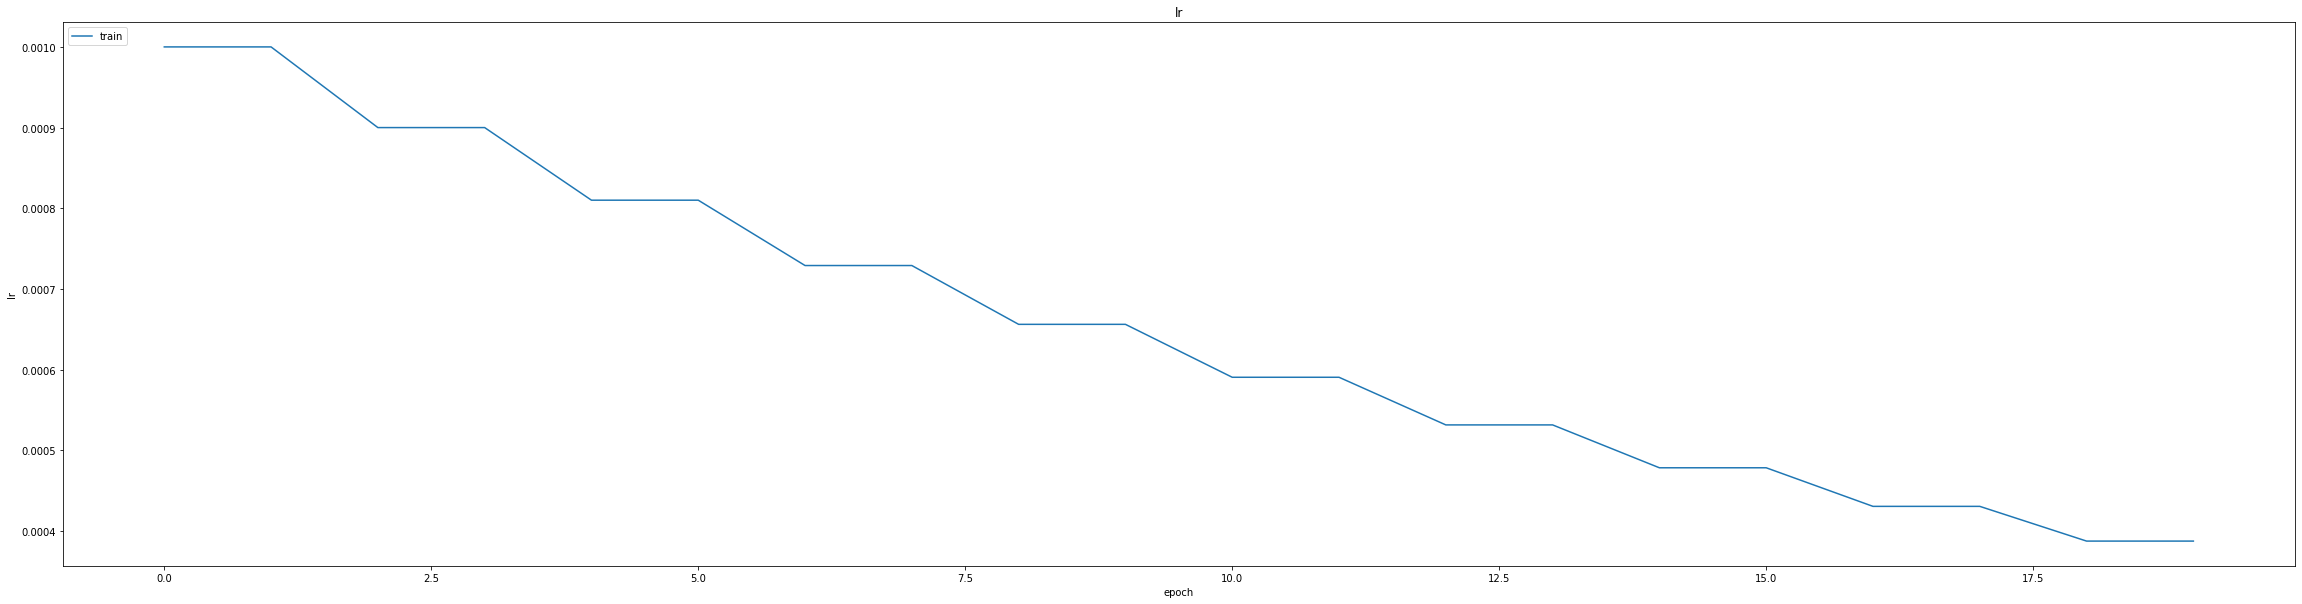

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011827144771814346
0.015690729022026062
1043/1043 [==============================] - 5s 4ms/step
0.9858172254859408


1043/1043 [==============================] - 4s 4ms/step


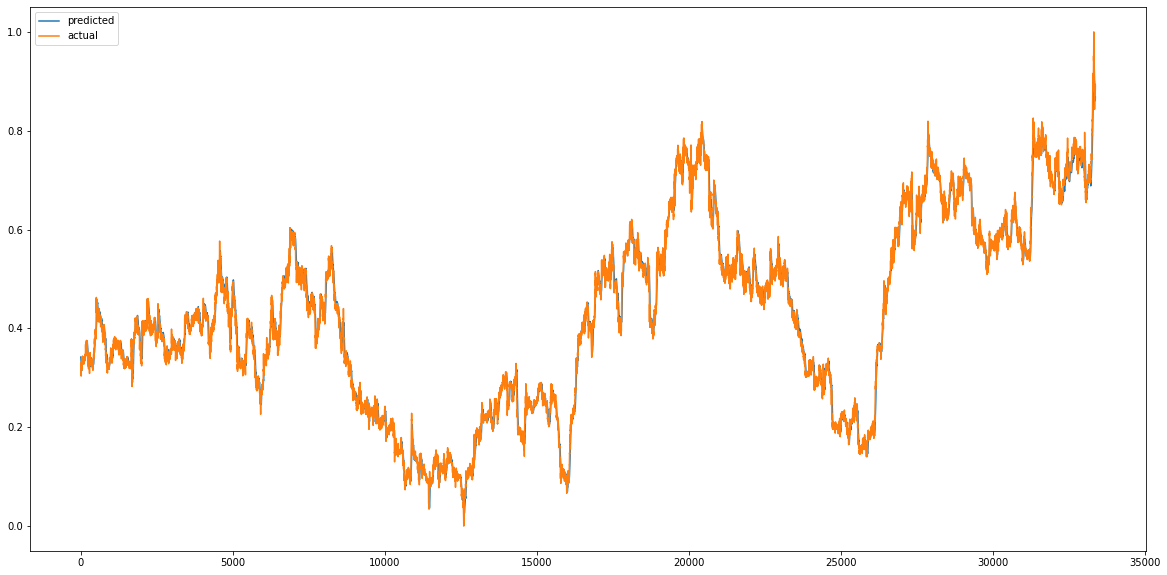

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


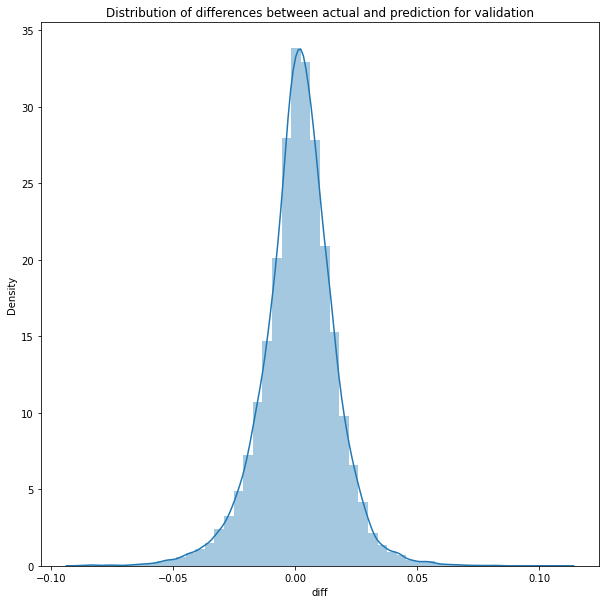

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 4ms/step


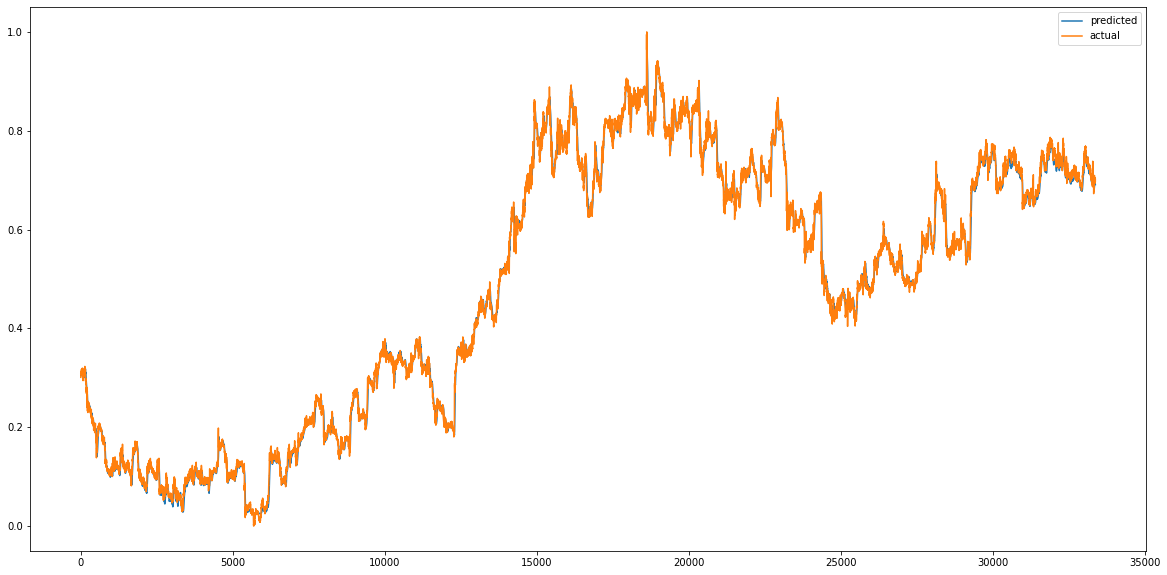

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


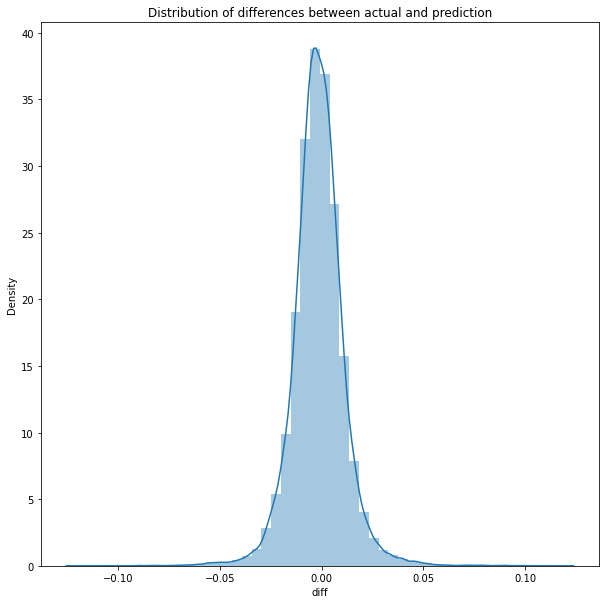

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0001633035484169904
RMSE :  0.012779027678856886
MAE :  0.009219875377818732
1043/1043 [==============================] - 4s 4ms/step
R2_Score  : 0.9977035389884003


count    33373.000000
mean        -0.001556
std          0.012684
min         -0.120738
25%         -0.008375
50%         -0.001718
75%          0.005256
max          0.119158
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 303.9548 - mae: 2.2549 - mse: 303.9547 - root_mean_squared_error: 17.4343 - mape: 3639.0466
Epoch 1: val_mse improved from inf to 0.00361, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 40s 77ms/step - loss: 303.9548 - mae: 2.2549 - mse: 303.9547 - root_mean_squared_error: 17.4343 - mape: 3639.0466 - val_loss: 0.0036 - val_mae: 0.0467 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0601 - val_mape: 6086.8291
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0260 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 773.6876
Epoch 2: val_mse improved from 0.00361 to 0.00102, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 0.0014 - mae: 0.0260 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 772.3131 - val_loss: 0.0010 - val_mae: 0.0275 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 3123.0466
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 7.4122e-04 - mae: 0.0196 - mse: 7.4122e-04 - root_mean_squared_error: 0.0272 - mape: 635.1707
Epoch 3: val_mse improved from 0.00102 to 0.00075, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 75ms/step - loss: 7.4040e-04 - mae: 0.0196 - mse: 7.4040e-04 - root_mean_squared_error: 0.0272 - mape: 630.9390 - val_loss: 7.4984e-04 - val_mae: 0.0228 - val_mse: 7.4984e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 2448.3625
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 5.8665e-04 - mae: 0.0178 - mse: 5.8665e-04 - root_mean_squared_error: 0.0242 - mape: 493.0159
Epoch 4: val_mse did not improve from 0.00075
405/405 [==============================] - 8s 19ms/step - loss: 5.8665e-04 - mae: 0.0178 - mse: 5.8665e-04 - root_mean_squared_error: 0.0242 - mape: 493.0159 - val_loss: 0.0012 - val_mae: 0.0294 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 2156.0552
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 4.9341e-04 - mae: 0.0165 - mse: 4.9341e-04 - root_mean_squared_error: 0.0222 - mape: 472.8579
Epoch 5: val_mse did not improve from 0.00075
405/405 [================

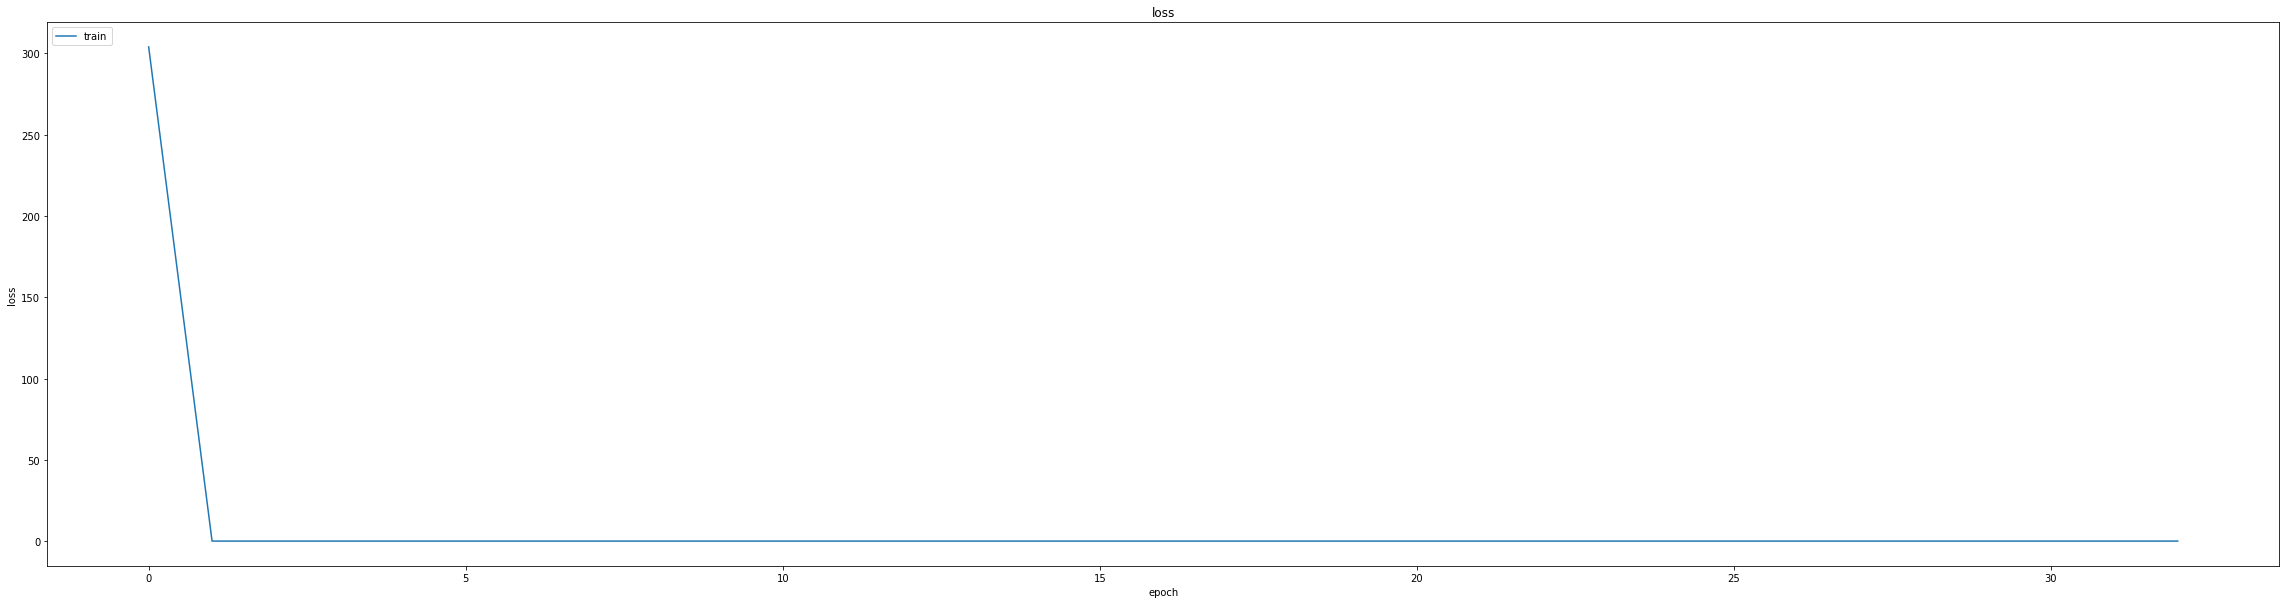

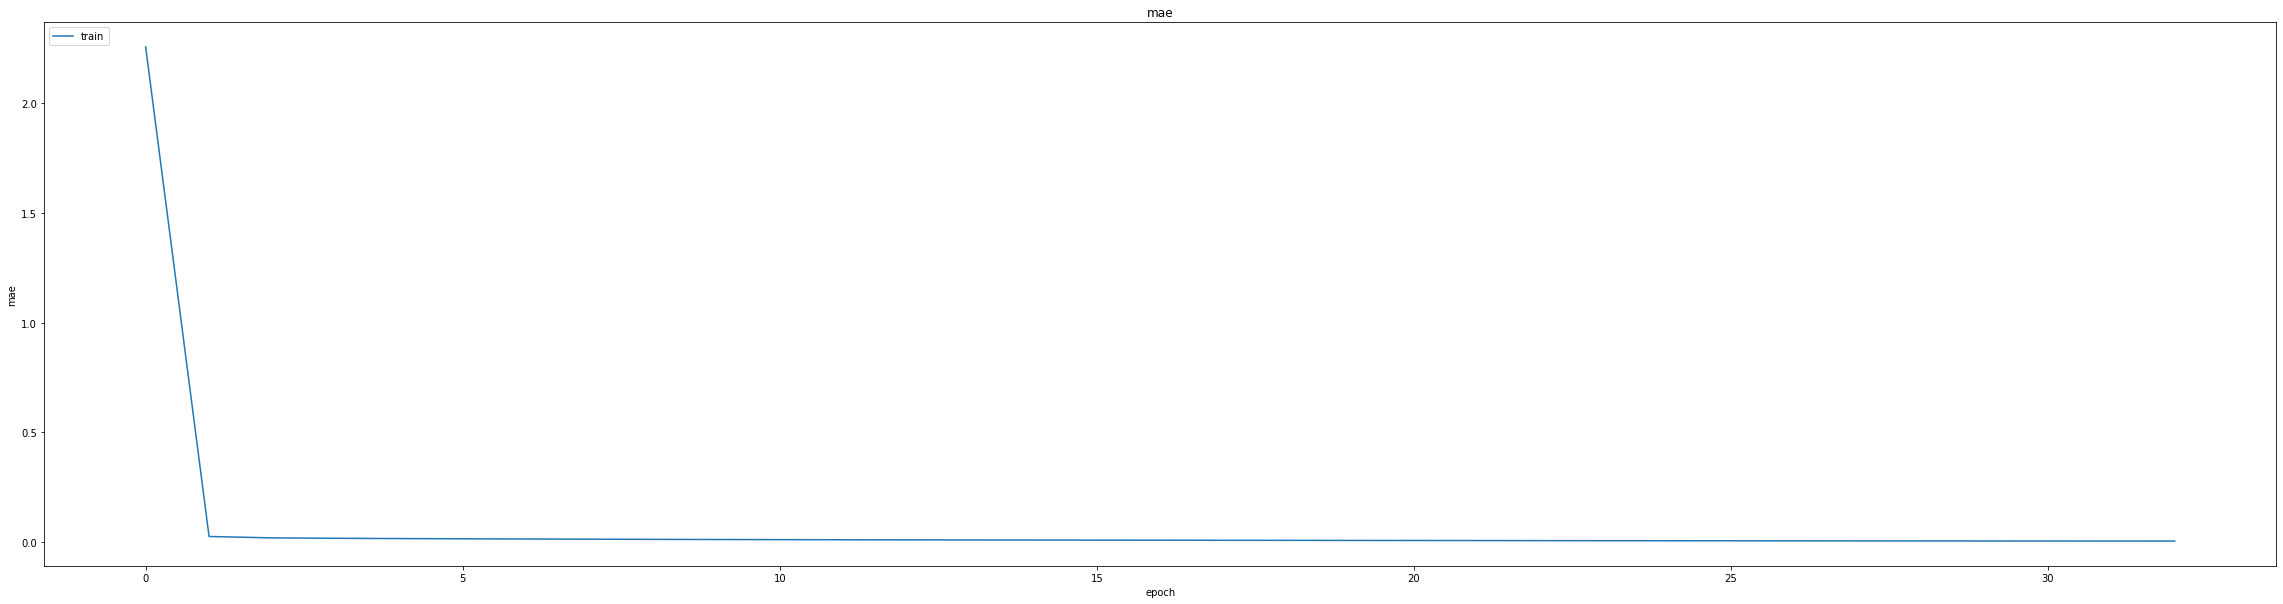

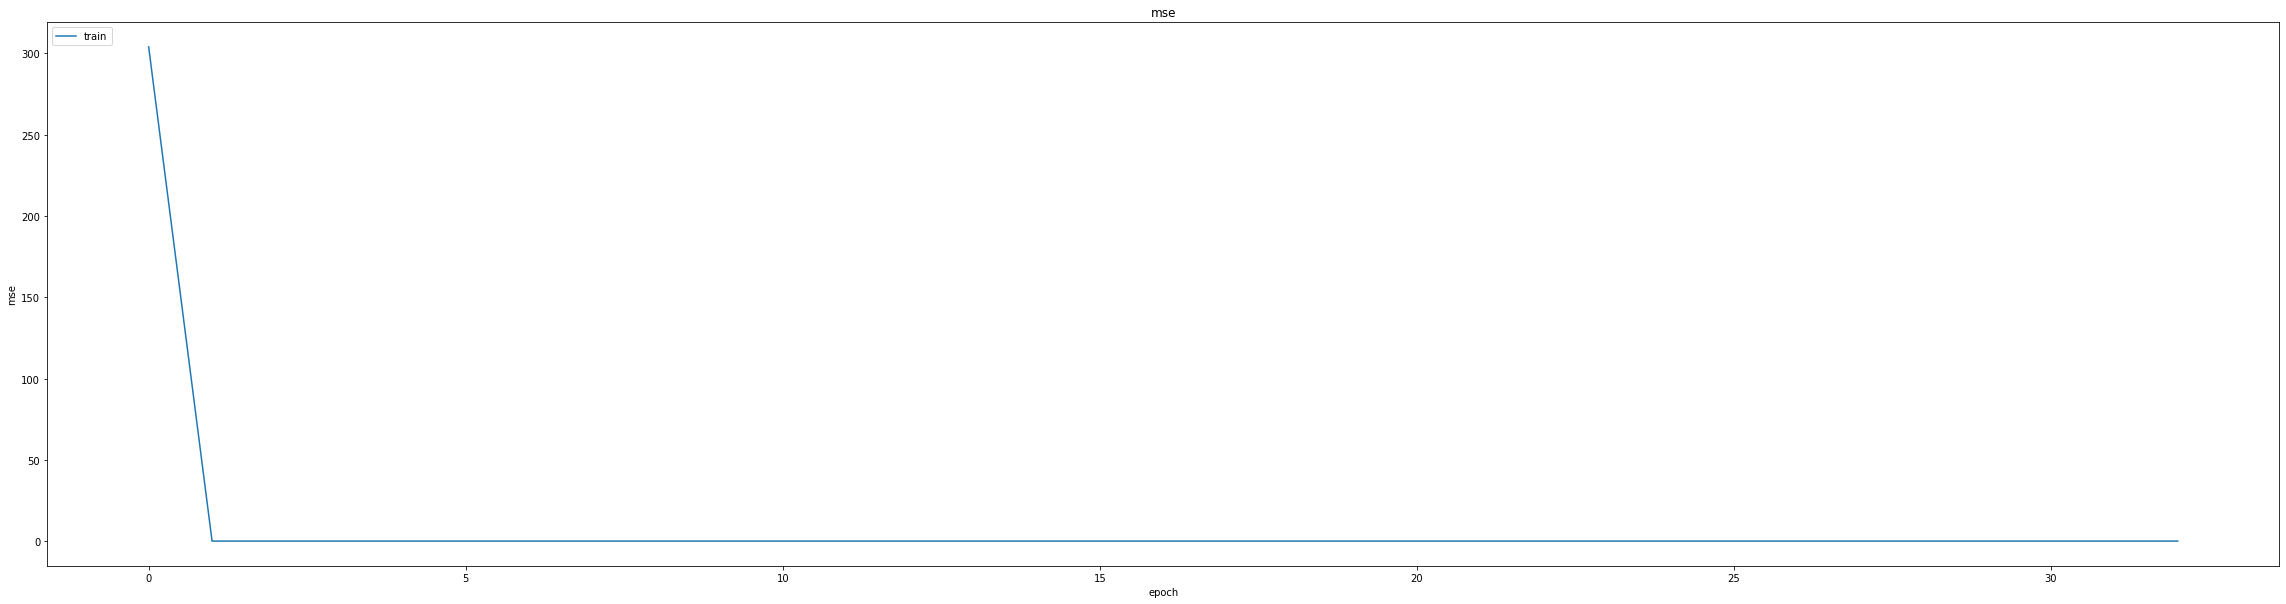

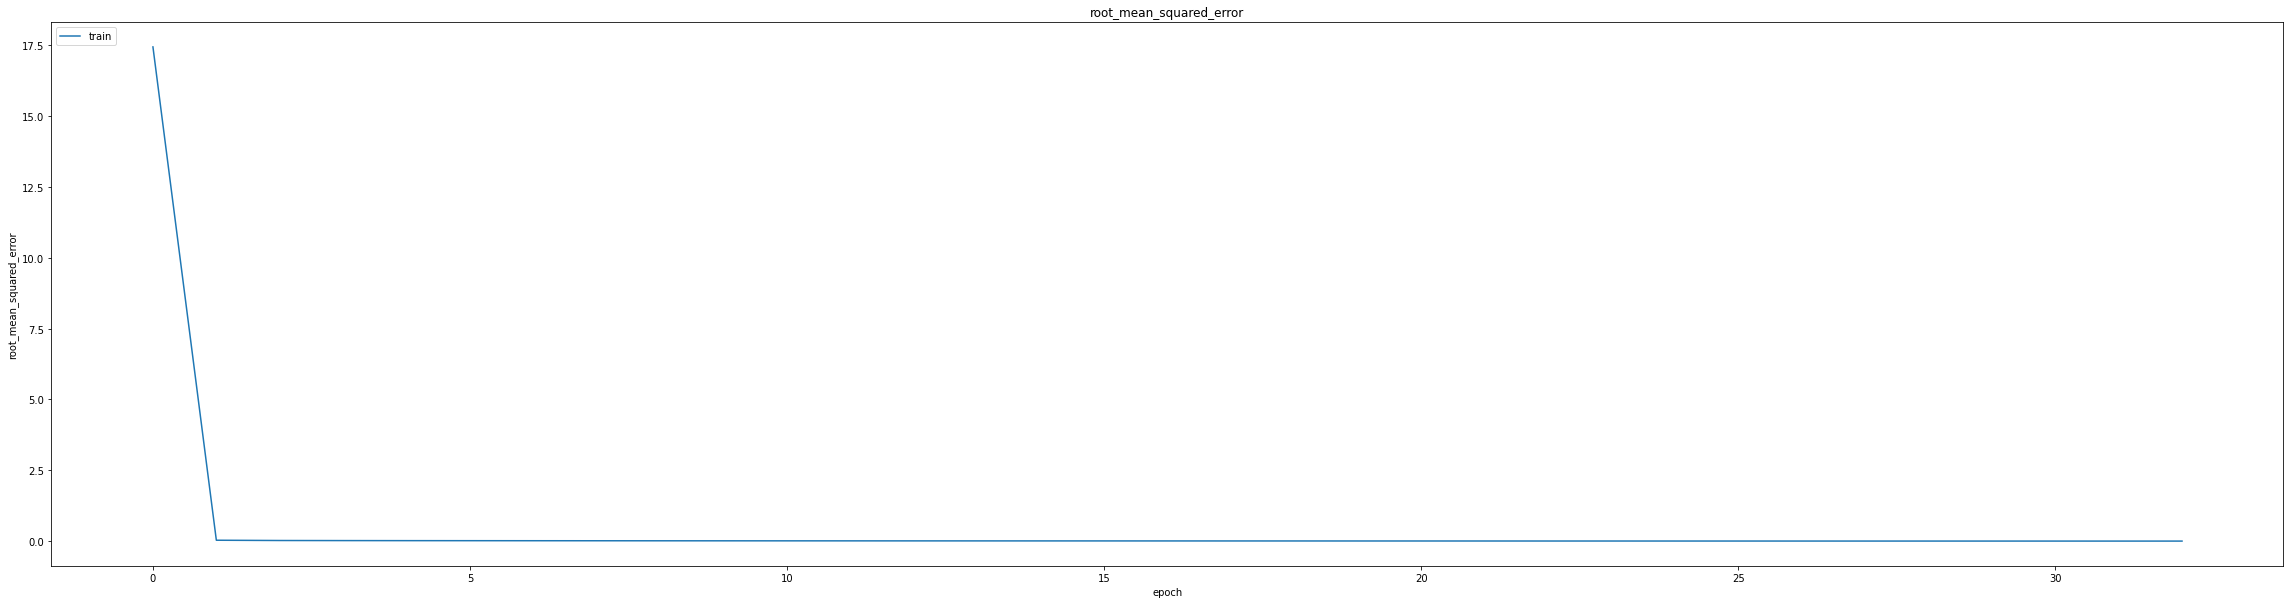

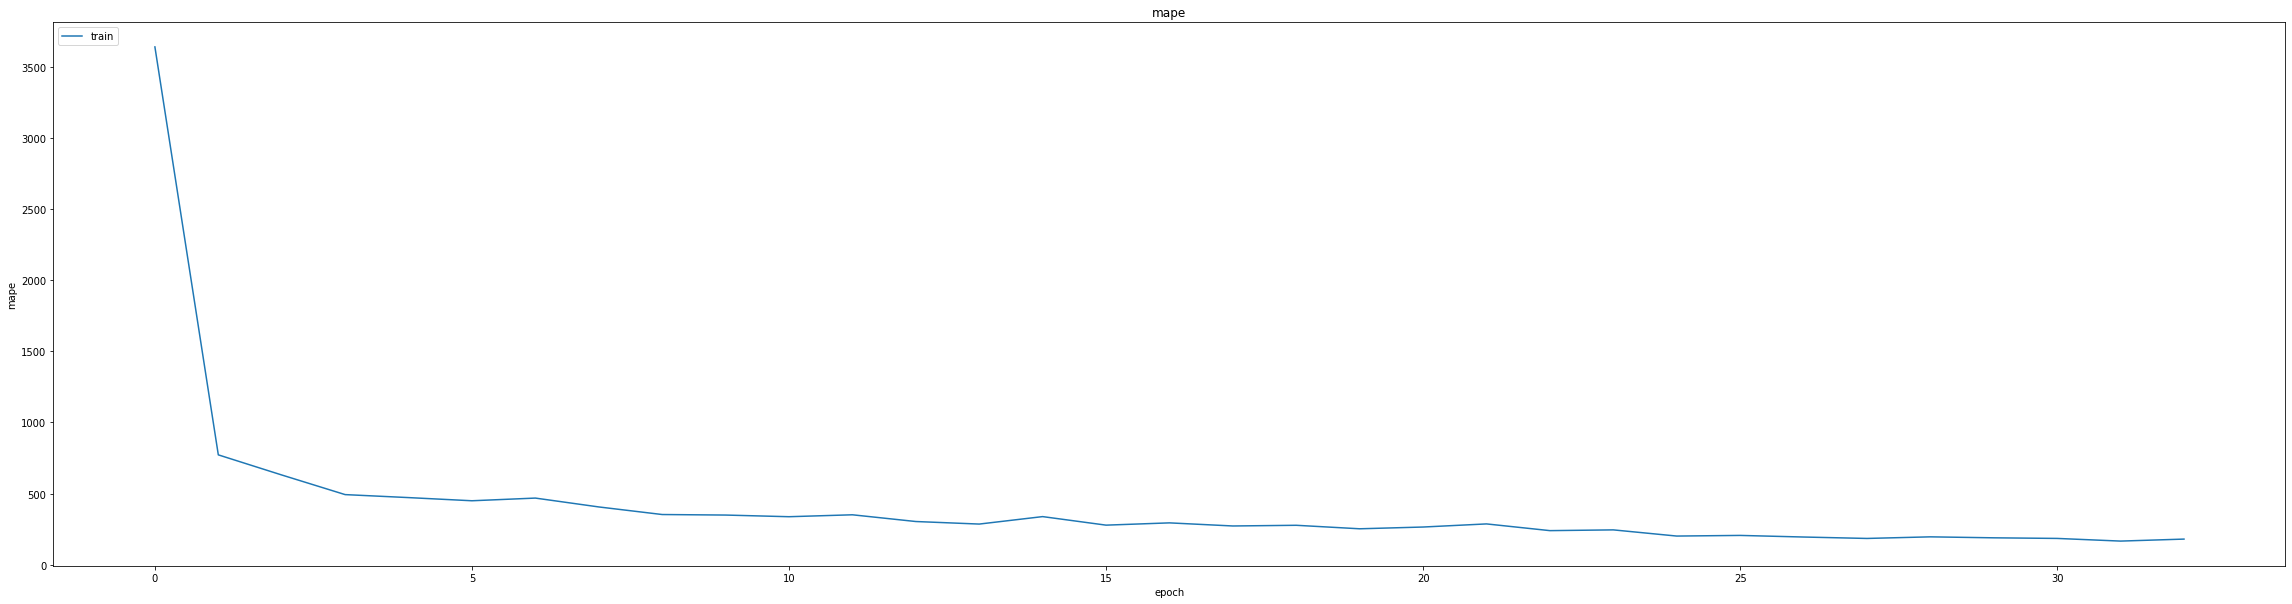

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02277970314025879
0.027383161708712578
1043/1043 [==============================] - 7s 6ms/step
0.9715234571693832


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 7.5471e-04 - mae: 0.0159 - mse: 7.5471e-04 - root_mean_squared_error: 0.0275 - mape: 228.0581
Epoch 1: val_mse improved from 0.00075 to 0.00041, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 37s 78ms/step - loss: 7.5471e-04 - mae: 0.0159 - mse: 7.5471e-04 - root_mean_squared_error: 0.0275 - mape: 228.0581 - val_loss: 4.0501e-04 - val_mae: 0.0170 - val_mse: 4.0501e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 964.5781 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 1.0236e-04 - mae: 0.0076 - mse: 1.0236e-04 - root_mean_squared_error: 0.0101 - mape: 187.5024
Epoch 2: val_mse did not improve from 0.00041
405/405 [==============================] - 8s 19ms/step - loss: 1.0236e-04 - mae: 0.0076 - mse: 1.0236e-04 - root_mean_squared_error: 0.0101 - mape: 187.5024 - val_loss: 5.7486e-04 - val_mae: 0.0212 - val_mse: 5.7486e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 806.1853 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
404/405 [============================>.] - ETA: 0s - loss: 6.4717e-05 - mae: 0.0060 - mse: 6.4717e-05 - root_mean_squared_error: 0.0080 - mape: 169.7469
Epo

405/405 [==============================] - 30s 73ms/step - loss: 2.7375e-05 - mae: 0.0039 - mse: 2.7375e-05 - root_mean_squared_error: 0.0052 - mape: 133.8347 - val_loss: 1.8325e-04 - val_mae: 0.0110 - val_mse: 1.8325e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 798.3688 - lr: 6.5610e-04
Epoch 10/20
402/405 [============================>.] - ETA: 0s - loss: 3.4846e-05 - mae: 0.0044 - mse: 3.4846e-05 - root_mean_squared_error: 0.0059 - mape: 108.3679
Epoch 10: val_mse did not improve from 0.00018
405/405 [==============================] - 8s 19ms/step - loss: 3.4726e-05 - mae: 0.0044 - mse: 3.4726e-05 - root_mean_squared_error: 0.0059 - mape: 107.6434 - val_loss: 6.2219e-04 - val_mae: 0.0232 - val_mse: 6.2219e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 766.9276 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
405/405 [==============================] - ETA: 0s - loss: 2.6073e-05 - mae: 0.0038 - mse: 2.6073e-05 - root_mean_squared_error: 0.0051 - mape: 1

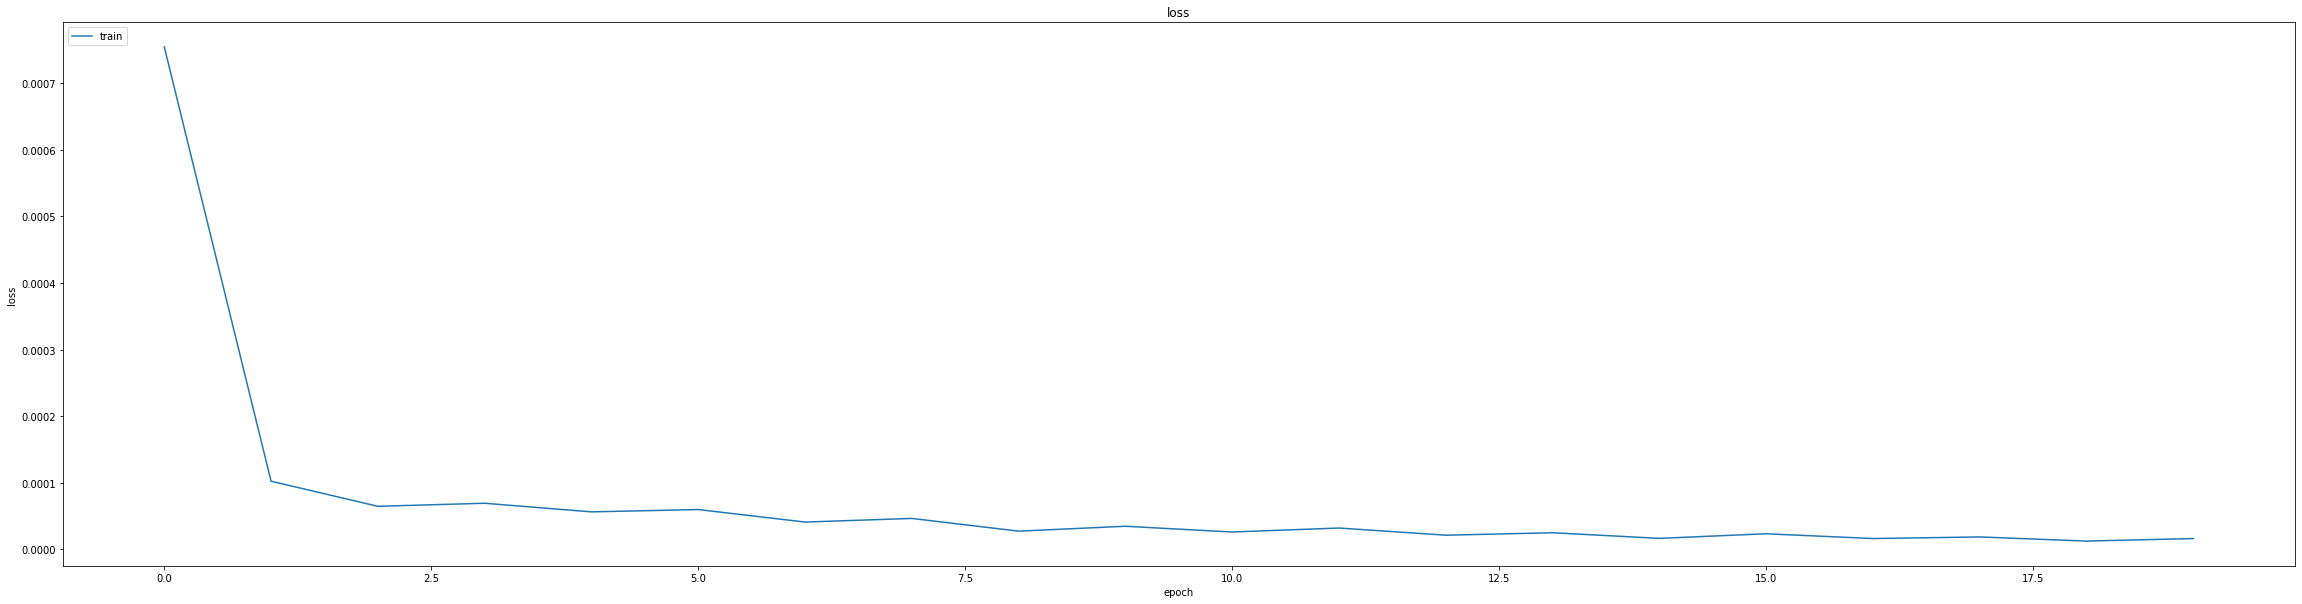

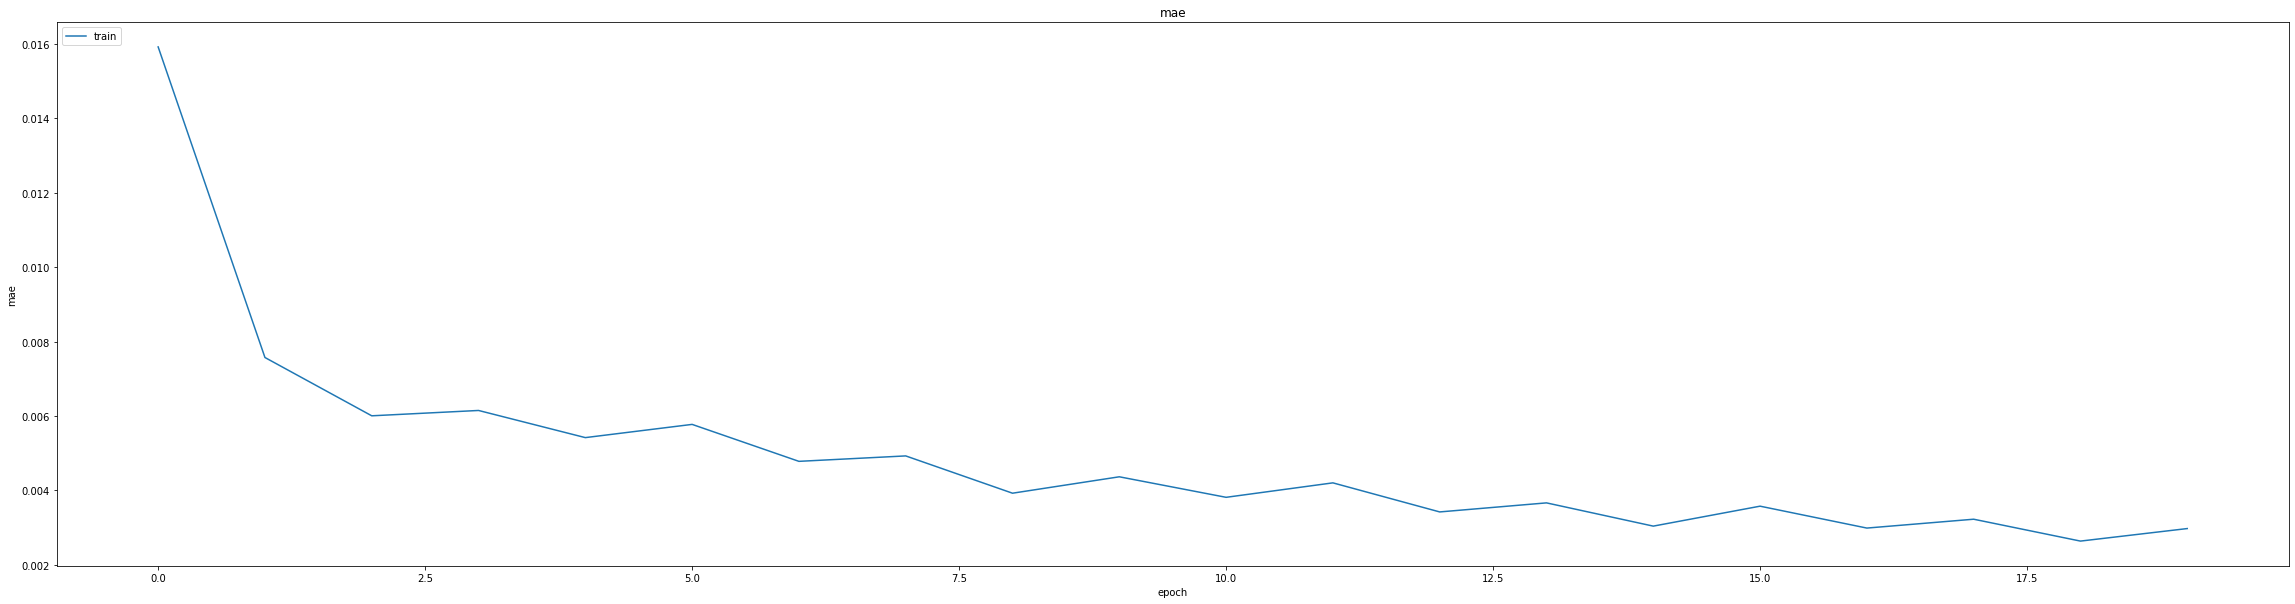

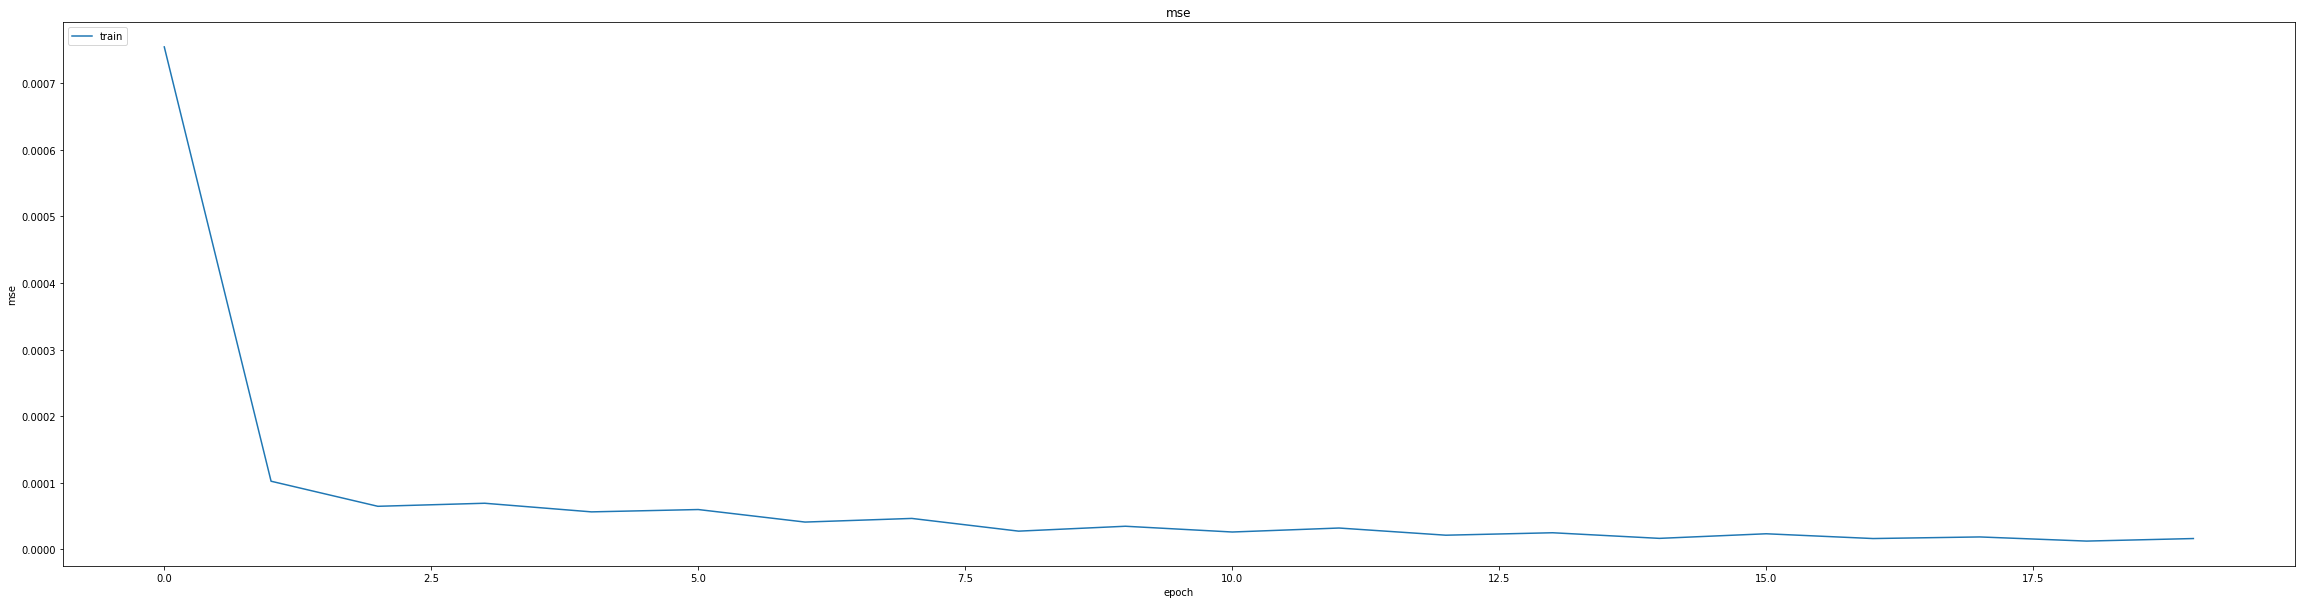

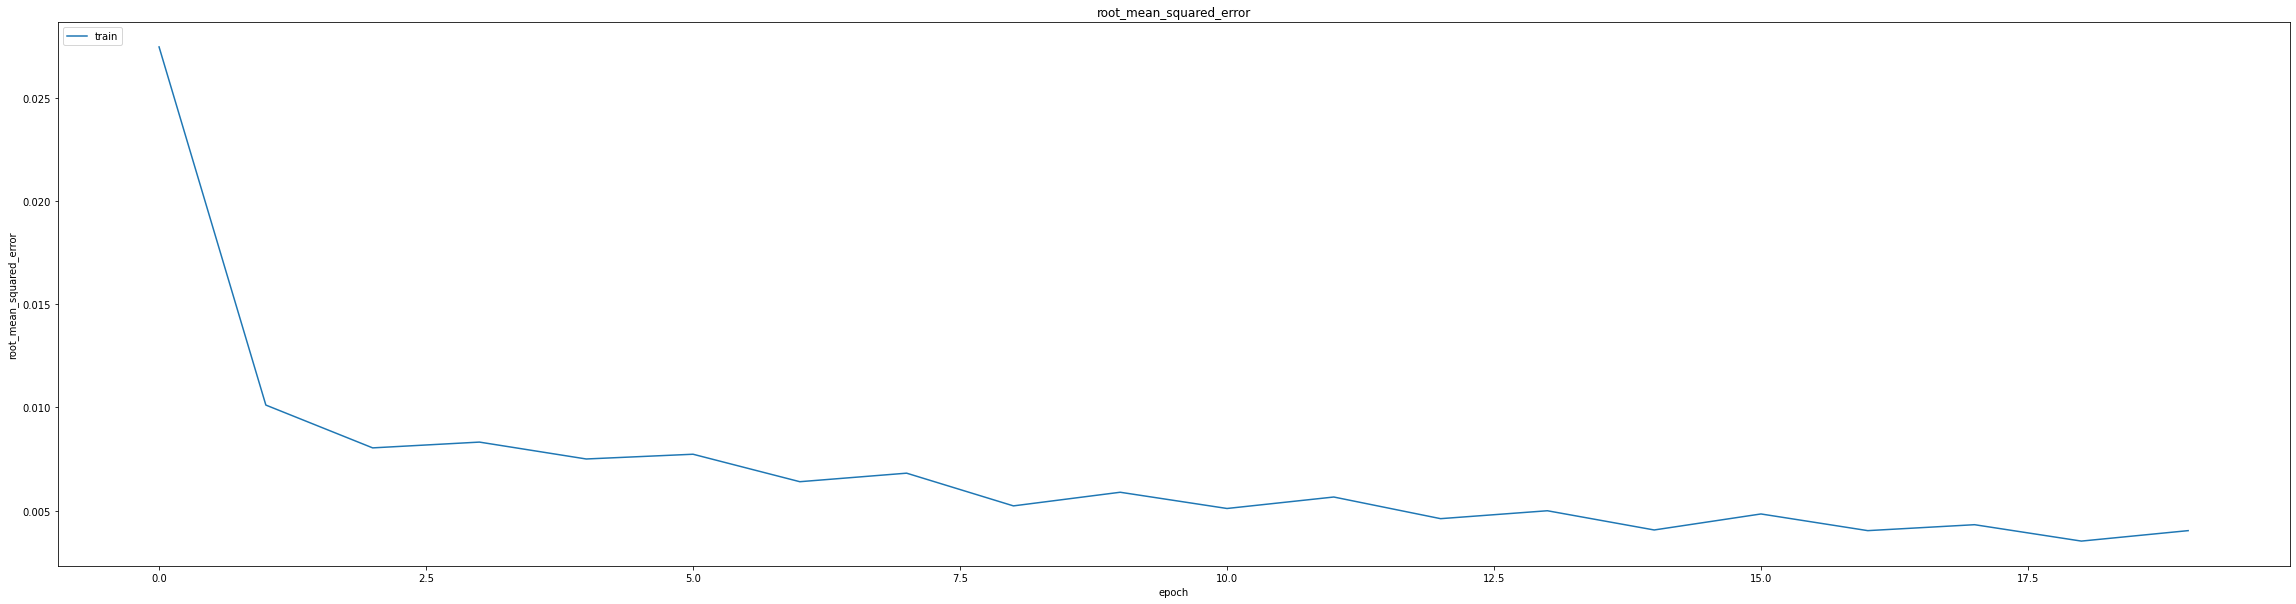

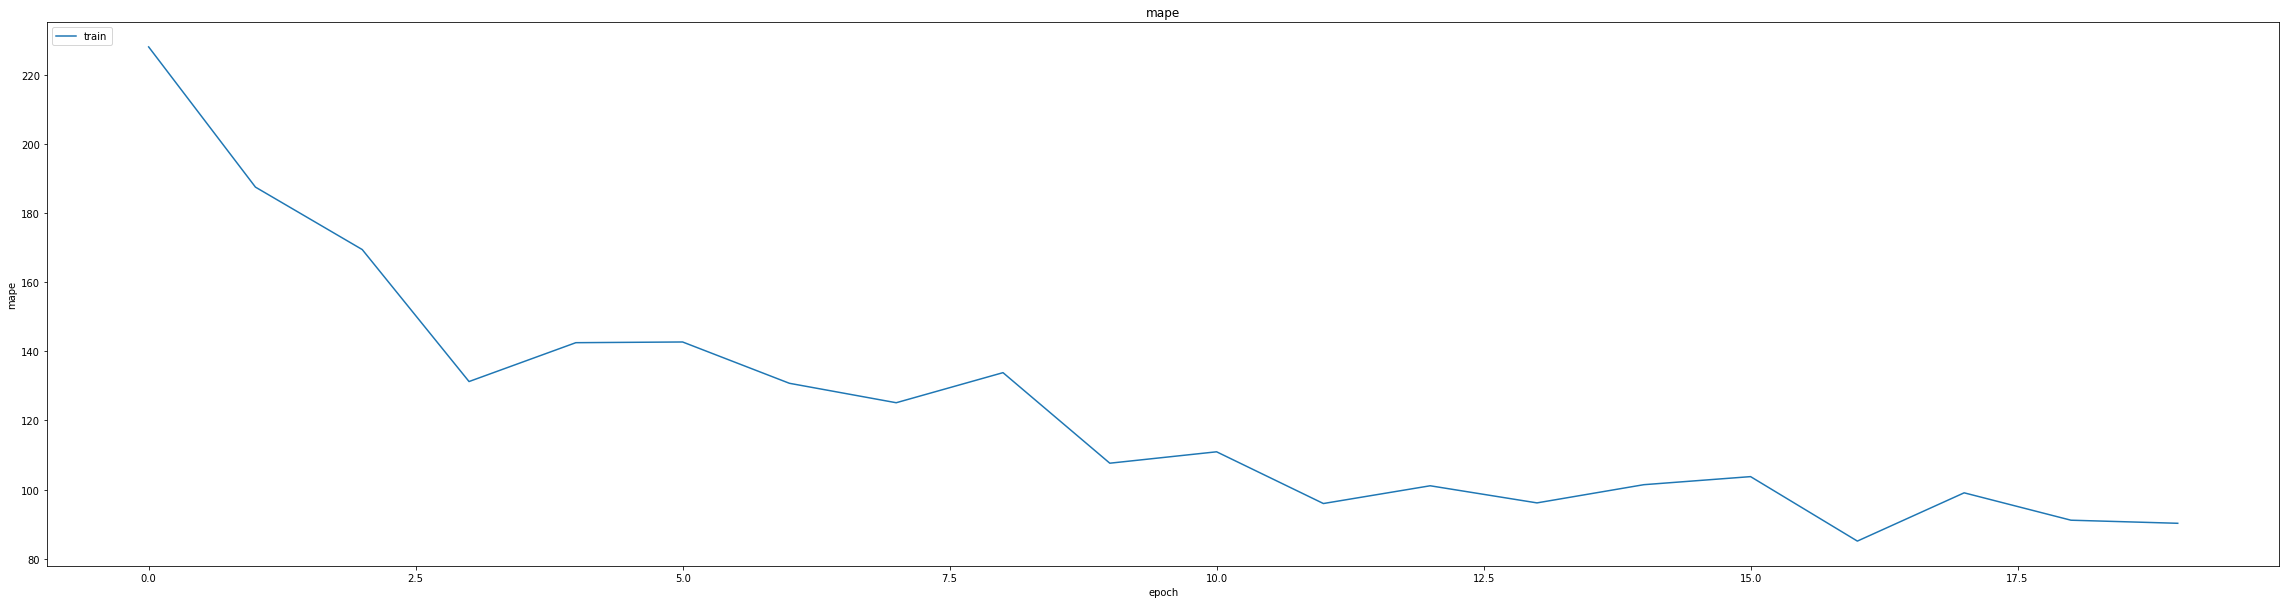

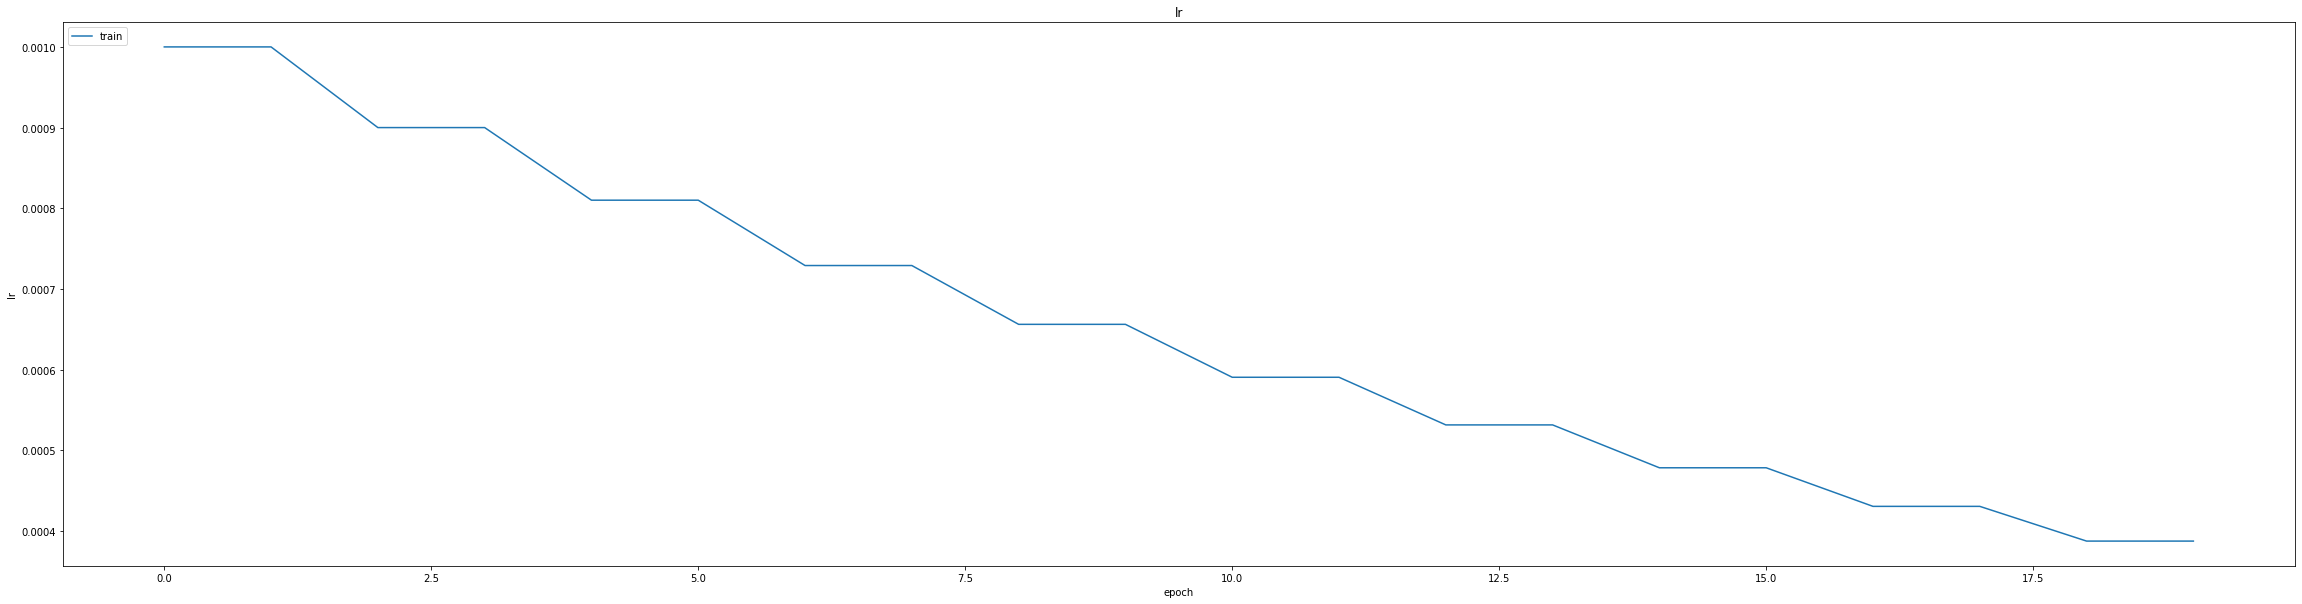

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011000586673617363
0.01353689469397068
1043/1043 [==============================] - 8s 6ms/step
0.9703612865623757


1043/1043 [==============================] - 14s 5ms/step


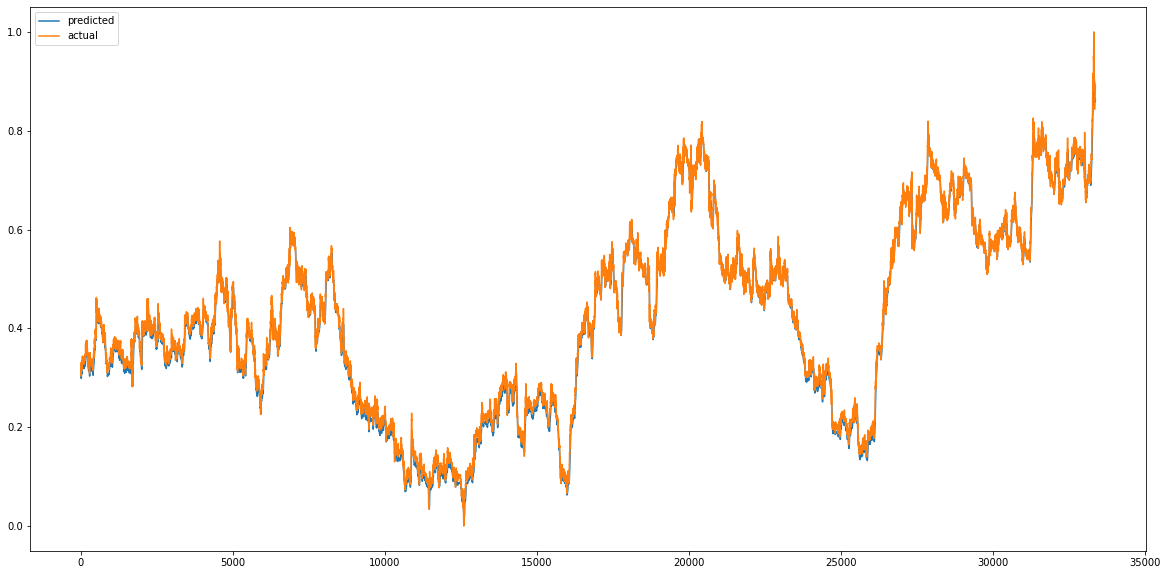

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


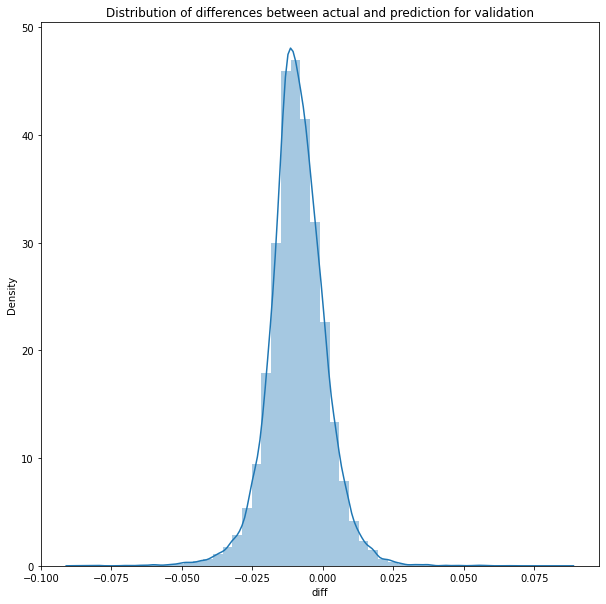

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 5s 5ms/step


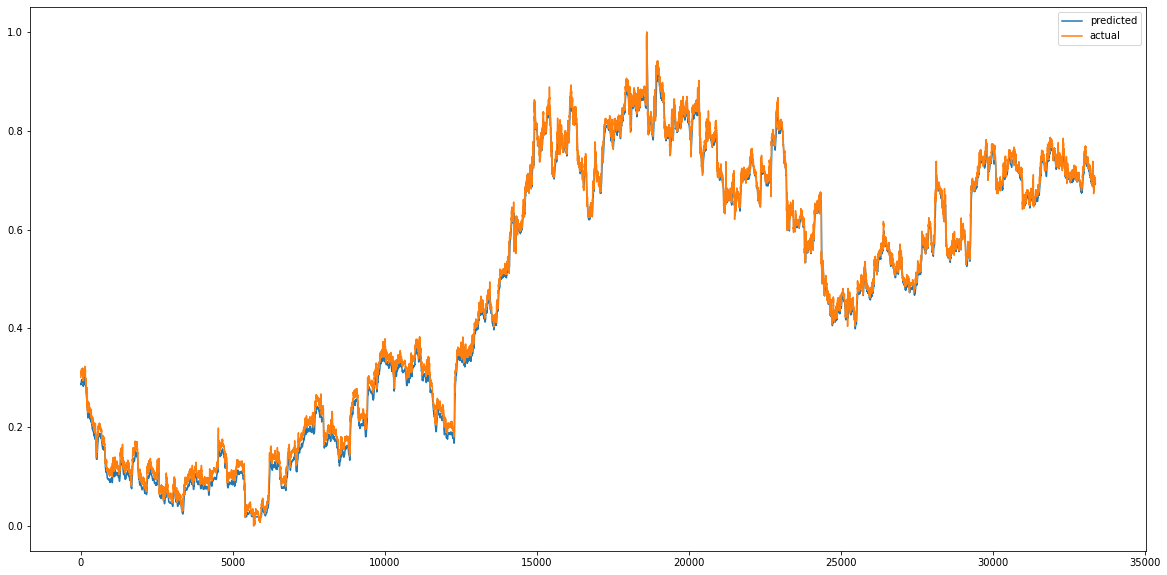

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


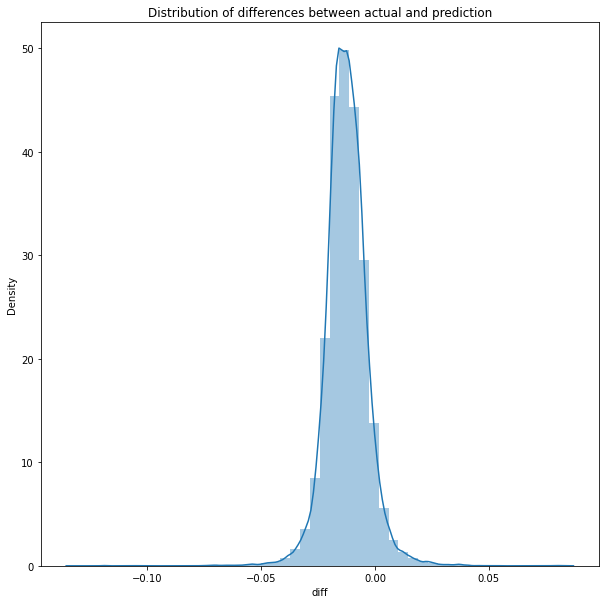

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00023900626443153892
RMSE :  0.015459827438608069
MAE :  0.013348194521896237
1043/1043 [==============================] - 6s 6ms/step
R2_Score  : 0.9966389672917008


count    33373.000000
mean        -0.012450
std          0.009165
min         -0.132206
25%         -0.017730
50%         -0.012696
75%         -0.007316
max          0.083754
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 344.1182 - mae: 2.5868 - mse: 344.1182 - root_mean_squared_error: 18.5504 - mape: 4141.4551
Epoch 1: val_mse improved from inf to 0.02155, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 20s 37ms/step - loss: 344.1182 - mae: 2.5868 - mse: 344.1182 - root_mean_squared_error: 18.5504 - mape: 4141.4551 - val_loss: 0.0215 - val_mae: 0.1239 - val_mse: 0.0215 - val_root_mean_squared_error: 0.1468 - val_mape: 11184.2588
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0168 - mae: 0.1025 - mse: 0.0168 - root_mean_squared_error: 0.1295 - mape: 2375.2117
Epoch 2: val_mse improved from 0.02155 to 0.00929, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0168 - mae: 0.1025 - mse: 0.0168 - root_mean_squared_error: 0.1295 - mape: 2375.2117 - val_loss: 0.0093 - val_mae: 0.0769 - val_mse: 0.0093 - val_root_mean_squared_error: 0.0964 - val_mape: 9199.3174
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0086 - mae: 0.0664 - mse: 0.0086 - root_mean_squared_error: 0.0925 - mape: 1873.1316
Epoch 3: val_mse improved from 0.00929 to 0.00702, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0086 - mae: 0.0664 - mse: 0.0086 - root_mean_squared_error: 0.0925 - mape: 1869.7788 - val_loss: 0.0070 - val_mae: 0.0706 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0838 - val_mape: 8059.5669
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0497 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 1776.1473
Epoch 4: val_mse improved from 0.00702 to 0.00526, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0055 - mae: 0.0497 - mse: 0.0055 - root_mean_squared_error: 0.0738 - mape: 1772.9421 - val_loss: 0.0053 - val_mae: 0.0621 - val_mse: 0.0053 - val_root_mean_squared_error: 0.0725 - val_mape: 7277.4282
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0402 - mse: 0.0039 - root_mean_squared_error: 0.0627 - mape: 1627.9296
Epoch 5: val_mse improved from 0.00526 to 0.00393, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0039 - mae: 0.0402 - mse: 0.0039 - root_mean_squared_error: 0.0627 - mape: 1627.9296 - val_loss: 0.0039 - val_mae: 0.0542 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0627 - val_mape: 6682.4331
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0345 - mse: 0.0031 - root_mean_squared_error: 0.0552 - mape: 1460.0521
Epoch 6: val_mse improved from 0.00393 to 0.00322, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0031 - mae: 0.0345 - mse: 0.0031 - root_mean_squared_error: 0.0552 - mape: 1457.4200 - val_loss: 0.0032 - val_mae: 0.0495 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0568 - val_mape: 6205.8169
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0307 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 1329.3097
Epoch 7: val_mse improved from 0.00322 to 0.00254, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 0.0025 - mae: 0.0306 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 1326.9183 - val_loss: 0.0025 - val_mae: 0.0452 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 5794.7832
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0277 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 1241.9760
Epoch 8: val_mse improved from 0.00254 to 0.00208, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0020 - mae: 0.0277 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 1239.7455 - val_loss: 0.0021 - val_mae: 0.0418 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 5423.0024
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0252 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1143.8599
Epoch 9: val_mse improved from 0.00208 to 0.00176, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0017 - mae: 0.0252 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1139.0337 - val_loss: 0.0018 - val_mae: 0.0391 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 5074.1050
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0232 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1104.7817
Epoch 10: val_mse improved from 0.00176 to 0.00138, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 0.0014 - mae: 0.0232 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1100.1542 - val_loss: 0.0014 - val_mae: 0.0347 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 4750.2422
Epoch 11/60
402/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0216 - mse: 0.0012 - root_mean_squared_error: 0.0350 - mape: 1002.7222
Epoch 11: val_mse did not improve from 0.00138
405/405 [==============================] - 7s 16ms/step - loss: 0.0012 - mae: 0.0216 - mse: 0.0012 - root_mean_squared_error: 0.0350 - mape: 996.0944 - val_loss: 0.0014 - val_mae: 0.0357 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 4443.6655
Epoch 12/60
402/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0203 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 995.1193 
Epoch 12: val_mse improved from 0.00138 to 0.00129, saving model to /content/drive/MyDrive/modelweights/C

405/405 [==============================] - 14s 35ms/step - loss: 0.0011 - mae: 0.0203 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 988.5464 - val_loss: 0.0013 - val_mae: 0.0340 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 4158.7173
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 9.1730e-04 - mae: 0.0191 - mse: 9.1730e-04 - root_mean_squared_error: 0.0303 - mape: 947.1921
Epoch 13: val_mse improved from 0.00129 to 0.00124, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 9.1699e-04 - mae: 0.0191 - mse: 9.1699e-04 - root_mean_squared_error: 0.0303 - mape: 945.4738 - val_loss: 0.0012 - val_mae: 0.0333 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 3886.7683
Epoch 14/60
402/405 [============================>.] - ETA: 0s - loss: 8.0417e-04 - mae: 0.0181 - mse: 8.0417e-04 - root_mean_squared_error: 0.0284 - mape: 849.4260
Epoch 14: val_mse improved from 0.00124 to 0.00122, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 8.0344e-04 - mae: 0.0181 - mse: 8.0344e-04 - root_mean_squared_error: 0.0283 - mape: 843.7990 - val_loss: 0.0012 - val_mae: 0.0330 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 3627.9177
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 7.0168e-04 - mae: 0.0172 - mse: 7.0168e-04 - root_mean_squared_error: 0.0265 - mape: 759.0823
Epoch 15: val_mse improved from 0.00122 to 0.00089, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 7.0099e-04 - mae: 0.0172 - mse: 7.0099e-04 - root_mean_squared_error: 0.0265 - mape: 755.8586 - val_loss: 8.8577e-04 - val_mae: 0.0280 - val_mse: 8.8577e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 3382.4958
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 6.1766e-04 - mae: 0.0164 - mse: 6.1766e-04 - root_mean_squared_error: 0.0249 - mape: 730.1279
Epoch 16: val_mse improved from 0.00089 to 0.00083, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 6.1765e-04 - mae: 0.0164 - mse: 6.1765e-04 - root_mean_squared_error: 0.0249 - mape: 728.8126 - val_loss: 8.2521e-04 - val_mae: 0.0270 - val_mse: 8.2521e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 3147.4775
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 5.4270e-04 - mae: 0.0157 - mse: 5.4270e-04 - root_mean_squared_error: 0.0233 - mape: 678.9508
Epoch 17: val_mse improved from 0.00083 to 0.00078, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 5.4262e-04 - mae: 0.0157 - mse: 5.4262e-04 - root_mean_squared_error: 0.0233 - mape: 676.0821 - val_loss: 7.8485e-04 - val_mae: 0.0263 - val_mse: 7.8485e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 2917.6223
Epoch 18/60
403/405 [============================>.] - ETA: 0s - loss: 4.7318e-04 - mae: 0.0149 - mse: 4.7318e-04 - root_mean_squared_error: 0.0218 - mape: 644.4844
Epoch 18: val_mse improved from 0.00078 to 0.00074, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 4.7287e-04 - mae: 0.0149 - mse: 4.7287e-04 - root_mean_squared_error: 0.0217 - mape: 641.7503 - val_loss: 7.3672e-04 - val_mae: 0.0255 - val_mse: 7.3672e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 2699.8601
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 4.1561e-04 - mae: 0.0142 - mse: 4.1561e-04 - root_mean_squared_error: 0.0204 - mape: 590.1525
Epoch 19: val_mse did not improve from 0.00074
405/405 [==============================] - 7s 16ms/step - loss: 4.1561e-04 - mae: 0.0142 - mse: 4.1561e-04 - root_mean_squared_error: 0.0204 - mape: 590.1525 - val_loss: 7.3922e-04 - val_mae: 0.0257 - val_mse: 7.3922e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 2490.7292
Epoch 20/60
402/405 [============================>.] - ETA: 0s - loss: 3.5889e-04 - mae: 0.0134 - mse: 3.5889e-04 - root_mean_squared_error: 0.0189 - mape: 516.0582
Epoch 20: val_mse improved from 0.00074 to 0.00069, saving m

405/405 [==============================] - 14s 36ms/step - loss: 3.5896e-04 - mae: 0.0134 - mse: 3.5896e-04 - root_mean_squared_error: 0.0189 - mape: 512.6505 - val_loss: 6.8879e-04 - val_mae: 0.0248 - val_mse: 6.8879e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 2296.7849
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 3.0868e-04 - mae: 0.0126 - mse: 3.0868e-04 - root_mean_squared_error: 0.0176 - mape: 509.5001
Epoch 21: val_mse improved from 0.00069 to 0.00064, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 3.0845e-04 - mae: 0.0126 - mse: 3.0845e-04 - root_mean_squared_error: 0.0176 - mape: 507.3347 - val_loss: 6.3984e-04 - val_mae: 0.0239 - val_mse: 6.3984e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 2114.9036
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 2.6331e-04 - mae: 0.0118 - mse: 2.6331e-04 - root_mean_squared_error: 0.0162 - mape: 423.8113
Epoch 22: val_mse did not improve from 0.00064
405/405 [==============================] - 7s 16ms/step - loss: 2.6326e-04 - mae: 0.0118 - mse: 2.6326e-04 - root_mean_squared_error: 0.0162 - mape: 422.0498 - val_loss: 7.4794e-04 - val_mae: 0.0259 - val_mse: 7.4794e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 1948.9648
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 2.2169e-04 - mae: 0.0110 - mse: 2.2169e-04 - root_mean_squared_error: 0.0149 - mape: 415.4995
Epoch 23: val_mse did not improve from 0.00064
405/405 [====

405/405 [==============================] - 15s 36ms/step - loss: 1.6263e-04 - mae: 0.0096 - mse: 1.6263e-04 - root_mean_squared_error: 0.0128 - mape: 336.3423 - val_loss: 5.6947e-04 - val_mae: 0.0223 - val_mse: 5.6947e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 1537.6793
Epoch 26/60
402/405 [============================>.] - ETA: 0s - loss: 1.4200e-04 - mae: 0.0090 - mse: 1.4200e-04 - root_mean_squared_error: 0.0119 - mape: 325.5847
Epoch 26: val_mse did not improve from 0.00057
405/405 [==============================] - 7s 16ms/step - loss: 1.4196e-04 - mae: 0.0090 - mse: 1.4196e-04 - root_mean_squared_error: 0.0119 - mape: 323.4180 - val_loss: 5.8683e-04 - val_mae: 0.0227 - val_mse: 5.8683e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 1432.0485
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 1.2666e-04 - mae: 0.0086 - mse: 1.2666e-04 - root_mean_squared_error: 0.0113 - mape: 310.4473
Epoch 27: val_mse improved from 0.00057 to 0.00050, saving m

405/405 [==============================] - 14s 35ms/step - loss: 1.2666e-04 - mae: 0.0086 - mse: 1.2666e-04 - root_mean_squared_error: 0.0113 - mape: 310.4473 - val_loss: 4.9787e-04 - val_mae: 0.0208 - val_mse: 4.9787e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 1341.6001
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 1.1400e-04 - mae: 0.0082 - mse: 1.1400e-04 - root_mean_squared_error: 0.0107 - mape: 287.5007
Epoch 28: val_mse improved from 0.00050 to 0.00042, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.1398e-04 - mae: 0.0082 - mse: 1.1398e-04 - root_mean_squared_error: 0.0107 - mape: 286.9823 - val_loss: 4.1520e-04 - val_mae: 0.0187 - val_mse: 4.1520e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 1262.1591
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 1.0441e-04 - mae: 0.0078 - mse: 1.0441e-04 - root_mean_squared_error: 0.0102 - mape: 271.8999
Epoch 29: val_mse did not improve from 0.00042
405/405 [==============================] - 7s 16ms/step - loss: 1.0441e-04 - mae: 0.0078 - mse: 1.0441e-04 - root_mean_squared_error: 0.0102 - mape: 271.8999 - val_loss: 4.4324e-04 - val_mae: 0.0195 - val_mse: 4.4324e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 1187.1138
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 9.5427e-05 - mae: 0.0075 - mse: 9.5427e-05 - root_mean_squared_error: 0.0098 - mape: 263.3065
Epoch 30: val_mse did not improve from 0.00042
405/405 [====

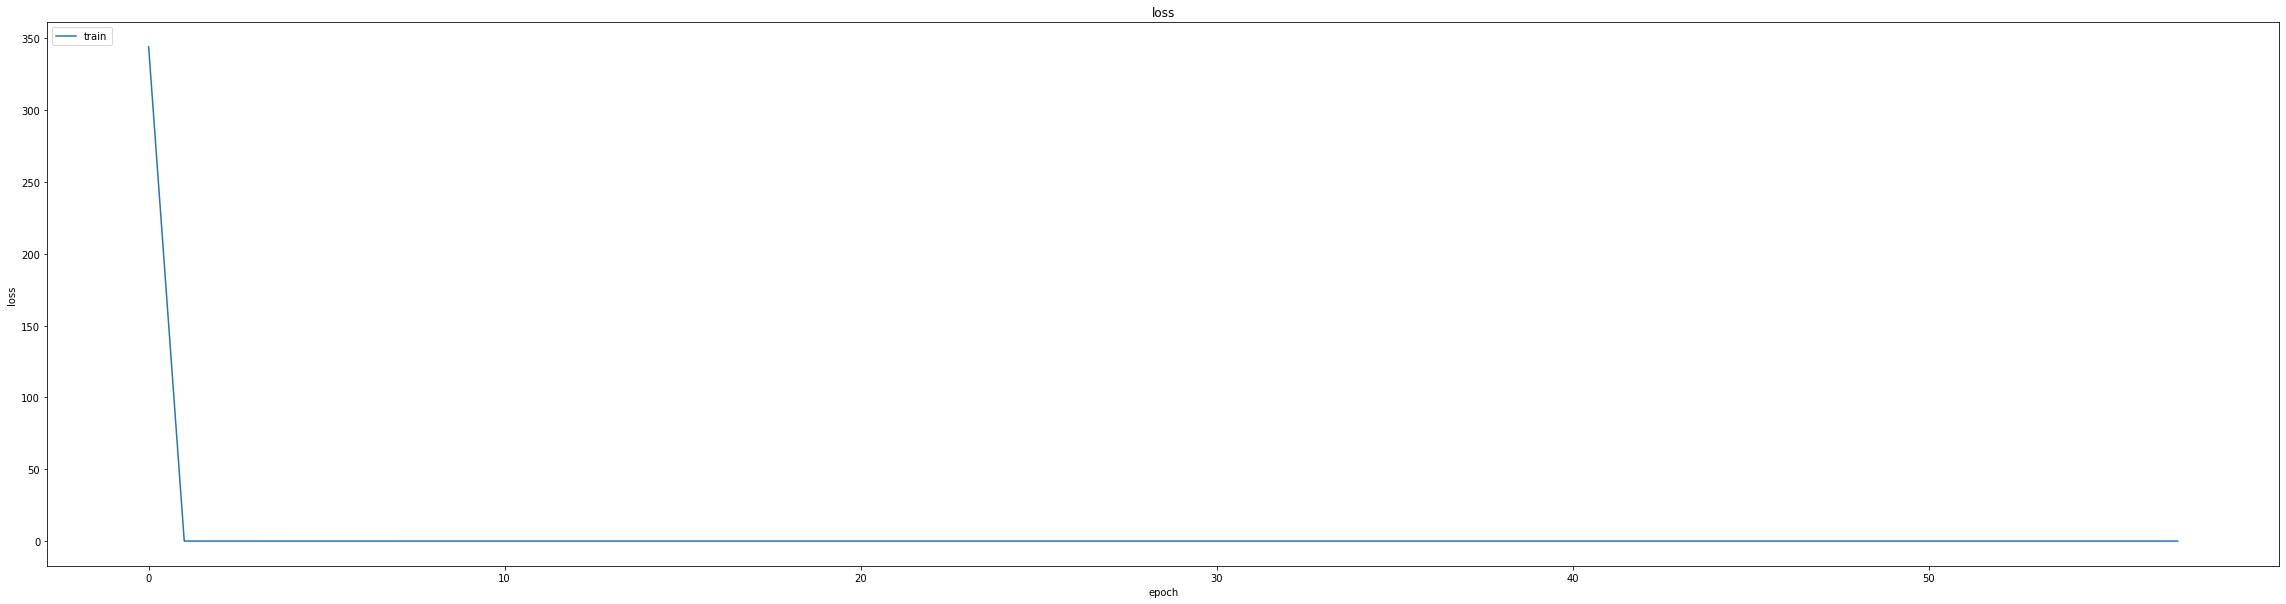

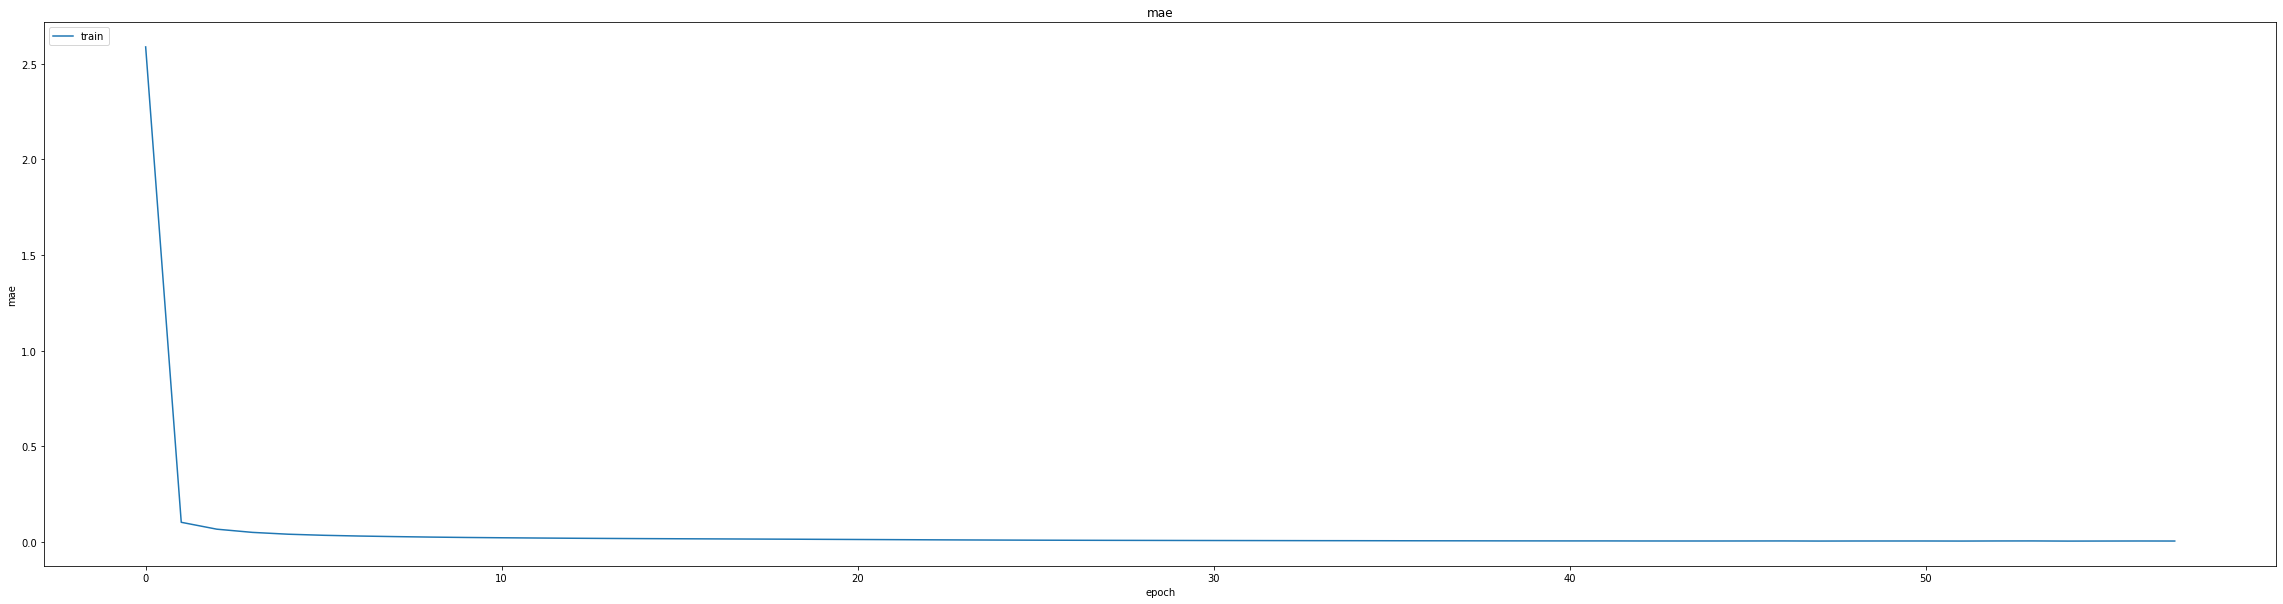

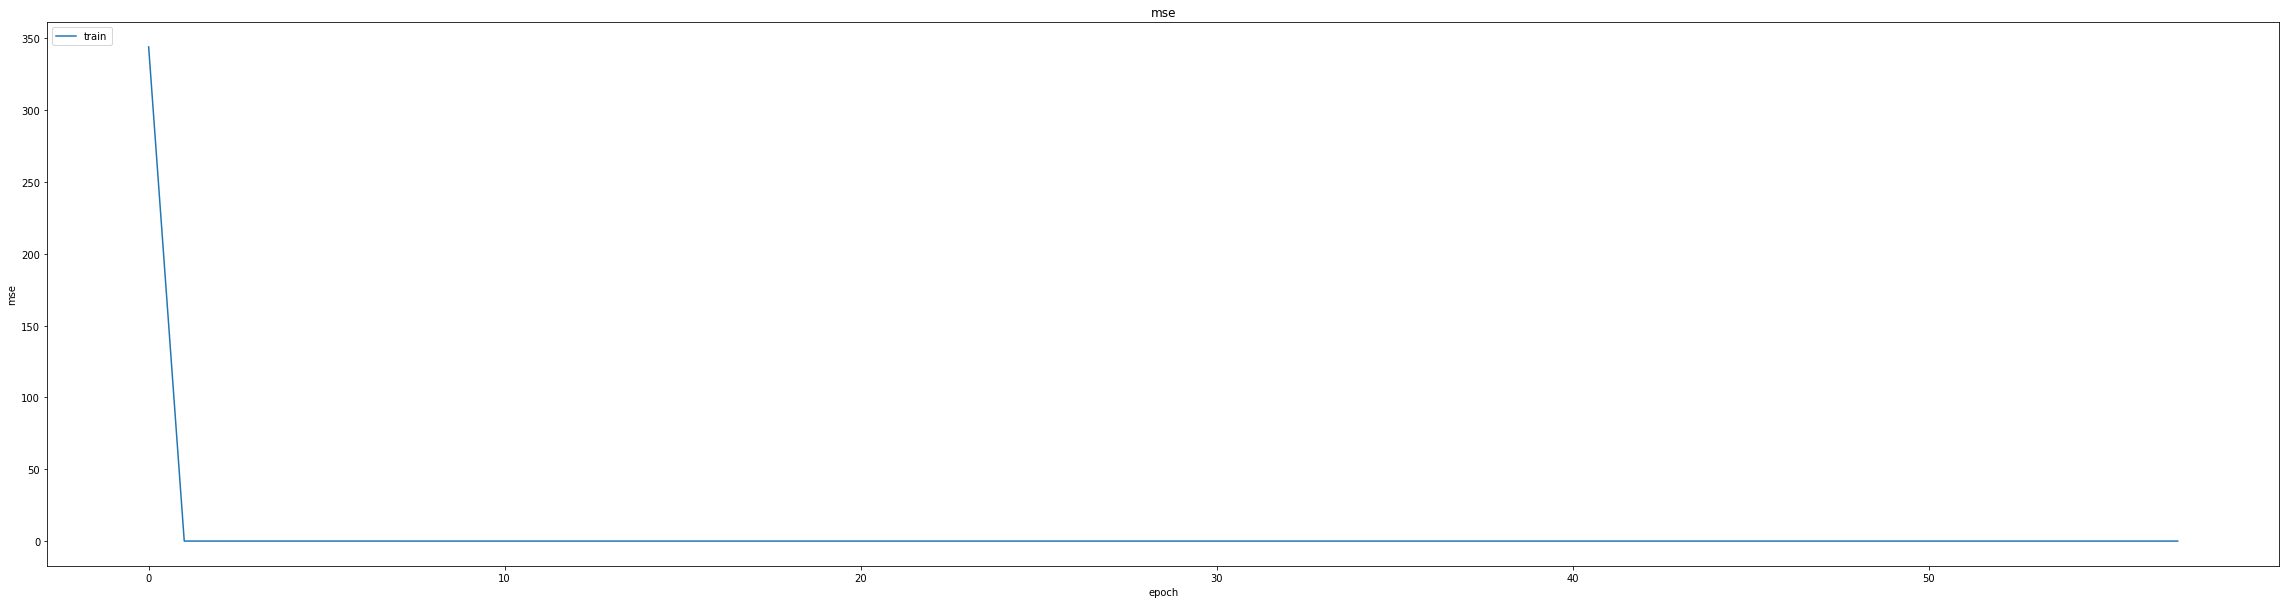

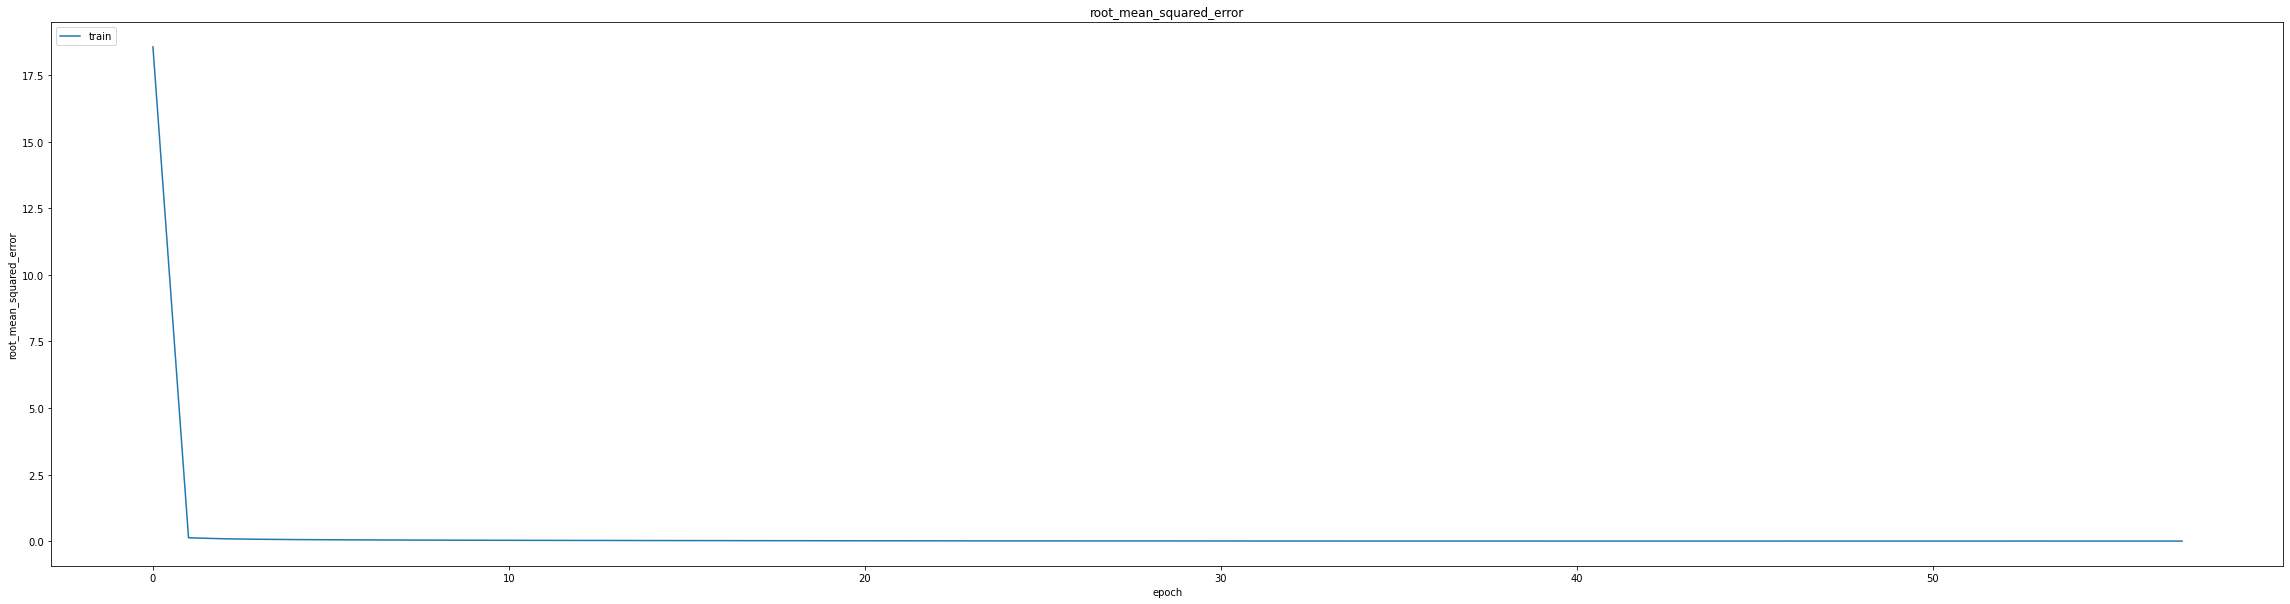

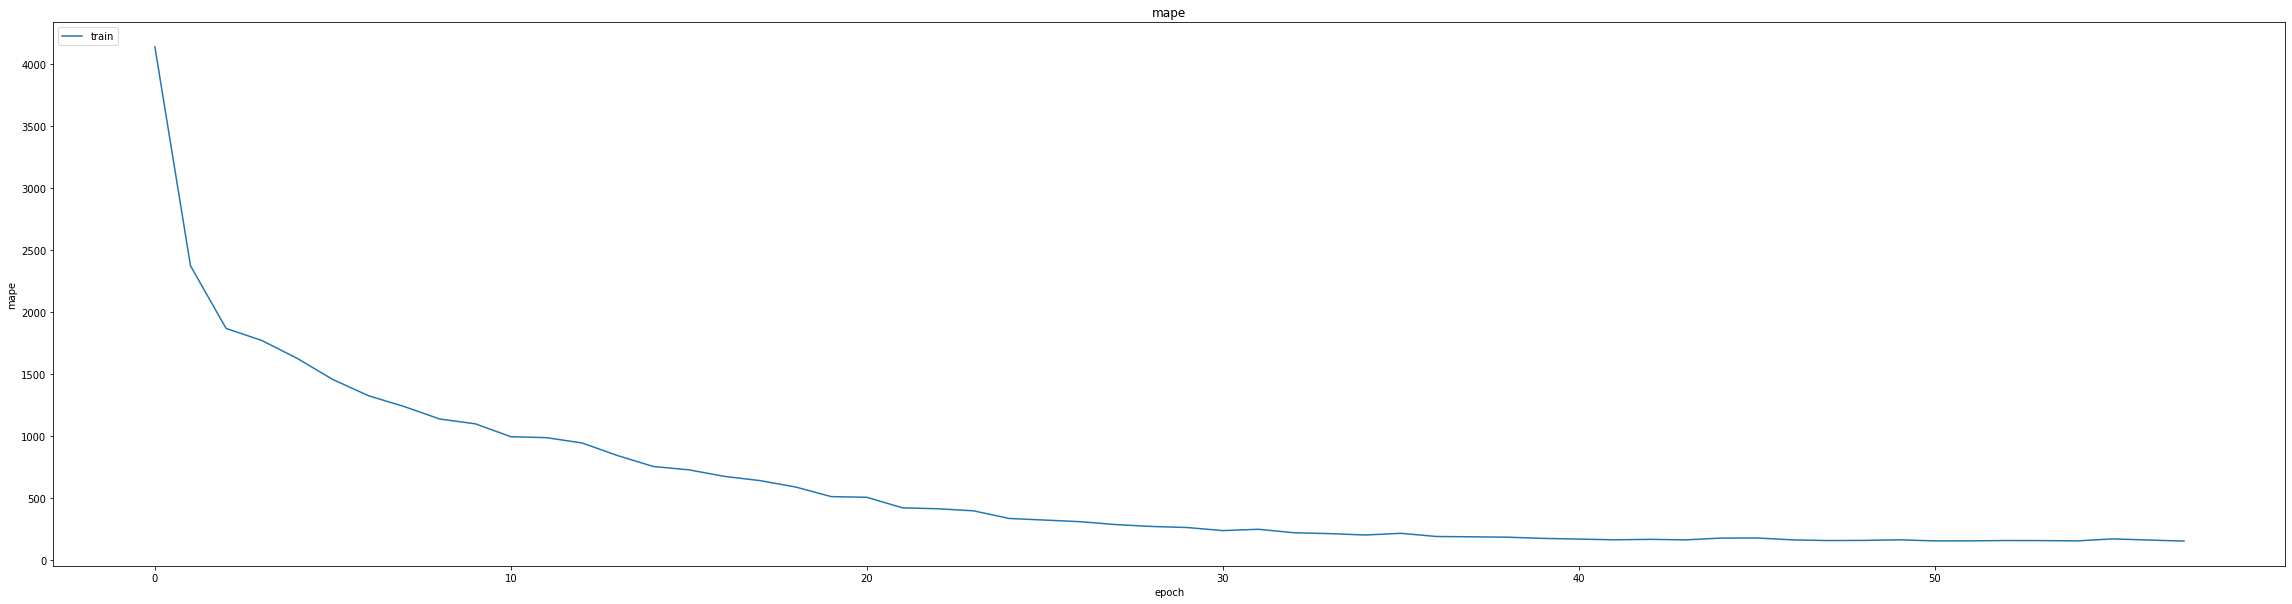

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.018746614456176758
0.020376361906528473
1043/1043 [==============================] - 5s 3ms/step
0.9789893009623357


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 3.4742e-04 - mae: 0.0098 - mse: 3.4742e-04 - root_mean_squared_error: 0.0186 - mape: 244.6603
Epoch 1: val_mse did not improve from 0.00042
405/405 [==============================] - 10s 18ms/step - loss: 3.4707e-04 - mae: 0.0098 - mse: 3.4707e-04 - root_mean_squared_error: 0.0186 - mape: 244.2164 - val_loss: 7.9641e-04 - val_mae: 0.0262 - val_mse: 7.9641e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 964.6899 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 6.7508e-05 - mae: 0.0063 - mse: 6.7508e-05 - root_mean_squared_error: 0.0082 - mape: 193.7920
Epoch 2: val_mse did not improve from 0.00042
405/405 [==============================] - 6s 16ms/step - loss: 6.7648e-05 - mae: 0.0063 - mse: 6.7648e-05 - root_mean_squared_error: 0.0082 - mape: 192.4965 - val_loss: 9.0053e-04 - val_mae: 0.0278 - val_mse: 9.0053e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 832.8875 - lr: 

405/405 [==============================] - 14s 35ms/step - loss: 4.0262e-05 - mae: 0.0048 - mse: 4.0262e-05 - root_mean_squared_error: 0.0063 - mape: 151.7530 - val_loss: 2.8623e-04 - val_mae: 0.0148 - val_mse: 2.8623e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 719.9467 - lr: 8.1000e-04
Epoch 6/20
403/405 [============================>.] - ETA: 0s - loss: 4.4580e-05 - mae: 0.0050 - mse: 4.4580e-05 - root_mean_squared_error: 0.0067 - mape: 147.4422
Epoch 6: val_mse did not improve from 0.00029
405/405 [==============================] - 7s 16ms/step - loss: 4.4553e-05 - mae: 0.0050 - mse: 4.4553e-05 - root_mean_squared_error: 0.0067 - mape: 146.8136 - val_loss: 3.0274e-04 - val_mae: 0.0153 - val_mse: 3.0274e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 696.5286 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
403/405 [============================>.] - ETA: 0s - loss: 3.3373e-05 - mae: 0.0044 - mse: 3.3373e-05 - root_mean_squared_error: 0.0058 - mape: 149.

405/405 [==============================] - 14s 35ms/step - loss: 1.9646e-05 - mae: 0.0033 - mse: 1.9646e-05 - root_mean_squared_error: 0.0044 - mape: 105.8738 - val_loss: 2.3147e-04 - val_mae: 0.0130 - val_mse: 2.3147e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 567.6796 - lr: 4.7830e-04
Epoch 16/20
402/405 [============================>.] - ETA: 0s - loss: 2.1134e-05 - mae: 0.0034 - mse: 2.1134e-05 - root_mean_squared_error: 0.0046 - mape: 110.7403
Epoch 16: val_mse did not improve from 0.00023
405/405 [==============================] - 7s 16ms/step - loss: 2.1223e-05 - mae: 0.0034 - mse: 2.1223e-05 - root_mean_squared_error: 0.0046 - mape: 109.9985 - val_loss: 3.6960e-04 - val_mae: 0.0172 - val_mse: 3.6960e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 669.9156 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
405/405 [==============================] - ETA: 0s - loss: 1.8629e-05 - mae: 0.0032 - mse: 1.8629e-05 - root_mean_squared_error: 0.0043 - mape: 1

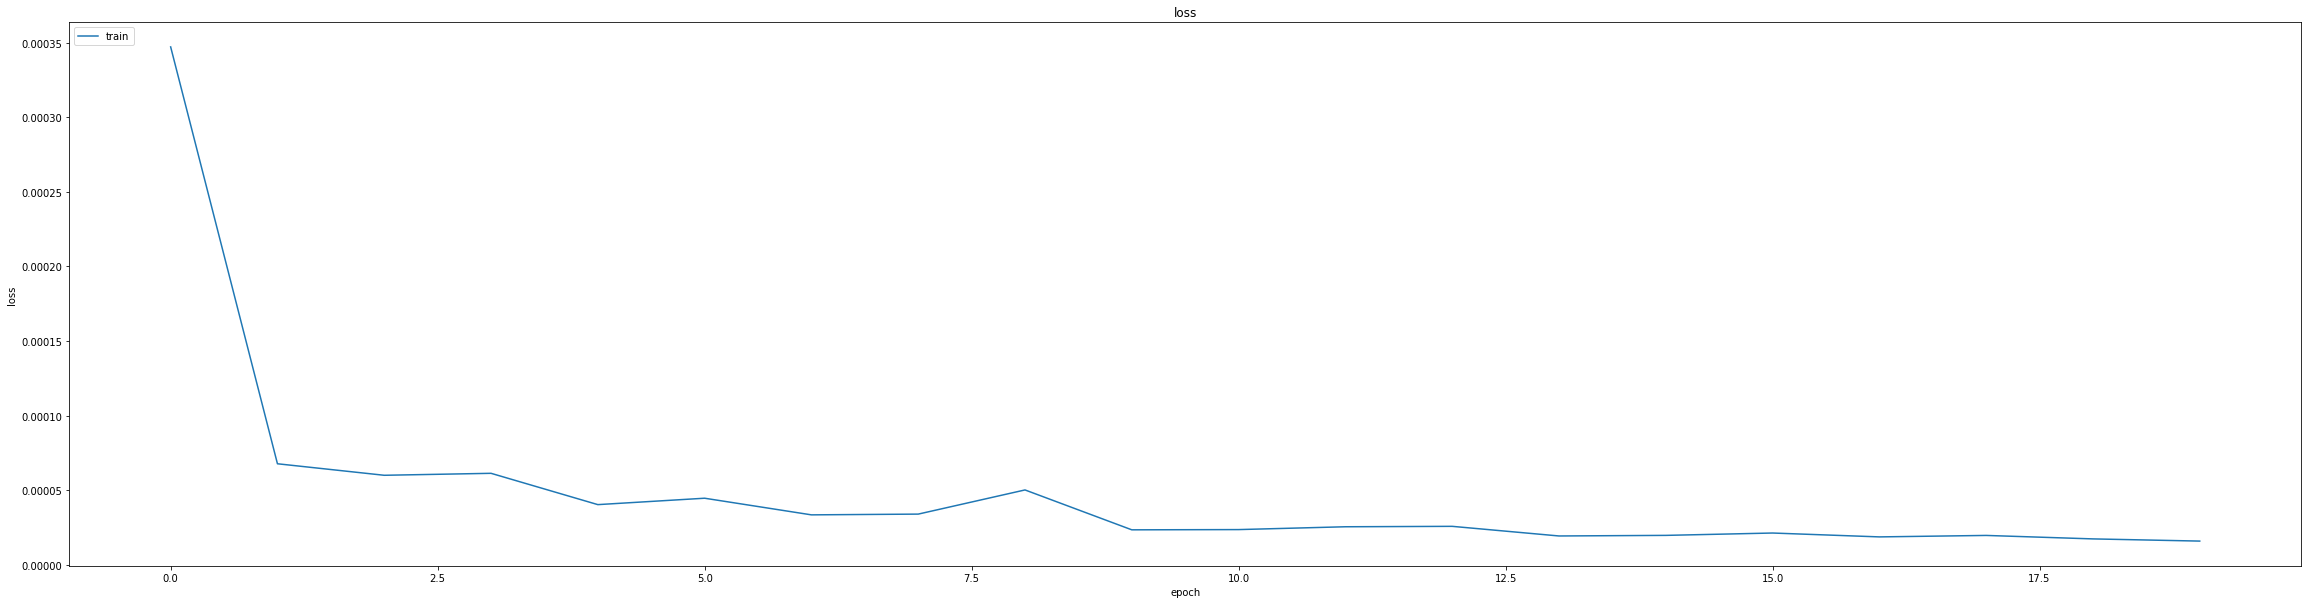

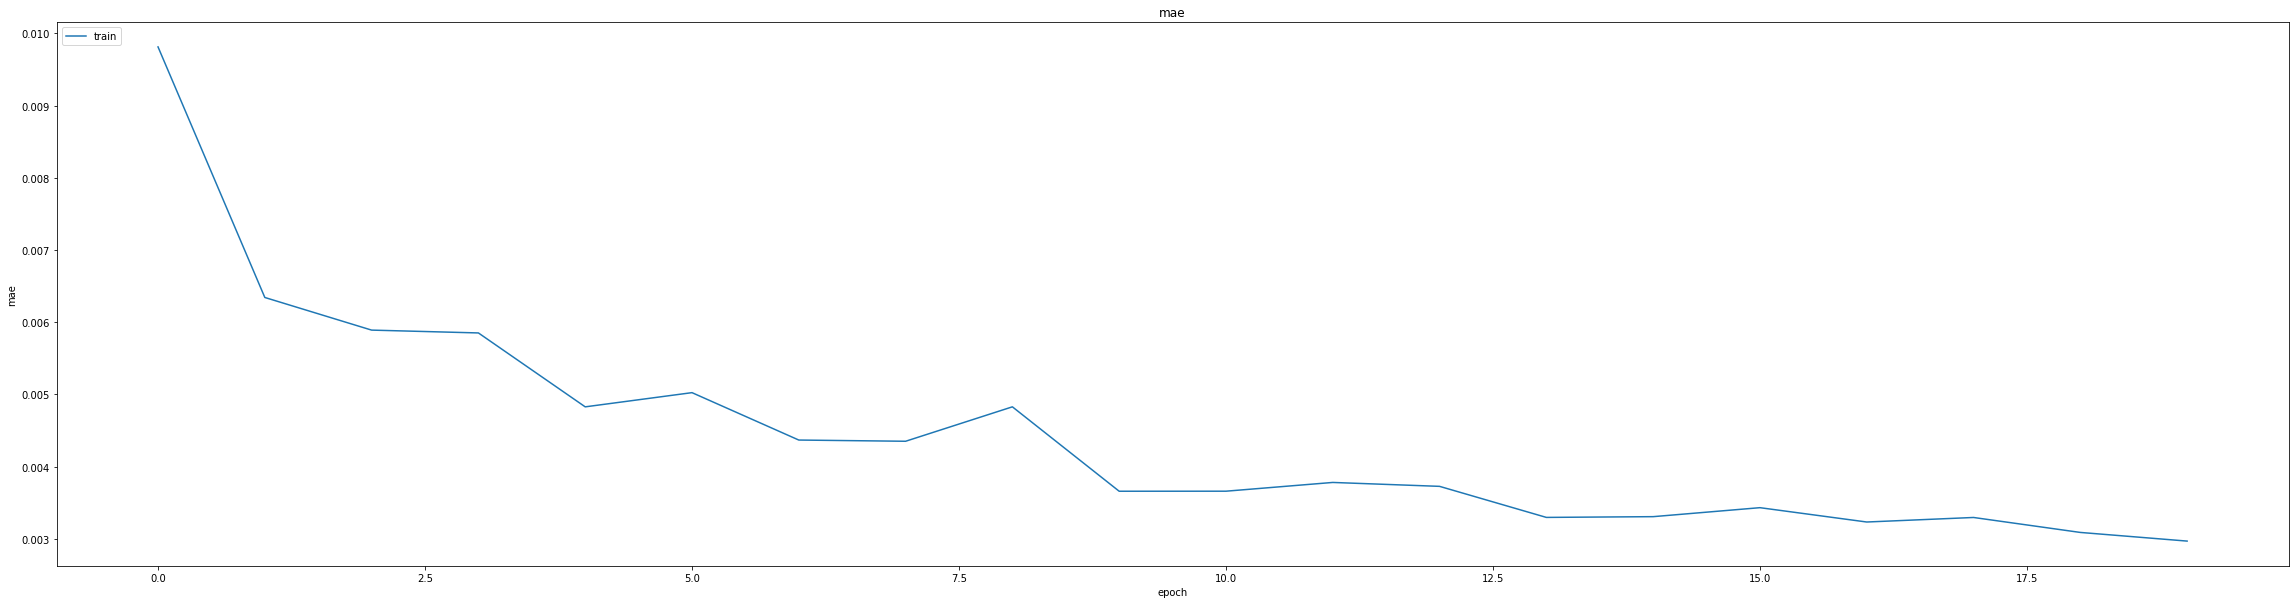

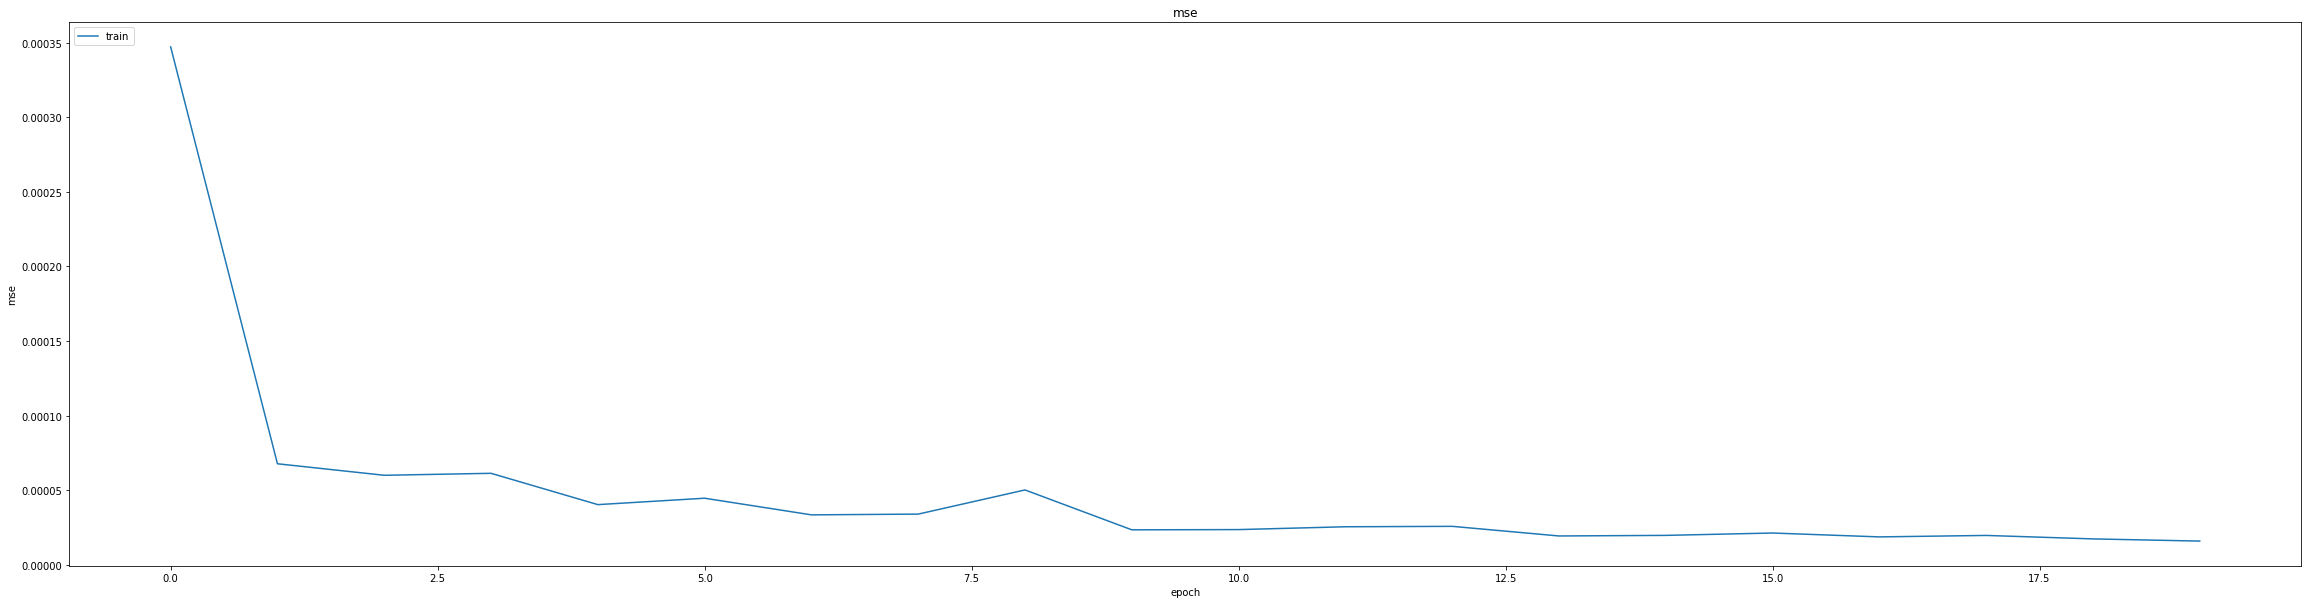

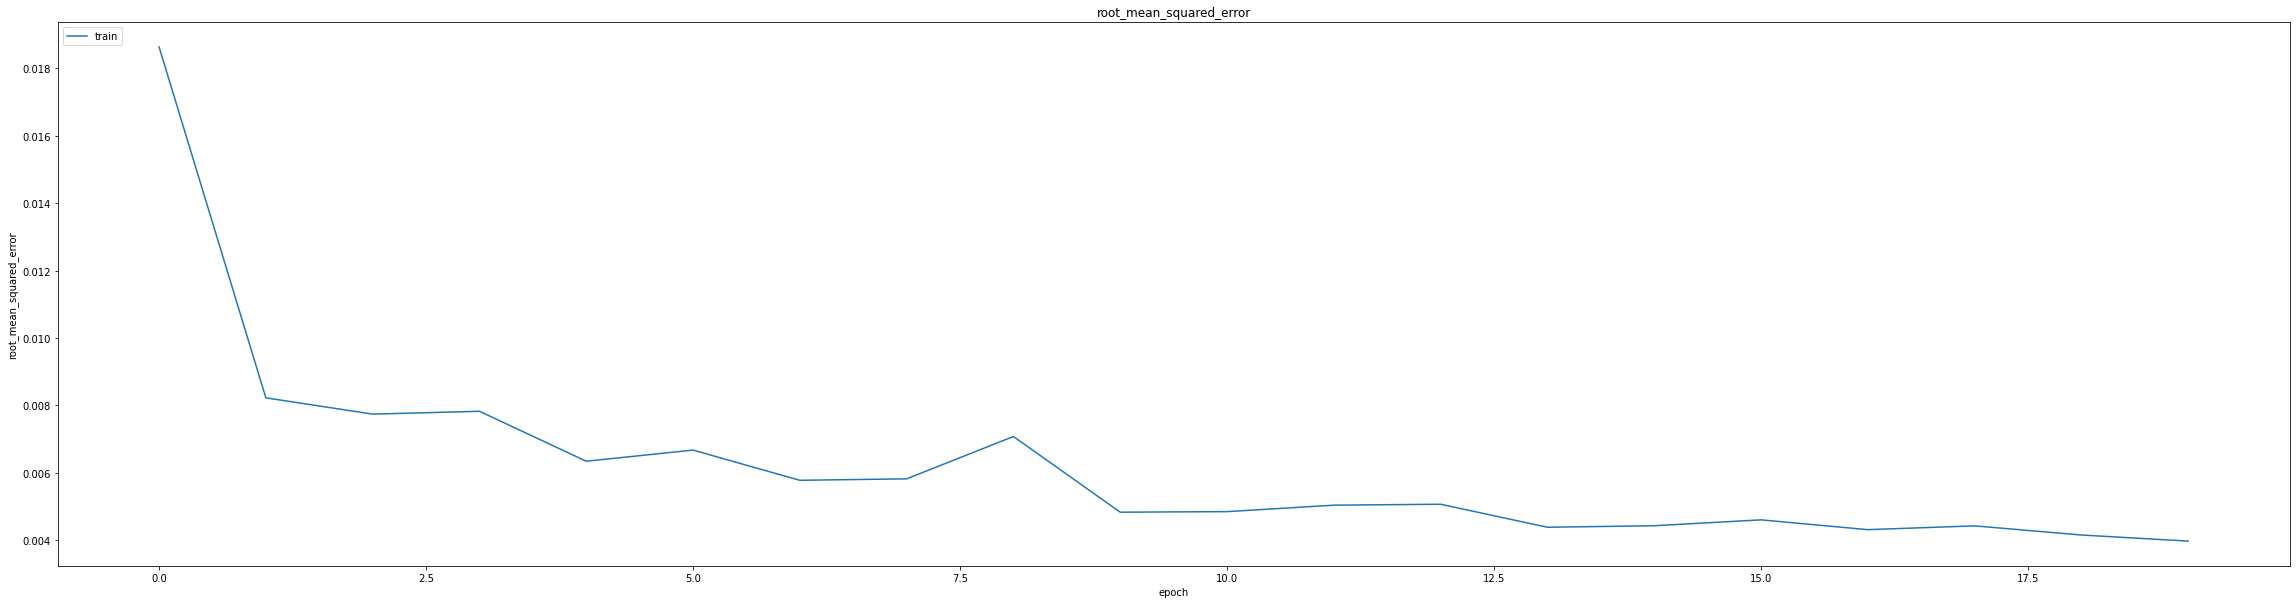

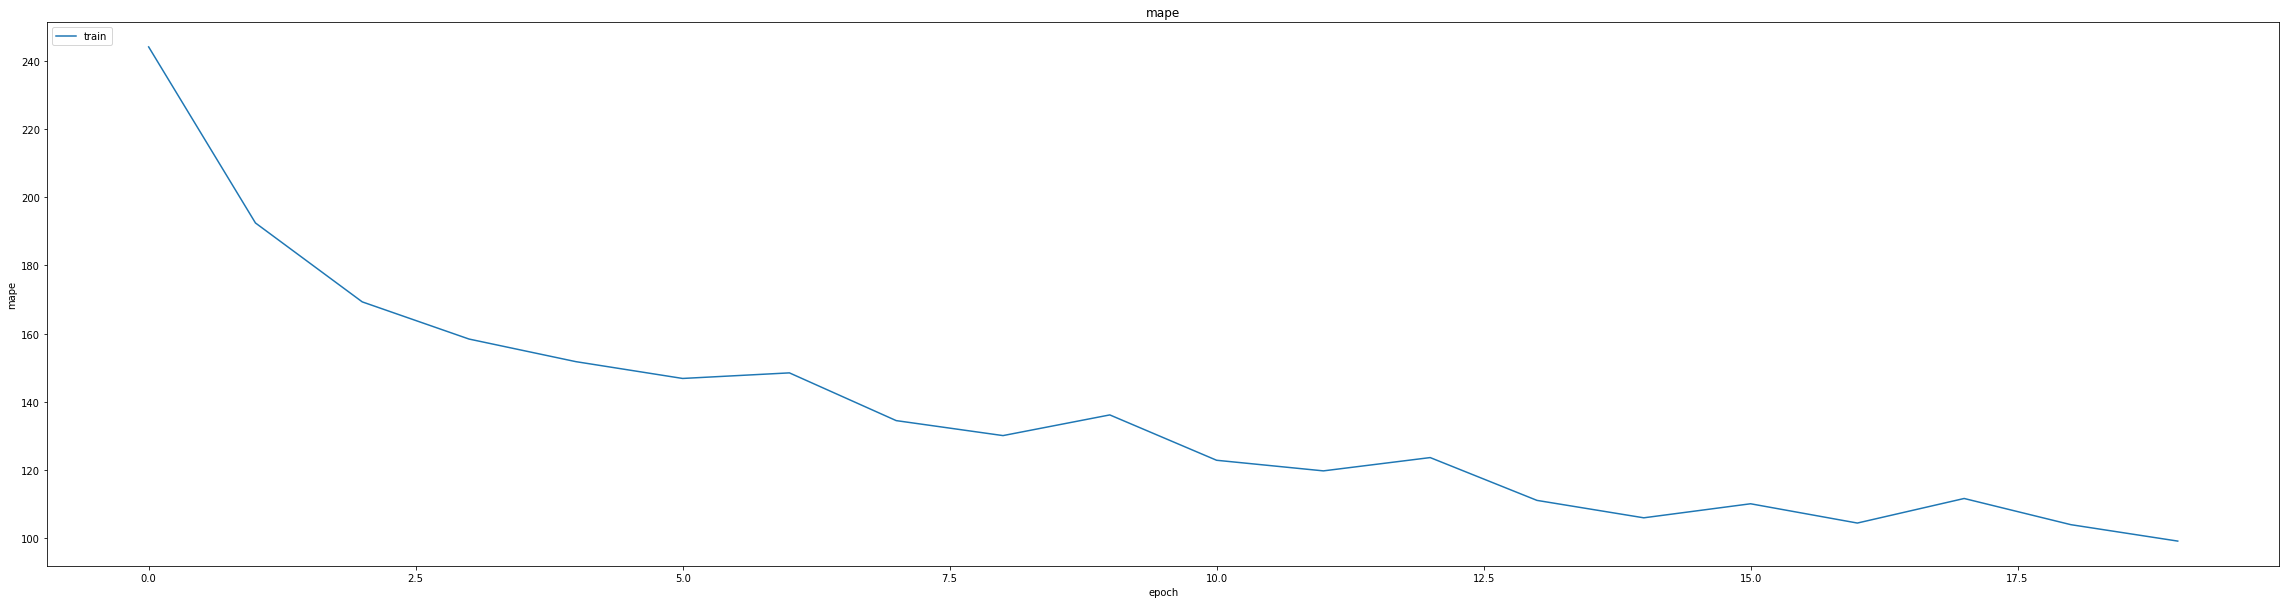

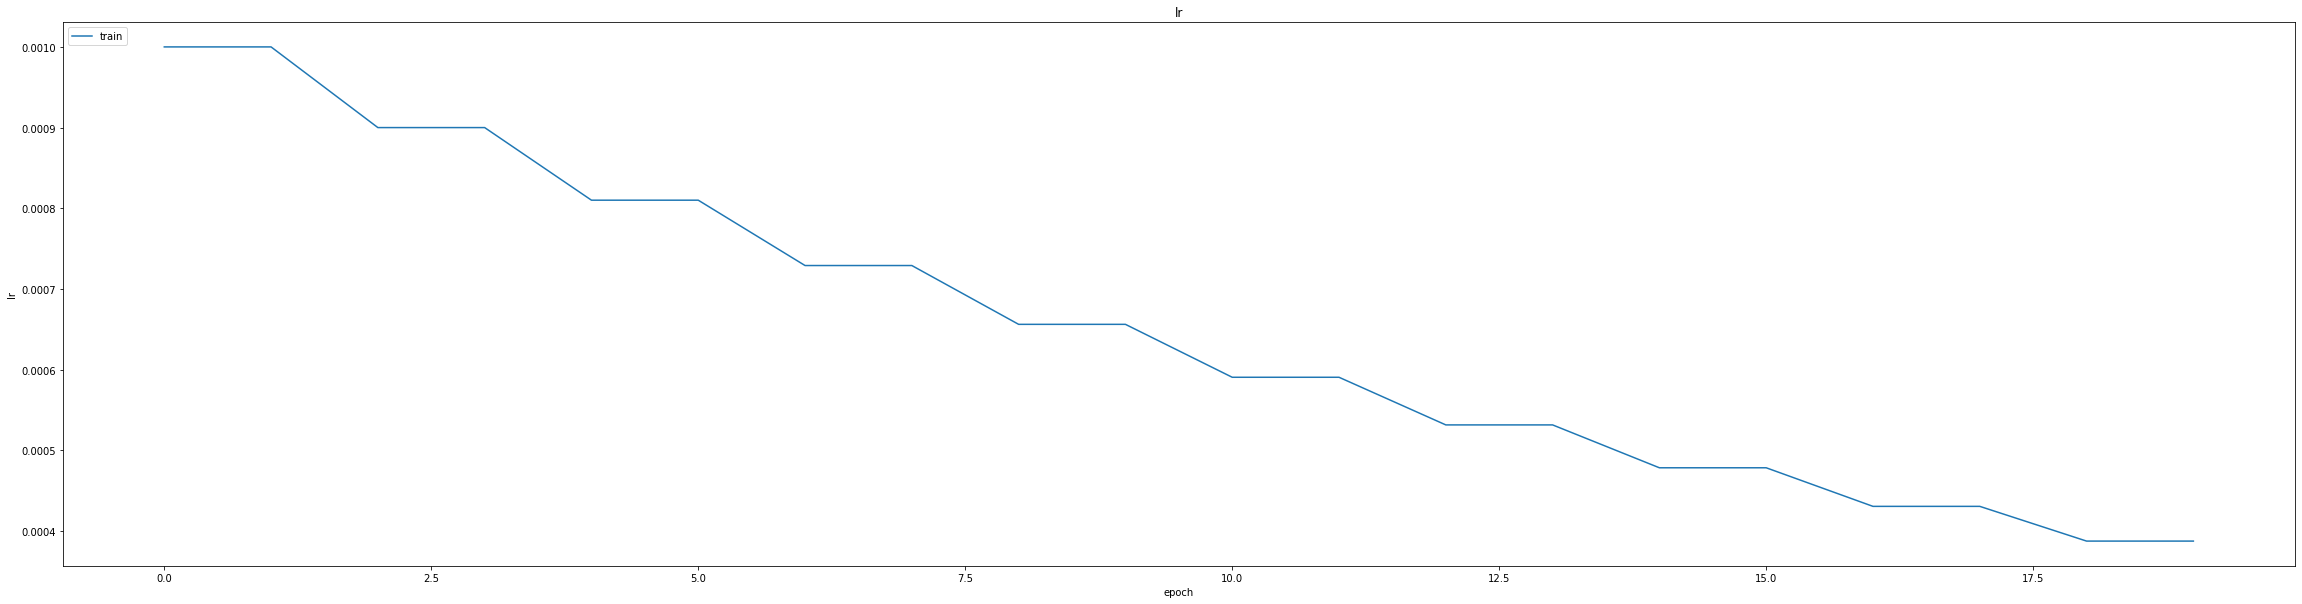

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012978971004486084
0.015214122831821442
1043/1043 [==============================] - 4s 3ms/step
0.9823609687502588


1043/1043 [==============================] - 4s 3ms/step


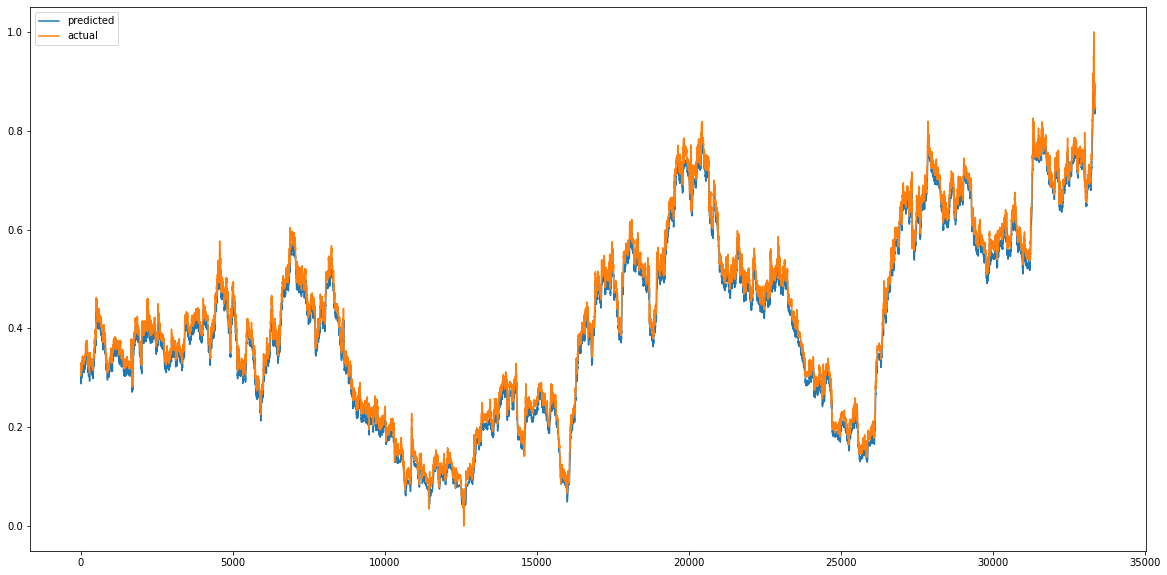

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


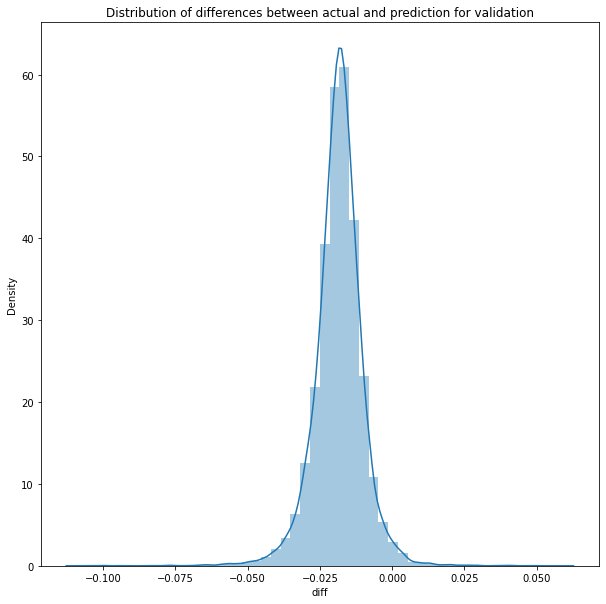

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 3ms/step


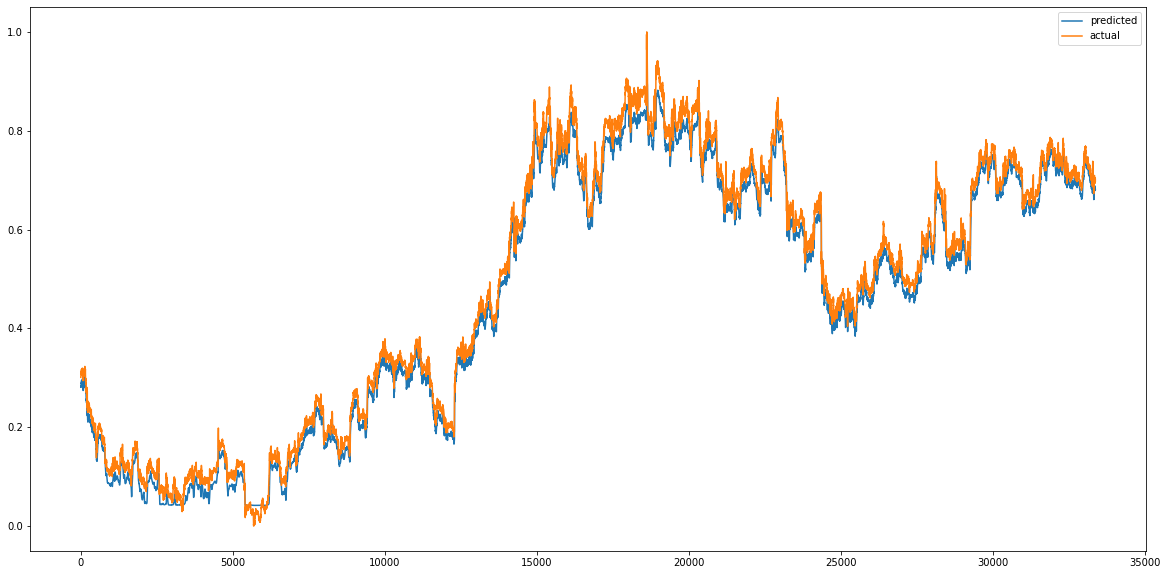

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


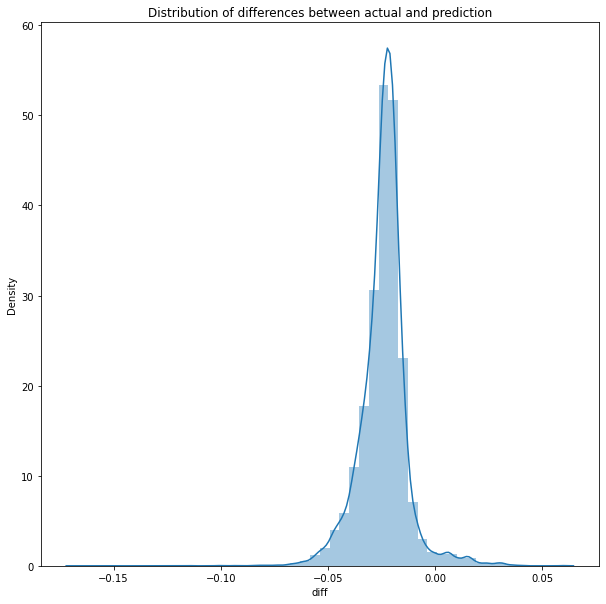

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0006981766726497634
RMSE :  0.026423032994903582
MAE :  0.024577379759251616
1043/1043 [==============================] - 3s 3ms/step
R2_Score  : 0.9901818697579697


count    33373.000000
mean        -0.023944
std          0.011174
min         -0.167963
25%         -0.028884
50%         -0.023208
75%         -0.018835
max          0.060399
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 463.0181 - mae: 3.5746 - mse: 463.0181 - root_mean_squared_error: 21.5179 - mape: 4861.8062
Epoch 1: val_mse improved from inf to 0.03952, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 16s 33ms/step - loss: 463.0181 - mae: 3.5746 - mse: 463.0181 - root_mean_squared_error: 21.5179 - mape: 4861.8062 - val_loss: 0.0395 - val_mae: 0.1636 - val_mse: 0.0395 - val_root_mean_squared_error: 0.1988 - val_mape: 10785.1387
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.0342 - mae: 0.1524 - mse: 0.0342 - root_mean_squared_error: 0.1850 - mape: 1976.8123
Epoch 2: val_mse improved from 0.03952 to 0.02315, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0342 - mae: 0.1523 - mse: 0.0342 - root_mean_squared_error: 0.1850 - mape: 1973.2837 - val_loss: 0.0232 - val_mae: 0.1250 - val_mse: 0.0232 - val_root_mean_squared_error: 0.1522 - val_mape: 8749.3877
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 0.0108 - mae: 0.0737 - mse: 0.0108 - root_mean_squared_error: 0.1040 - mape: 1875.4800
Epoch 3: val_mse improved from 0.02315 to 0.00149, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0108 - mae: 0.0734 - mse: 0.0108 - root_mean_squared_error: 0.1037 - mape: 1863.0764 - val_loss: 0.0015 - val_mae: 0.0303 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0387 - val_mape: 5559.1582
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0231 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1139.1289
Epoch 4: val_mse improved from 0.00149 to 0.00099, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 14s 33ms/step - loss: 0.0014 - mae: 0.0231 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1131.6300 - val_loss: 9.8860e-04 - val_mae: 0.0244 - val_mse: 9.8860e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 4337.6025
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 8.0006e-04 - mae: 0.0169 - mse: 8.0006e-04 - root_mean_squared_error: 0.0283 - mape: 905.4594
Epoch 5: val_mse improved from 0.00099 to 0.00083, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 8.0006e-04 - mae: 0.0169 - mse: 8.0006e-04 - root_mean_squared_error: 0.0283 - mape: 905.4594 - val_loss: 8.3239e-04 - val_mae: 0.0216 - val_mse: 8.3239e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 3651.0825
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 5.3851e-04 - mae: 0.0139 - mse: 5.3851e-04 - root_mean_squared_error: 0.0232 - mape: 816.4873
Epoch 6: val_mse improved from 0.00083 to 0.00057, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 5.3825e-04 - mae: 0.0139 - mse: 5.3825e-04 - root_mean_squared_error: 0.0232 - mape: 815.0037 - val_loss: 5.7445e-04 - val_mae: 0.0177 - val_mse: 5.7445e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 3180.3481
Epoch 7/60
402/405 [============================>.] - ETA: 0s - loss: 3.9413e-04 - mae: 0.0122 - mse: 3.9413e-04 - root_mean_squared_error: 0.0199 - mape: 633.1149
Epoch 7: val_mse improved from 0.00057 to 0.00044, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 3.9403e-04 - mae: 0.0122 - mse: 3.9403e-04 - root_mean_squared_error: 0.0199 - mape: 628.9459 - val_loss: 4.4257e-04 - val_mae: 0.0156 - val_mse: 4.4257e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 2823.4690
Epoch 8/60
402/405 [============================>.] - ETA: 0s - loss: 3.0449e-04 - mae: 0.0110 - mse: 3.0449e-04 - root_mean_squared_error: 0.0174 - mape: 599.3464
Epoch 8: val_mse did not improve from 0.00044
405/405 [==============================] - 6s 15ms/step - loss: 3.0419e-04 - mae: 0.0110 - mse: 3.0419e-04 - root_mean_squared_error: 0.0174 - mape: 595.3516 - val_loss: 4.5551e-04 - val_mae: 0.0159 - val_mse: 4.5551e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 2537.0190
Epoch 9/60
402/405 [============================>.] - ETA: 0s - loss: 2.4104e-04 - mae: 0.0101 - mse: 2.4104e-04 - root_mean_squared_error: 0.0155 - mape: 501.7715
Epoch 9: val_mse improved from 0.00044 to 0.00037, saving model

405/405 [==============================] - 13s 31ms/step - loss: 2.4084e-04 - mae: 0.0101 - mse: 2.4084e-04 - root_mean_squared_error: 0.0155 - mape: 498.4427 - val_loss: 3.6978e-04 - val_mae: 0.0143 - val_mse: 3.6978e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 2300.7324
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 1.9999e-04 - mae: 0.0095 - mse: 1.9999e-04 - root_mean_squared_error: 0.0141 - mape: 469.6994
Epoch 10: val_mse improved from 0.00037 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 1.9984e-04 - mae: 0.0095 - mse: 1.9984e-04 - root_mean_squared_error: 0.0141 - mape: 467.7013 - val_loss: 3.2482e-04 - val_mae: 0.0132 - val_mse: 3.2482e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2109.1743
Epoch 11/60
404/405 [============================>.] - ETA: 0s - loss: 1.6974e-04 - mae: 0.0089 - mse: 1.6974e-04 - root_mean_squared_error: 0.0130 - mape: 417.6588
Epoch 11: val_mse did not improve from 0.00032
405/405 [==============================] - 6s 15ms/step - loss: 1.6974e-04 - mae: 0.0089 - mse: 1.6974e-04 - root_mean_squared_error: 0.0130 - mape: 416.9057 - val_loss: 3.7326e-04 - val_mae: 0.0144 - val_mse: 3.7326e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 1946.9957
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 1.4761e-04 - mae: 0.0085 - mse: 1.4761e-04 - root_mean_squared_error: 0.0121 - mape: 388.2479
Epoch 12: val_mse improved from 0.00032 to 0.00030, saving m

405/405 [==============================] - 13s 32ms/step - loss: 1.4761e-04 - mae: 0.0085 - mse: 1.4761e-04 - root_mean_squared_error: 0.0121 - mape: 387.5471 - val_loss: 2.9523e-04 - val_mae: 0.0127 - val_mse: 2.9523e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 1807.5496
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 1.2976e-04 - mae: 0.0081 - mse: 1.2976e-04 - root_mean_squared_error: 0.0114 - mape: 384.2925
Epoch 13: val_mse did not improve from 0.00030
405/405 [==============================] - 6s 14ms/step - loss: 1.2979e-04 - mae: 0.0081 - mse: 1.2979e-04 - root_mean_squared_error: 0.0114 - mape: 382.6848 - val_loss: 3.5011e-04 - val_mae: 0.0139 - val_mse: 3.5011e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 1690.6742
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 1.1641e-04 - mae: 0.0078 - mse: 1.1641e-04 - root_mean_squared_error: 0.0108 - mape: 333.8415
Epoch 14: val_mse did not improve from 0.00030
405/405 [====

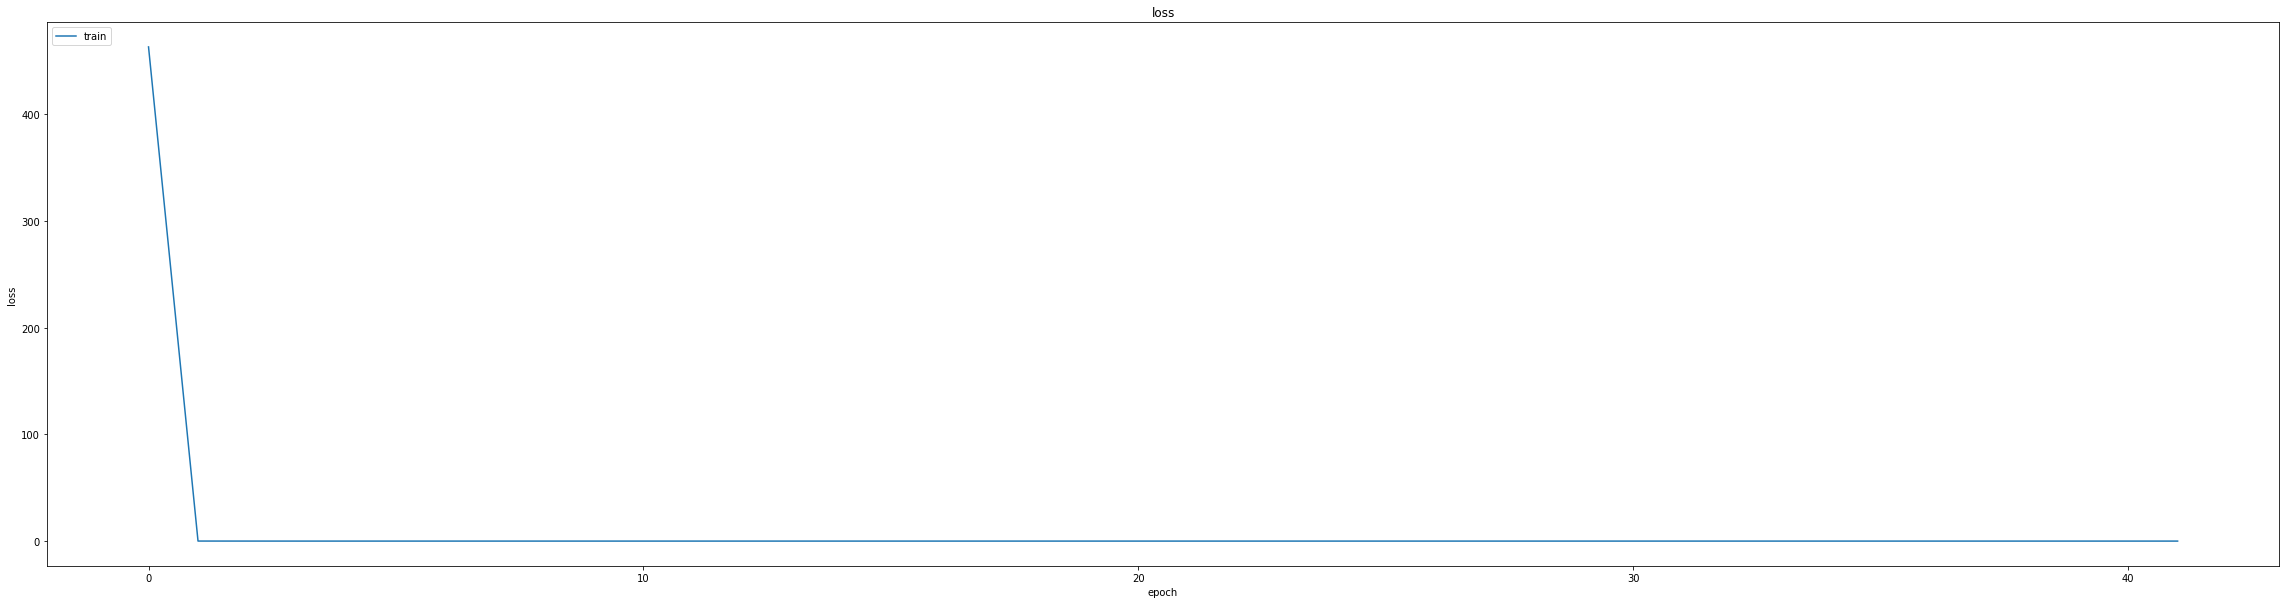

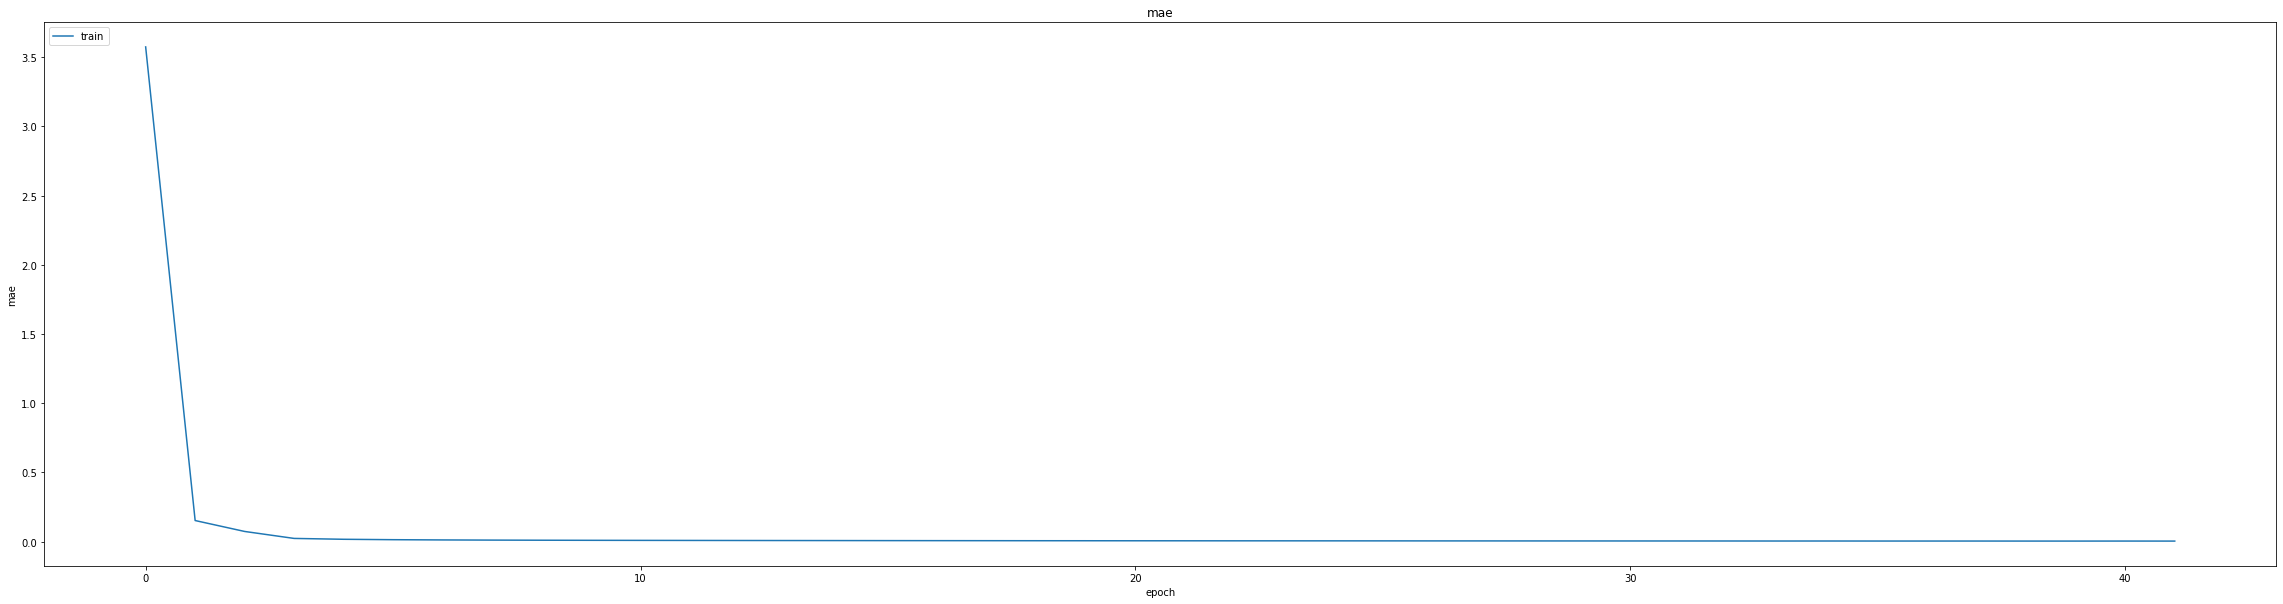

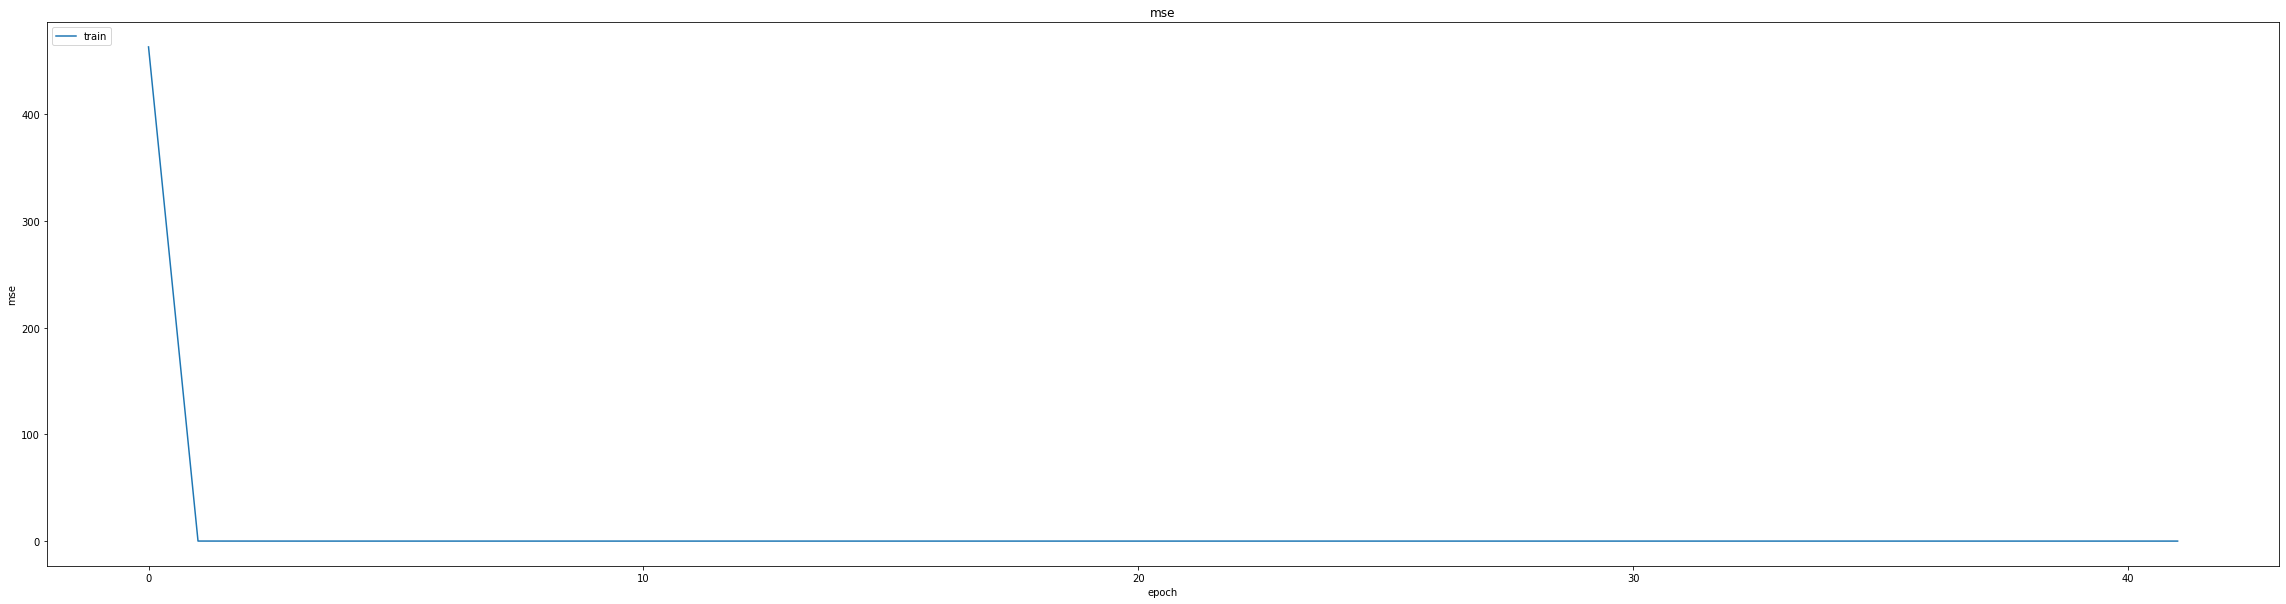

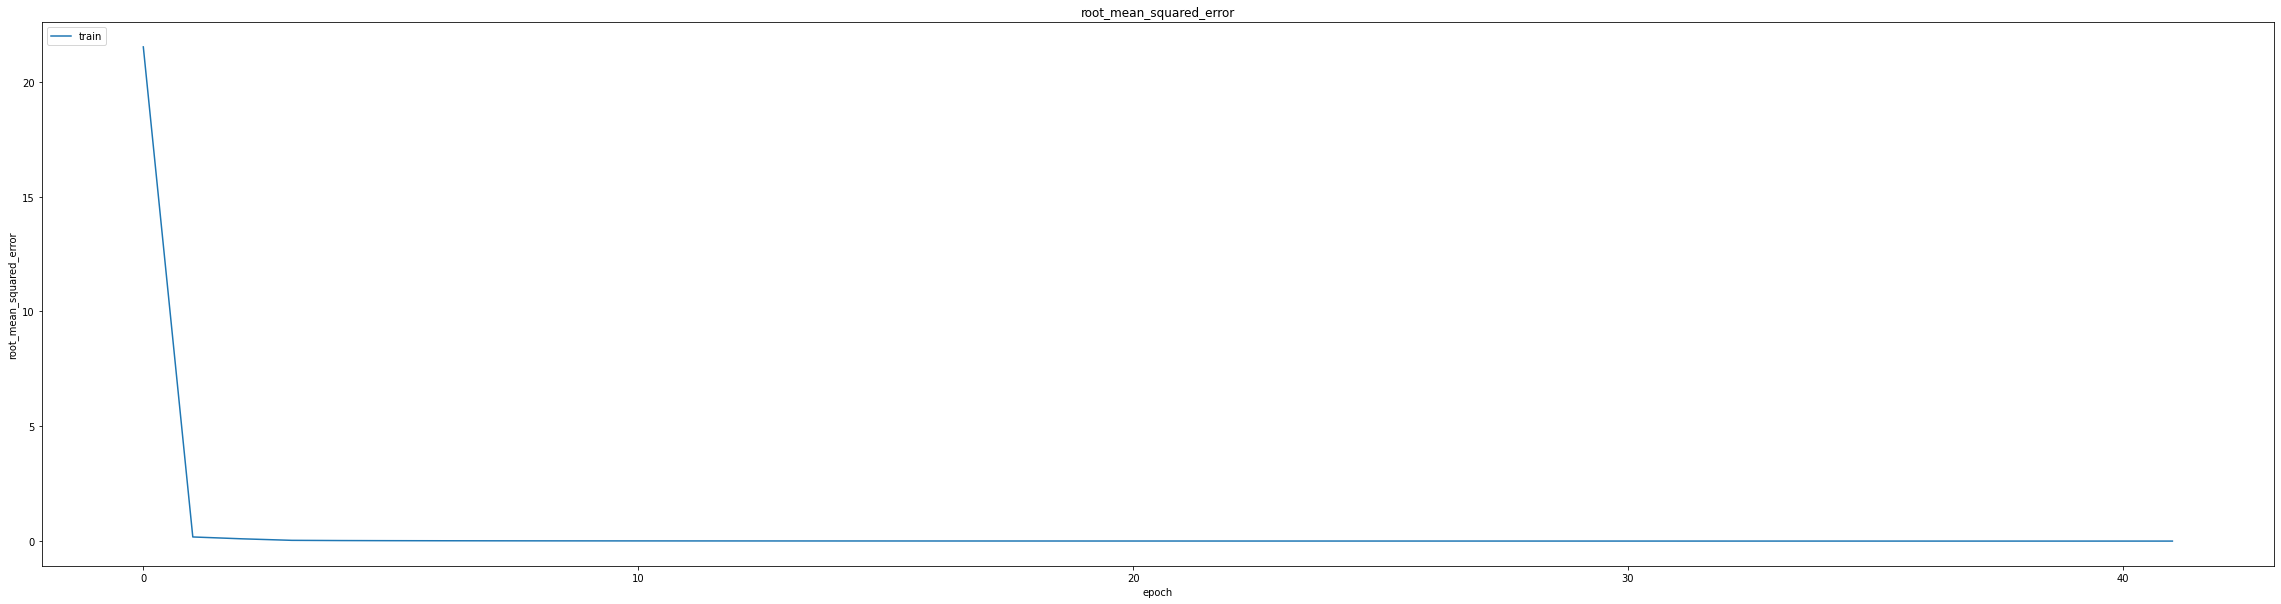

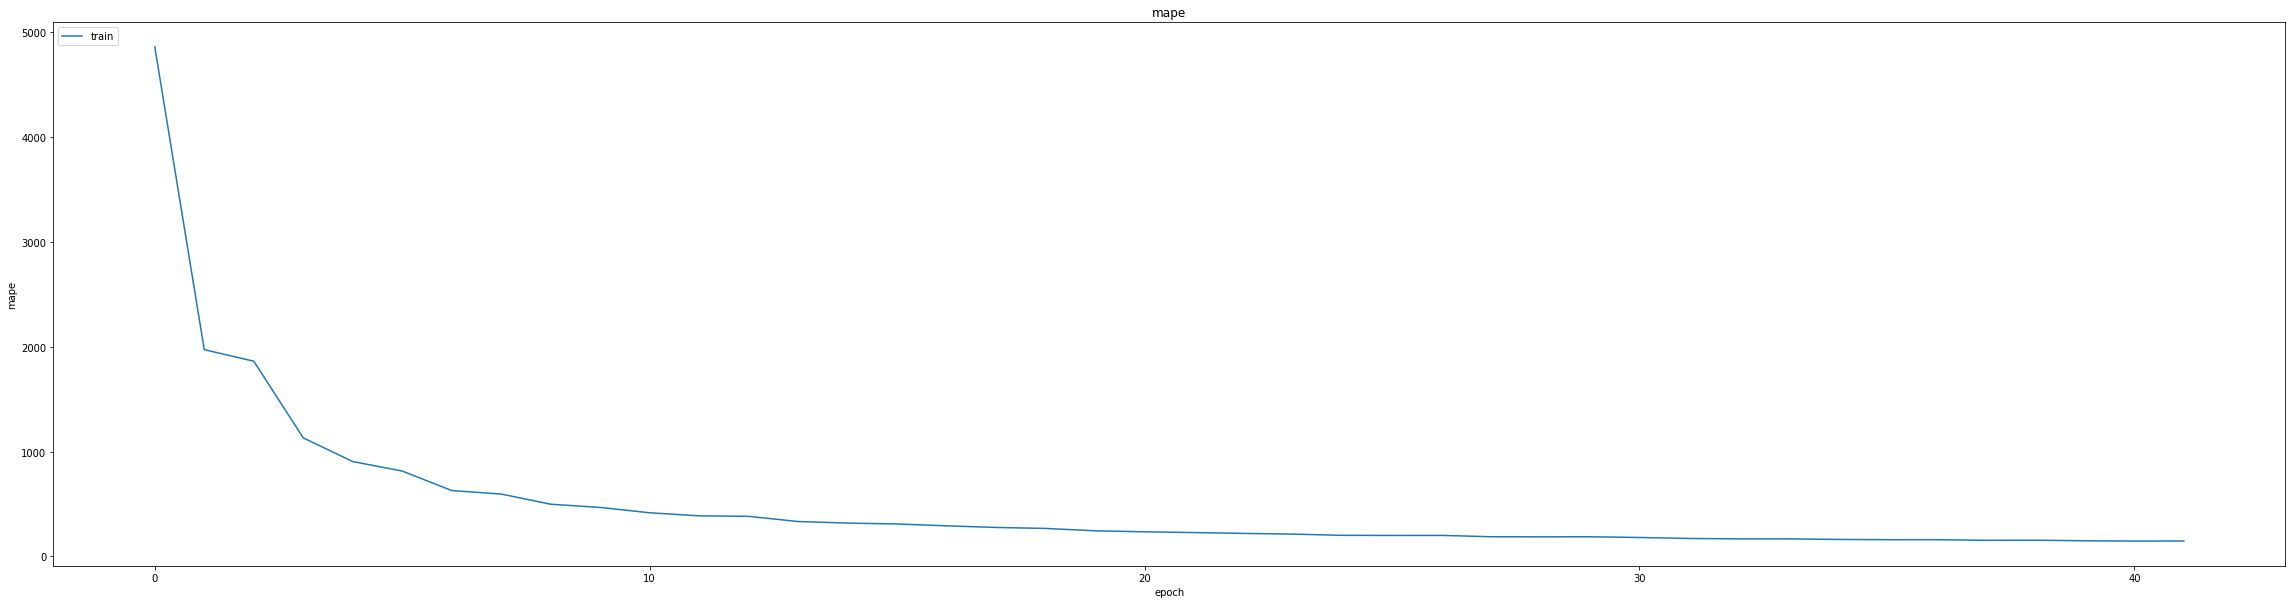

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012744810432195663
0.017182227224111557
1043/1043 [==============================] - 4s 3ms/step
0.9731787701894767


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 4.8176e-04 - mae: 0.0115 - mse: 4.8176e-04 - root_mean_squared_error: 0.0219 - mape: 404.7115
Epoch 1: val_mse did not improve from 0.00030
405/405 [==============================] - 9s 16ms/step - loss: 4.8000e-04 - mae: 0.0115 - mse: 4.8000e-04 - root_mean_squared_error: 0.0219 - mape: 402.9794 - val_loss: 3.0919e-04 - val_mae: 0.0130 - val_mse: 3.0919e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 1129.1680 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 6.2176e-05 - mae: 0.0060 - mse: 6.2176e-05 - root_mean_squared_error: 0.0079 - mape: 216.8180
Epoch 2: val_mse improved from 0.00030 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 6.2137e-05 - mae: 0.0060 - mse: 6.2137e-05 - root_mean_squared_error: 0.0079 - mape: 216.4198 - val_loss: 2.8947e-04 - val_mae: 0.0124 - val_mse: 2.8947e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 932.2106 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
403/405 [============================>.] - ETA: 0s - loss: 5.0351e-05 - mae: 0.0054 - mse: 5.0351e-05 - root_mean_squared_error: 0.0071 - mape: 163.1206
Epoch 3: val_mse did not improve from 0.00029
405/405 [==============================] - 6s 15ms/step - loss: 5.0334e-05 - mae: 0.0054 - mse: 5.0334e-05 - root_mean_squared_error: 0.0071 - mape: 162.4270 - val_loss: 3.9706e-04 - val_mae: 0.0147 - val_mse: 3.9706e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 827.6118 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 4.2944e-05 - mae: 0.0049 - mse: 4.2944e-05 - root_mean_squared_error: 0.0066 - mape: 153.5878

405/405 [==============================] - 13s 32ms/step - loss: 4.2944e-05 - mae: 0.0049 - mse: 4.2944e-05 - root_mean_squared_error: 0.0066 - mape: 153.5878 - val_loss: 2.6256e-04 - val_mae: 0.0119 - val_mse: 2.6256e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 843.5657 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
405/405 [==============================] - ETA: 0s - loss: 3.9494e-05 - mae: 0.0047 - mse: 3.9494e-05 - root_mean_squared_error: 0.0063 - mape: 140.1009
Epoch 5: val_mse did not improve from 0.00026
405/405 [==============================] - 6s 15ms/step - loss: 3.9494e-05 - mae: 0.0047 - mse: 3.9494e-05 - root_mean_squared_error: 0.0063 - mape: 140.1009 - val_loss: 3.5379e-04 - val_mae: 0.0139 - val_mse: 3.5379e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 808.0762 - lr: 8.1000e-04
Epoch 6/20
401/405 [============================>.] - ETA: 0s - loss: 3.8700e-05 - mae: 0.0046 - mse: 3.8700e-05 - root_mean_squared_error: 0.0062 - mape: 124.

405/405 [==============================] - 13s 32ms/step - loss: 4.2965e-05 - mae: 0.0049 - mse: 4.2965e-05 - root_mean_squared_error: 0.0066 - mape: 131.3605 - val_loss: 2.4426e-04 - val_mae: 0.0115 - val_mse: 2.4426e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1003.3304 - lr: 7.2900e-04
Epoch 8/20
404/405 [============================>.] - ETA: 0s - loss: 3.5306e-05 - mae: 0.0045 - mse: 3.5306e-05 - root_mean_squared_error: 0.0059 - mape: 118.1111
Epoch 8: val_mse improved from 0.00024 to 0.00024, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 3.5284e-05 - mae: 0.0045 - mse: 3.5284e-05 - root_mean_squared_error: 0.0059 - mape: 117.8956 - val_loss: 2.3948e-04 - val_mae: 0.0114 - val_mse: 2.3948e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 833.7682 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
405/405 [==============================] - ETA: 0s - loss: 2.8712e-05 - mae: 0.0040 - mse: 2.8712e-05 - root_mean_squared_error: 0.0054 - mape: 114.7358
Epoch 9: val_mse did not improve from 0.00024
405/405 [==============================] - 6s 14ms/step - loss: 2.8712e-05 - mae: 0.0040 - mse: 2.8712e-05 - root_mean_squared_error: 0.0054 - mape: 114.7358 - val_loss: 3.9593e-04 - val_mae: 0.0158 - val_mse: 3.9593e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 772.3796 - lr: 6.5610e-04
Epoch 10/20
404/405 [============================>.] - ETA: 0s - loss: 3.3292e-05 - mae: 0.0042 - mse: 3.3292e-05 - root_mean_squared_error: 0.0058 - mape: 110

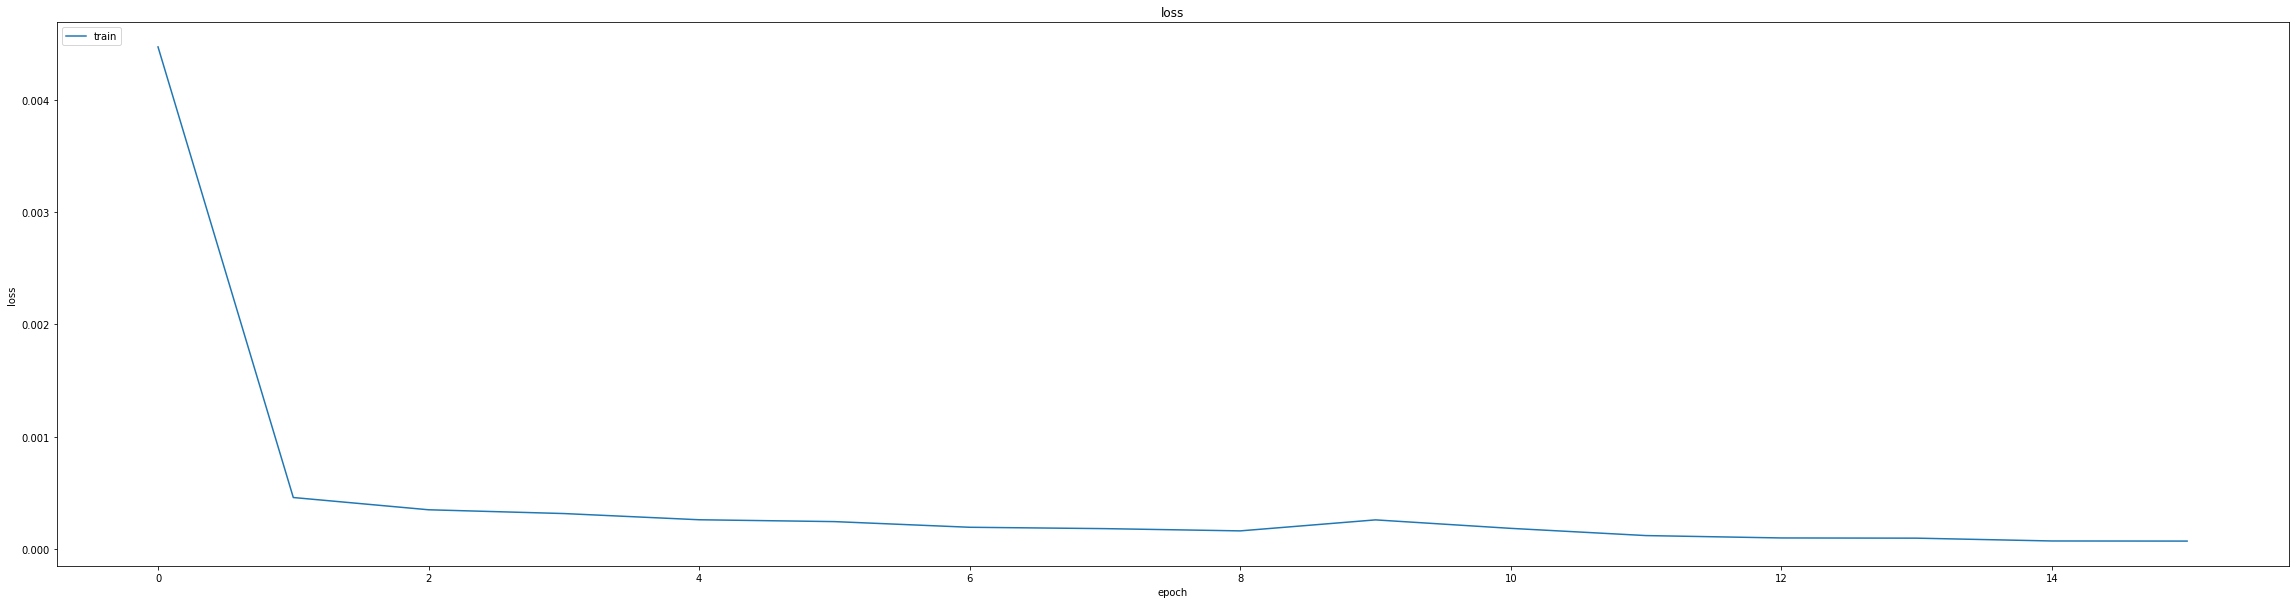

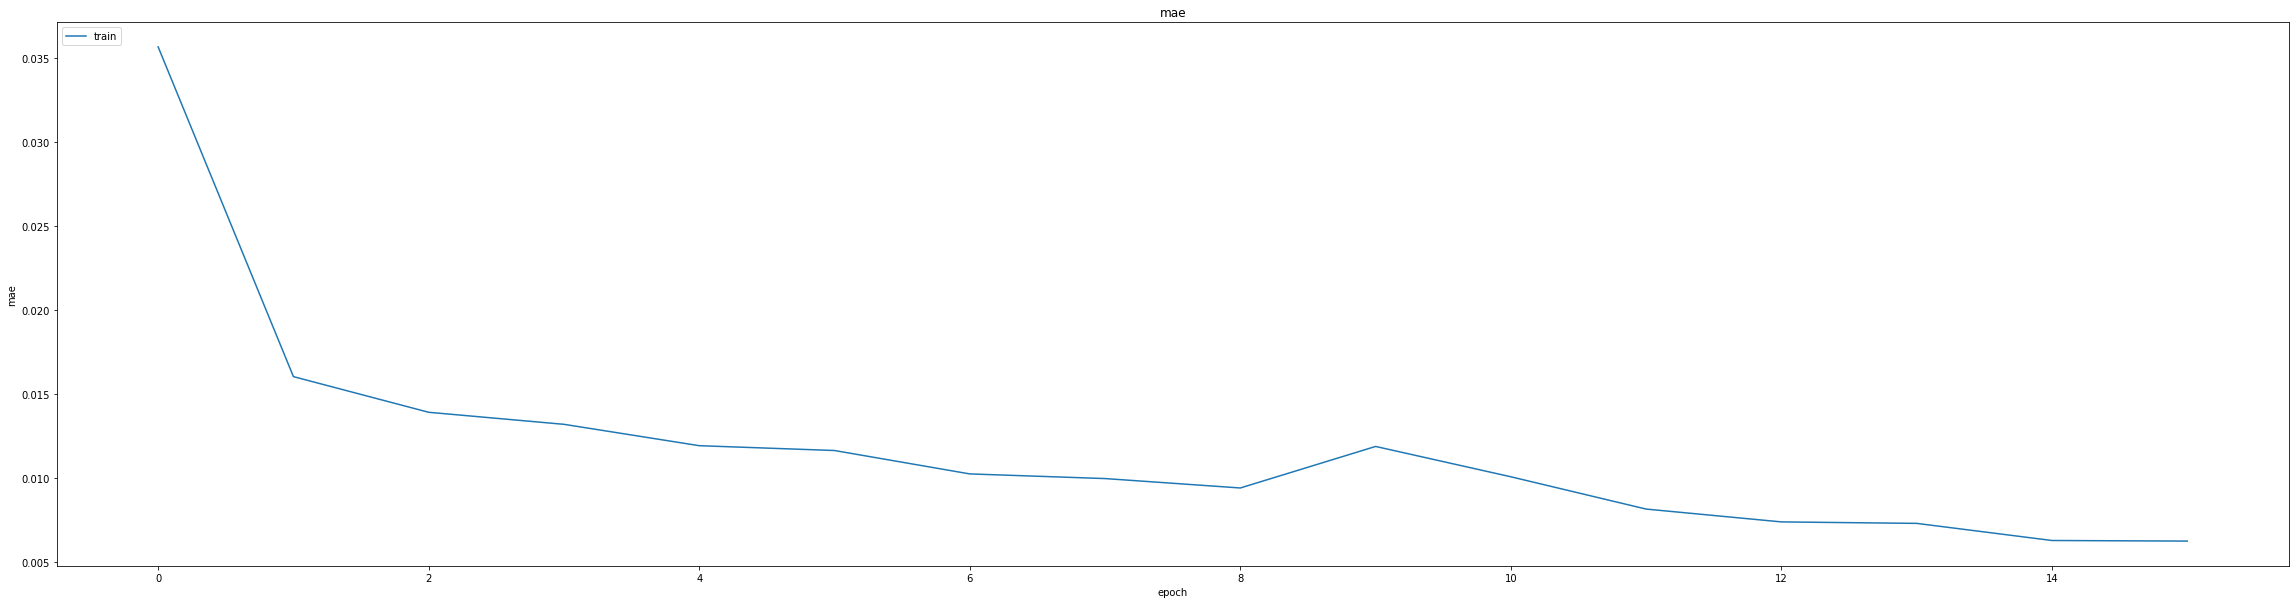

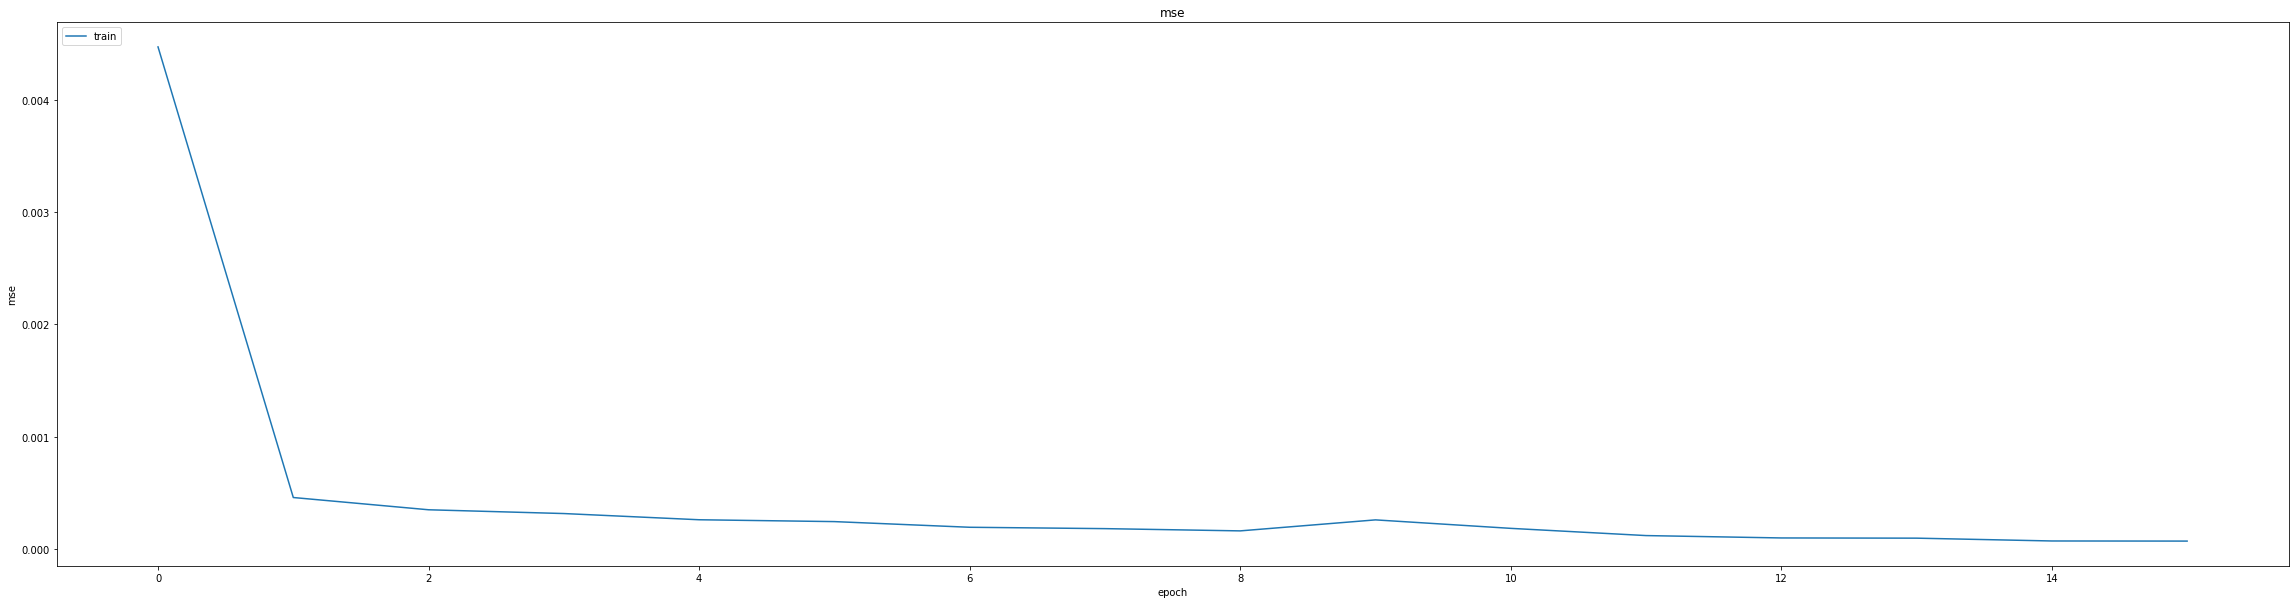

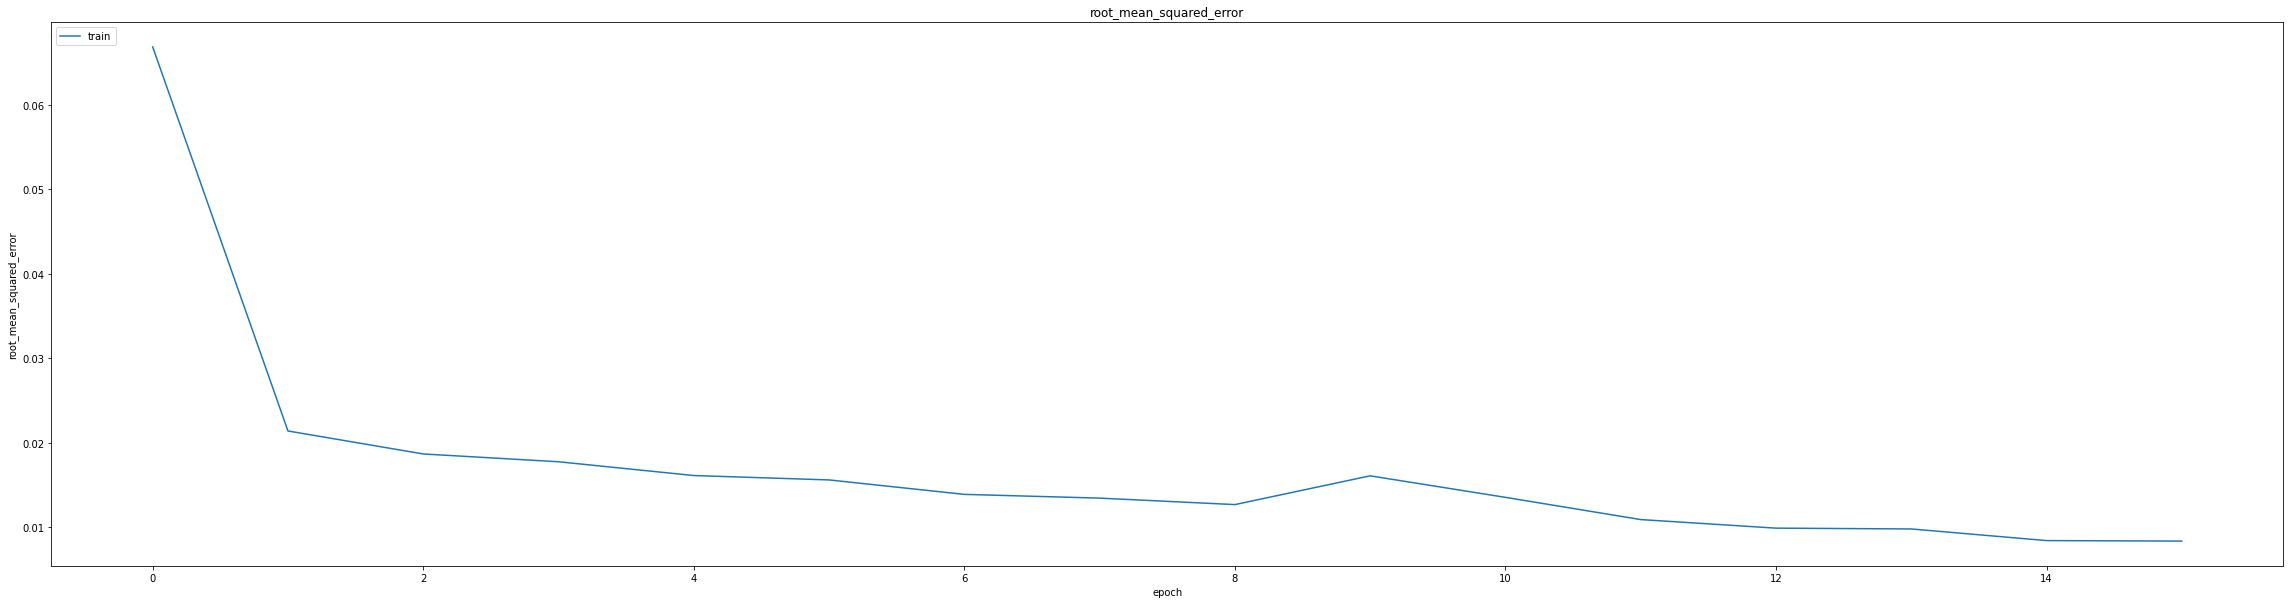

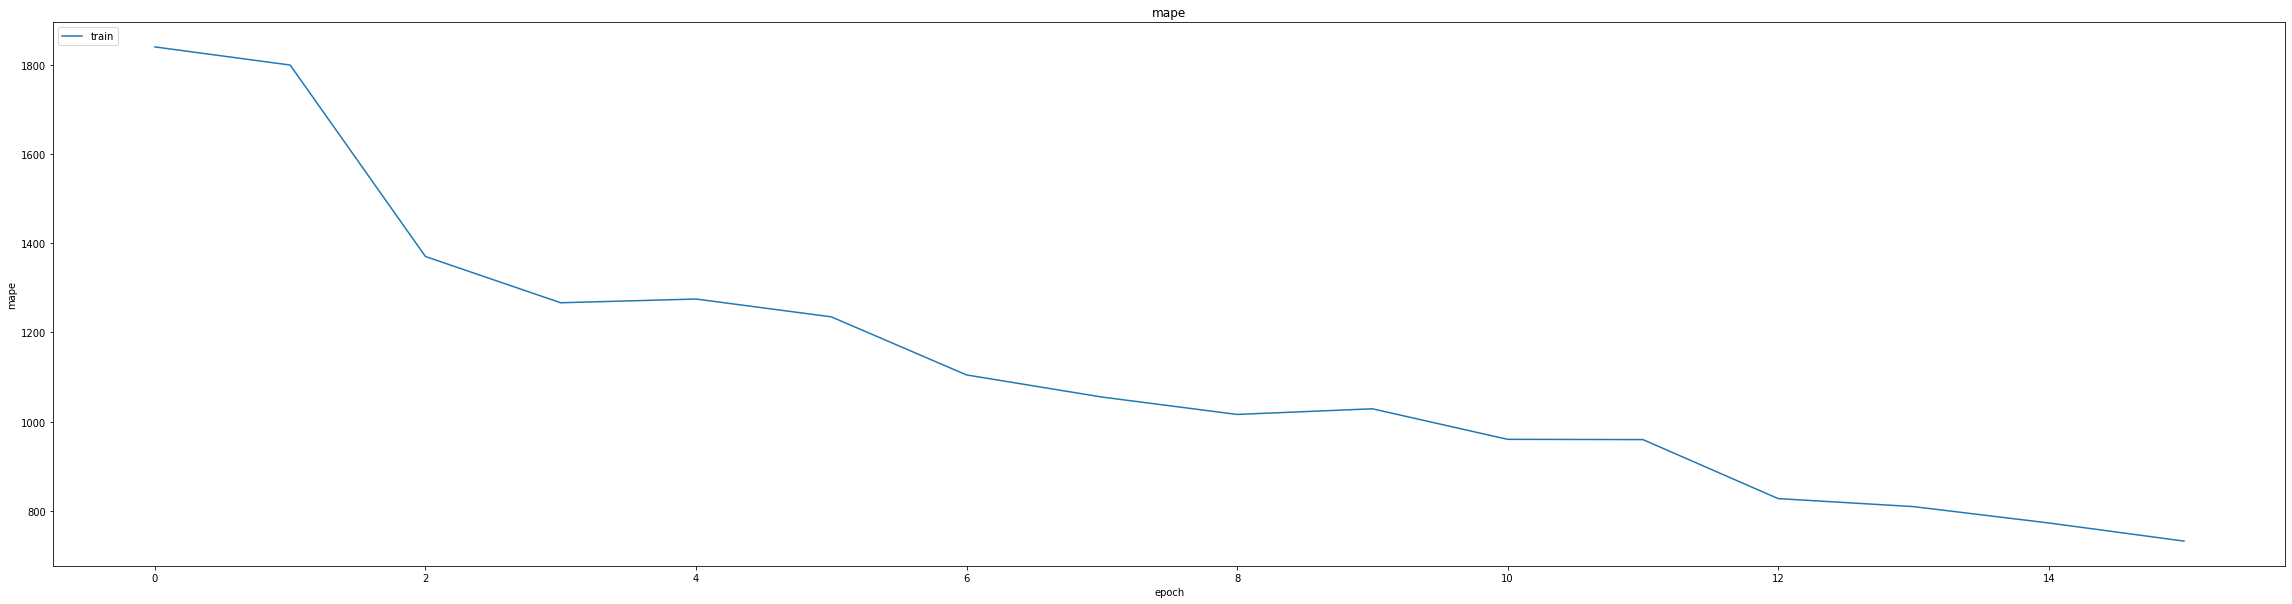

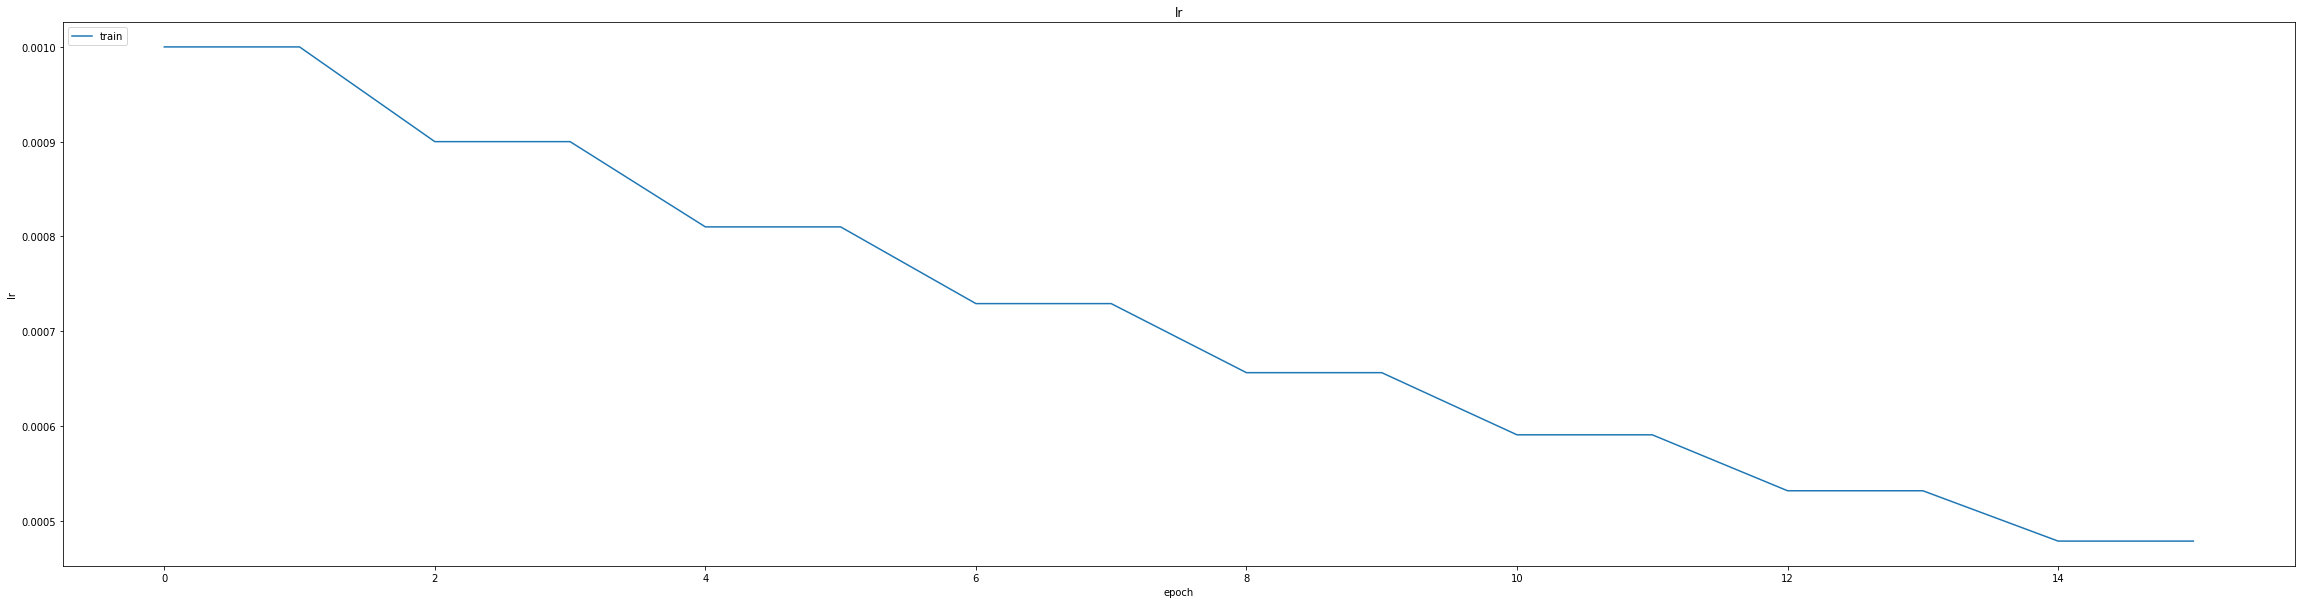

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01136377826333046
0.015475046820938587
1043/1043 [==============================] - 4s 3ms/step
0.9816915407131295


1043/1043 [==============================] - 4s 4ms/step


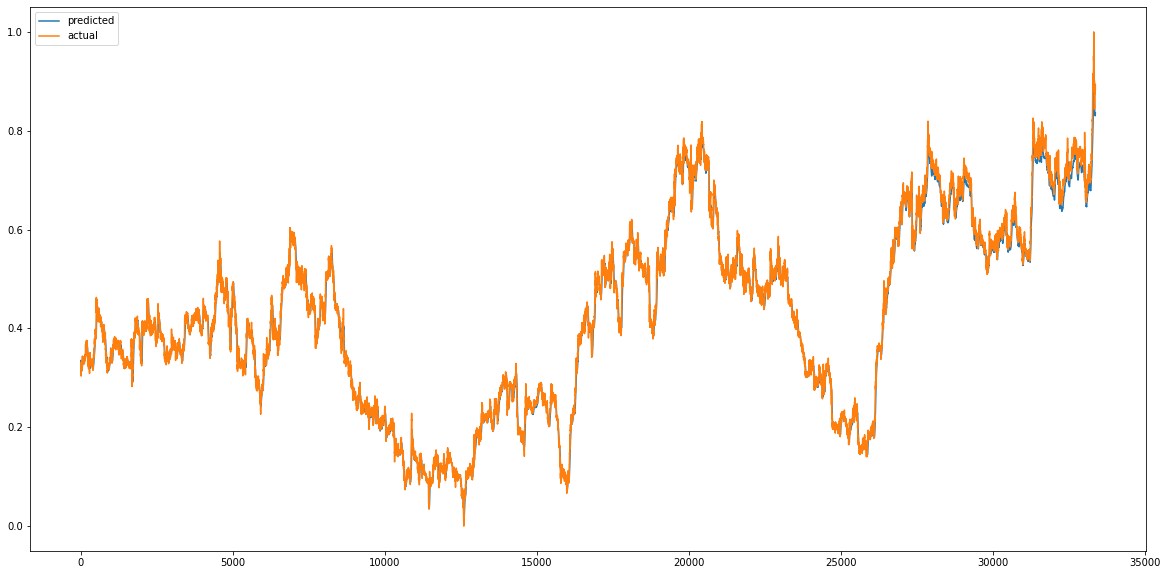

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


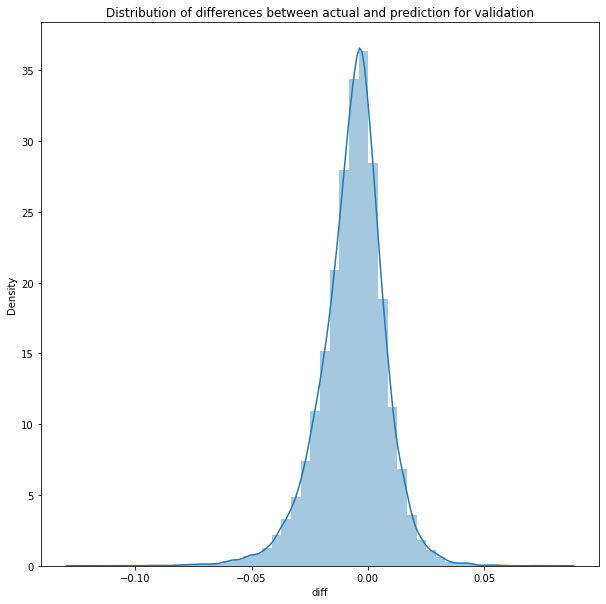

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 3s 3ms/step


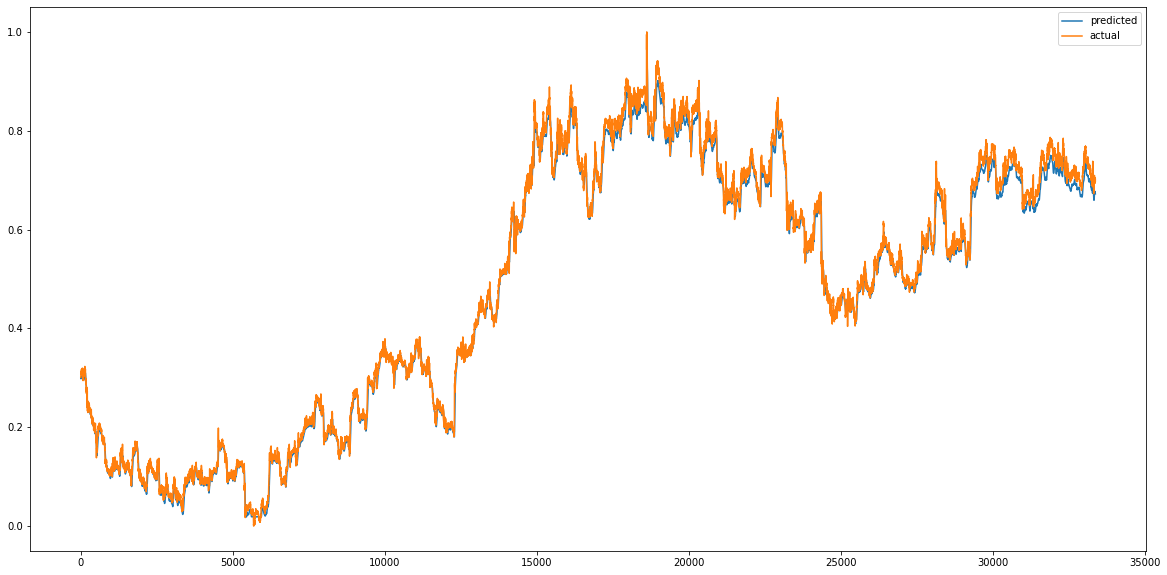

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


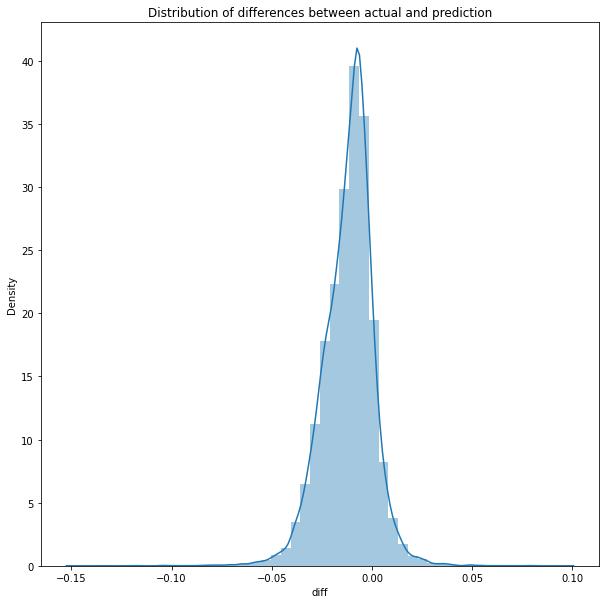

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000297053084383573
RMSE :  0.017235228004977857
MAE :  0.013496905404185704
1043/1043 [==============================] - 3s 3ms/step
R2_Score  : 0.9958226821581927


count    33373.000000
mean        -0.011735
std          0.012623
min         -0.147857
25%         -0.018984
50%         -0.010262
75%         -0.004033
max          0.095951
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60


404/405 [============================>.] - ETA: 0s - loss: 613.4594 - mae: 6.2592 - mse: 613.4594 - root_mean_squared_error: 24.7681 - mape: 26839.4512
Epoch 1: val_mse improved from inf to 0.20036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 53s 106ms/step - loss: 612.3221 - mae: 6.2485 - mse: 612.3221 - root_mean_squared_error: 24.7451 - mape: 26790.3125 - val_loss: 0.2004 - val_mae: 0.4052 - val_mse: 0.2004 - val_root_mean_squared_error: 0.4476 - val_mape: 25206.6641
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.1349 - mae: 0.3195 - mse: 0.1349 - root_mean_squared_error: 0.3673 - mape: 5155.7148
Epoch 2: val_mse improved from 0.20036 to 0.04140, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.1349 - mae: 0.3195 - mse: 0.1349 - root_mean_squared_error: 0.3673 - mape: 5155.7148 - val_loss: 0.0414 - val_mae: 0.1692 - val_mse: 0.0414 - val_root_mean_squared_error: 0.2035 - val_mape: 15082.4385
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0524 - mae: 0.1951 - mse: 0.0524 - root_mean_squared_error: 0.2290 - mape: 3092.3093
Epoch 3: val_mse improved from 0.04140 to 0.03683, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0524 - mae: 0.1951 - mse: 0.0524 - root_mean_squared_error: 0.2290 - mape: 3086.8716 - val_loss: 0.0368 - val_mae: 0.1593 - val_mse: 0.0368 - val_root_mean_squared_error: 0.1919 - val_mape: 12113.9844
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0431 - mae: 0.1744 - mse: 0.0431 - root_mean_squared_error: 0.2075 - mape: 2732.7803
Epoch 4: val_mse did not improve from 0.03683
405/405 [==============================] - 9s 21ms/step - loss: 0.0431 - mae: 0.1744 - mse: 0.0431 - root_mean_squared_error: 0.2075 - mape: 2732.7803 - val_loss: 0.0400 - val_mae: 0.1649 - val_mse: 0.0400 - val_root_mean_squared_error: 0.2001 - val_mape: 11006.3604
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0418 - mae: 0.1700 - mse: 0.0418 - root_mean_squared_error: 0.2045 - mape: 2388.6169
Epoch 5: val_mse did not improve from 0.03683
405/405 [==============================] - 9s 21ms/step - 

405/405 [==============================] - 43s 105ms/step - loss: 0.0373 - mae: 0.1595 - mse: 0.0373 - root_mean_squared_error: 0.1932 - mape: 2081.6357 - val_loss: 0.0305 - val_mae: 0.1425 - val_mse: 0.0305 - val_root_mean_squared_error: 0.1748 - val_mape: 9642.7959
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0137 - mae: 0.0891 - mse: 0.0137 - root_mean_squared_error: 0.1172 - mape: 2295.2668
Epoch 16: val_mse improved from 0.03054 to 0.00311, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0137 - mae: 0.0891 - mse: 0.0137 - root_mean_squared_error: 0.1172 - mape: 2295.2668 - val_loss: 0.0031 - val_mae: 0.0452 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 6006.3457
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0608 - mse: 0.0062 - root_mean_squared_error: 0.0790 - mape: 1331.5823
Epoch 17: val_mse improved from 0.00311 to 0.00213, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0062 - mae: 0.0608 - mse: 0.0062 - root_mean_squared_error: 0.0790 - mape: 1331.5823 - val_loss: 0.0021 - val_mae: 0.0374 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0461 - val_mape: 5181.2686
Epoch 18/60
404/405 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0532 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 1279.0320
Epoch 18: val_mse improved from 0.00213 to 0.00147, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0048 - mae: 0.0532 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 1276.7062 - val_loss: 0.0015 - val_mae: 0.0302 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 4742.4834
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0471 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 899.8235
Epoch 19: val_mse improved from 0.00147 to 0.00115, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0039 - mae: 0.0471 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 899.8235 - val_loss: 0.0011 - val_mae: 0.0257 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 4413.6851
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0425 - mse: 0.0032 - root_mean_squared_error: 0.0567 - mape: 1063.0507
Epoch 20: val_mse did not improve from 0.00115
405/405 [==============================] - 9s 22ms/step - loss: 0.0032 - mae: 0.0425 - mse: 0.0032 - root_mean_squared_error: 0.0567 - mape: 1058.6099 - val_loss: 0.0013 - val_mae: 0.0269 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0354 - val_mape: 4067.3806
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0393 - mse: 0.0027 - root_mean_squared_error: 0.0524 - mape: 992.4219
Epoch 21: val_mse improved from 0.00115 to 0.00071, saving model to /content/drive/MyDrive/modelweights/C

405/405 [==============================] - 42s 104ms/step - loss: 0.0027 - mae: 0.0393 - mse: 0.0027 - root_mean_squared_error: 0.0524 - mape: 988.2750 - val_loss: 7.0999e-04 - val_mae: 0.0211 - val_mse: 7.0999e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 3823.2039
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0362 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 839.2833
Epoch 22: val_mse improved from 0.00071 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0023 - mae: 0.0362 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 835.7614 - val_loss: 6.2336e-04 - val_mae: 0.0193 - val_mse: 6.2336e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 3545.3828
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0335 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 776.6937
Epoch 23: val_mse improved from 0.00062 to 0.00054, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0020 - mae: 0.0335 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 776.6937 - val_loss: 5.4481e-04 - val_mae: 0.0182 - val_mse: 5.4481e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 2677.4243
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0306 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 568.6975
Epoch 24: val_mse improved from 0.00054 to 0.00041, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 105ms/step - loss: 0.0016 - mae: 0.0306 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 567.6776 - val_loss: 4.0979e-04 - val_mae: 0.0159 - val_mse: 4.0979e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 2413.5496
Epoch 25/60
403/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 598.1368
Epoch 25: val_mse did not improve from 0.00041
405/405 [==============================] - 9s 22ms/step - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 595.6235 - val_loss: 4.8471e-04 - val_mae: 0.0179 - val_mse: 4.8471e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 2198.5854
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0260 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 540.5979
Epoch 26: val_mse did not improve from 0.00041
405/405 [==============================] - 9

405/405 [==============================] - 42s 103ms/step - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 386.4023 - val_loss: 3.6314e-04 - val_mae: 0.0150 - val_mse: 3.6314e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 1819.8273
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 8.8855e-04 - mae: 0.0227 - mse: 8.8855e-04 - root_mean_squared_error: 0.0298 - mape: 393.2448
Epoch 28: val_mse improved from 0.00036 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 8.8793e-04 - mae: 0.0227 - mse: 8.8793e-04 - root_mean_squared_error: 0.0298 - mape: 391.6027 - val_loss: 3.2100e-04 - val_mae: 0.0142 - val_mse: 3.2100e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 1697.4714
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 7.7276e-04 - mae: 0.0211 - mse: 7.7276e-04 - root_mean_squared_error: 0.0278 - mape: 450.7155
Epoch 29: val_mse did not improve from 0.00032
405/405 [==============================] - 9s 21ms/step - loss: 7.7276e-04 - mae: 0.0211 - mse: 7.7276e-04 - root_mean_squared_error: 0.0278 - mape: 450.7155 - val_loss: 5.4048e-04 - val_mae: 0.0181 - val_mse: 5.4048e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 1577.8953
Epoch 30/60
404/405 [============================>.] - ETA: 0s - loss: 6.7393e-04 - mae: 0.0197 - mse: 6.7393e-04 - root_mean_squared_error: 0.0260 - mape: 410.9939
Epoch 30: val_mse did not improve from 0.00032
405/405 [===

405/405 [==============================] - 41s 102ms/step - loss: 4.9496e-04 - mae: 0.0168 - mse: 4.9496e-04 - root_mean_squared_error: 0.0222 - mape: 296.8139 - val_loss: 2.7970e-04 - val_mae: 0.0134 - val_mse: 2.7970e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 1309.6169
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 3.8920e-04 - mae: 0.0149 - mse: 3.8920e-04 - root_mean_squared_error: 0.0197 - mape: 441.1317
Epoch 34: val_mse did not improve from 0.00028
405/405 [==============================] - 9s 21ms/step - loss: 3.8905e-04 - mae: 0.0149 - mse: 3.8905e-04 - root_mean_squared_error: 0.0197 - mape: 439.2534 - val_loss: 2.9631e-04 - val_mae: 0.0134 - val_mse: 2.9631e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 1195.3702
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 3.7007e-04 - mae: 0.0145 - mse: 3.7007e-04 - root_mean_squared_error: 0.0192 - mape: 269.0392
Epoch 35: val_mse did not improve from 0.00028
405/405 [===

405/405 [==============================] - 42s 103ms/step - loss: 2.2648e-04 - mae: 0.0114 - mse: 2.2648e-04 - root_mean_squared_error: 0.0150 - mape: 197.9556 - val_loss: 2.7870e-04 - val_mae: 0.0131 - val_mse: 2.7870e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 996.5120
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 2.1521e-04 - mae: 0.0111 - mse: 2.1521e-04 - root_mean_squared_error: 0.0147 - mape: 229.3753
Epoch 40: val_mse did not improve from 0.00028
405/405 [==============================] - 9s 22ms/step - loss: 2.1521e-04 - mae: 0.0111 - mse: 2.1521e-04 - root_mean_squared_error: 0.0147 - mape: 229.3753 - val_loss: 3.2676e-04 - val_mae: 0.0146 - val_mse: 3.2676e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 956.2979
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 1.9218e-04 - mae: 0.0105 - mse: 1.9218e-04 - root_mean_squared_error: 0.0139 - mape: 141.7295
Epoch 41: val_mse improved from 0.00028 to 0.00023, saving mo

405/405 [==============================] - 44s 108ms/step - loss: 1.9222e-04 - mae: 0.0105 - mse: 1.9222e-04 - root_mean_squared_error: 0.0139 - mape: 141.1384 - val_loss: 2.3407e-04 - val_mae: 0.0121 - val_mse: 2.3407e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 878.0807
Epoch 42/60
405/405 [==============================] - ETA: 0s - loss: 1.5647e-04 - mae: 0.0095 - mse: 1.5647e-04 - root_mean_squared_error: 0.0125 - mape: 227.6032
Epoch 42: val_mse did not improve from 0.00023
405/405 [==============================] - 9s 22ms/step - loss: 1.5647e-04 - mae: 0.0095 - mse: 1.5647e-04 - root_mean_squared_error: 0.0125 - mape: 227.6032 - val_loss: 4.3107e-04 - val_mae: 0.0165 - val_mse: 4.3107e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 768.9651
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 1.3175e-04 - mae: 0.0087 - mse: 1.3175e-04 - root_mean_squared_error: 0.0115 - mape: 115.5622
Epoch 43: val_mse did not improve from 0.00023
405/405 [=====

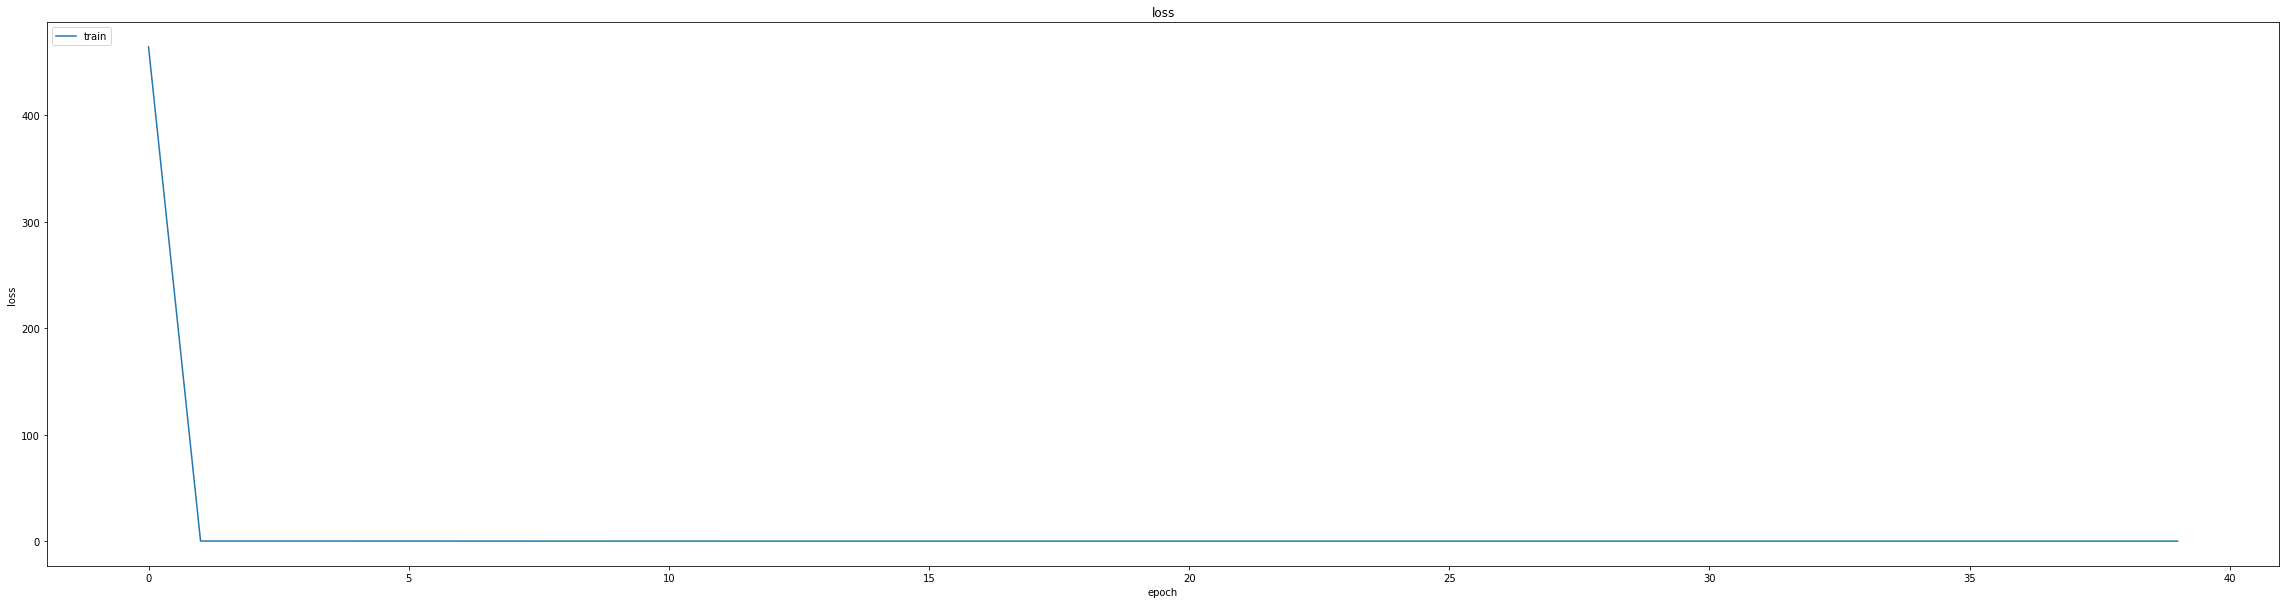

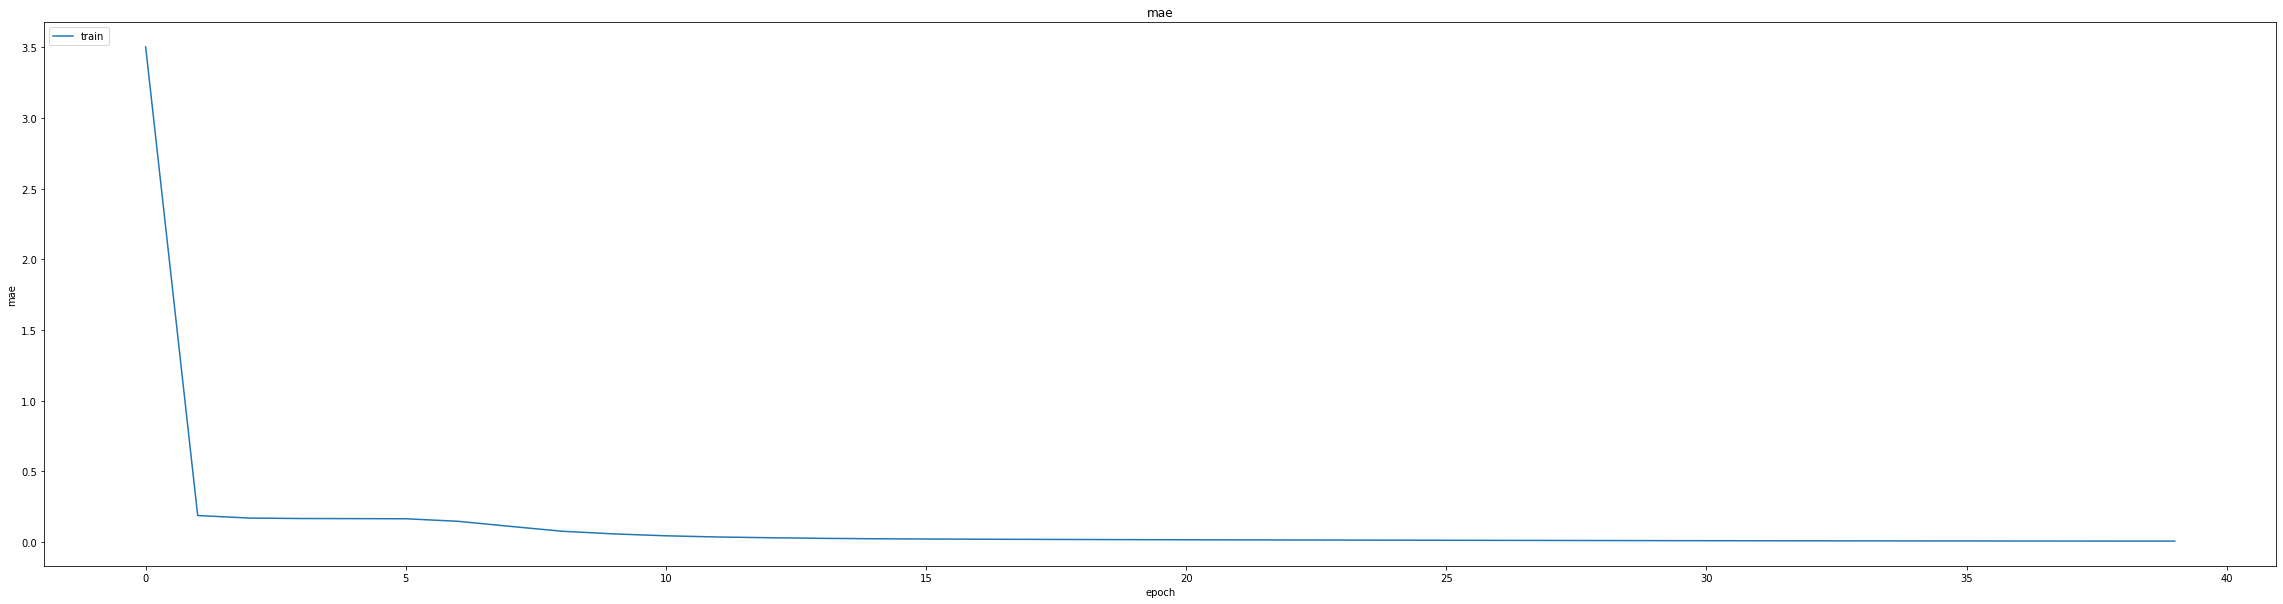

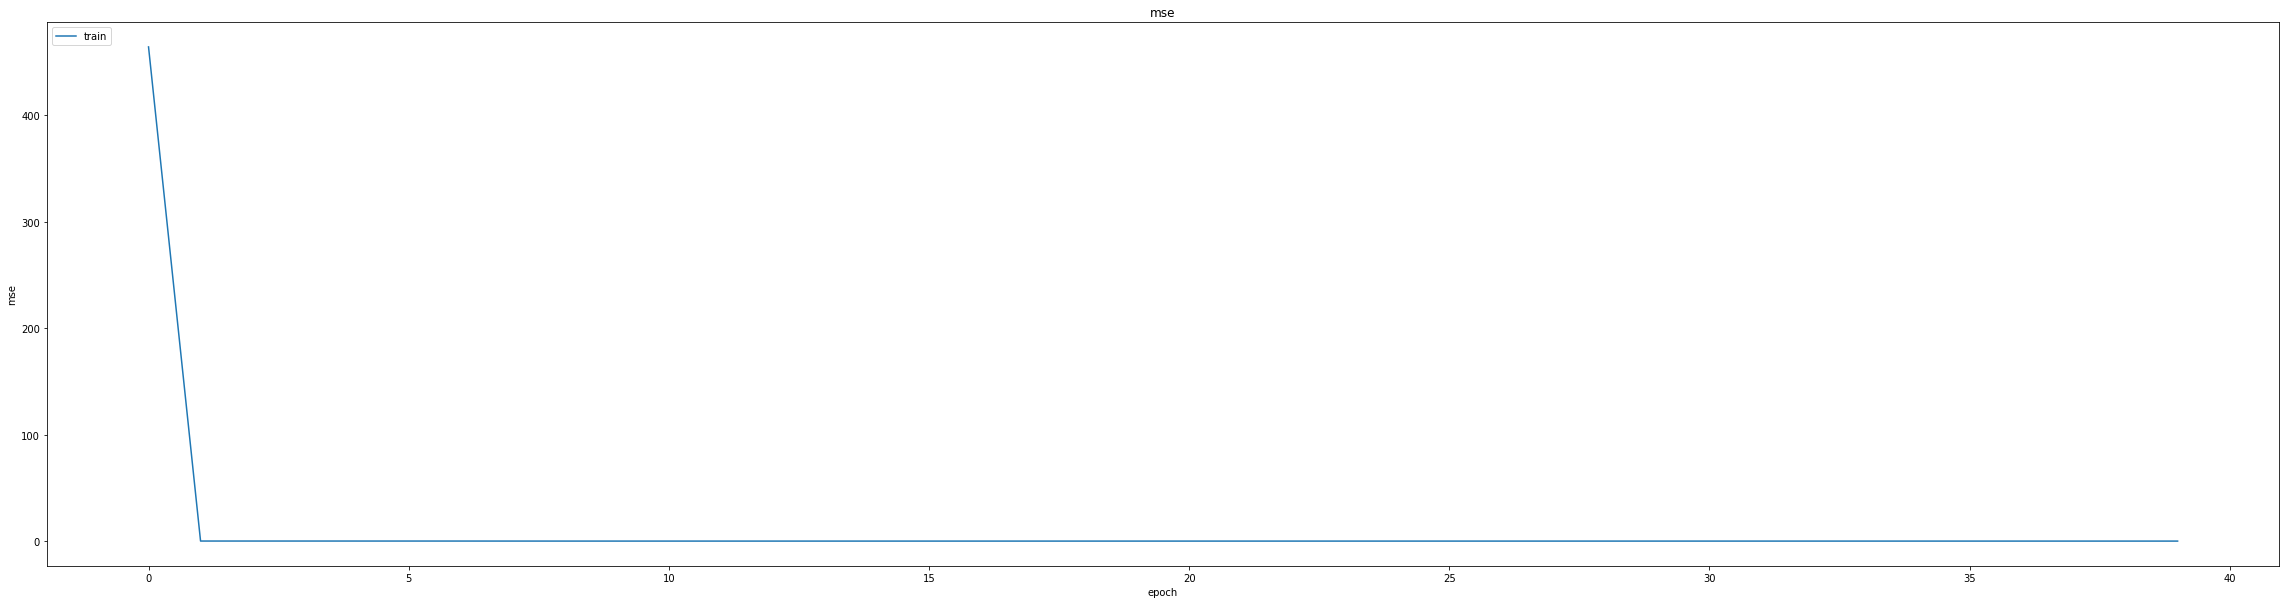

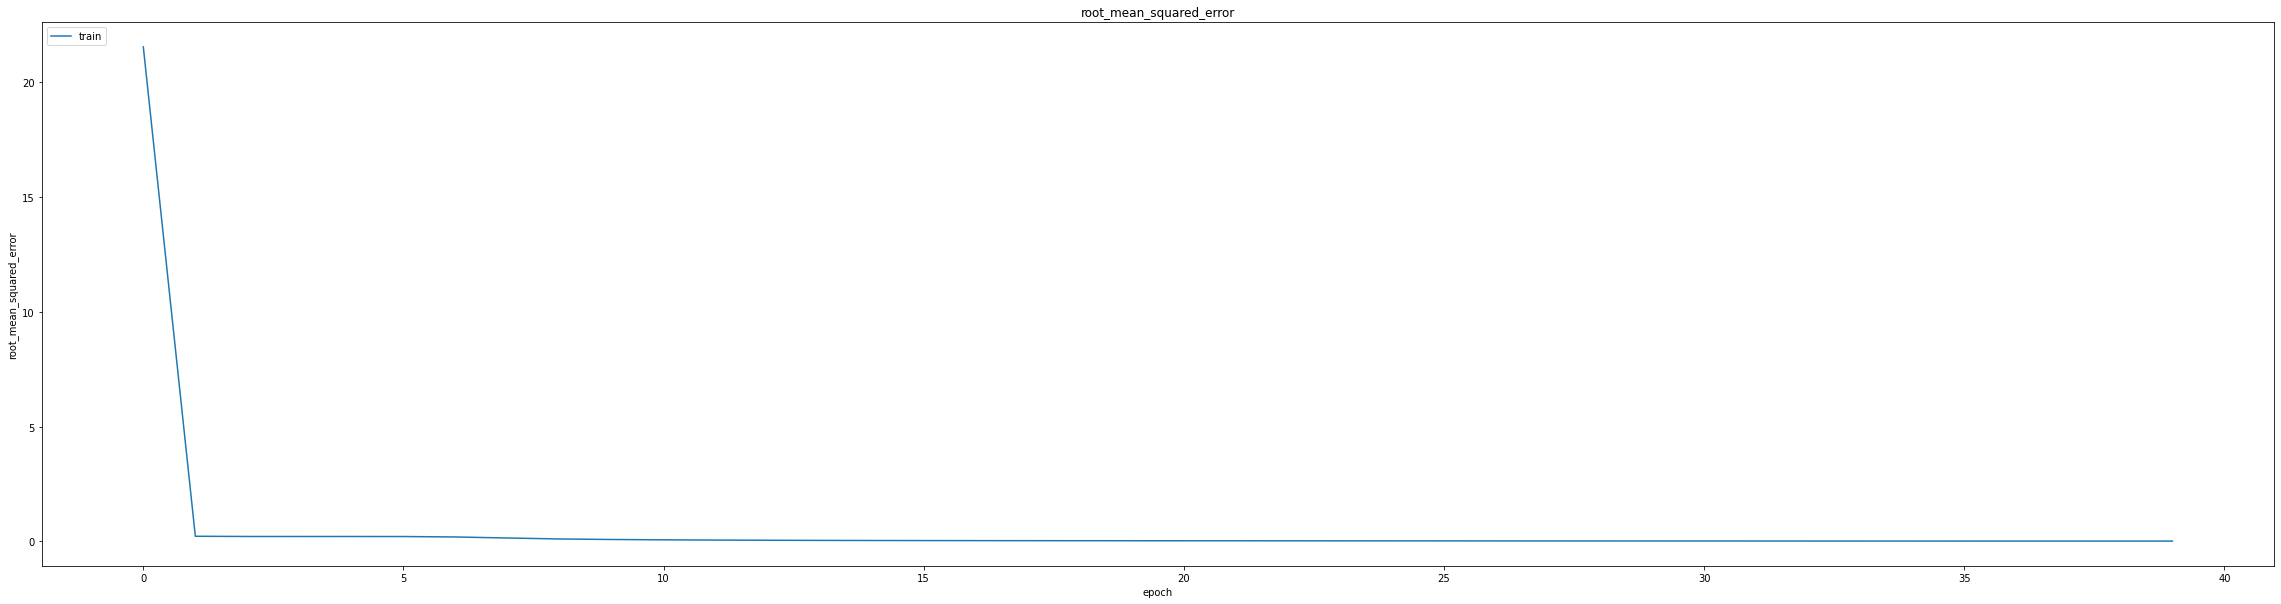

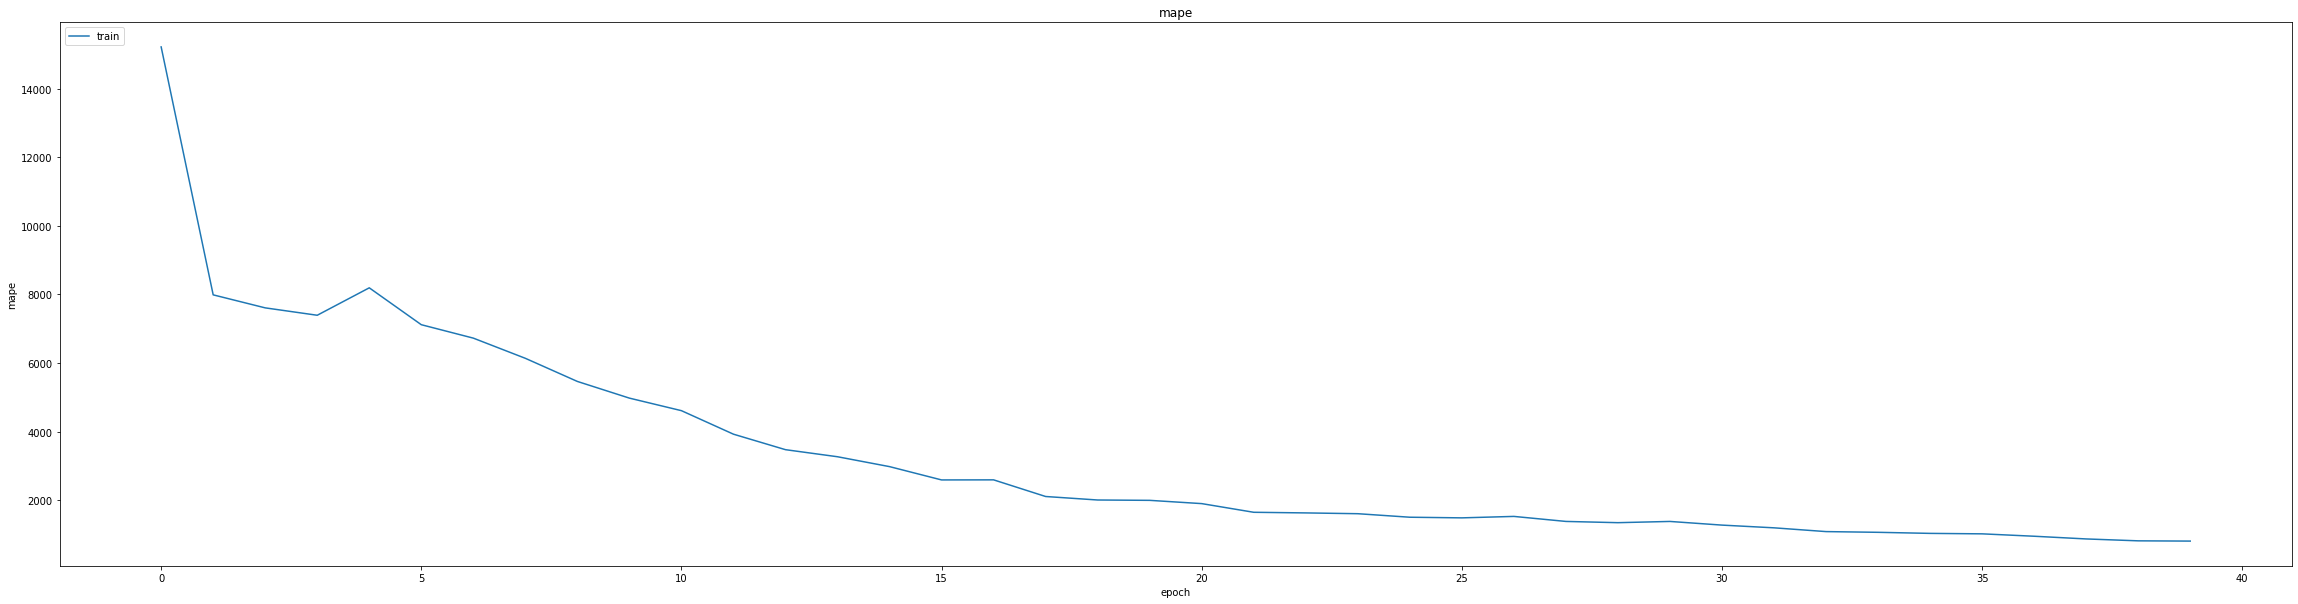

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01209613960236311
0.015299336053431034
1043/1043 [==============================] - 11s 9ms/step
0.992906087212864


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


405/405 [==============================] - ETA: 0s - loss: 7.9691e-04 - mae: 0.0153 - mse: 7.9691e-04 - root_mean_squared_error: 0.0282 - mape: 131.0013
Epoch 1: val_mse did not improve from 0.00023
405/405 [==============================] - 23s 27ms/step - loss: 7.9691e-04 - mae: 0.0153 - mse: 7.9691e-04 - root_mean_squared_error: 0.0282 - mape: 131.0013 - val_loss: 2.6634e-04 - val_mae: 0.0127 - val_mse: 2.6634e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 721.2327 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 1.2069e-04 - mae: 0.0082 - mse: 1.2069e-04 - root_mean_squared_error: 0.0110 - mape: 126.8396
Epoch 2: val_mse did not improve from 0.00023
405/405 [==============================] - 9s 22ms/step - loss: 1.2067e-04 - mae: 0.0082 - mse: 1.2067e-04 - root_mean_squared_error: 0.0110 - mape: 126.6105 - val_loss: 5.1814e-04 - val_mae: 0.0197 - val_mse: 5.1814e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 709.2031 - lr: 0.0010
lr c

405/405 [==============================] - 42s 105ms/step - loss: 8.2877e-05 - mae: 0.0069 - mse: 8.2877e-05 - root_mean_squared_error: 0.0091 - mape: 87.2534 - val_loss: 1.4165e-04 - val_mae: 0.0090 - val_mse: 1.4165e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 1017.9056 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
404/405 [============================>.] - ETA: 0s - loss: 5.7129e-05 - mae: 0.0057 - mse: 5.7129e-05 - root_mean_squared_error: 0.0076 - mape: 92.4208
Epoch 5: val_mse did not improve from 0.00014
405/405 [==============================] - 10s 23ms/step - loss: 5.7082e-05 - mae: 0.0057 - mse: 5.7082e-05 - root_mean_squared_error: 0.0076 - mape: 92.2532 - val_loss: 2.3558e-04 - val_mae: 0.0126 - val_mse: 2.3558e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 984.2701 - lr: 8.1000e-04
Epoch 6/20
405/405 [==============================] - ETA: 0s - loss: 5.9158e-05 - mae: 0.0058 - mse: 5.9158e-05 - root_mean_squared_error: 0.0077 - mape: 78.2

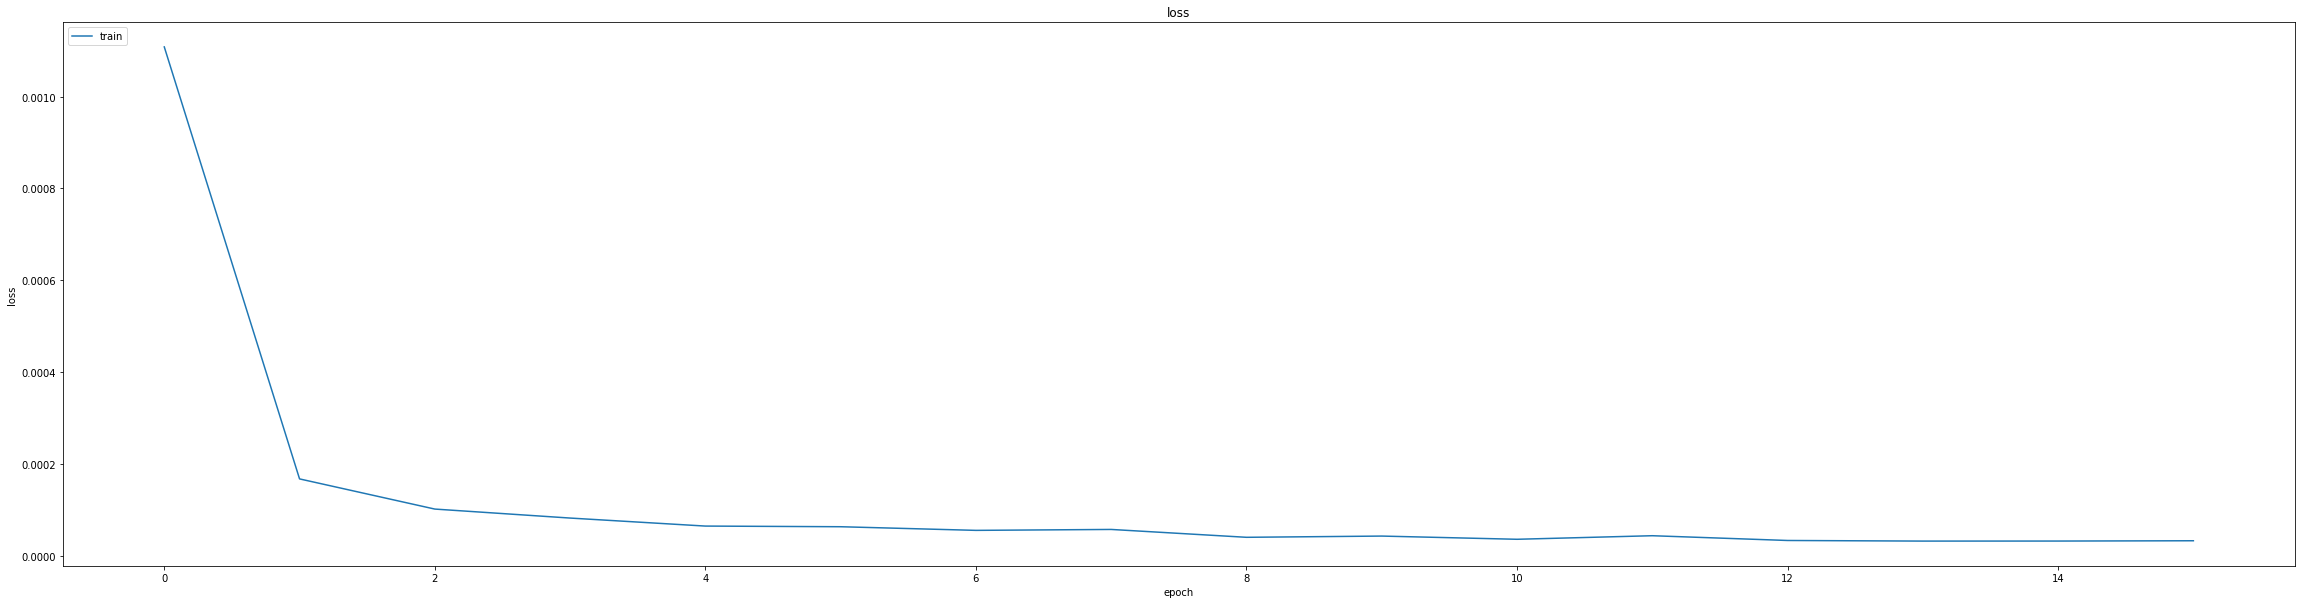

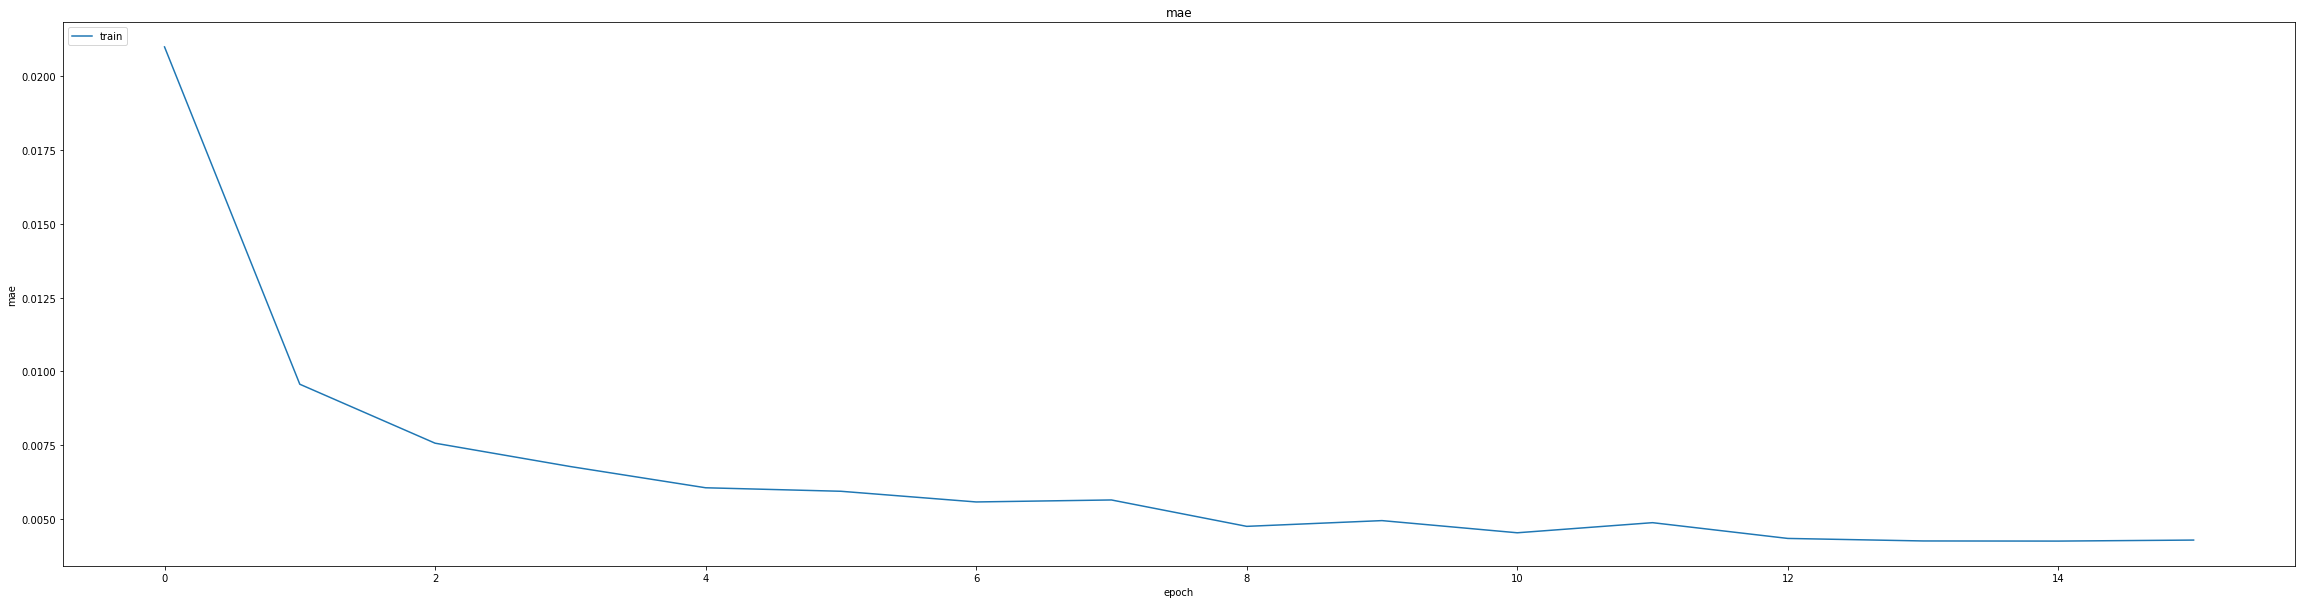

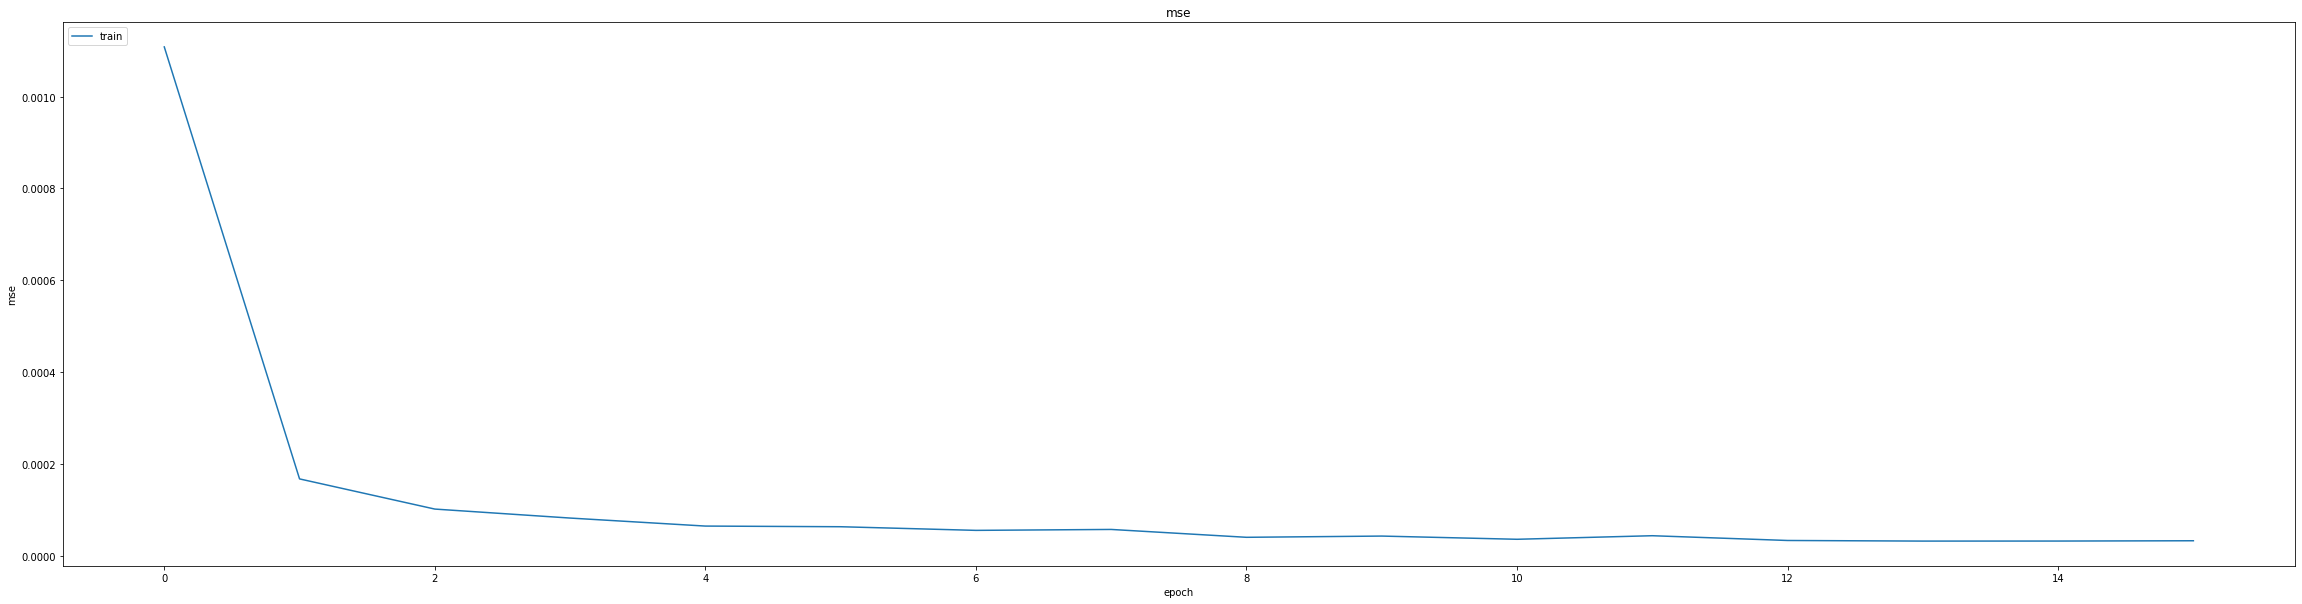

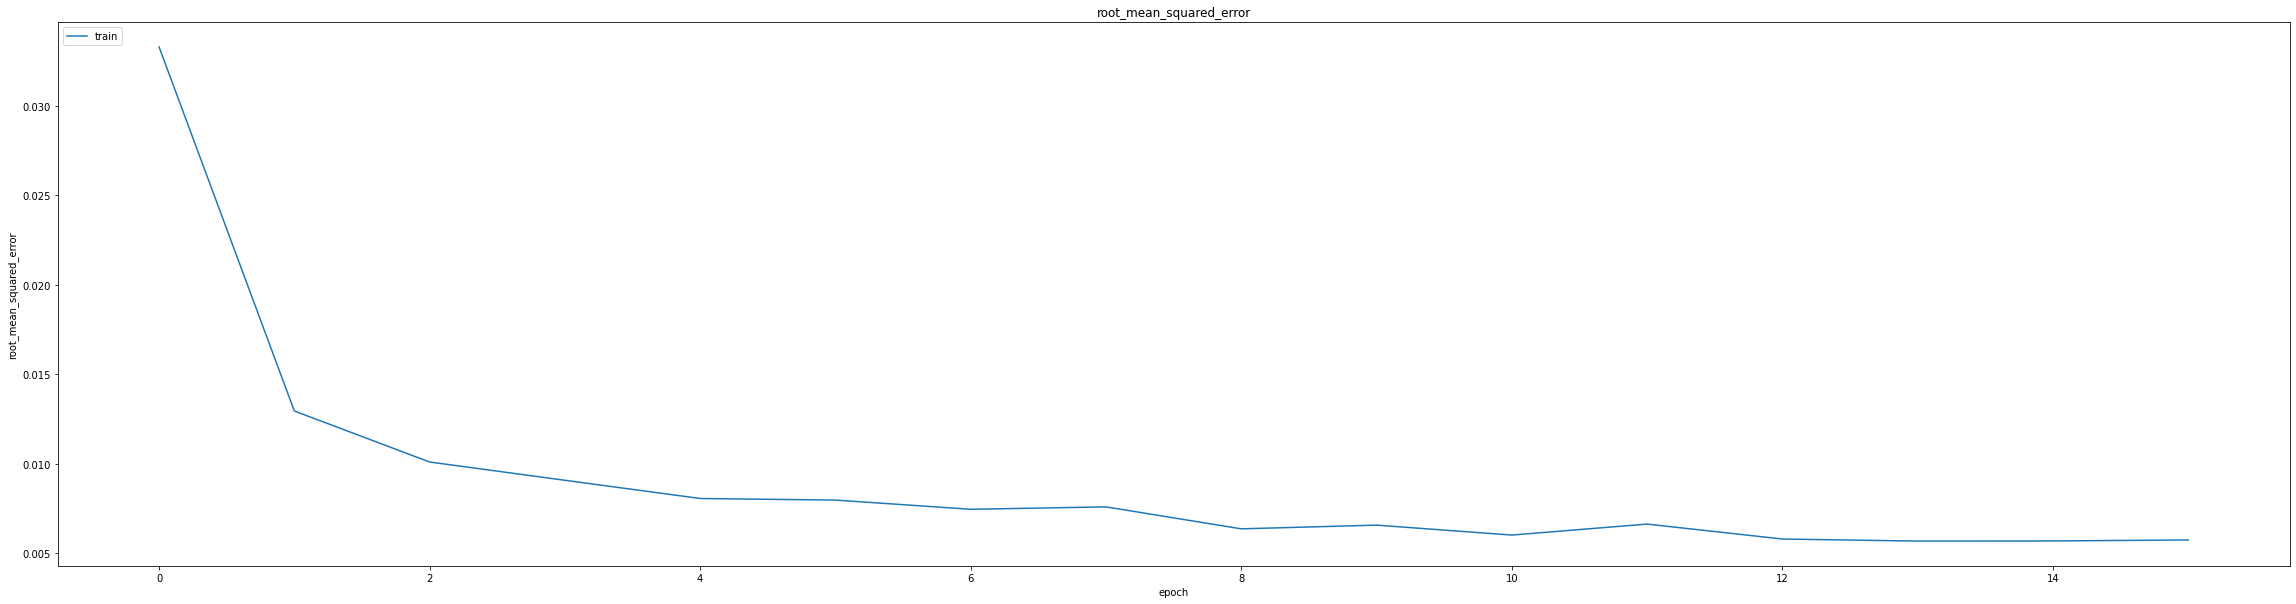

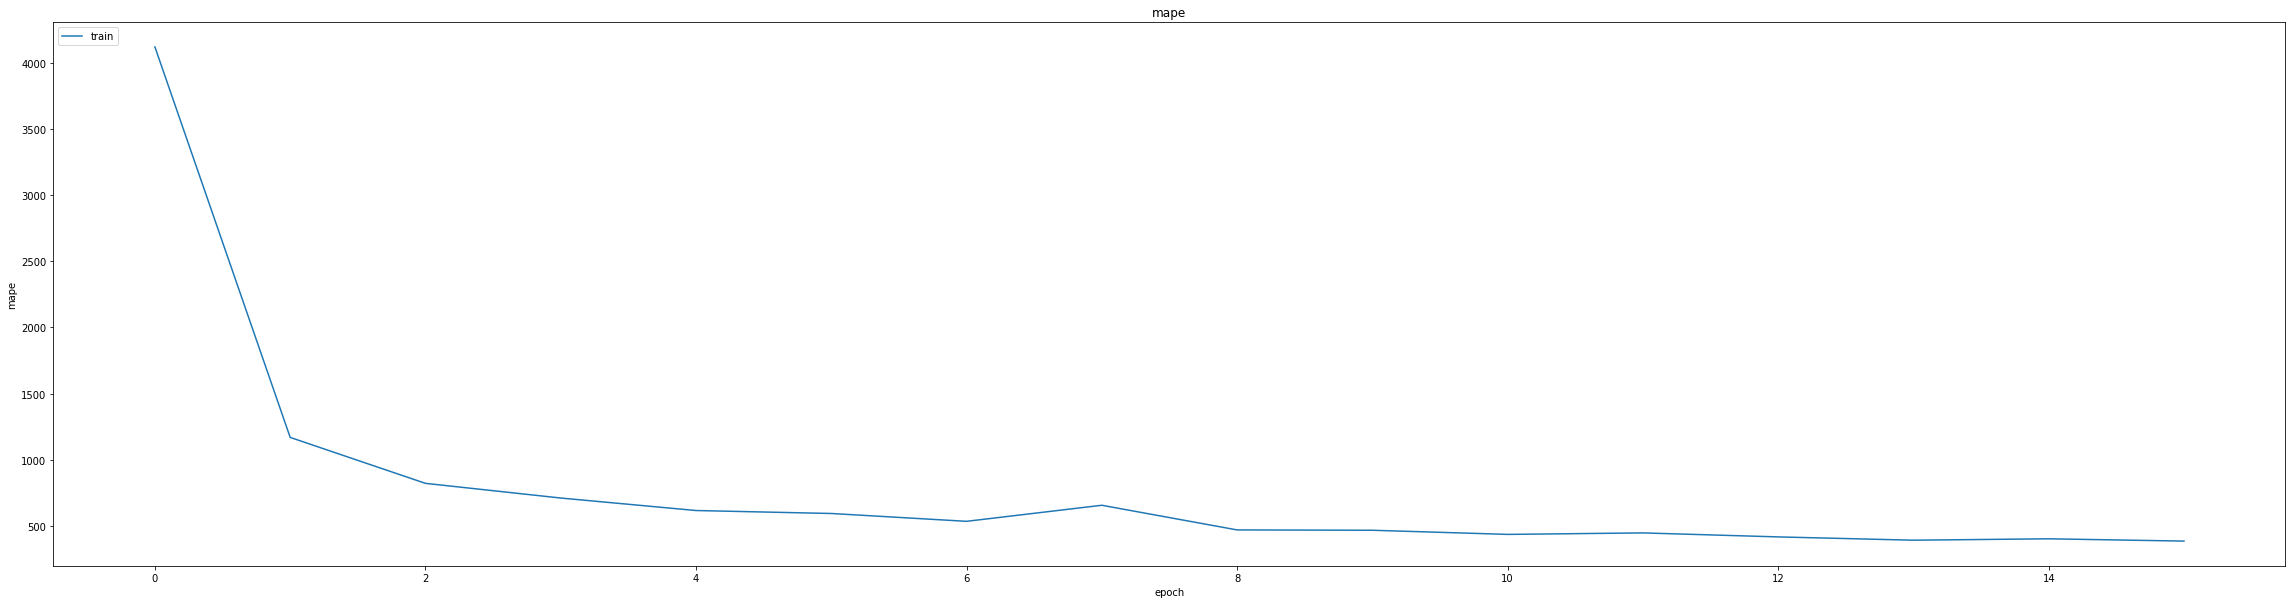

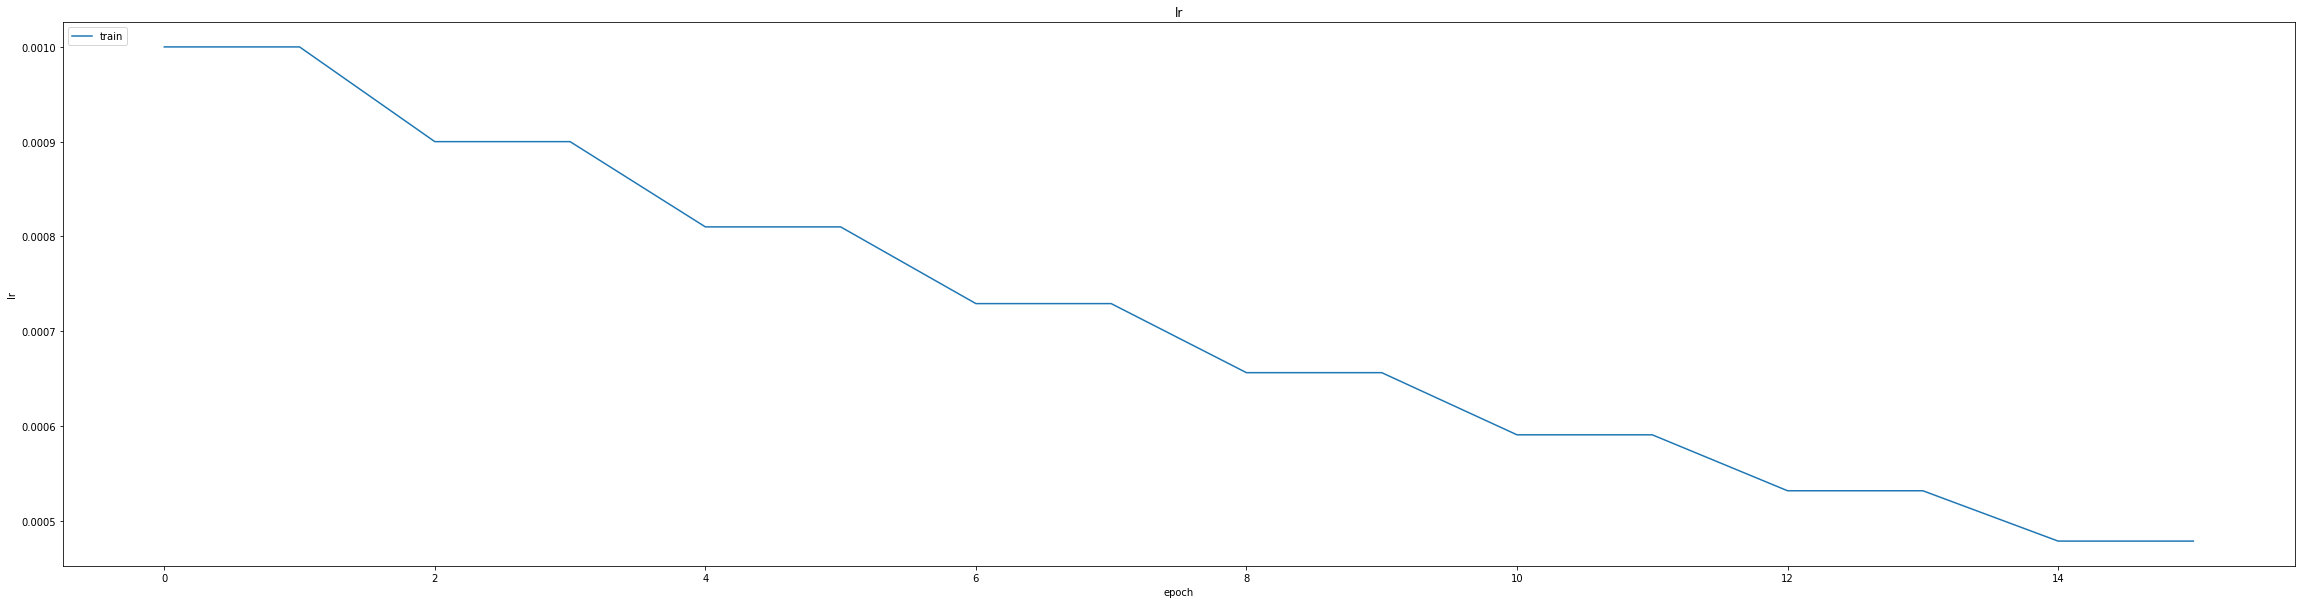

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008953051641583443
0.011901876889169216
1043/1043 [==============================] - 8s 6ms/step
0.9868719839384582


1043/1043 [==============================] - 7s 6ms/step


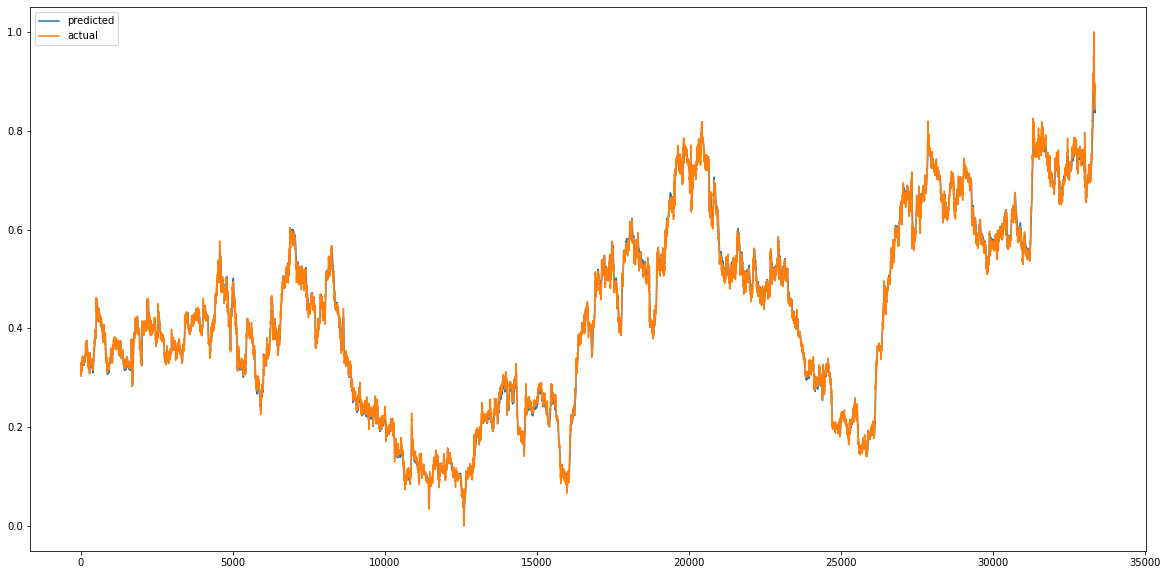

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


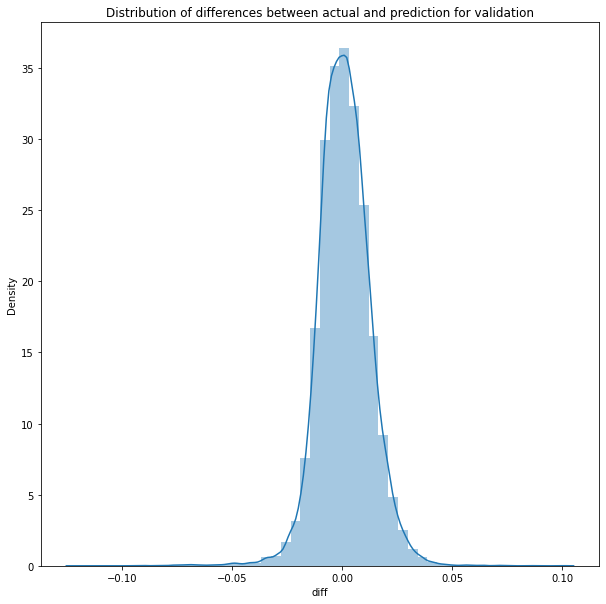

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 7s 7ms/step


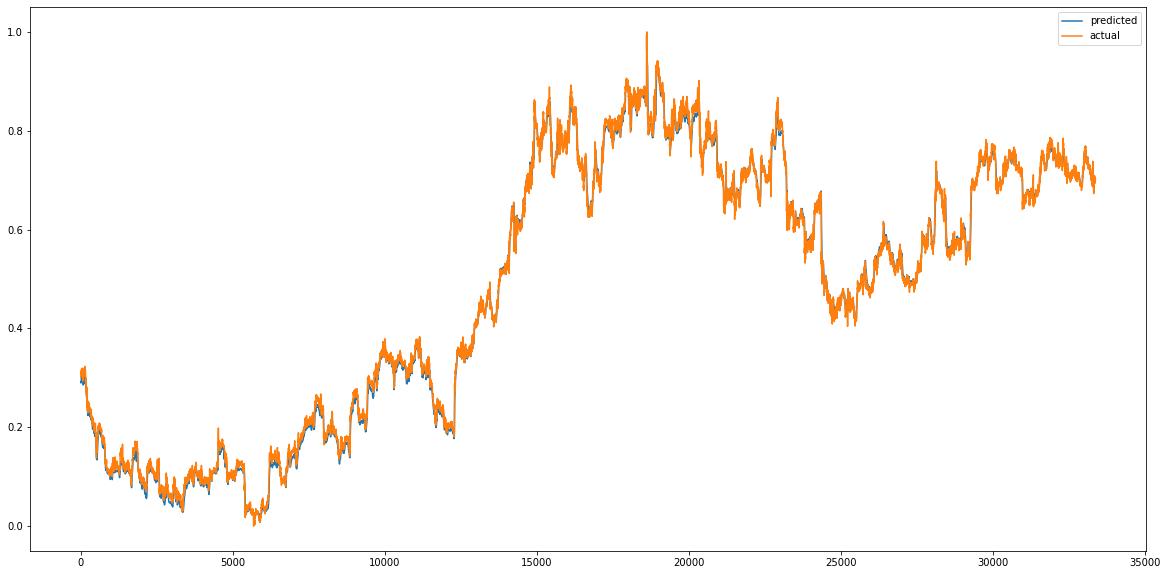

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


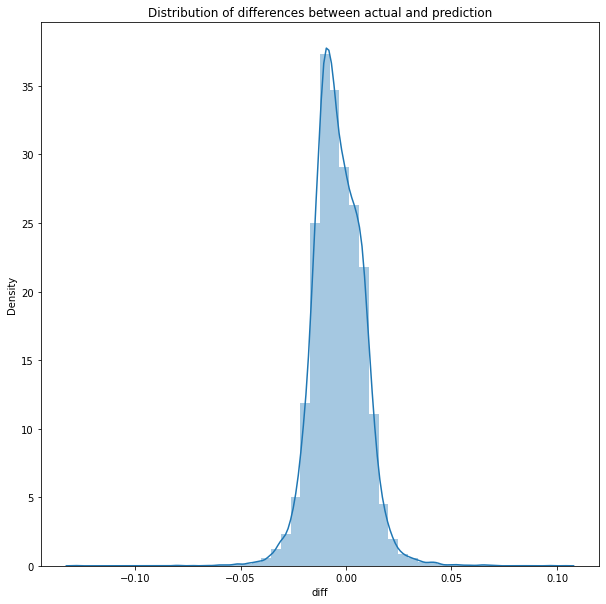

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00015477860061700906
RMSE :  0.012441004807370225
MAE :  0.00975991462977731
1043/1043 [==============================] - 7s 7ms/step
R2_Score  : 0.9978234213205076


count    33373.000000
mean        -0.003835
std          0.011835
min         -0.128147
25%         -0.011371
50%         -0.004655
75%          0.003971
max          0.103460
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_11 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_5 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_12 (LSTM)              (None, 16)                5184      
                                                                 
 dense_15 (Dense)            (None, 32)                544       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
402/405 [============================>.] - ETA: 0s - loss: 1264.6282 - mae: 15.9746 - mse: 1264.6282 - root_mean_squared_error: 35.5616 - mape: 159573.6250
Epoch 1: val_mse improved from inf to 8.42375, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 23s 47ms/step - loss: 1256.0957 - mae: 15.8865 - mse: 1256.0957 - root_mean_squared_error: 35.4414 - mape: 158499.7344 - val_loss: 8.4238 - val_mae: 2.8962 - val_mse: 8.4238 - val_root_mean_squared_error: 2.9024 - val_mape: 100558.1719
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 4.5644 - mae: 2.0824 - mse: 4.5644 - root_mean_squared_error: 2.1364 - mape: 19503.4258
Epoch 2: val_mse improved from 8.42375 to 1.97219, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 4.5644 - mae: 2.0824 - mse: 4.5644 - root_mean_squared_error: 2.1364 - mape: 19503.4258 - val_loss: 1.9722 - val_mae: 1.3915 - val_mse: 1.9722 - val_root_mean_squared_error: 1.4043 - val_mape: 54976.0312
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 1.4464 - mae: 1.1745 - mse: 1.4464 - root_mean_squared_error: 1.2027 - mape: 12308.9189
Epoch 3: val_mse improved from 1.97219 to 0.75703, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 1.4427 - mae: 1.1728 - mse: 1.4427 - root_mean_squared_error: 1.2011 - mape: 12228.9600 - val_loss: 0.7570 - val_mae: 0.8492 - val_mse: 0.7570 - val_root_mean_squared_error: 0.8701 - val_mape: 38547.4258
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 0.6524 - mae: 0.7770 - mse: 0.6524 - root_mean_squared_error: 0.8077 - mape: 7775.9863
Epoch 4: val_mse improved from 0.75703 to 0.35565, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.6511 - mae: 0.7762 - mse: 0.6511 - root_mean_squared_error: 0.8069 - mape: 7726.3335 - val_loss: 0.3556 - val_mae: 0.5655 - val_mse: 0.3556 - val_root_mean_squared_error: 0.5964 - val_mape: 29952.1621
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.3475 - mae: 0.5513 - mse: 0.3475 - root_mean_squared_error: 0.5895 - mape: 6117.8101
Epoch 5: val_mse improved from 0.35565 to 0.18792, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 43ms/step - loss: 0.3471 - mae: 0.5510 - mse: 0.3471 - root_mean_squared_error: 0.5892 - mape: 6092.6558 - val_loss: 0.1879 - val_mae: 0.3904 - val_mse: 0.1879 - val_root_mean_squared_error: 0.4335 - val_mape: 24633.6992
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.2058 - mae: 0.4110 - mse: 0.2058 - root_mean_squared_error: 0.4536 - mape: 5337.4146
Epoch 6: val_mse improved from 0.18792 to 0.10905, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 19s 46ms/step - loss: 0.2057 - mae: 0.4109 - mse: 0.2057 - root_mean_squared_error: 0.4535 - mape: 5327.9321 - val_loss: 0.1091 - val_mae: 0.2806 - val_mse: 0.1091 - val_root_mean_squared_error: 0.3302 - val_mape: 21016.8691
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.1327 - mae: 0.3250 - mse: 0.1327 - root_mean_squared_error: 0.3642 - mape: 4715.6025
Epoch 7: val_mse improved from 0.10905 to 0.06986, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.1326 - mae: 0.3249 - mse: 0.1326 - root_mean_squared_error: 0.3641 - mape: 4696.1748 - val_loss: 0.0699 - val_mae: 0.2205 - val_mse: 0.0699 - val_root_mean_squared_error: 0.2643 - val_mape: 18409.9277
Epoch 8/60
402/405 [============================>.] - ETA: 0s - loss: 0.0926 - mae: 0.2676 - mse: 0.0926 - root_mean_squared_error: 0.3043 - mape: 3770.2852
Epoch 8: val_mse improved from 0.06986 to 0.05023, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0925 - mae: 0.2675 - mse: 0.0925 - root_mean_squared_error: 0.3041 - mape: 3745.8828 - val_loss: 0.0502 - val_mae: 0.1856 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 16457.4707
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0697 - mae: 0.2292 - mse: 0.0697 - root_mean_squared_error: 0.2640 - mape: 3661.9214
Epoch 9: val_mse improved from 0.05023 to 0.04082, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0697 - mae: 0.2292 - mse: 0.0697 - root_mean_squared_error: 0.2640 - mape: 3661.9214 - val_loss: 0.0408 - val_mae: 0.1680 - val_mse: 0.0408 - val_root_mean_squared_error: 0.2020 - val_mape: 14960.7637
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0567 - mae: 0.2043 - mse: 0.0567 - root_mean_squared_error: 0.2380 - mape: 3299.7681
Epoch 10: val_mse improved from 0.04082 to 0.03691, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0567 - mae: 0.2043 - mse: 0.0567 - root_mean_squared_error: 0.2380 - mape: 3293.9485 - val_loss: 0.0369 - val_mae: 0.1611 - val_mse: 0.0369 - val_root_mean_squared_error: 0.1921 - val_mape: 13800.7520
Epoch 11/60
402/405 [============================>.] - ETA: 0s - loss: 0.0493 - mae: 0.1890 - mse: 0.0493 - root_mean_squared_error: 0.2219 - mape: 3162.2864
Epoch 11: val_mse improved from 0.03691 to 0.03591, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0492 - mae: 0.1890 - mse: 0.0492 - root_mean_squared_error: 0.2219 - mape: 3141.9053 - val_loss: 0.0359 - val_mae: 0.1584 - val_mse: 0.0359 - val_root_mean_squared_error: 0.1895 - val_mape: 12899.4424
Epoch 12/60
402/405 [============================>.] - ETA: 0s - loss: 0.0451 - mae: 0.1801 - mse: 0.0451 - root_mean_squared_error: 0.2125 - mape: 2808.0967
Epoch 12: val_mse did not improve from 0.03591
405/405 [==============================] - 6s 16ms/step - loss: 0.0451 - mae: 0.1801 - mse: 0.0451 - root_mean_squared_error: 0.2125 - mape: 2789.9468 - val_loss: 0.0364 - val_mae: 0.1585 - val_mse: 0.0364 - val_root_mean_squared_error: 0.1907 - val_mape: 12201.8623
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 0.0430 - mae: 0.1749 - mse: 0.0430 - root_mean_squared_error: 0.2073 - mape: 2613.9756
Epoch 13: val_mse did not improve from 0.03591
405/405 [==============================] - 6s 16ms/step

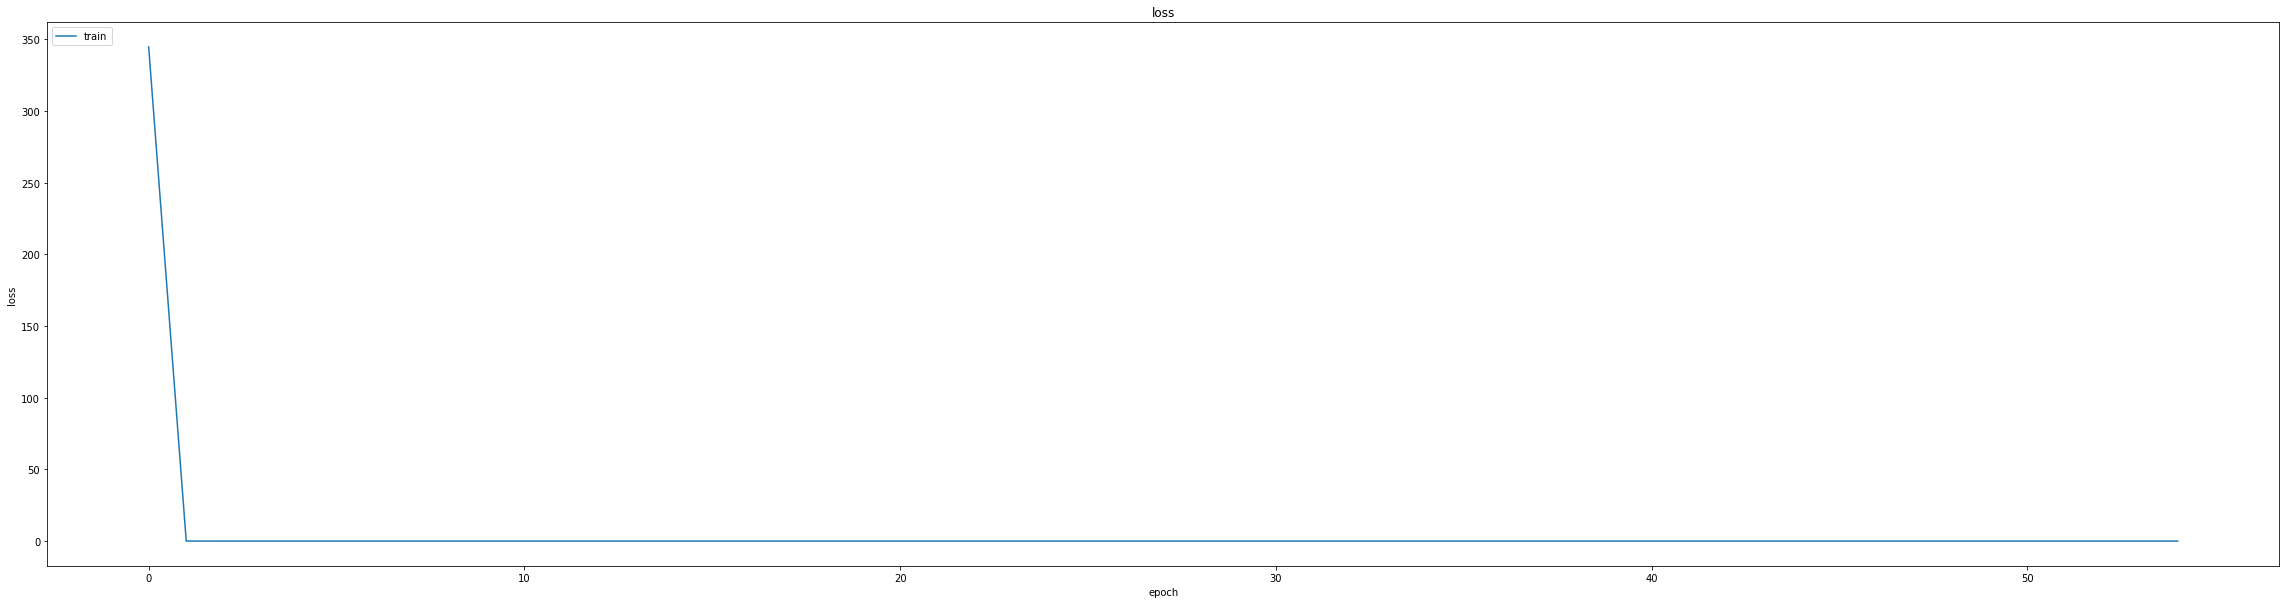

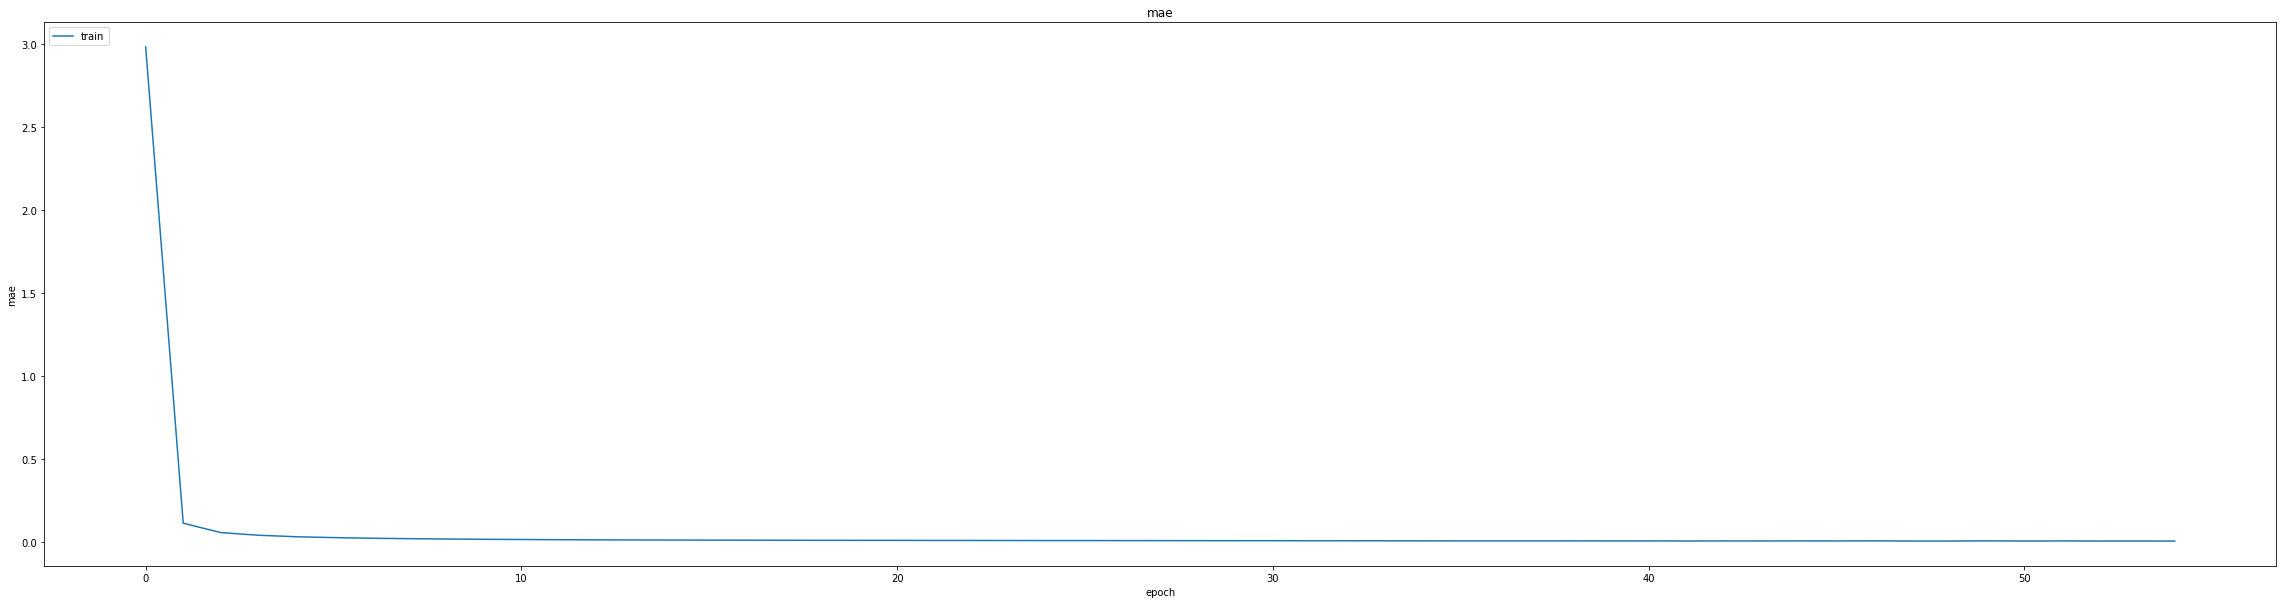

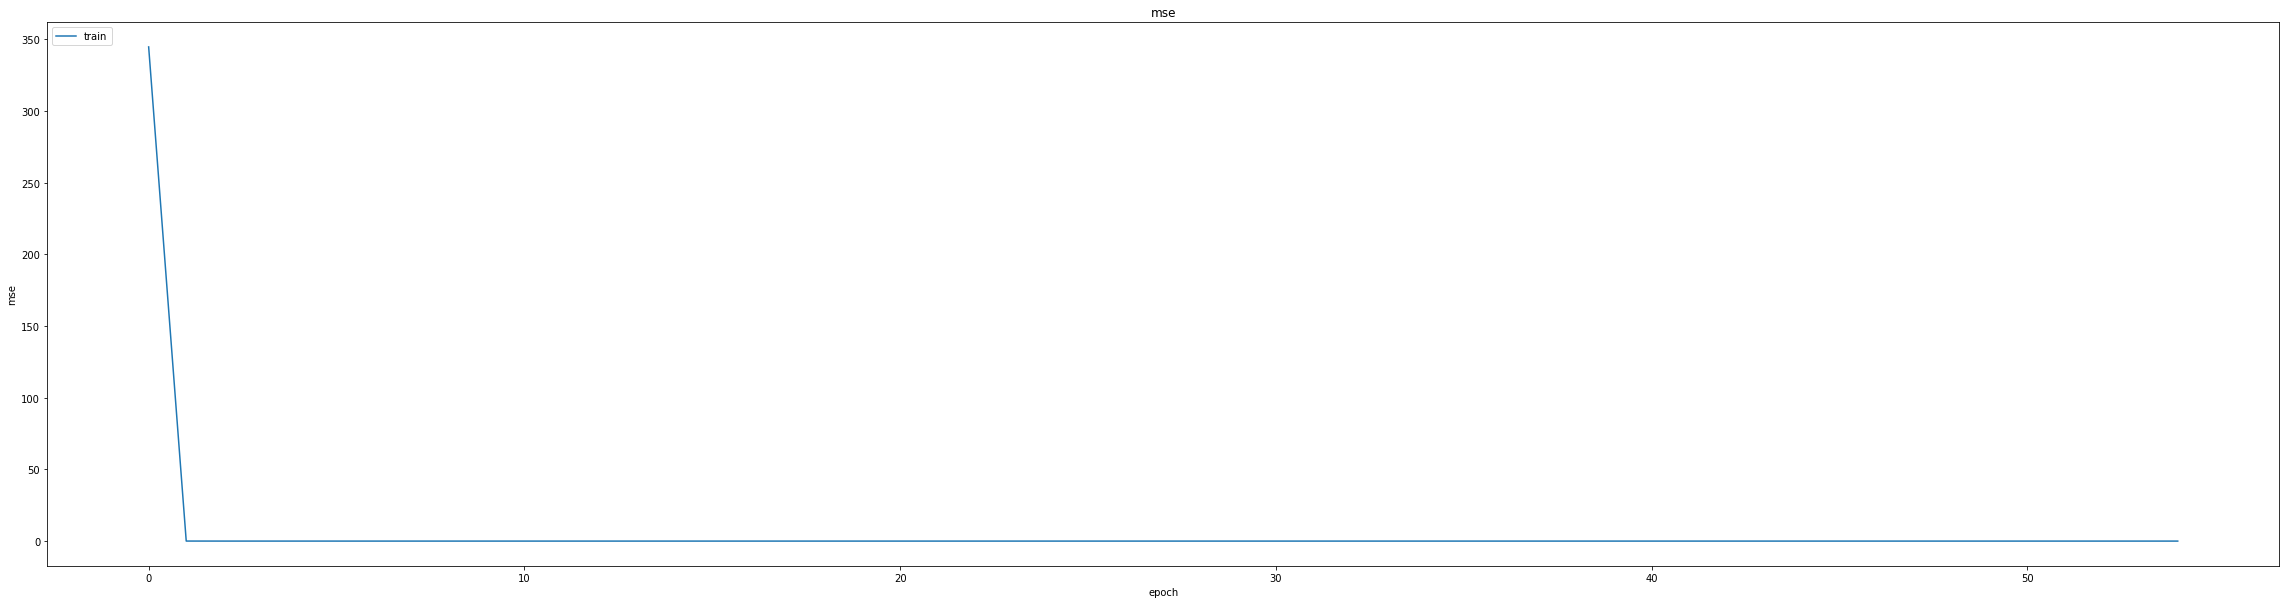

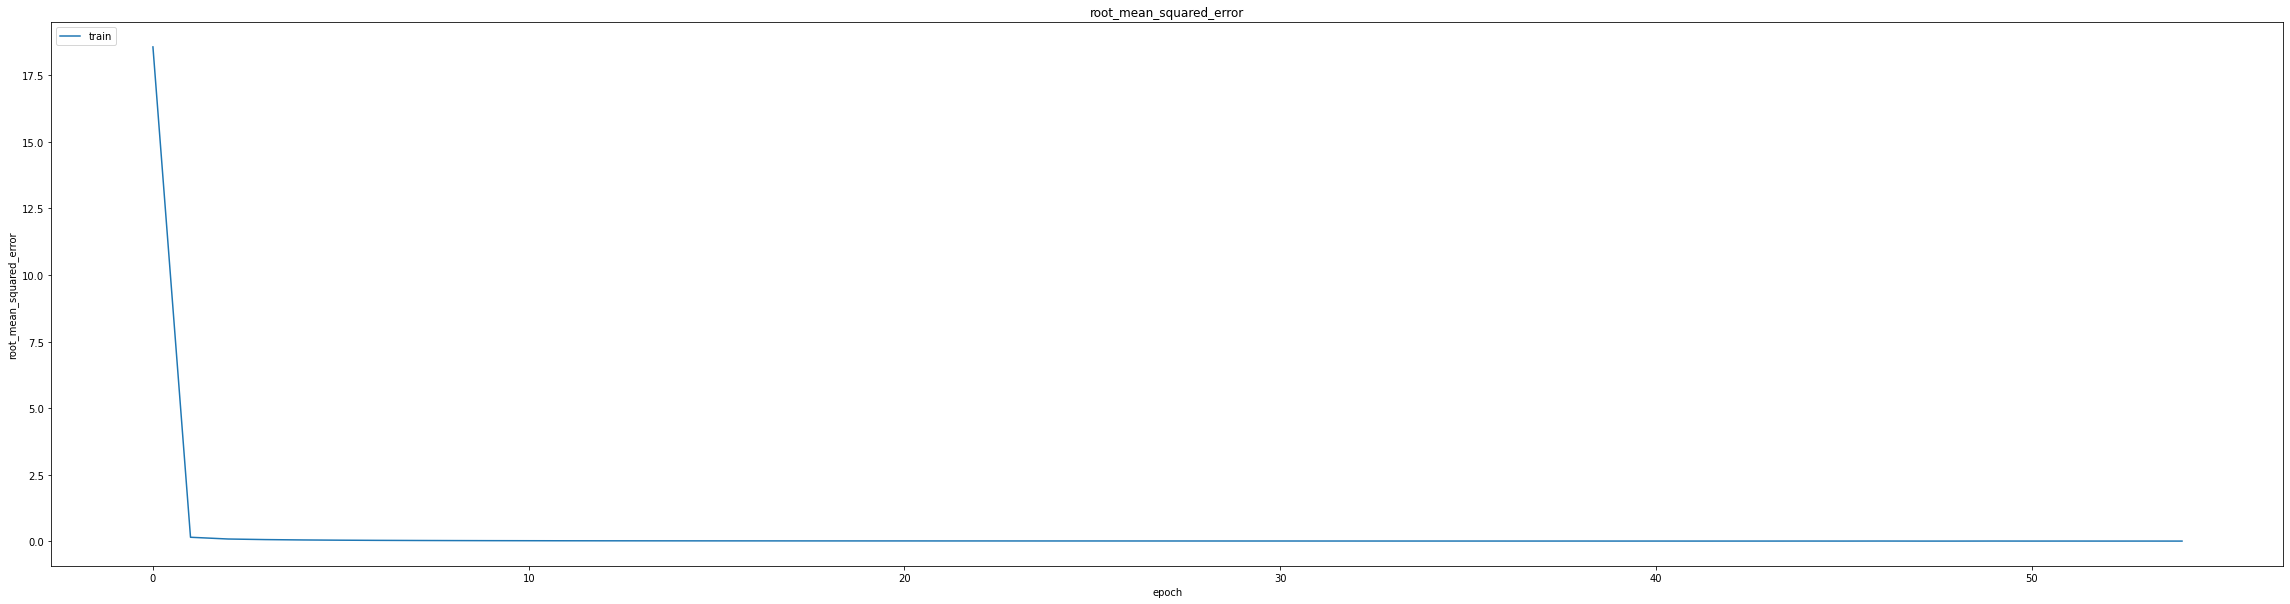

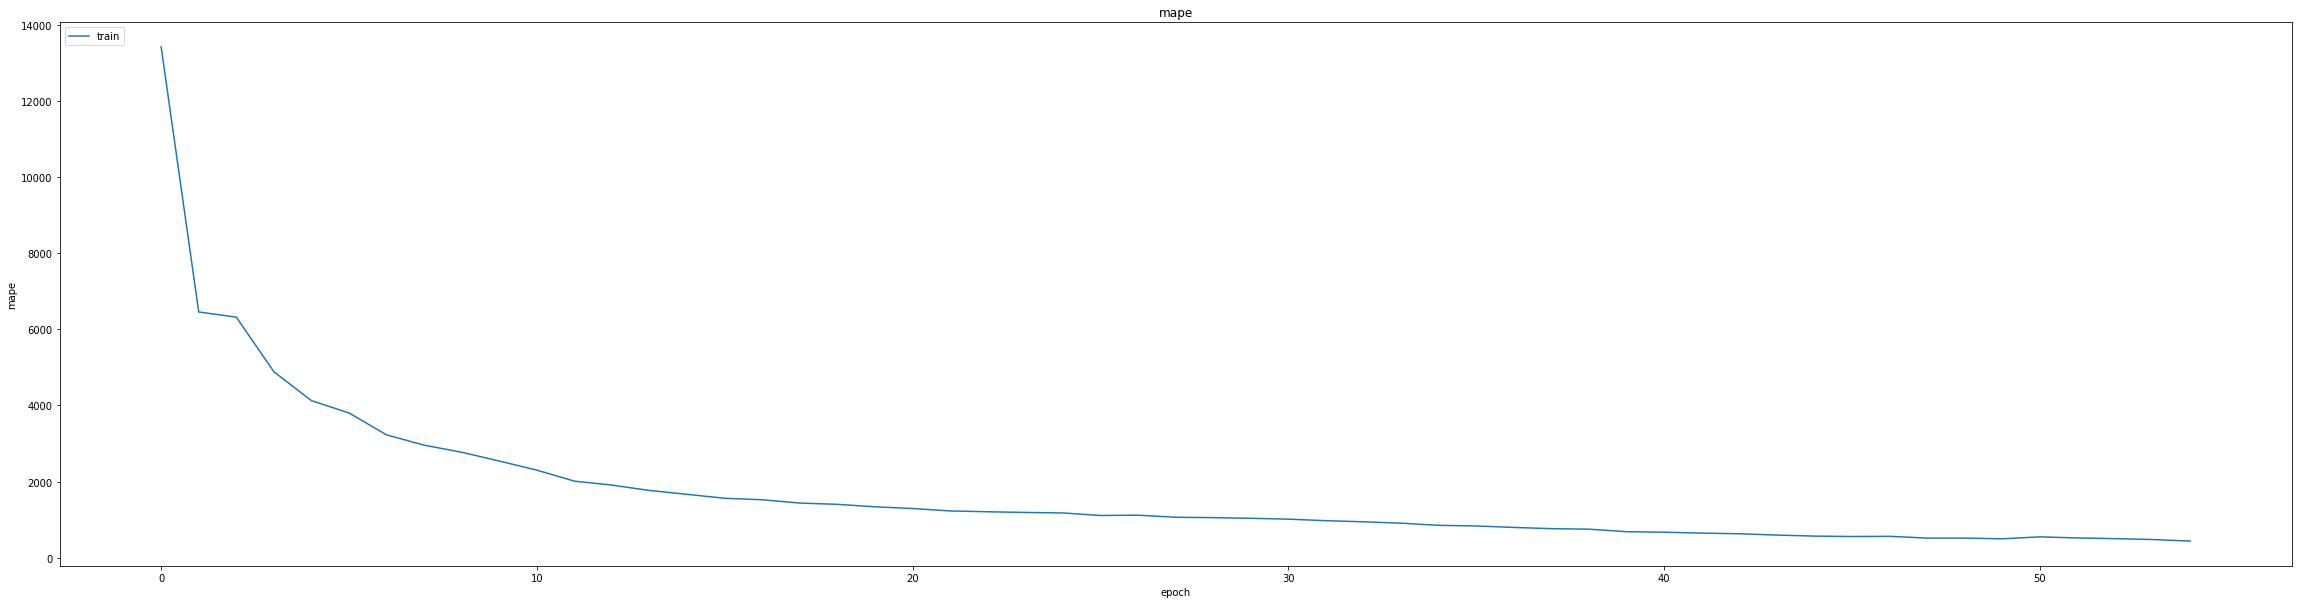

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.15844972431659698
0.18949835002422333
1043/1043 [==============================] - 6s 5ms/step
-0.12225872556649153


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 0.0122 - mae: 0.0661 - mse: 0.0122 - root_mean_squared_error: 0.1105 - mape: 892.1882
Epoch 1: val_mse improved from 0.03591 to 0.00063, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 27s 56ms/step - loss: 0.0122 - mae: 0.0660 - mse: 0.0122 - root_mean_squared_error: 0.1104 - mape: 890.5607 - val_loss: 6.2574e-04 - val_mae: 0.0199 - val_mse: 6.2574e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 2286.1843 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 3.0205e-04 - mae: 0.0126 - mse: 3.0205e-04 - root_mean_squared_error: 0.0174 - mape: 391.2048
Epoch 2: val_mse improved from 0.00063 to 0.00056, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 20s 50ms/step - loss: 3.0186e-04 - mae: 0.0126 - mse: 3.0186e-04 - root_mean_squared_error: 0.0174 - mape: 390.4925 - val_loss: 5.6363e-04 - val_mae: 0.0185 - val_mse: 5.6363e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 1613.7258 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
403/405 [============================>.] - ETA: 0s - loss: 1.5947e-04 - mae: 0.0093 - mse: 1.5947e-04 - root_mean_squared_error: 0.0126 - mape: 315.2691
Epoch 3: val_mse improved from 0.00056 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 1.5937e-04 - mae: 0.0093 - mse: 1.5937e-04 - root_mean_squared_error: 0.0126 - mape: 313.9265 - val_loss: 3.6372e-04 - val_mae: 0.0139 - val_mse: 3.6372e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 1401.8893 - lr: 9.0000e-04
Epoch 4/20
404/405 [============================>.] - ETA: 0s - loss: 1.1359e-04 - mae: 0.0079 - mse: 1.1359e-04 - root_mean_squared_error: 0.0107 - mape: 283.3504
Epoch 4: val_mse did not improve from 0.00036
405/405 [==============================] - 6s 16ms/step - loss: 1.1354e-04 - mae: 0.0079 - mse: 1.1354e-04 - root_mean_squared_error: 0.0107 - mape: 282.8328 - val_loss: 5.5214e-04 - val_mae: 0.0183 - val_mse: 5.5214e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 1120.4558 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
404/405 [============================>.] - ETA: 0s - loss: 9.6804e-05 - mae: 0.0073 - mse: 9.6804e-05 - root_mean_squared_error: 0.0098 - mape: 20

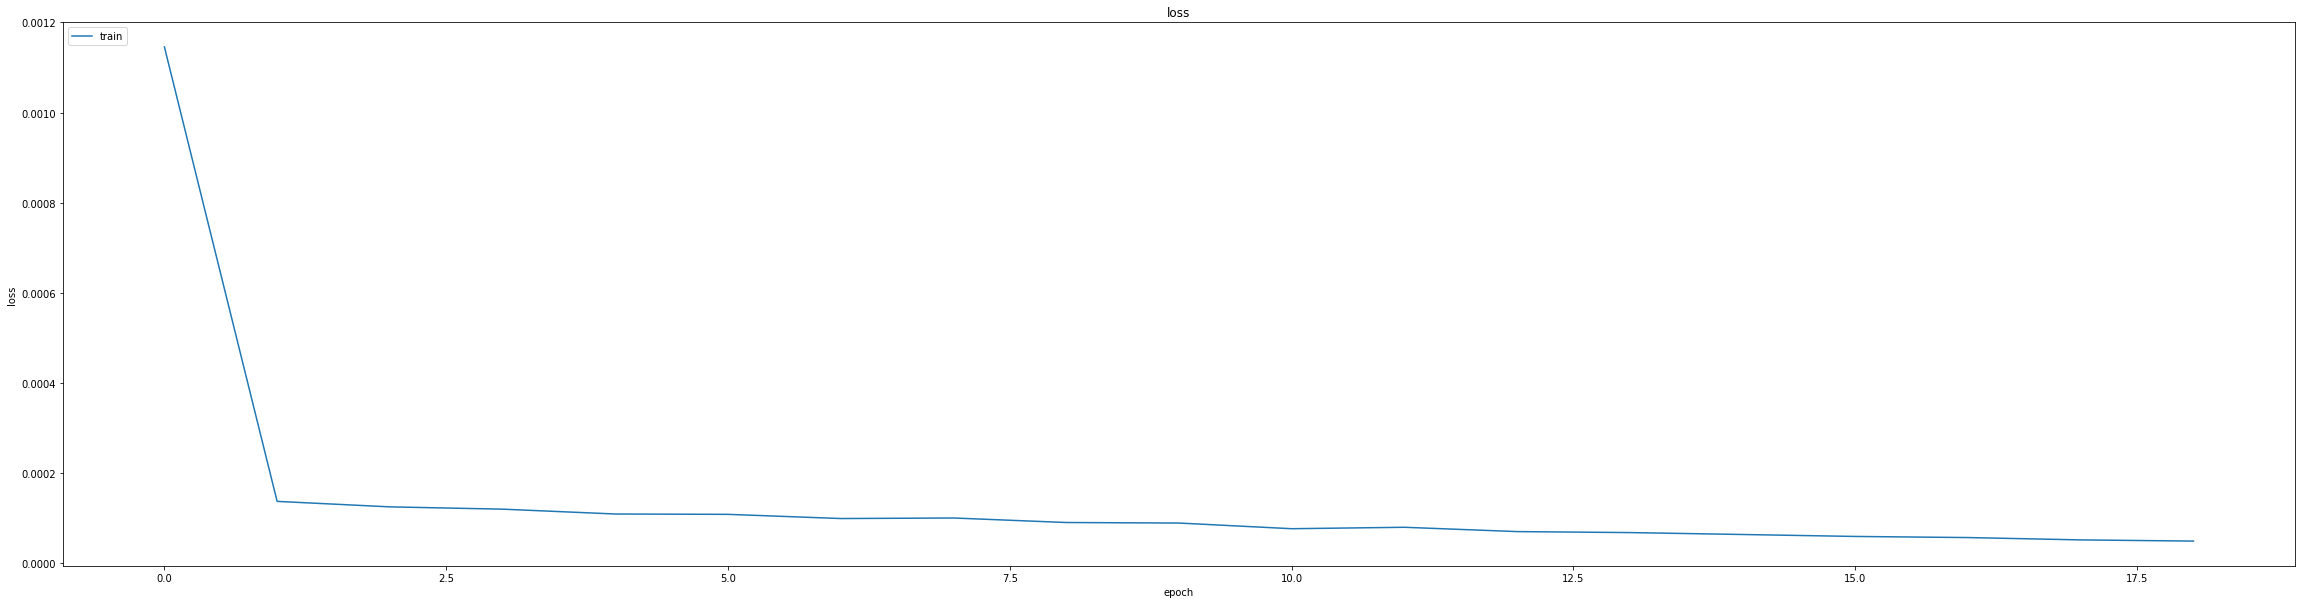

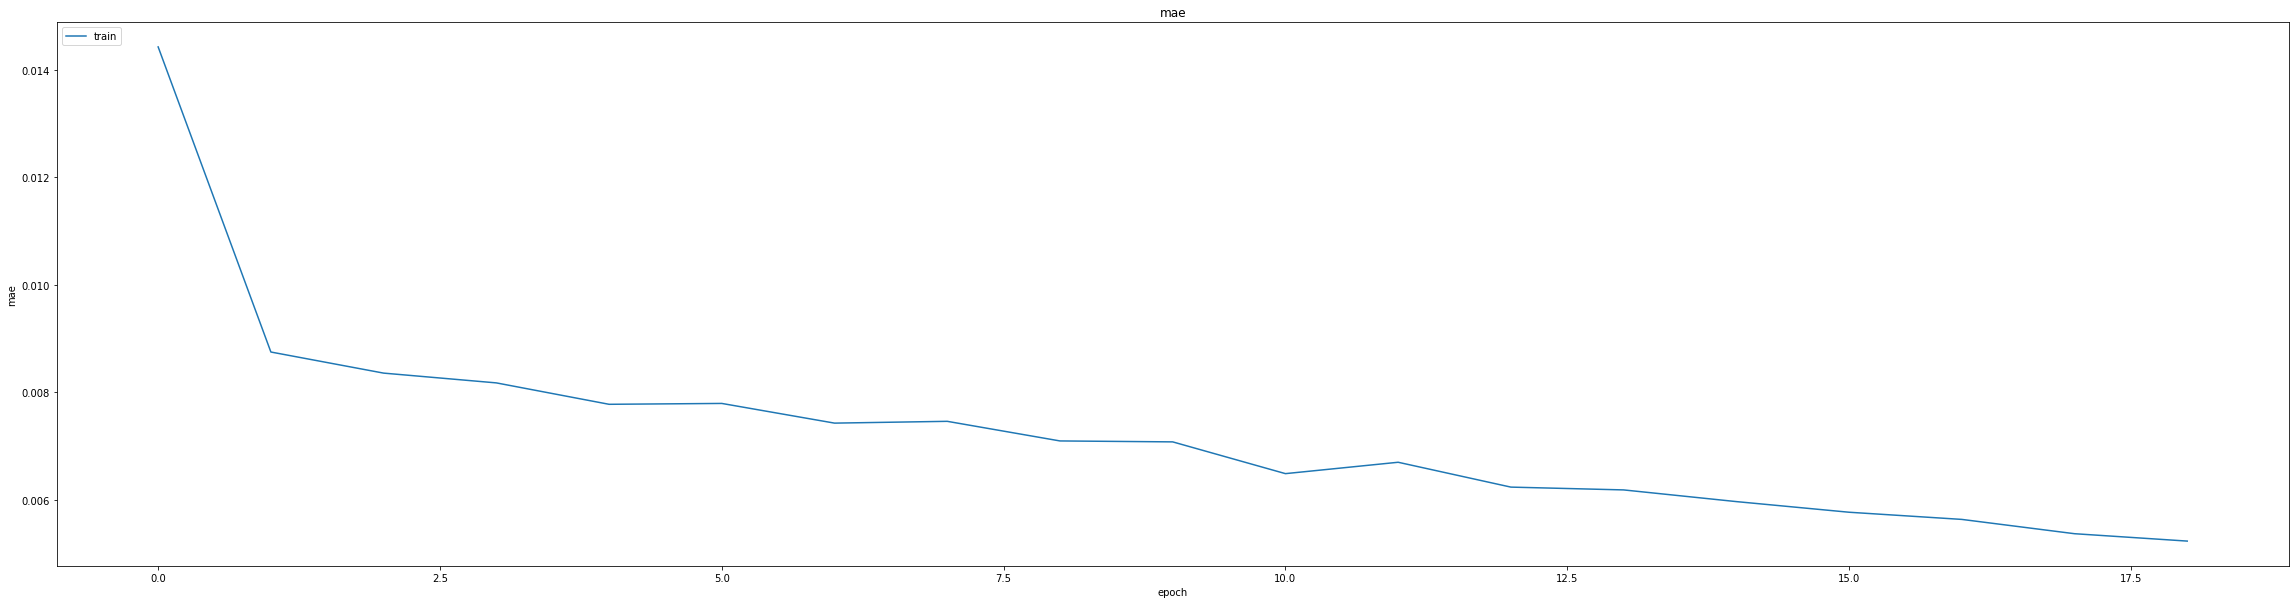

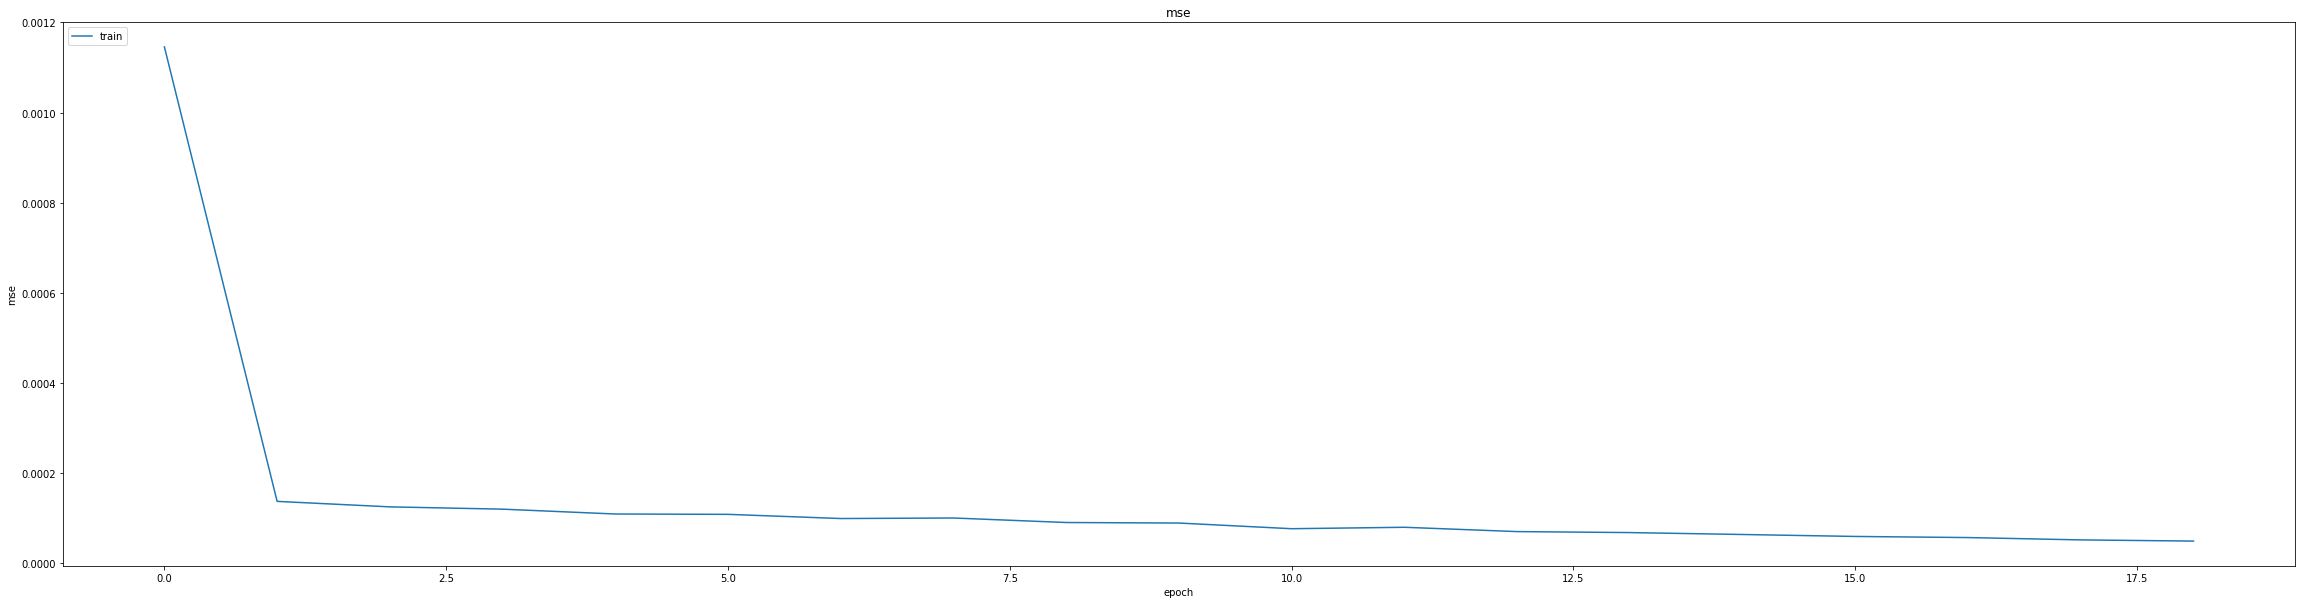

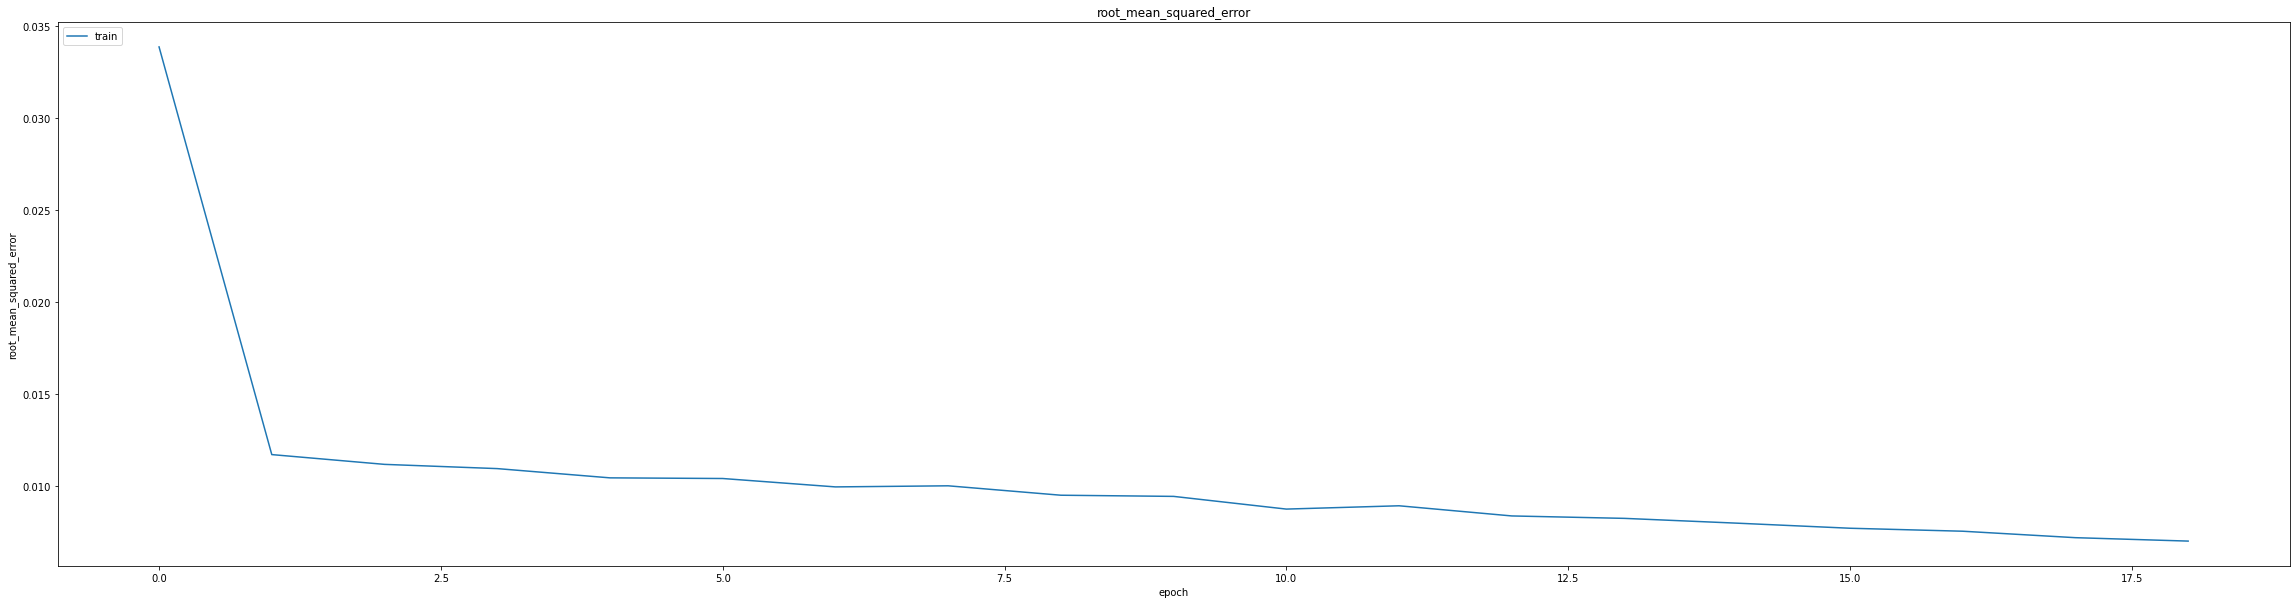

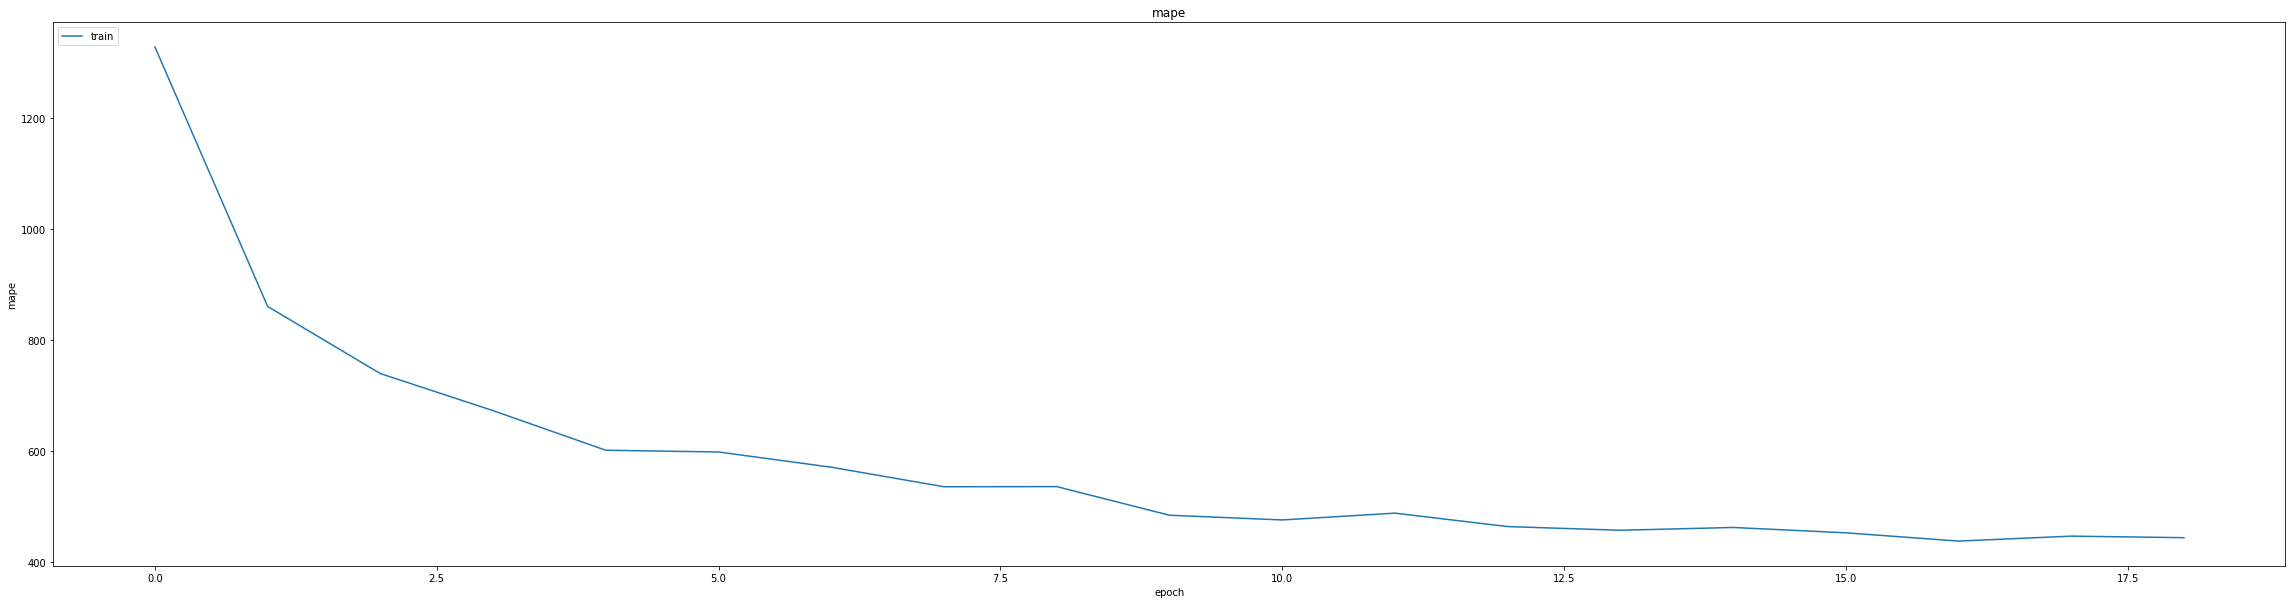

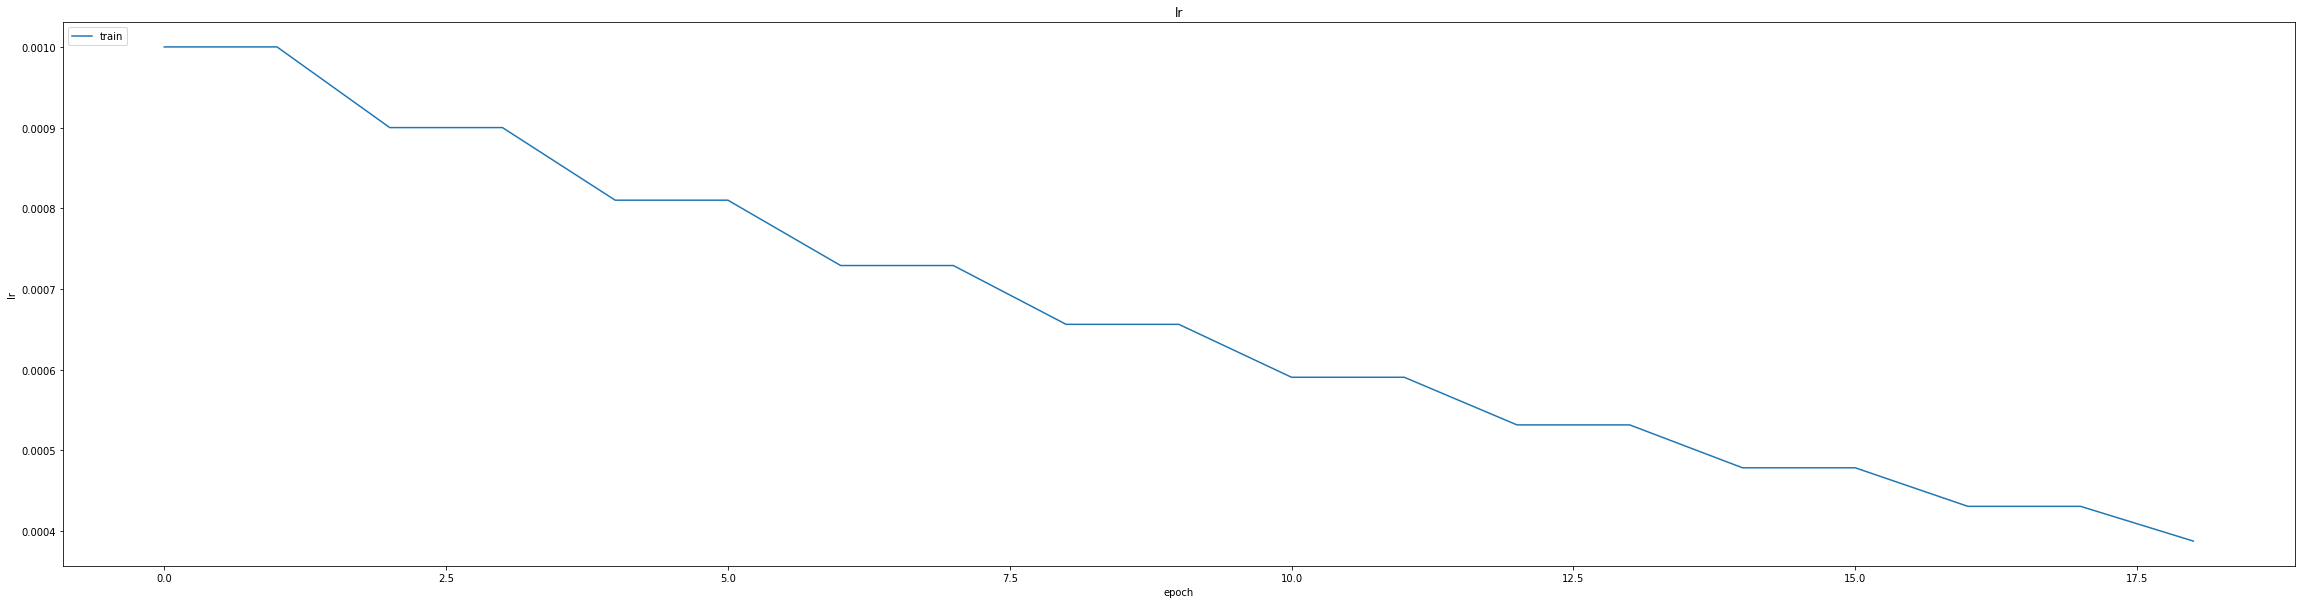

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013901997357606888
0.01907152123749256
1043/1043 [==============================] - 5s 4ms/step
0.9884286023187491


1043/1043 [==============================] - 4s 4ms/step


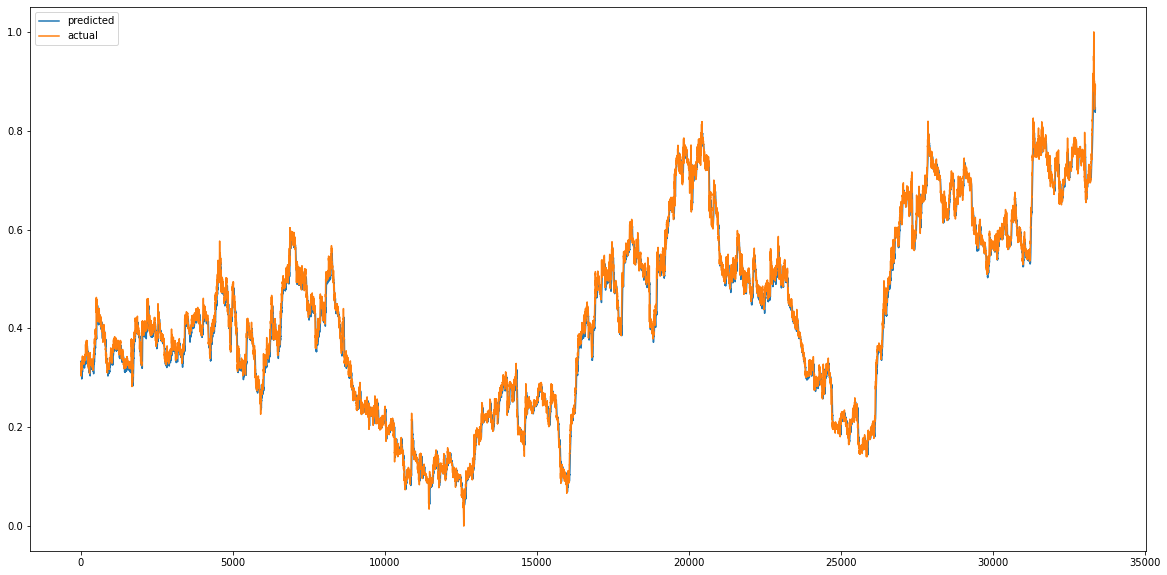

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


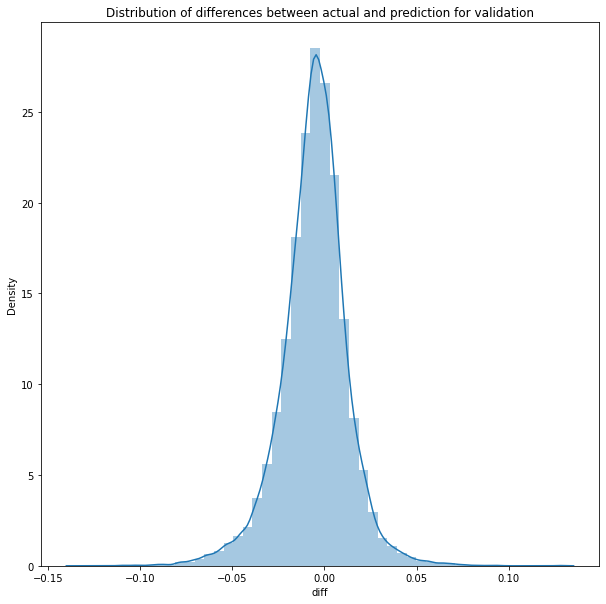

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 4ms/step


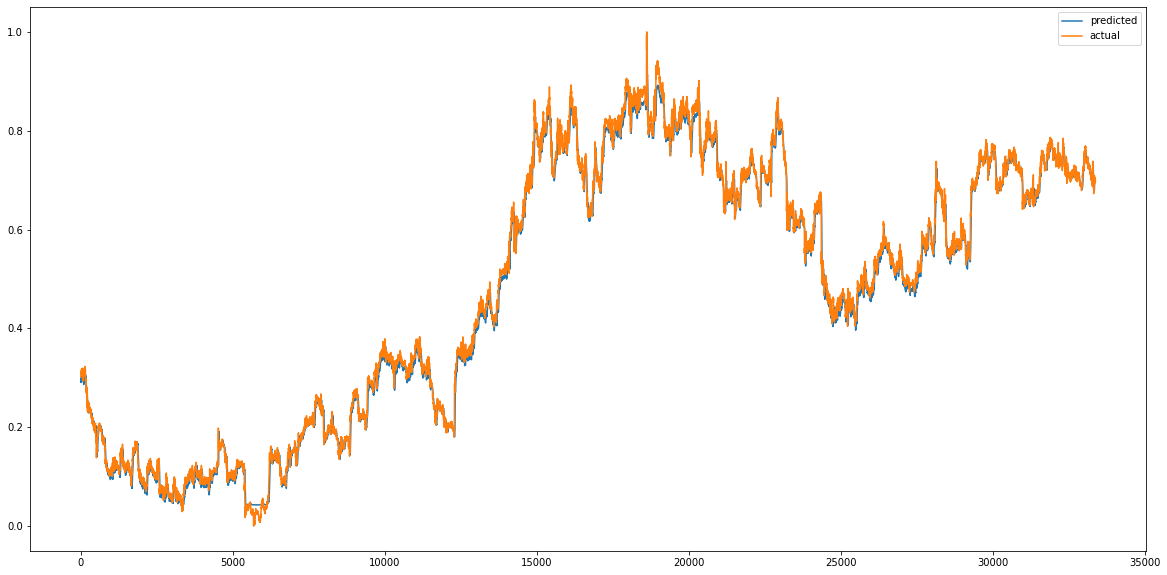

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


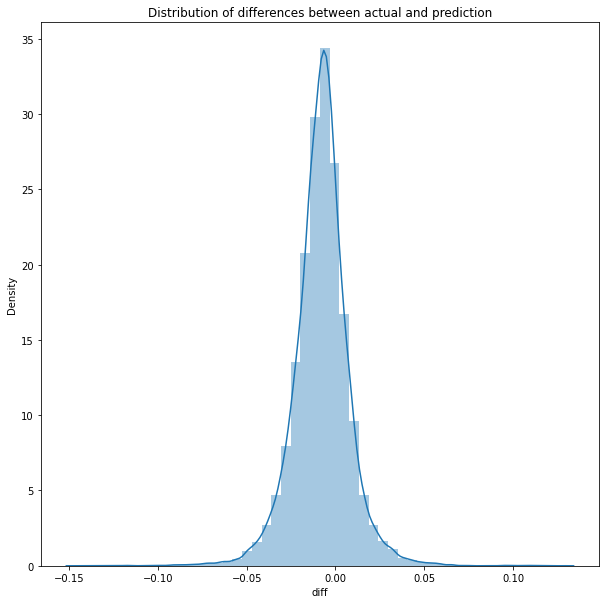

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00031197435649653153
RMSE :  0.017662795828988442
MAE :  0.013149893903613173
1043/1043 [==============================] - 4s 4ms/step
R2_Score  : 0.995612851325428


count    33373.000000
mean        -0.007950
std          0.015773
min         -0.145600
25%         -0.015992
50%         -0.007533
75%          0.000319
max          0.128102
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_3 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 16)                3936      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 906.2560 - mae: 12.2841 - mse: 906.2560 - root_mean_squared_error: 30.1041 - mape: 991478.1875 
Epoch 1: val_mse improved from inf to 4.59470, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 21s 42ms/step - loss: 904.5851 - mae: 12.2655 - mse: 904.5851 - root_mean_squared_error: 30.0763 - mape: 989642.1875 - val_loss: 4.5947 - val_mae: 2.1351 - val_mse: 4.5947 - val_root_mean_squared_error: 2.1435 - val_mape: 77524.0234
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 2.6152 - mae: 1.5655 - mse: 2.6152 - root_mean_squared_error: 1.6172 - mape: 13798.8252
Epoch 2: val_mse improved from 4.59470 to 0.93222, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 2.6057 - mae: 1.5622 - mse: 2.6057 - root_mean_squared_error: 1.6142 - mape: 13709.4521 - val_loss: 0.9322 - val_mae: 0.9467 - val_mse: 0.9322 - val_root_mean_squared_error: 0.9655 - val_mape: 41512.8203
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 0.7480 - mae: 0.8309 - mse: 0.7480 - root_mean_squared_error: 0.8648 - mape: 7260.8579
Epoch 3: val_mse improved from 0.93222 to 0.31735, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.7460 - mae: 0.8296 - mse: 0.7460 - root_mean_squared_error: 0.8637 - mape: 7214.5083 - val_loss: 0.3173 - val_mae: 0.5305 - val_mse: 0.3173 - val_root_mean_squared_error: 0.5633 - val_mape: 28899.9082
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.3159 - mae: 0.5210 - mse: 0.3159 - root_mean_squared_error: 0.5621 - mape: 6518.5796
Epoch 4: val_mse improved from 0.31735 to 0.13737, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.3159 - mae: 0.5210 - mse: 0.3159 - root_mean_squared_error: 0.5621 - mape: 6518.5796 - val_loss: 0.1374 - val_mae: 0.3213 - val_mse: 0.1374 - val_root_mean_squared_error: 0.3706 - val_mape: 22476.6973
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.1641 - mae: 0.3633 - mse: 0.1641 - root_mean_squared_error: 0.4050 - mape: 5012.4380
Epoch 5: val_mse improved from 0.13737 to 0.07238, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.1640 - mae: 0.3632 - mse: 0.1640 - root_mean_squared_error: 0.4049 - mape: 5003.4922 - val_loss: 0.0724 - val_mae: 0.2246 - val_mse: 0.0724 - val_root_mean_squared_error: 0.2690 - val_mape: 18615.5195
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 0.0996 - mae: 0.2781 - mse: 0.0996 - root_mean_squared_error: 0.3155 - mape: 4311.2549
Epoch 6: val_mse improved from 0.07238 to 0.04732, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0995 - mae: 0.2780 - mse: 0.0995 - root_mean_squared_error: 0.3154 - mape: 4283.3555 - val_loss: 0.0473 - val_mae: 0.1801 - val_mse: 0.0473 - val_root_mean_squared_error: 0.2175 - val_mape: 16070.2871
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0692 - mae: 0.2281 - mse: 0.0692 - root_mean_squared_error: 0.2630 - mape: 3558.3054
Epoch 7: val_mse improved from 0.04732 to 0.03825, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0692 - mae: 0.2281 - mse: 0.0692 - root_mean_squared_error: 0.2630 - mape: 3552.0959 - val_loss: 0.0382 - val_mae: 0.1636 - val_mse: 0.0382 - val_root_mean_squared_error: 0.1956 - val_mape: 14304.4424
Epoch 8/60
402/405 [============================>.] - ETA: 0s - loss: 0.0545 - mae: 0.1998 - mse: 0.0545 - root_mean_squared_error: 0.2334 - mape: 3166.8101
Epoch 8: val_mse improved from 0.03825 to 0.03596, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0544 - mae: 0.1997 - mse: 0.0544 - root_mean_squared_error: 0.2333 - mape: 3146.1816 - val_loss: 0.0360 - val_mae: 0.1587 - val_mse: 0.0360 - val_root_mean_squared_error: 0.1896 - val_mape: 13039.2510
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0472 - mae: 0.1847 - mse: 0.0472 - root_mean_squared_error: 0.2173 - mape: 2840.5439
Epoch 9: val_mse did not improve from 0.03596
405/405 [==============================] - 6s 14ms/step - loss: 0.0472 - mae: 0.1847 - mse: 0.0472 - root_mean_squared_error: 0.2173 - mape: 2835.5022 - val_loss: 0.0365 - val_mae: 0.1587 - val_mse: 0.0365 - val_root_mean_squared_error: 0.1911 - val_mape: 12122.8887
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 0.0437 - mae: 0.1768 - mse: 0.0437 - root_mean_squared_error: 0.2091 - mape: 2762.8271
Epoch 10: val_mse did not improve from 0.03596
405/405 [==============================] - 6s 14ms/step -

405/405 [==============================] - 16s 39ms/step - loss: 0.0404 - mae: 0.1668 - mse: 0.0404 - root_mean_squared_error: 0.2011 - mape: 2355.2805 - val_loss: 0.0353 - val_mae: 0.1550 - val_mse: 0.0353 - val_root_mean_squared_error: 0.1878 - val_mape: 10515.5244
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 0.0162 - mae: 0.0934 - mse: 0.0162 - root_mean_squared_error: 0.1271 - mape: 2435.4221
Epoch 25: val_mse improved from 0.03528 to 0.00253, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0161 - mae: 0.0931 - mse: 0.0161 - root_mean_squared_error: 0.1268 - mape: 2419.3091 - val_loss: 0.0025 - val_mae: 0.0378 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 6897.2388
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0369 - mse: 0.0033 - root_mean_squared_error: 0.0575 - mape: 1353.4142
Epoch 26: val_mse improved from 0.00253 to 0.00135, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0033 - mae: 0.0369 - mse: 0.0033 - root_mean_squared_error: 0.0575 - mape: 1350.9811 - val_loss: 0.0013 - val_mae: 0.0287 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 5517.9014
Epoch 27/60
402/405 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0291 - mse: 0.0021 - root_mean_squared_error: 0.0460 - mape: 1138.7827
Epoch 27: val_mse improved from 0.00135 to 0.00110, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0021 - mae: 0.0291 - mse: 0.0021 - root_mean_squared_error: 0.0460 - mape: 1131.2936 - val_loss: 0.0011 - val_mae: 0.0266 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 4856.7832
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0250 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 1011.4570
Epoch 28: val_mse improved from 0.00110 to 0.00077, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0015 - mae: 0.0250 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 1009.6284 - val_loss: 7.6677e-04 - val_mae: 0.0214 - val_mse: 7.6677e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 4296.5664
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0223 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 907.6547
Epoch 29: val_mse improved from 0.00077 to 0.00065, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0012 - mae: 0.0223 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 903.8423 - val_loss: 6.4533e-04 - val_mae: 0.0196 - val_mse: 6.4533e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 3846.2310
Epoch 30/60
402/405 [============================>.] - ETA: 0s - loss: 9.4238e-04 - mae: 0.0203 - mse: 9.4238e-04 - root_mean_squared_error: 0.0307 - mape: 818.1655
Epoch 30: val_mse improved from 0.00065 to 0.00059, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 9.4124e-04 - mae: 0.0203 - mse: 9.4124e-04 - root_mean_squared_error: 0.0307 - mape: 812.7460 - val_loss: 5.8912e-04 - val_mae: 0.0185 - val_mse: 5.8912e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 3496.1997
Epoch 31/60
401/405 [============================>.] - ETA: 0s - loss: 7.9221e-04 - mae: 0.0189 - mse: 7.9221e-04 - root_mean_squared_error: 0.0281 - mape: 779.1857
Epoch 31: val_mse improved from 0.00059 to 0.00043, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 7.9148e-04 - mae: 0.0189 - mse: 7.9148e-04 - root_mean_squared_error: 0.0281 - mape: 772.1538 - val_loss: 4.2680e-04 - val_mae: 0.0151 - val_mse: 4.2680e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 3219.6331
Epoch 32/60
402/405 [============================>.] - ETA: 0s - loss: 6.8110e-04 - mae: 0.0178 - mse: 6.8110e-04 - root_mean_squared_error: 0.0261 - mape: 726.2248
Epoch 32: val_mse did not improve from 0.00043
405/405 [==============================] - 6s 15ms/step - loss: 6.8068e-04 - mae: 0.0178 - mse: 6.8068e-04 - root_mean_squared_error: 0.0261 - mape: 721.4263 - val_loss: 5.9895e-04 - val_mae: 0.0187 - val_mse: 5.9895e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 2956.1018
Epoch 33/60
404/405 [============================>.] - ETA: 0s - loss: 5.7962e-04 - mae: 0.0166 - mse: 5.7962e-04 - root_mean_squared_error: 0.0241 - mape: 638.3150
Epoch 33: val_mse did not improve from 0.00043
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 3.1323e-04 - mae: 0.0128 - mse: 3.1323e-04 - root_mean_squared_error: 0.0177 - mape: 485.6436 - val_loss: 4.0392e-04 - val_mae: 0.0146 - val_mse: 4.0392e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2038.6248
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 2.7963e-04 - mae: 0.0122 - mse: 2.7963e-04 - root_mean_squared_error: 0.0167 - mape: 437.1683
Epoch 38: val_mse did not improve from 0.00040
405/405 [==============================] - 6s 14ms/step - loss: 2.7963e-04 - mae: 0.0122 - mse: 2.7963e-04 - root_mean_squared_error: 0.0167 - mape: 435.3308 - val_loss: 4.5227e-04 - val_mae: 0.0156 - val_mse: 4.5227e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 1897.6000
Epoch 39/60
402/405 [============================>.] - ETA: 0s - loss: 2.4451e-04 - mae: 0.0115 - mse: 2.4451e-04 - root_mean_squared_error: 0.0156 - mape: 402.0236
Epoch 39: val_mse did not improve from 0.00040
405/405 [====

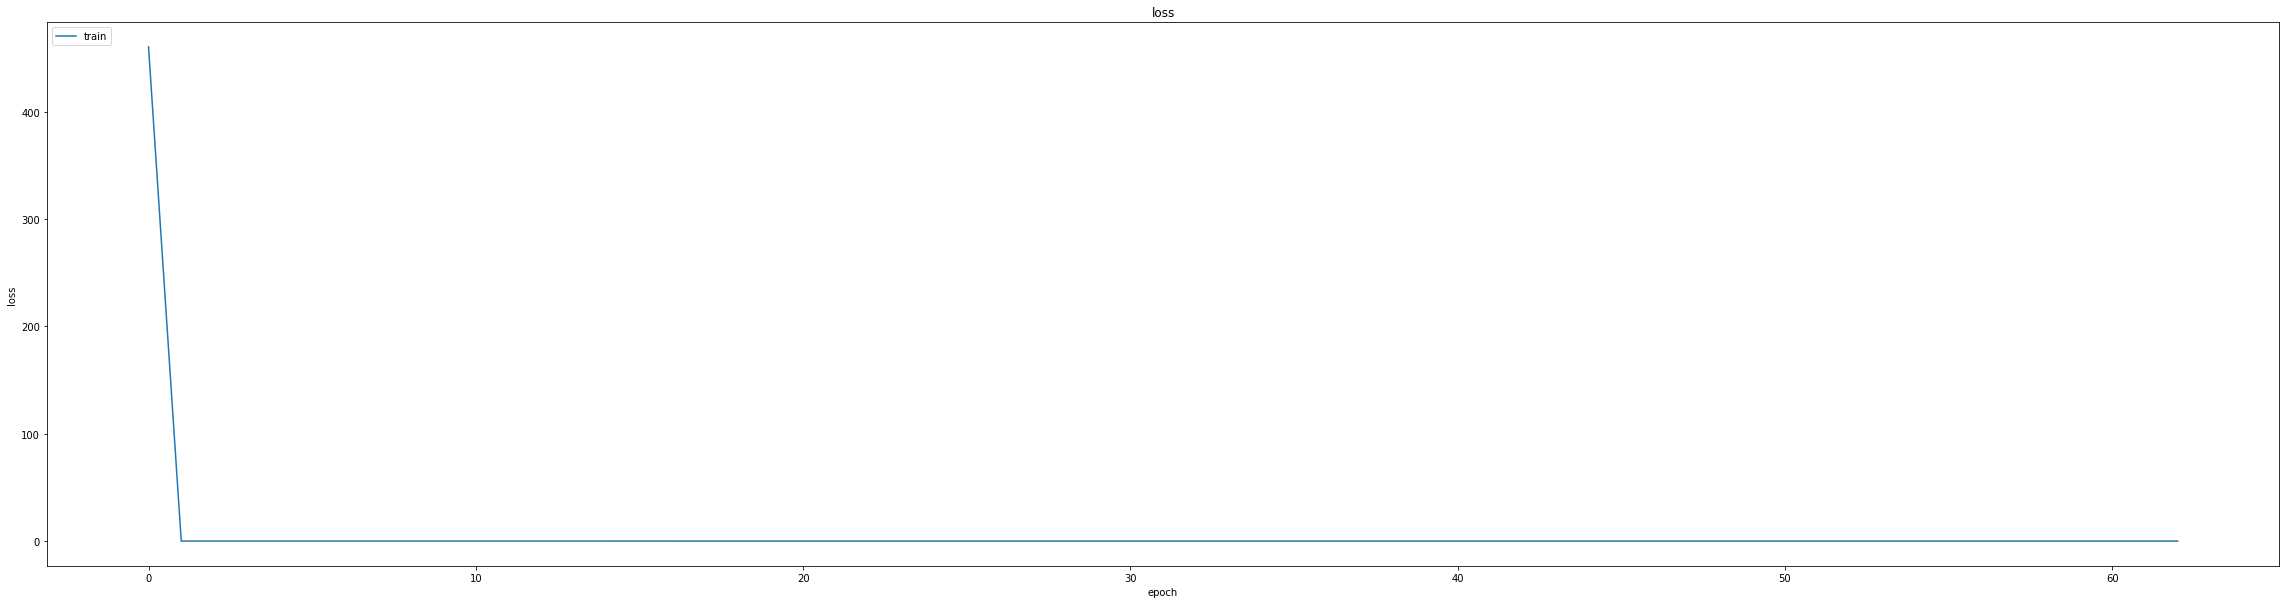

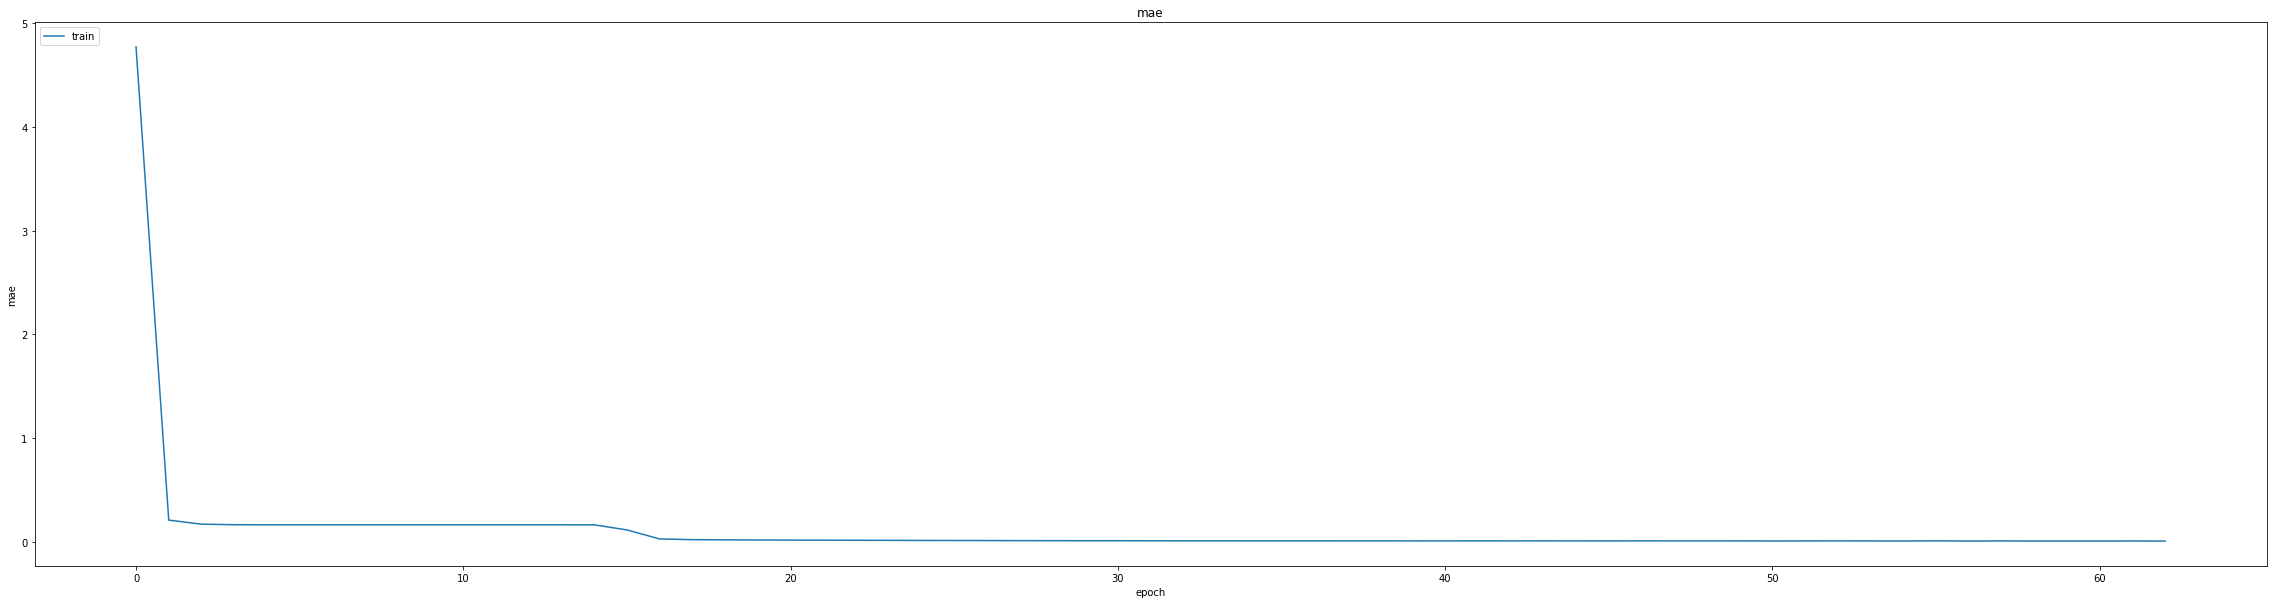

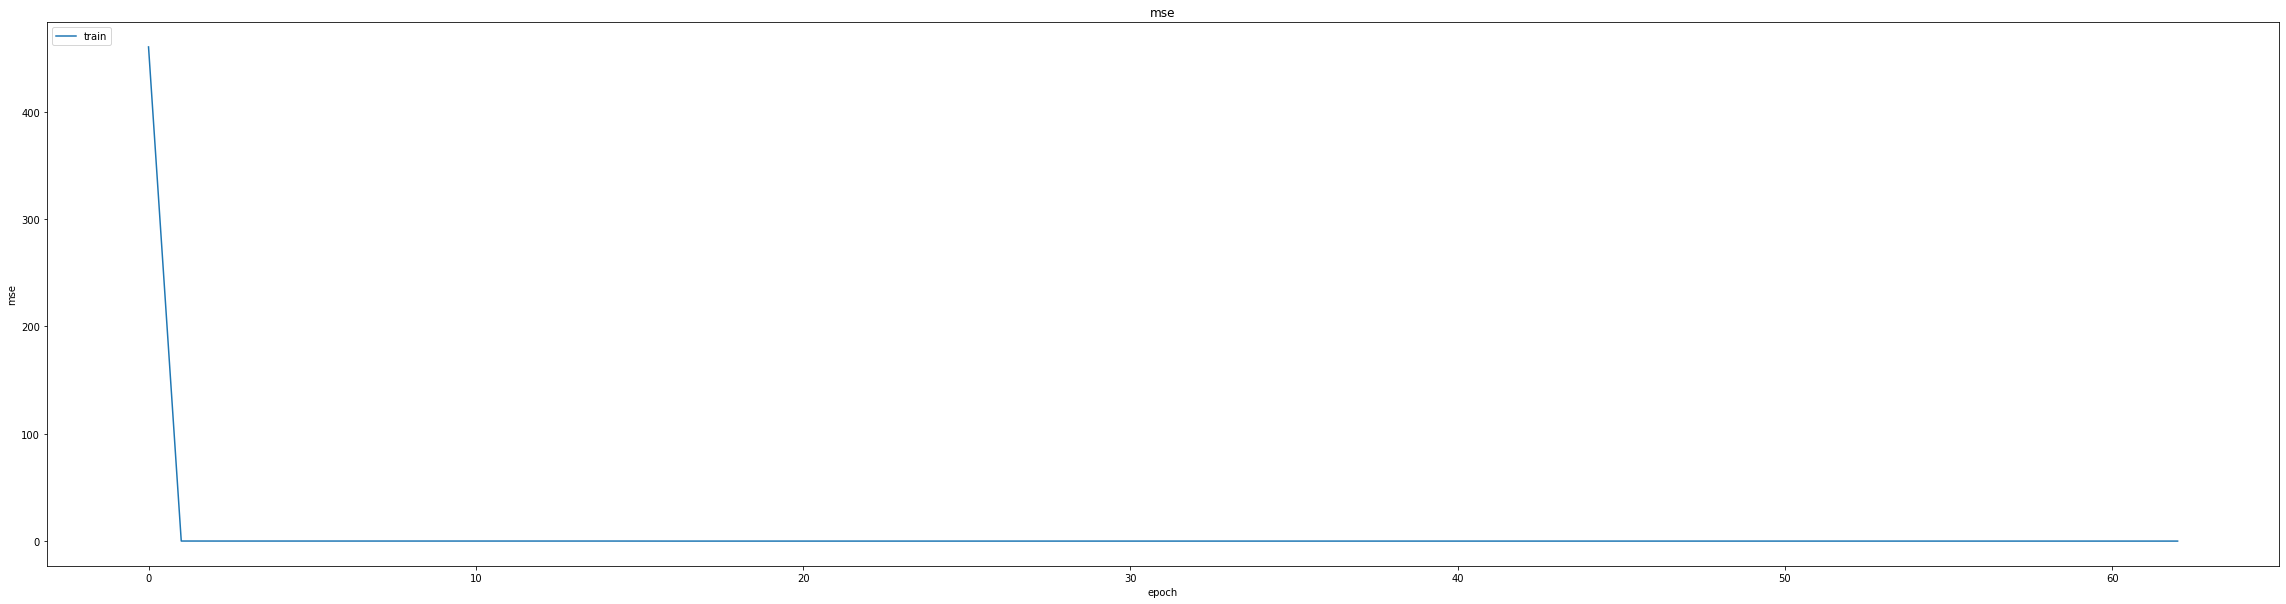

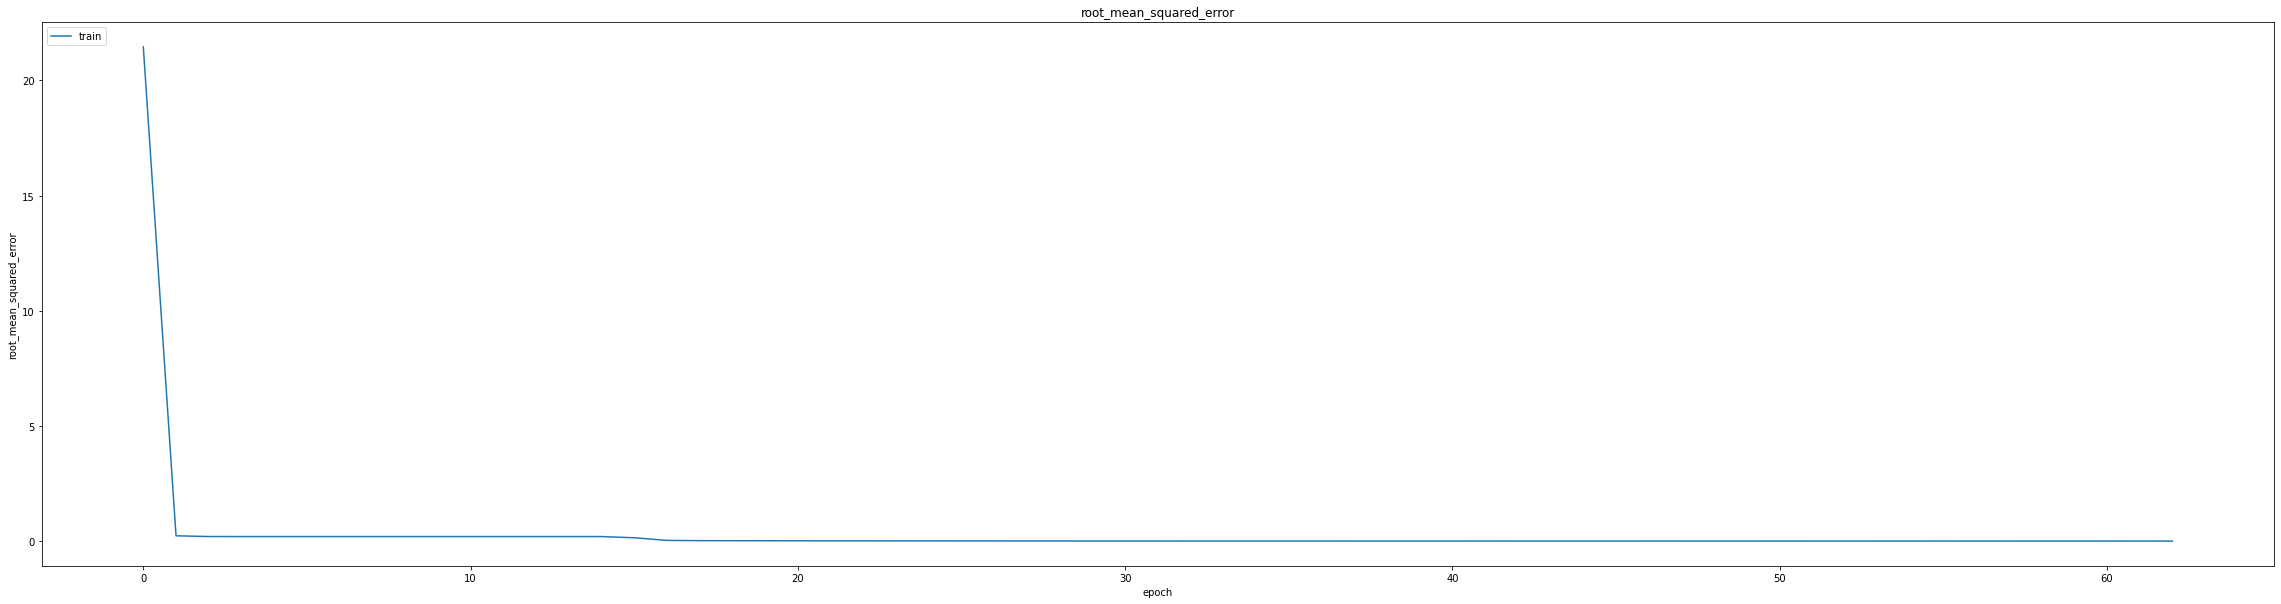

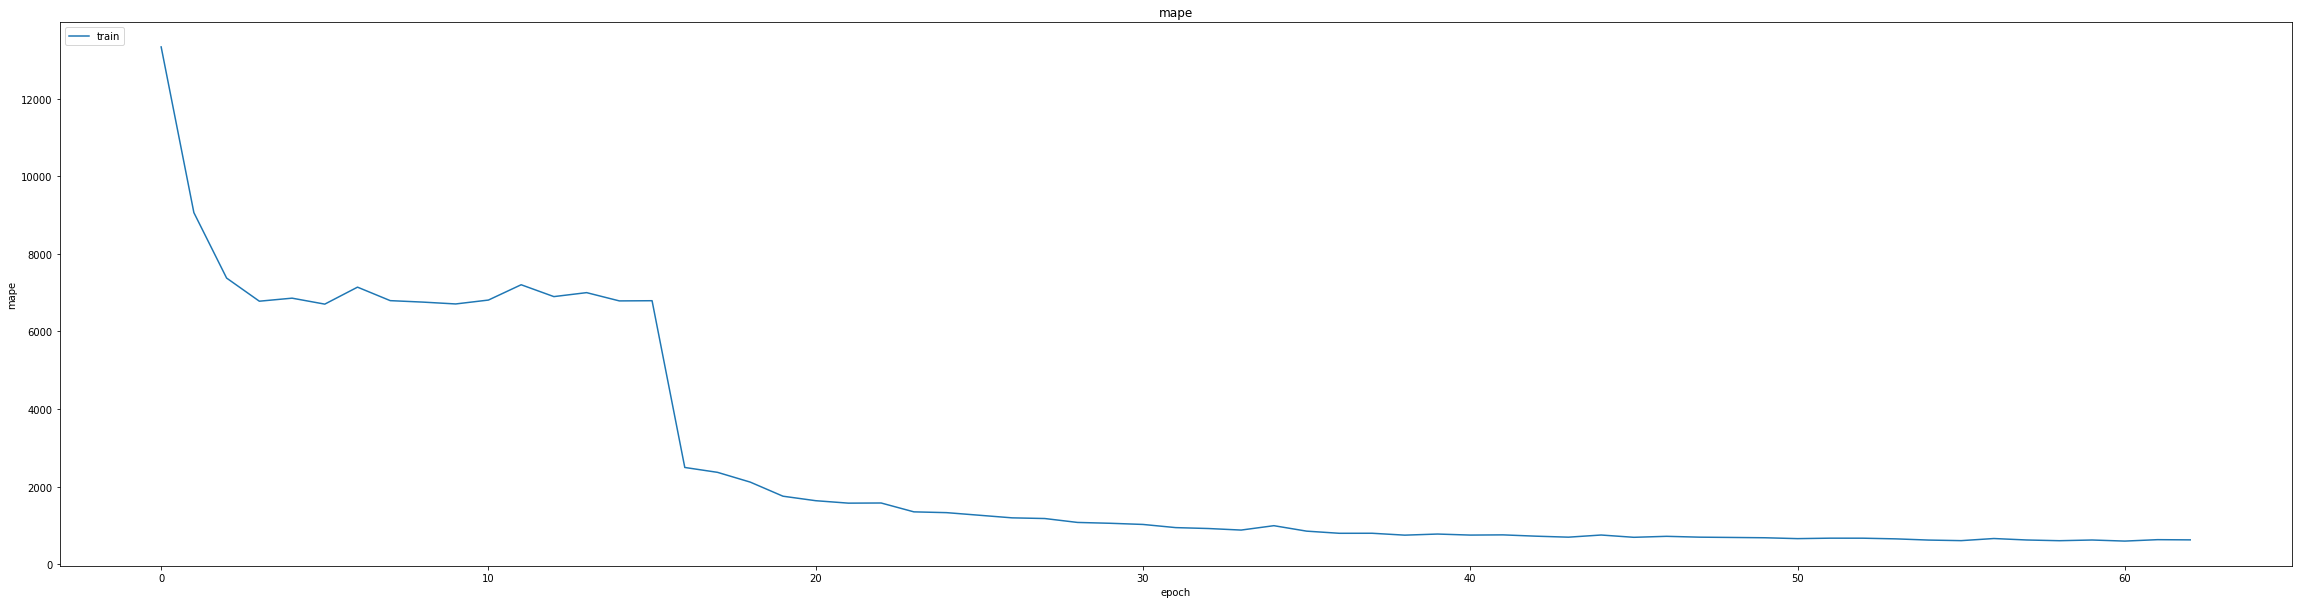

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.014623125083744526
0.014623125083744526
0.020097648724913597
1043/1043 [==============================] - 5s 4ms/step
0.9870927768861357


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0169 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 359.8974
Epoch 1: val_mse did not improve from 0.00040
405/405 [==============================] - 11s 19ms/step - loss: 0.0010 - mae: 0.0169 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 358.3728 - val_loss: 4.4484e-04 - val_mae: 0.0154 - val_mse: 4.4484e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 1641.9309 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 1.7219e-04 - mae: 0.0098 - mse: 1.7219e-04 - root_mean_squared_error: 0.0131 - mape: 331.4812
Epoch 2: val_mse did not improve from 0.00040
405/405 [==============================] - 6s 14ms/step - loss: 1.7206e-04 - mae: 0.0098 - mse: 1.7206e-04 - root_mean_squared_error: 0.0131 - mape: 330.0732 - val_loss: 4.2593e-04 - val_mae: 0.0151 - val_mse: 4.2593e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 1309.9338 - lr: 0.0010
lr chan

405/405 [==============================] - 16s 40ms/step - loss: 1.0839e-04 - mae: 0.0078 - mse: 1.0839e-04 - root_mean_squared_error: 0.0104 - mape: 209.9821 - val_loss: 3.9390e-04 - val_mae: 0.0144 - val_mse: 3.9390e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 1311.4755 - lr: 8.1000e-04
Epoch 6/20
405/405 [==============================] - ETA: 0s - loss: 1.0254e-04 - mae: 0.0076 - mse: 1.0254e-04 - root_mean_squared_error: 0.0101 - mape: 189.9571
Epoch 6: val_mse did not improve from 0.00039
405/405 [==============================] - 6s 14ms/step - loss: 1.0254e-04 - mae: 0.0076 - mse: 1.0254e-04 - root_mean_squared_error: 0.0101 - mape: 189.9571 - val_loss: 6.0033e-04 - val_mae: 0.0188 - val_mse: 6.0033e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 1120.0819 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
403/405 [============================>.] - ETA: 0s - loss: 8.5399e-05 - mae: 0.0069 - mse: 8.5399e-05 - root_mean_squared_error: 0.0092 - mape: 17

405/405 [==============================] - 15s 37ms/step - loss: 6.3483e-05 - mae: 0.0059 - mse: 6.3483e-05 - root_mean_squared_error: 0.0080 - mape: 157.2322 - val_loss: 3.9023e-04 - val_mae: 0.0145 - val_mse: 3.9023e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 1164.4614 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
405/405 [==============================] - ETA: 0s - loss: 6.7622e-05 - mae: 0.0061 - mse: 6.7622e-05 - root_mean_squared_error: 0.0082 - mape: 148.7079
Epoch 13: val_mse improved from 0.00039 to 0.00038, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 6.7622e-05 - mae: 0.0061 - mse: 6.7622e-05 - root_mean_squared_error: 0.0082 - mape: 148.7079 - val_loss: 3.8476e-04 - val_mae: 0.0145 - val_mse: 3.8476e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 1114.2947 - lr: 5.3144e-04
Epoch 14/20
405/405 [==============================] - ETA: 0s - loss: 6.2298e-05 - mae: 0.0059 - mse: 6.2298e-05 - root_mean_squared_error: 0.0079 - mape: 154.2055
Epoch 14: val_mse did not improve from 0.00038
405/405 [==============================] - 6s 14ms/step - loss: 6.2298e-05 - mae: 0.0059 - mse: 6.2298e-05 - root_mean_squared_error: 0.0079 - mape: 154.2055 - val_loss: 4.1670e-04 - val_mae: 0.0153 - val_mse: 4.1670e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 1111.5232 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
404/405 [============================>.] - ETA: 0s - loss: 5.5232e-05 - mae: 0.0055 - mse: 5.5232e-05 - root_mean_squared_error: 0.0074 - mape

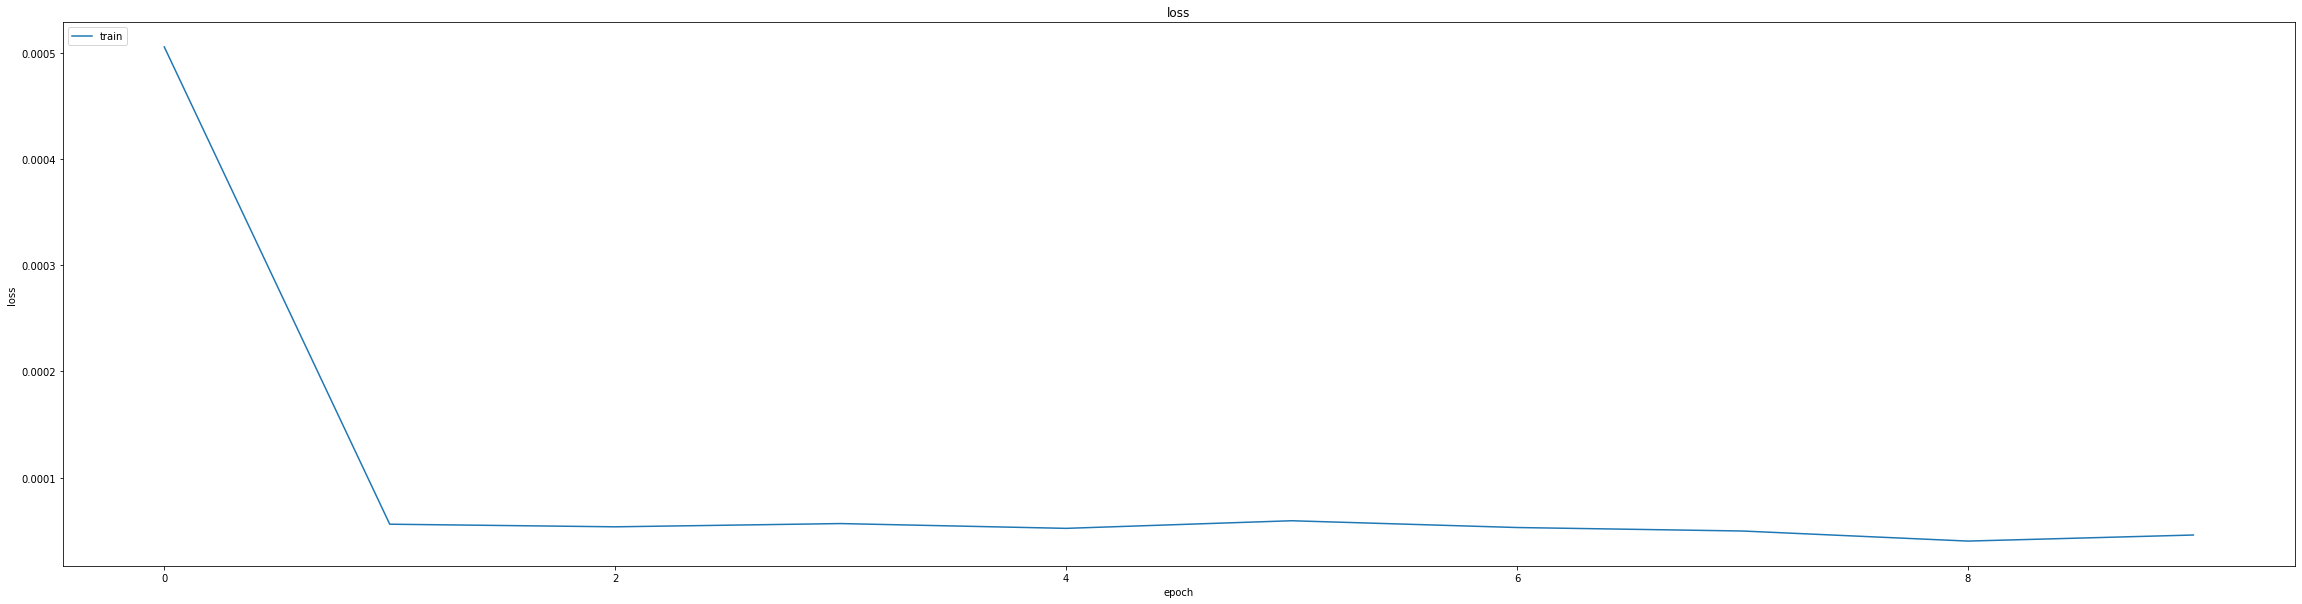

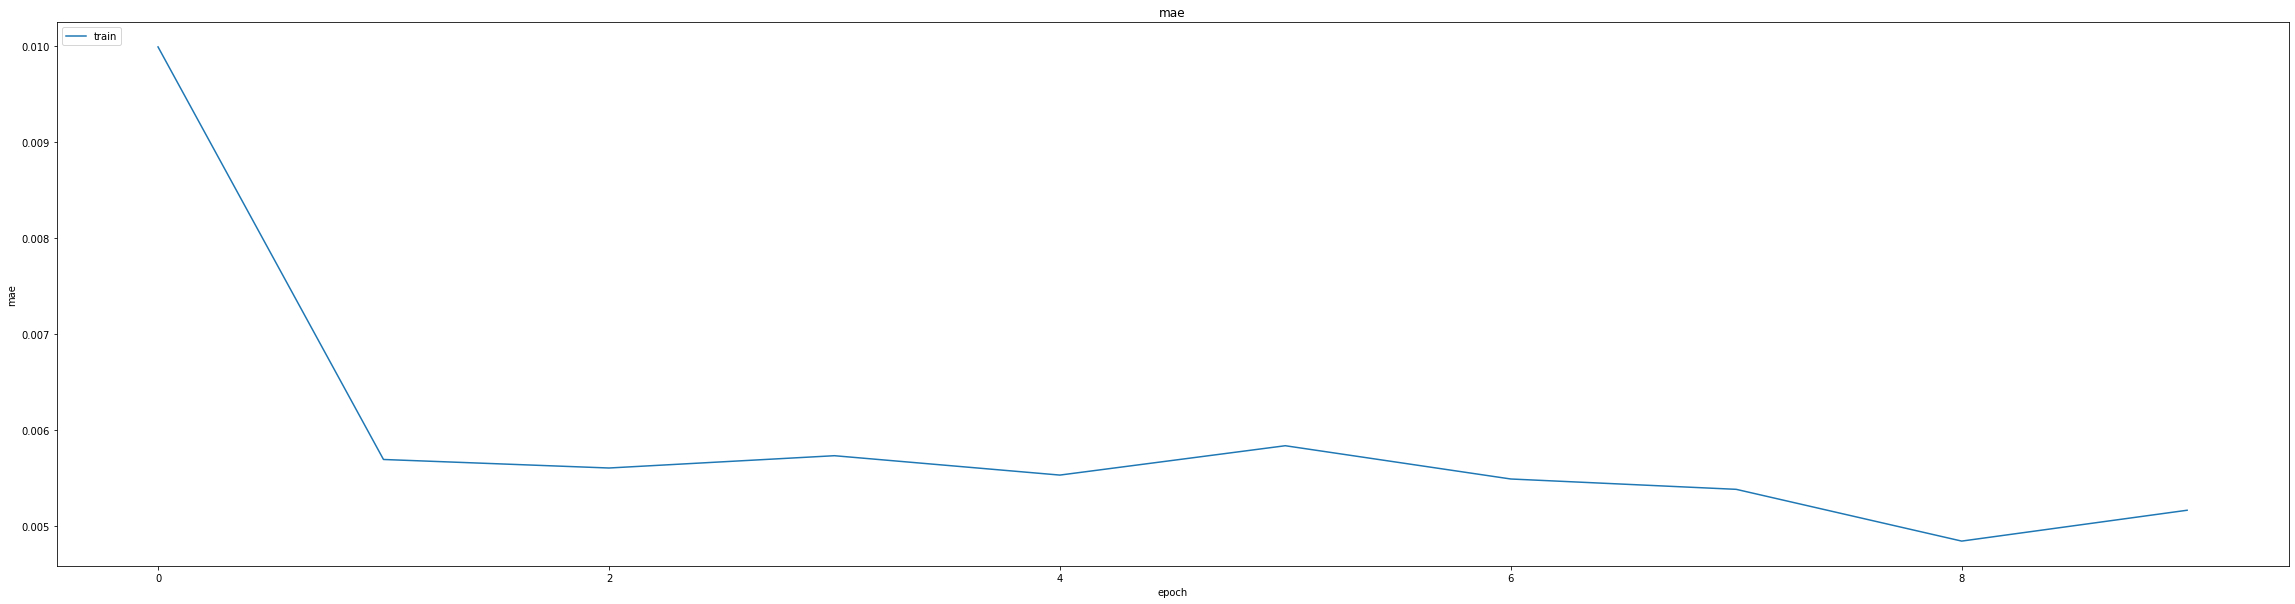

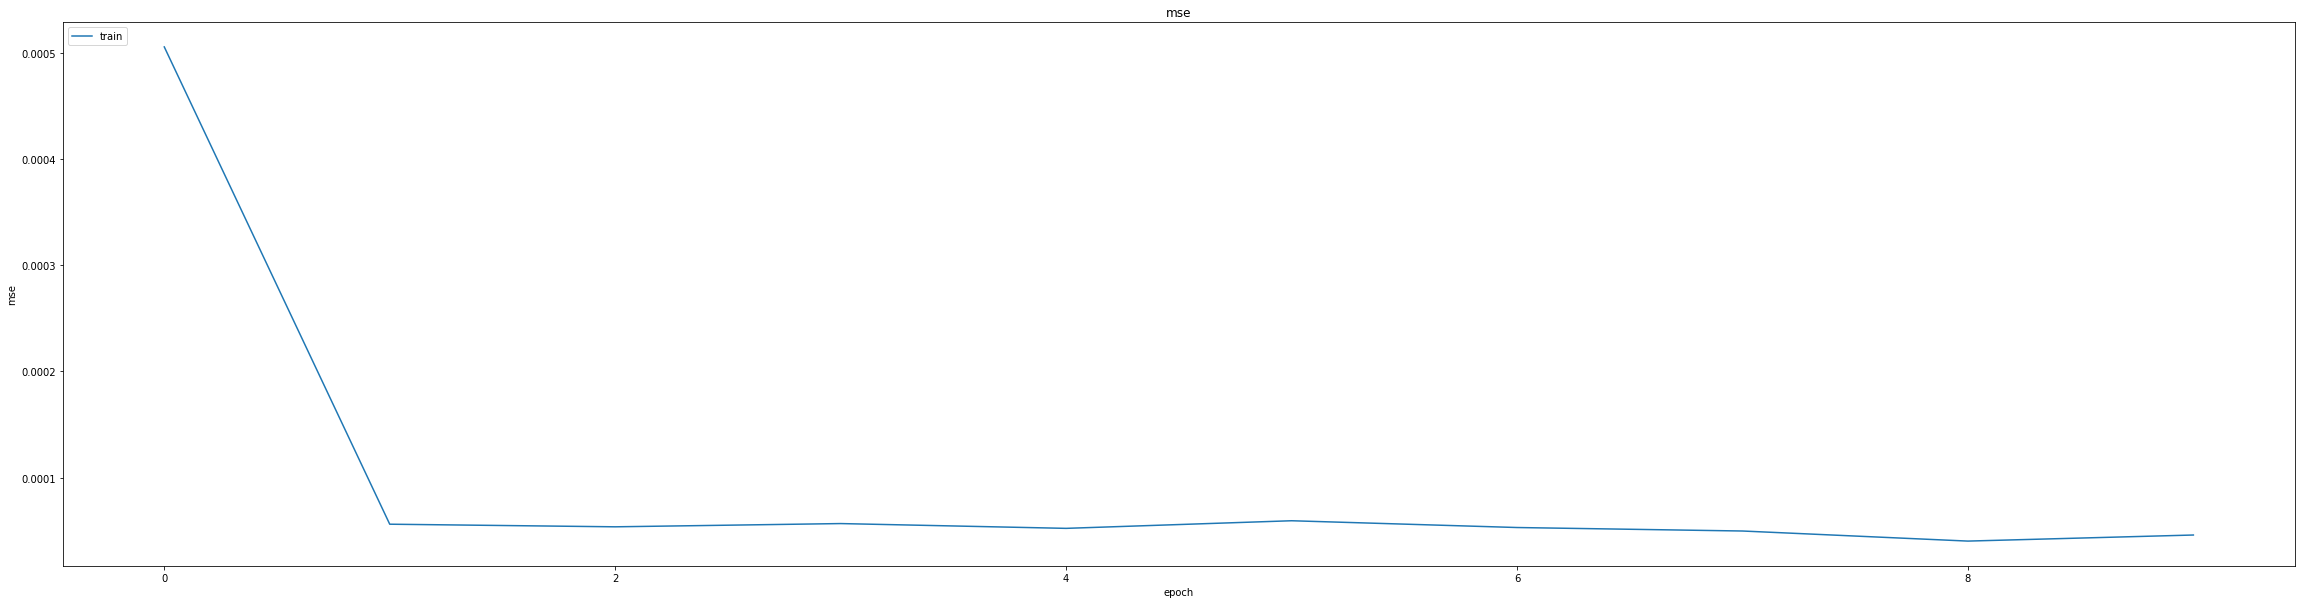

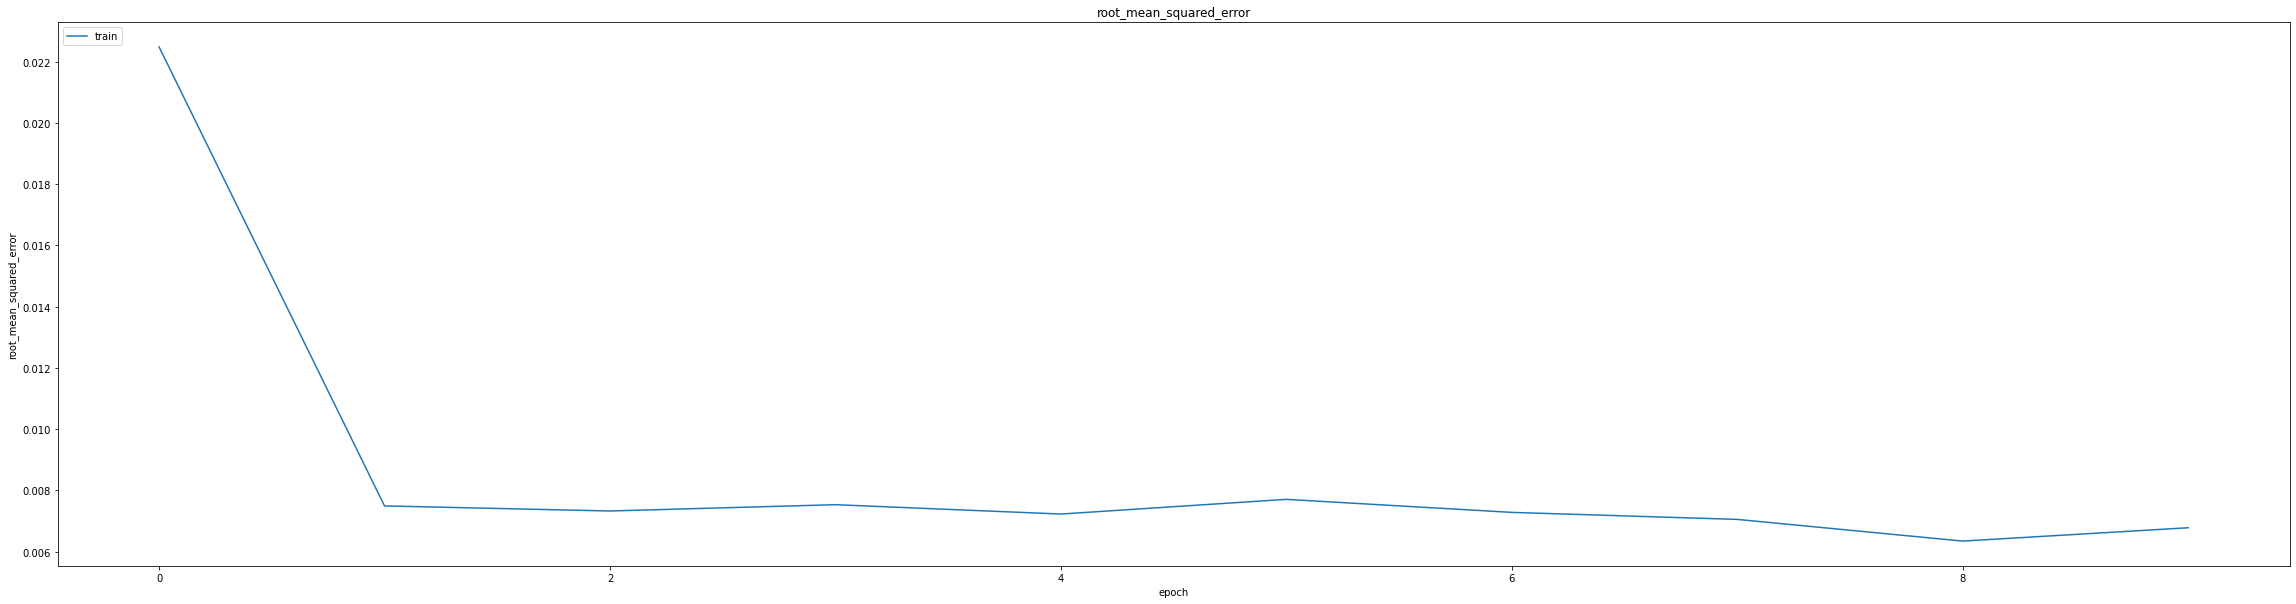

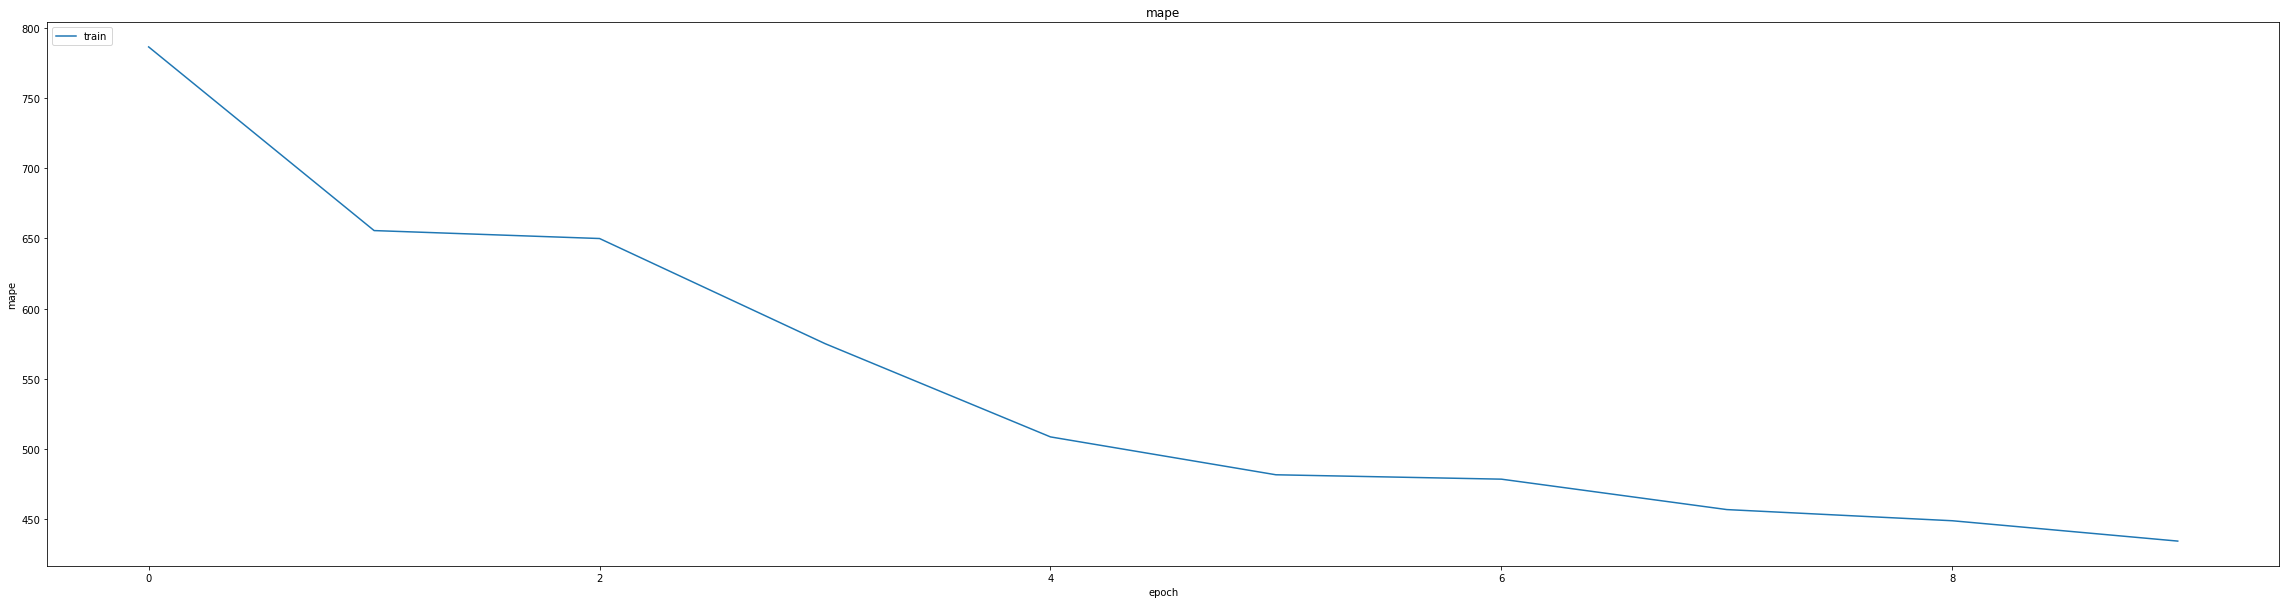

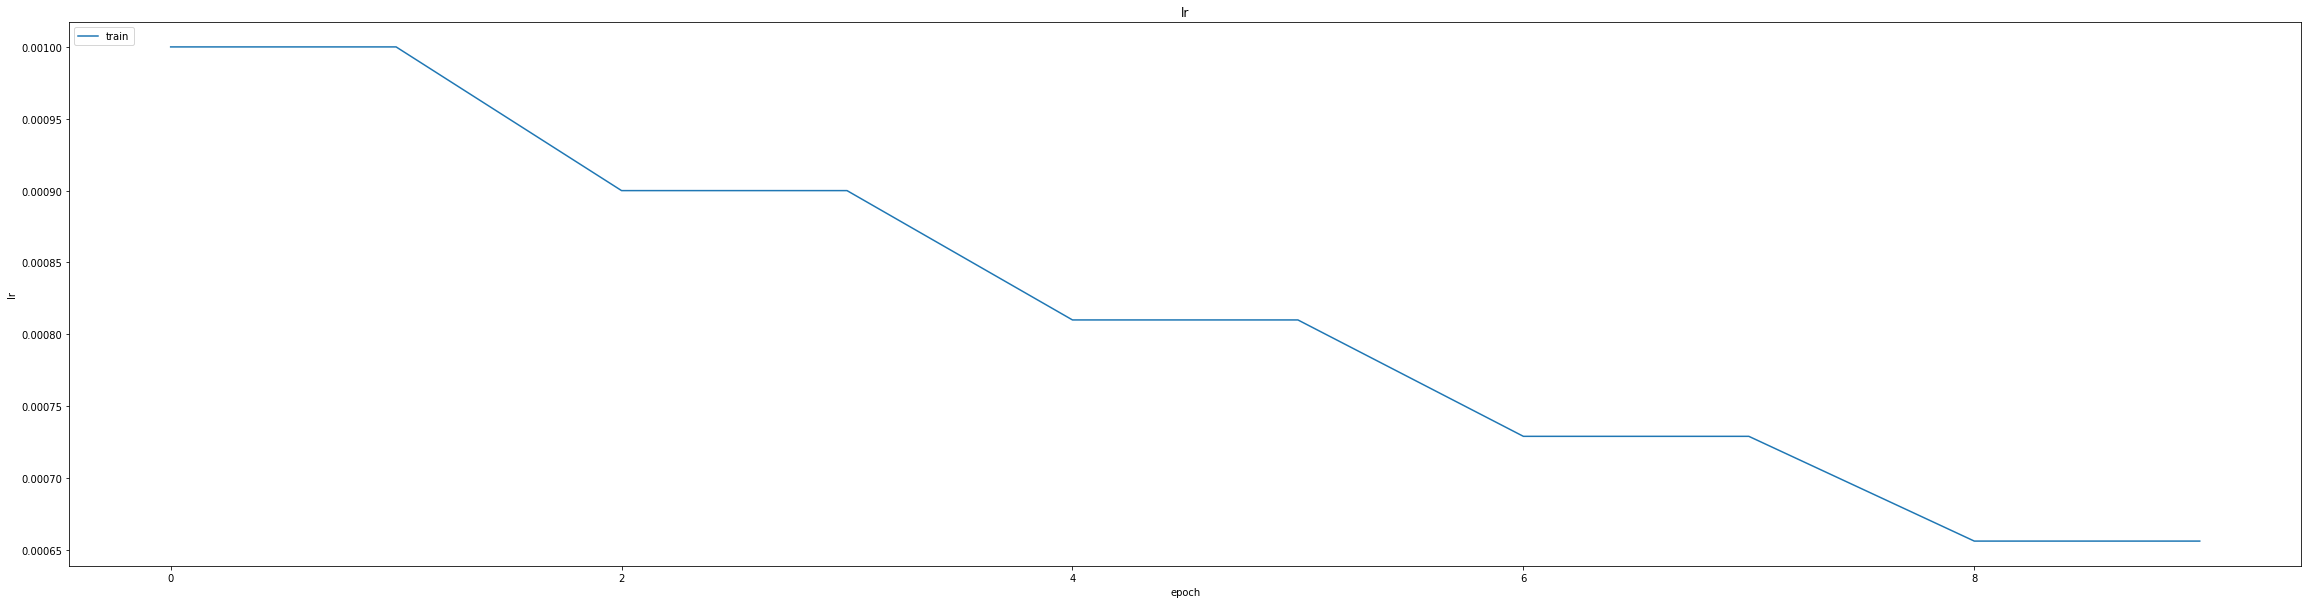

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.014442822895944118
0.014442822895944118
0.019615383818745613
1043/1043 [==============================] - 4s 4ms/step
0.9834524673705657


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(70-30)")

1043/1043 [==============================] - 4s 4ms/step


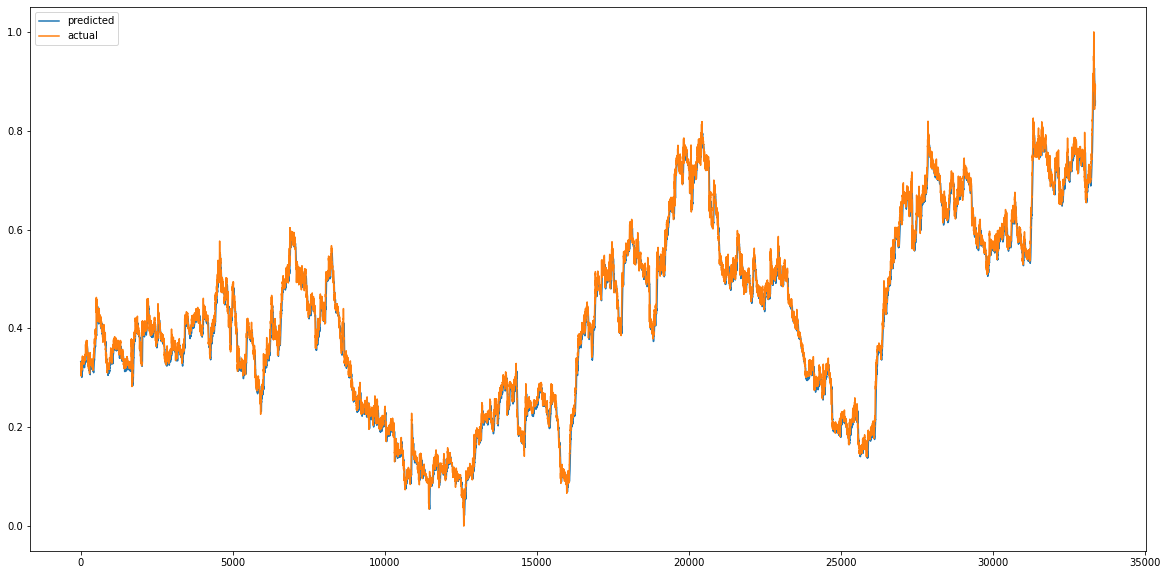

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


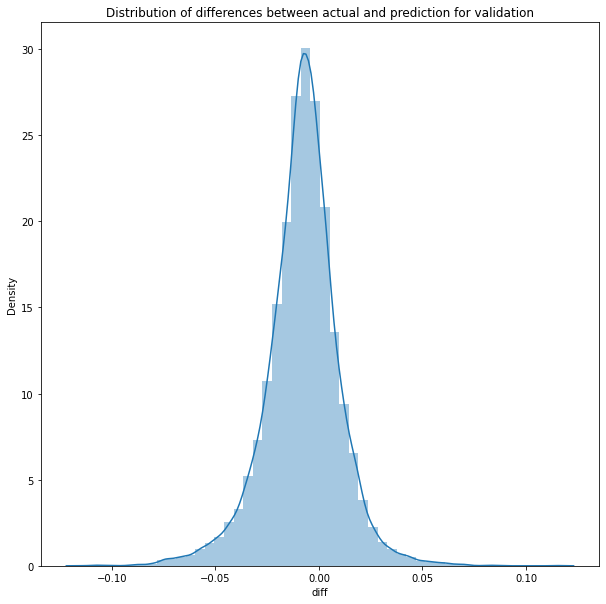

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 4ms/step


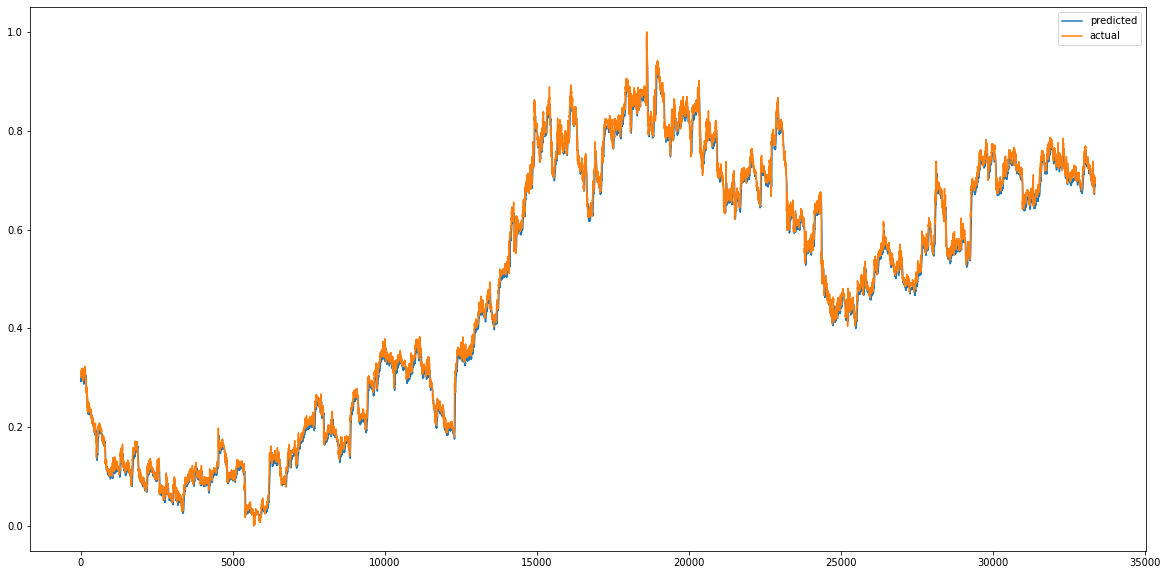

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


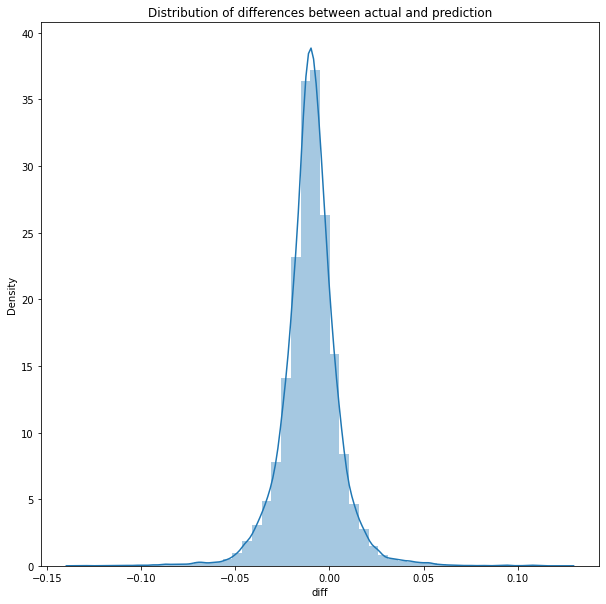

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0003297232581754609
RMSE :  0.018158283458946798
MAE :  0.013822554847623438
1043/1043 [==============================] - 4s 4ms/step
R2_Score  : 0.9953632568644148


count    33373.000000
mean        -0.010057
std          0.015119
min         -0.134093
25%         -0.017207
50%         -0.009872
75%         -0.002679
max          0.124043
Name: diff, dtype: float64